In [1]:
import numpy as np
import pandas as pd
import os
import random
from tqdm import tqdm
import xgboost as xgb
import tensorflow as tf
import cv2
from keras_applications.resnet import ResNet50
from keras.models import Model
from keras.preprocessing import image
from keras.applications.resnet import preprocess_input, decode_predictions
from keras.layers import Flatten, Input
from tensorflow.keras.utils import img_to_array, load_img
import scipy
from sklearn.metrics import fbeta_score
from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import xgboost
import glob

2023-05-19 10:36:15.259260: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
files = []
categories = []

for directory_path in glob.glob('/Users/mahmouddaker/Desktop/University/MSA/Semester 6/CS363/Project/Alzheimer_s Dataset/train/*'):

    label=directory_path.split('\\')[-1]
    
    for img_path in glob.glob(os.path.join(directory_path,'*.jpg')):
        files.append(img_path)
        categories.append(label)

df = pd.DataFrame({
 'Filename': files,
 'Category': categories
})

df

Filename  \
0     /Users/mahmouddaker/Desktop/University/MSA/Sem...   
1     /Users/mahmouddaker/Desktop/University/MSA/Sem...   
2     /Users/mahmouddaker/Desktop/University/MSA/Sem...   
3     /Users/mahmouddaker/Desktop/University/MSA/Sem...   
4     /Users/mahmouddaker/Desktop/University/MSA/Sem...   
...                                                 ...   
5116  /Users/mahmouddaker/Desktop/University/MSA/Sem...   
5117  /Users/mahmouddaker/Desktop/University/MSA/Sem...   
5118  /Users/mahmouddaker/Desktop/University/MSA/Sem...   
5119  /Users/mahmouddaker/Desktop/University/MSA/Sem...   
5120  /Users/mahmouddaker/Desktop/University/MSA/Sem...   

                                               Category  
0     /Users/mahmouddaker/Desktop/University/MSA/Sem...  
1     /Users/mahmouddaker/Desktop/University/MSA/Sem...  
2     /Users/mahmouddaker/Desktop/University/MSA/Sem...  
3     /Users/mahmouddaker/Desktop/University/MSA/Sem...  
4     /Users/mahmouddaker/Desktop/University/MSA/Sem...  
...                                                 ...  
5116  /Users/mahmouddaker/Desktop/University/MSA/Sem...  
5117  /Users/mahmouddaker/Desktop/University/MSA/Sem...  
5118  /Users/mahmouddaker/Desktop/University/MSA/Sem...  
5119  /Users/mahmouddaker/Desktop/University/MSA/Sem...  
5120  /Users/mahmouddaker/Desktop/University/MSA/Sem...  

[5121 rows x 2 columns]

In [3]:
df['Category'].value_counts()

/Users/mahmouddaker/Desktop/University/MSA/Semester 6/CS363/Project/Alzheimer_s Dataset/train/NonDemented         2560
/Users/mahmouddaker/Desktop/University/MSA/Semester 6/CS363/Project/Alzheimer_s Dataset/train/VeryMildDemented    1792
/Users/mahmouddaker/Desktop/University/MSA/Semester 6/CS363/Project/Alzheimer_s Dataset/train/MildDemented         717
/Users/mahmouddaker/Desktop/University/MSA/Semester 6/CS363/Project/Alzheimer_s Dataset/train/ModerateDemented      52
Name: Category, dtype: int64

In [4]:
le = preprocessing.LabelEncoder()
le.fit(df['Category'])
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

{'/Users/mahmouddaker/Desktop/University/MSA/Semester 6/CS363/Project/Alzheimer_s Dataset/train/MildDemented': 0, '/Users/mahmouddaker/Desktop/University/MSA/Semester 6/CS363/Project/Alzheimer_s Dataset/train/ModerateDemented': 1, '/Users/mahmouddaker/Desktop/University/MSA/Semester 6/CS363/Project/Alzheimer_s Dataset/train/NonDemented': 2, '/Users/mahmouddaker/Desktop/University/MSA/Semester 6/CS363/Project/Alzheimer_s Dataset/train/VeryMildDemented': 3}


In [5]:
y = le.transform(df['Category'])

In [6]:
base_model = VGG19(weights='imagenet', include_top=False)
inputs = Input(shape=(48,48,3),name = 'image_input')
x = base_model(inputs)
x = Flatten()(x)
model = Model(inputs=inputs, outputs=x)

In [7]:
import time
start = time.time()

x_train = []
y_train = []

for f in tqdm(df.Filename[:]):
    img_path = f
    img = load_img(img_path, target_size=(48, 48))
    x = img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    features = model.predict(x)
    features_reduce =  features.squeeze()
    x_train.append(features_reduce)

  0%|                                                  | 0/5121 [00:00<?, ?it/s]

1/1 [==============================] - 3s 3s/step


  0%|                                        | 1/5121 [00:03<4:25:43,  3.11s/it]

1/1 [==============================] - 0s 34ms/step


  0%|                                        | 3/5121 [00:03<1:14:09,  1.15it/s]

1/1 [==============================] - 0s 44ms/step


  0%|                                          | 4/5121 [00:03<52:36,  1.62it/s]

1/1 [==============================] - 0s 50ms/step


  0%|                                          | 5/5121 [00:03<38:57,  2.19it/s]

1/1 [==============================] - 0s 40ms/step


  0%|                                          | 7/5121 [00:03<23:32,  3.62it/s]

1/1 [==============================] - 0s 69ms/step


  0%|                                          | 9/5121 [00:03<18:21,  4.64it/s]

1/1 [==============================] - 0s 41ms/step


  0%|                                         | 10/5121 [00:04<16:11,  5.26it/s]

1/1 [==============================] - 0s 45ms/step


  0%|                                         | 12/5121 [00:04<13:05,  6.50it/s]

1/1 [==============================] - 0s 45ms/step


  0%|                                         | 13/5121 [00:04<13:15,  6.42it/s]

1/1 [==============================] - 0s 45ms/step


  0%|                                         | 14/5121 [00:04<12:49,  6.64it/s]

1/1 [==============================] - 0s 44ms/step


  0%|▏                                        | 16/5121 [00:04<10:53,  7.82it/s]

1/1 [==============================] - 0s 39ms/step


  0%|▏                                        | 17/5121 [00:04<10:26,  8.14it/s]

1/1 [==============================] - 0s 39ms/step


  0%|▏                                        | 19/5121 [00:05<09:08,  9.31it/s]

1/1 [==============================] - 0s 37ms/step


  0%|▏                                        | 21/5121 [00:05<08:39,  9.81it/s]

1/1 [==============================] - 0s 33ms/step


  0%|▏                                        | 23/5121 [00:05<08:07, 10.46it/s]

1/1 [==============================] - 0s 39ms/step


  0%|▏                                        | 25/5121 [00:05<07:47, 10.89it/s]

1/1 [==============================] - 0s 41ms/step


  1%|▏                                        | 27/5121 [00:05<08:25, 10.07it/s]

1/1 [==============================] - 0s 33ms/step


  1%|▏                                        | 29/5121 [00:05<08:33,  9.92it/s]

1/1 [==============================] - 0s 36ms/step


  1%|▏                                        | 31/5121 [00:06<07:58, 10.63it/s]

1/1 [==============================] - 0s 34ms/step


  1%|▎                                        | 33/5121 [00:06<07:49, 10.84it/s]

1/1 [==============================] - 0s 37ms/step


  1%|▎                                        | 35/5121 [00:06<07:23, 11.46it/s]

1/1 [==============================] - 0s 34ms/step


  1%|▎                                        | 37/5121 [00:06<07:21, 11.51it/s]

1/1 [==============================] - 0s 38ms/step


  1%|▎                                        | 39/5121 [00:06<07:50, 10.79it/s]

1/1 [==============================] - 0s 38ms/step


  1%|▎                                        | 41/5121 [00:07<07:38, 11.07it/s]

1/1 [==============================] - 0s 44ms/step


  1%|▎                                        | 43/5121 [00:07<08:12, 10.30it/s]

1/1 [==============================] - 0s 46ms/step


  1%|▎                                        | 45/5121 [00:07<08:21, 10.13it/s]

1/1 [==============================] - 0s 48ms/step


  1%|▍                                        | 47/5121 [00:07<09:03,  9.34it/s]

1/1 [==============================] - 0s 50ms/step


  1%|▍                                        | 48/5121 [00:07<09:06,  9.28it/s]

1/1 [==============================] - 0s 46ms/step


  1%|▍                                        | 49/5121 [00:07<09:37,  8.78it/s]

1/1 [==============================] - 0s 42ms/step


  1%|▍                                        | 50/5121 [00:08<09:50,  8.59it/s]

1/1 [==============================] - 0s 40ms/step


  1%|▍                                        | 52/5121 [00:08<08:35,  9.83it/s]

1/1 [==============================] - 0s 39ms/step


  1%|▍                                        | 54/5121 [00:08<08:03, 10.48it/s]

1/1 [==============================] - 0s 39ms/step


  1%|▍                                        | 56/5121 [00:08<09:01,  9.35it/s]

1/1 [==============================] - 0s 79ms/step


  1%|▍                                        | 58/5121 [00:08<09:18,  9.06it/s]

1/1 [==============================] - 0s 37ms/step


  1%|▍                                        | 60/5121 [00:09<08:43,  9.66it/s]

1/1 [==============================] - 0s 35ms/step


  1%|▍                                        | 62/5121 [00:09<08:02, 10.48it/s]

1/1 [==============================] - 0s 36ms/step


  1%|▌                                        | 64/5121 [00:09<08:11, 10.29it/s]

1/1 [==============================] - 0s 37ms/step


  1%|▌                                        | 66/5121 [00:09<08:15, 10.20it/s]

1/1 [==============================] - 0s 34ms/step


  1%|▌                                        | 68/5121 [00:09<07:41, 10.95it/s]

1/1 [==============================] - 0s 37ms/step


  1%|▌                                        | 70/5121 [00:09<07:53, 10.67it/s]

1/1 [==============================] - 0s 43ms/step


  1%|▌                                        | 72/5121 [00:10<07:41, 10.94it/s]

1/1 [==============================] - 0s 39ms/step


  1%|▌                                        | 74/5121 [00:10<08:05, 10.39it/s]

1/1 [==============================] - 0s 35ms/step


  1%|▌                                        | 76/5121 [00:10<07:40, 10.95it/s]

1/1 [==============================] - 0s 40ms/step


  2%|▌                                        | 78/5121 [00:10<07:32, 11.13it/s]

1/1 [==============================] - 0s 44ms/step


  2%|▋                                        | 80/5121 [00:10<07:17, 11.52it/s]

1/1 [==============================] - 0s 63ms/step


  2%|▋                                        | 82/5121 [00:11<11:02,  7.61it/s]

1/1 [==============================] - 0s 49ms/step


  2%|▋                                        | 83/5121 [00:11<11:04,  7.58it/s]

1/1 [==============================] - 0s 46ms/step


  2%|▋                                        | 84/5121 [00:11<10:40,  7.87it/s]

1/1 [==============================] - 0s 71ms/step


  2%|▋                                        | 86/5121 [00:11<10:25,  8.06it/s]

1/1 [==============================] - 0s 70ms/step


  2%|▋                                        | 87/5121 [00:11<10:45,  7.80it/s]

1/1 [==============================] - 0s 43ms/step


  2%|▋                                        | 88/5121 [00:12<10:16,  8.17it/s]

1/1 [==============================] - 0s 41ms/step


  2%|▋                                        | 90/5121 [00:12<09:03,  9.26it/s]

1/1 [==============================] - 0s 36ms/step


  2%|▋                                        | 92/5121 [00:12<09:58,  8.41it/s]

1/1 [==============================] - 0s 53ms/step


  2%|▋                                        | 93/5121 [00:12<10:24,  8.05it/s]

1/1 [==============================] - 0s 49ms/step


  2%|▊                                        | 94/5121 [00:12<10:37,  7.88it/s]

1/1 [==============================] - 0s 37ms/step


  2%|▊                                        | 96/5121 [00:12<09:23,  8.92it/s]

1/1 [==============================] - 0s 42ms/step


  2%|▊                                        | 98/5121 [00:13<09:06,  9.19it/s]

1/1 [==============================] - 0s 46ms/step


  2%|▊                                        | 99/5121 [00:13<09:52,  8.48it/s]

1/1 [==============================] - 0s 47ms/step


  2%|▊                                       | 101/5121 [00:13<08:56,  9.35it/s]

1/1 [==============================] - 0s 47ms/step


  2%|▊                                       | 102/5121 [00:13<09:28,  8.82it/s]

1/1 [==============================] - 0s 41ms/step


  2%|▊                                       | 103/5121 [00:13<09:52,  8.47it/s]

1/1 [==============================] - 0s 47ms/step


  2%|▊                                       | 104/5121 [00:13<10:13,  8.18it/s]

1/1 [==============================] - 0s 39ms/step


  2%|▊                                       | 106/5121 [00:14<09:08,  9.14it/s]

1/1 [==============================] - 0s 47ms/step


  2%|▊                                       | 107/5121 [00:14<10:13,  8.17it/s]

1/1 [==============================] - 0s 70ms/step


  2%|▊                                       | 108/5121 [00:14<12:16,  6.81it/s]

1/1 [==============================] - 0s 131ms/step


  2%|▊                                       | 109/5121 [00:14<14:10,  5.89it/s]

1/1 [==============================] - 0s 83ms/step


  2%|▊                                       | 110/5121 [00:14<13:45,  6.07it/s]

1/1 [==============================] - 0s 50ms/step


  2%|▊                                       | 111/5121 [00:15<15:54,  5.25it/s]

1/1 [==============================] - 0s 105ms/step


  2%|▊                                       | 112/5121 [00:15<16:16,  5.13it/s]

1/1 [==============================] - 0s 103ms/step


  2%|▉                                       | 113/5121 [00:15<16:04,  5.19it/s]

1/1 [==============================] - 0s 57ms/step


  2%|▉                                       | 114/5121 [00:15<14:40,  5.68it/s]

1/1 [==============================] - 0s 82ms/step


  2%|▉                                       | 115/5121 [00:15<15:24,  5.41it/s]

1/1 [==============================] - 0s 74ms/step


  2%|▉                                       | 116/5121 [00:16<15:16,  5.46it/s]

1/1 [==============================] - 0s 54ms/step


  2%|▉                                       | 117/5121 [00:16<14:12,  5.87it/s]

1/1 [==============================] - 0s 55ms/step


  2%|▉                                       | 118/5121 [00:16<12:36,  6.61it/s]

1/1 [==============================] - 0s 57ms/step


  2%|▉                                       | 119/5121 [00:16<12:27,  6.69it/s]

1/1 [==============================] - 0s 79ms/step


  2%|▉                                       | 120/5121 [00:16<13:24,  6.22it/s]

1/1 [==============================] - 0s 45ms/step


  2%|▉                                       | 121/5121 [00:16<12:18,  6.77it/s]

1/1 [==============================] - 0s 82ms/step


  2%|▉                                       | 123/5121 [00:16<10:43,  7.76it/s]

1/1 [==============================] - 0s 49ms/step


  2%|▉                                       | 124/5121 [00:17<10:36,  7.85it/s]

1/1 [==============================] - 0s 41ms/step


  2%|▉                                       | 125/5121 [00:17<10:15,  8.11it/s]

1/1 [==============================] - 0s 49ms/step


  2%|▉                                       | 126/5121 [00:17<10:43,  7.76it/s]

1/1 [==============================] - 0s 151ms/step


  2%|▉                                       | 127/5121 [00:17<14:55,  5.58it/s]

1/1 [==============================] - 0s 41ms/step


  3%|█                                       | 129/5121 [00:17<11:31,  7.22it/s]

1/1 [==============================] - 0s 53ms/step


  3%|█                                       | 130/5121 [00:17<11:24,  7.29it/s]

1/1 [==============================] - 0s 40ms/step


  3%|█                                       | 132/5121 [00:18<09:47,  8.49it/s]

1/1 [==============================] - 0s 43ms/step


  3%|█                                       | 134/5121 [00:18<09:04,  9.17it/s]

1/1 [==============================] - 0s 46ms/step


  3%|█                                       | 135/5121 [00:18<09:07,  9.11it/s]

1/1 [==============================] - 0s 35ms/step


  3%|█                                       | 137/5121 [00:18<08:17, 10.03it/s]

1/1 [==============================] - 0s 44ms/step


  3%|█                                       | 139/5121 [00:18<08:00, 10.37it/s]

1/1 [==============================] - 0s 50ms/step


  3%|█                                       | 141/5121 [00:18<08:08, 10.19it/s]

1/1 [==============================] - 0s 47ms/step


  3%|█                                       | 143/5121 [00:19<09:21,  8.87it/s]

1/1 [==============================] - 0s 48ms/step


  3%|█                                       | 144/5121 [00:19<09:42,  8.55it/s]

1/1 [==============================] - 0s 41ms/step


  3%|█▏                                      | 146/5121 [00:19<08:44,  9.48it/s]

1/1 [==============================] - 0s 48ms/step


  3%|█▏                                      | 147/5121 [00:19<08:47,  9.43it/s]

1/1 [==============================] - 0s 43ms/step


  3%|█▏                                      | 149/5121 [00:19<08:17,  9.99it/s]

1/1 [==============================] - 0s 42ms/step


  3%|█▏                                      | 151/5121 [00:20<08:37,  9.60it/s]

1/1 [==============================] - 0s 38ms/step


  3%|█▏                                      | 153/5121 [00:20<08:04, 10.25it/s]

1/1 [==============================] - 0s 47ms/step


  3%|█▏                                      | 155/5121 [00:20<07:56, 10.42it/s]

1/1 [==============================] - 0s 46ms/step


  3%|█▏                                      | 157/5121 [00:20<08:28,  9.75it/s]

1/1 [==============================] - 0s 49ms/step


  3%|█▏                                      | 158/5121 [00:20<09:04,  9.12it/s]

1/1 [==============================] - 0s 45ms/step


  3%|█▏                                      | 159/5121 [00:20<09:01,  9.17it/s]

1/1 [==============================] - 0s 41ms/step


  3%|█▏                                      | 160/5121 [00:21<08:51,  9.33it/s]

1/1 [==============================] - 0s 43ms/step


  3%|█▎                                      | 161/5121 [00:21<09:12,  8.98it/s]

1/1 [==============================] - 0s 43ms/step


  3%|█▎                                      | 163/5121 [00:21<08:22,  9.86it/s]

1/1 [==============================] - 0s 41ms/step


  3%|█▎                                      | 164/5121 [00:21<08:46,  9.41it/s]

1/1 [==============================] - 0s 47ms/step


  3%|█▎                                      | 166/5121 [00:21<08:50,  9.34it/s]

1/1 [==============================] - 0s 37ms/step


  3%|█▎                                      | 168/5121 [00:21<08:14, 10.01it/s]

1/1 [==============================] - 0s 43ms/step


  3%|█▎                                      | 170/5121 [00:22<08:01, 10.29it/s]

1/1 [==============================] - 0s 73ms/step


  3%|█▎                                      | 172/5121 [00:22<08:50,  9.33it/s]

1/1 [==============================] - 0s 38ms/step


  3%|█▎                                      | 173/5121 [00:22<09:03,  9.11it/s]

1/1 [==============================] - 0s 40ms/step


  3%|█▎                                      | 175/5121 [00:22<08:23,  9.82it/s]

1/1 [==============================] - 0s 42ms/step


  3%|█▎                                      | 176/5121 [00:22<08:51,  9.31it/s]

1/1 [==============================] - 0s 41ms/step


  3%|█▍                                      | 178/5121 [00:22<08:19,  9.90it/s]

1/1 [==============================] - 0s 44ms/step


  3%|█▍                                      | 179/5121 [00:23<08:49,  9.33it/s]

1/1 [==============================] - 0s 46ms/step


  4%|█▍                                      | 181/5121 [00:23<08:56,  9.21it/s]

1/1 [==============================] - 0s 46ms/step


  4%|█▍                                      | 182/5121 [00:23<09:19,  8.83it/s]

1/1 [==============================] - 0s 47ms/step


  4%|█▍                                      | 184/5121 [00:23<09:01,  9.12it/s]

1/1 [==============================] - 0s 39ms/step


  4%|█▍                                      | 186/5121 [00:23<08:25,  9.76it/s]

1/1 [==============================] - 0s 42ms/step


  4%|█▍                                      | 188/5121 [00:23<07:56, 10.35it/s]

1/1 [==============================] - 0s 39ms/step


  4%|█▍                                      | 190/5121 [00:24<07:37, 10.78it/s]

1/1 [==============================] - 0s 39ms/step


  4%|█▍                                      | 192/5121 [00:24<07:57, 10.33it/s]

1/1 [==============================] - 0s 45ms/step


  4%|█▌                                      | 194/5121 [00:24<08:16,  9.92it/s]

1/1 [==============================] - 0s 45ms/step


  4%|█▌                                      | 195/5121 [00:24<08:46,  9.36it/s]

1/1 [==============================] - 0s 46ms/step


  4%|█▌                                      | 196/5121 [00:24<08:42,  9.43it/s]

1/1 [==============================] - 0s 50ms/step


  4%|█▌                                      | 197/5121 [00:24<08:39,  9.48it/s]

1/1 [==============================] - 0s 50ms/step


  4%|█▌                                      | 198/5121 [00:24<09:14,  8.88it/s]

1/1 [==============================] - 0s 50ms/step


  4%|█▌                                      | 199/5121 [00:25<09:36,  8.54it/s]

1/1 [==============================] - 0s 58ms/step


  4%|█▌                                      | 200/5121 [00:25<09:26,  8.68it/s]

1/1 [==============================] - 0s 36ms/step


  4%|█▌                                      | 202/5121 [00:25<08:11, 10.01it/s]

1/1 [==============================] - 0s 43ms/step


  4%|█▌                                      | 204/5121 [00:25<08:36,  9.52it/s]

1/1 [==============================] - 0s 37ms/step


  4%|█▌                                      | 205/5121 [00:25<09:31,  8.61it/s]

1/1 [==============================] - 0s 41ms/step


  4%|█▌                                      | 207/5121 [00:25<08:47,  9.32it/s]

1/1 [==============================] - 0s 41ms/step


  4%|█▌                                      | 208/5121 [00:26<09:14,  8.86it/s]

1/1 [==============================] - 0s 41ms/step


  4%|█▋                                      | 210/5121 [00:26<09:12,  8.89it/s]

1/1 [==============================] - 0s 56ms/step


  4%|█▋                                      | 212/5121 [00:26<09:31,  8.59it/s]

1/1 [==============================] - 0s 39ms/step


  4%|█▋                                      | 214/5121 [00:26<08:42,  9.40it/s]

1/1 [==============================] - 0s 42ms/step


  4%|█▋                                      | 215/5121 [00:26<09:05,  8.99it/s]

1/1 [==============================] - 0s 74ms/step


  4%|█▋                                      | 217/5121 [00:27<09:31,  8.59it/s]

1/1 [==============================] - 0s 98ms/step


  4%|█▋                                      | 218/5121 [00:27<10:51,  7.53it/s]

1/1 [==============================] - 0s 54ms/step


  4%|█▋                                      | 219/5121 [00:27<11:03,  7.39it/s]

1/1 [==============================] - 0s 40ms/step


  4%|█▋                                      | 221/5121 [00:27<09:11,  8.89it/s]

1/1 [==============================] - 0s 42ms/step


  4%|█▋                                      | 222/5121 [00:27<09:04,  9.00it/s]

1/1 [==============================] - 0s 37ms/step


  4%|█▋                                      | 224/5121 [00:27<08:03, 10.14it/s]

1/1 [==============================] - 0s 37ms/step


  4%|█▊                                      | 226/5121 [00:28<08:19,  9.80it/s]

1/1 [==============================] - 0s 83ms/step


  4%|█▊                                      | 227/5121 [00:28<09:19,  8.75it/s]

1/1 [==============================] - 0s 43ms/step


  4%|█▊                                      | 229/5121 [00:28<09:33,  8.54it/s]

1/1 [==============================] - 0s 43ms/step


  5%|█▊                                      | 231/5121 [00:28<08:40,  9.39it/s]

1/1 [==============================] - 0s 60ms/step


  5%|█▊                                      | 232/5121 [00:28<08:38,  9.42it/s]

1/1 [==============================] - 0s 57ms/step


  5%|█▊                                      | 233/5121 [00:28<08:52,  9.17it/s]

1/1 [==============================] - 0s 84ms/step


  5%|█▊                                      | 235/5121 [00:29<08:47,  9.25it/s]

1/1 [==============================] - 0s 37ms/step


  5%|█▊                                      | 236/5121 [00:29<09:01,  9.02it/s]

1/1 [==============================] - 0s 81ms/step


  5%|█▊                                      | 237/5121 [00:29<09:50,  8.27it/s]

1/1 [==============================] - 0s 49ms/step


  5%|█▊                                      | 238/5121 [00:29<09:39,  8.42it/s]

1/1 [==============================] - 0s 39ms/step


  5%|█▊                                      | 239/5121 [00:29<10:25,  7.81it/s]

1/1 [==============================] - 0s 47ms/step


  5%|█▊                                      | 240/5121 [00:29<10:36,  7.67it/s]

1/1 [==============================] - 0s 37ms/step


  5%|█▉                                      | 242/5121 [00:29<08:51,  9.18it/s]

1/1 [==============================] - 0s 40ms/step


  5%|█▉                                      | 244/5121 [00:30<08:03, 10.08it/s]

1/1 [==============================] - 0s 41ms/step


  5%|█▉                                      | 246/5121 [00:30<07:21, 11.04it/s]

1/1 [==============================] - 0s 39ms/step


  5%|█▉                                      | 248/5121 [00:30<07:51, 10.35it/s]

1/1 [==============================] - 0s 35ms/step


  5%|█▉                                      | 250/5121 [00:30<07:17, 11.13it/s]

1/1 [==============================] - 0s 37ms/step


  5%|█▉                                      | 252/5121 [00:30<07:00, 11.57it/s]

1/1 [==============================] - 0s 37ms/step


  5%|█▉                                      | 254/5121 [00:30<06:47, 11.95it/s]

1/1 [==============================] - 0s 48ms/step


  5%|█▉                                      | 256/5121 [00:31<07:29, 10.81it/s]

1/1 [==============================] - 0s 34ms/step


  5%|██                                      | 258/5121 [00:31<07:17, 11.11it/s]

1/1 [==============================] - 0s 37ms/step


  5%|██                                      | 260/5121 [00:31<07:03, 11.48it/s]

1/1 [==============================] - 0s 43ms/step


  5%|██                                      | 262/5121 [00:31<06:50, 11.84it/s]

1/1 [==============================] - 0s 42ms/step


  5%|██                                      | 264/5121 [00:31<07:16, 11.12it/s]

1/1 [==============================] - 0s 44ms/step


  5%|██                                      | 266/5121 [00:32<07:27, 10.85it/s]

1/1 [==============================] - 0s 40ms/step


  5%|██                                      | 268/5121 [00:32<07:04, 11.43it/s]

1/1 [==============================] - 0s 38ms/step


  5%|██                                      | 270/5121 [00:32<06:43, 12.02it/s]

1/1 [==============================] - 0s 43ms/step


  5%|██                                      | 272/5121 [00:32<07:17, 11.09it/s]

1/1 [==============================] - 0s 37ms/step


  5%|██▏                                     | 274/5121 [00:32<07:12, 11.20it/s]

1/1 [==============================] - 0s 37ms/step


  5%|██▏                                     | 276/5121 [00:32<07:31, 10.72it/s]

1/1 [==============================] - 0s 44ms/step


  5%|██▏                                     | 278/5121 [00:33<08:00, 10.08it/s]

1/1 [==============================] - 0s 35ms/step


  5%|██▏                                     | 280/5121 [00:33<07:26, 10.84it/s]

1/1 [==============================] - 0s 36ms/step


  6%|██▏                                     | 282/5121 [00:33<07:31, 10.72it/s]

1/1 [==============================] - 0s 40ms/step


  6%|██▏                                     | 284/5121 [00:33<07:02, 11.46it/s]

1/1 [==============================] - 0s 36ms/step


  6%|██▏                                     | 286/5121 [00:33<07:09, 11.26it/s]

1/1 [==============================] - 0s 32ms/step


  6%|██▏                                     | 288/5121 [00:34<07:05, 11.37it/s]

1/1 [==============================] - 0s 36ms/step


  6%|██▎                                     | 290/5121 [00:34<06:40, 12.06it/s]

1/1 [==============================] - 0s 38ms/step


  6%|██▎                                     | 292/5121 [00:34<06:30, 12.37it/s]

1/1 [==============================] - 0s 35ms/step


  6%|██▎                                     | 294/5121 [00:34<06:25, 12.51it/s]

1/1 [==============================] - 0s 36ms/step


  6%|██▎                                     | 296/5121 [00:34<06:26, 12.48it/s]

1/1 [==============================] - 0s 37ms/step


  6%|██▎                                     | 298/5121 [00:34<06:31, 12.33it/s]

1/1 [==============================] - 0s 42ms/step


  6%|██▎                                     | 300/5121 [00:35<07:23, 10.86it/s]

1/1 [==============================] - 0s 42ms/step


  6%|██▎                                     | 302/5121 [00:35<07:37, 10.54it/s]

1/1 [==============================] - 0s 35ms/step


  6%|██▎                                     | 304/5121 [00:35<07:09, 11.21it/s]

1/1 [==============================] - 0s 37ms/step


  6%|██▍                                     | 306/5121 [00:35<07:21, 10.92it/s]

1/1 [==============================] - 0s 34ms/step


  6%|██▍                                     | 308/5121 [00:35<06:55, 11.57it/s]

1/1 [==============================] - 0s 35ms/step


  6%|██▍                                     | 310/5121 [00:35<07:09, 11.21it/s]

1/1 [==============================] - 0s 37ms/step


  6%|██▍                                     | 312/5121 [00:36<07:26, 10.76it/s]

1/1 [==============================] - 0s 39ms/step


  6%|██▍                                     | 314/5121 [00:36<07:32, 10.62it/s]

1/1 [==============================] - 0s 43ms/step


  6%|██▍                                     | 316/5121 [00:36<07:20, 10.91it/s]

1/1 [==============================] - 0s 39ms/step


  6%|██▍                                     | 318/5121 [00:36<07:06, 11.25it/s]

1/1 [==============================] - 0s 37ms/step


  6%|██▍                                     | 320/5121 [00:36<06:46, 11.81it/s]

1/1 [==============================] - 0s 40ms/step


  6%|██▌                                     | 322/5121 [00:36<06:37, 12.06it/s]

1/1 [==============================] - 0s 40ms/step


  6%|██▌                                     | 324/5121 [00:37<06:26, 12.40it/s]

1/1 [==============================] - 0s 54ms/step


  6%|██▌                                     | 326/5121 [00:37<06:30, 12.29it/s]

1/1 [==============================] - 0s 40ms/step


  6%|██▌                                     | 328/5121 [00:37<07:08, 11.19it/s]

1/1 [==============================] - 0s 38ms/step


  6%|██▌                                     | 330/5121 [00:37<06:59, 11.42it/s]

1/1 [==============================] - 0s 39ms/step


  6%|██▌                                     | 332/5121 [00:37<06:40, 11.96it/s]

1/1 [==============================] - 0s 37ms/step


  7%|██▌                                     | 334/5121 [00:37<06:30, 12.26it/s]

1/1 [==============================] - 0s 40ms/step


  7%|██▌                                     | 336/5121 [00:38<06:48, 11.70it/s]

1/1 [==============================] - 0s 38ms/step


  7%|██▋                                     | 338/5121 [00:38<06:30, 12.26it/s]

1/1 [==============================] - 0s 51ms/step


  7%|██▋                                     | 340/5121 [00:38<07:04, 11.27it/s]

1/1 [==============================] - 0s 34ms/step


  7%|██▋                                     | 342/5121 [00:38<08:02,  9.91it/s]

1/1 [==============================] - 0s 38ms/step


  7%|██▋                                     | 344/5121 [00:38<07:21, 10.82it/s]

1/1 [==============================] - 0s 39ms/step


  7%|██▋                                     | 346/5121 [00:39<06:54, 11.51it/s]

1/1 [==============================] - 0s 33ms/step


  7%|██▋                                     | 348/5121 [00:39<06:47, 11.71it/s]

1/1 [==============================] - 0s 51ms/step


  7%|██▋                                     | 350/5121 [00:39<07:52, 10.09it/s]

1/1 [==============================] - 0s 39ms/step


  7%|██▋                                     | 352/5121 [00:39<08:20,  9.54it/s]

1/1 [==============================] - 0s 36ms/step


  7%|██▊                                     | 354/5121 [00:39<07:40, 10.36it/s]

1/1 [==============================] - 0s 38ms/step


  7%|██▊                                     | 356/5121 [00:40<07:23, 10.76it/s]

1/1 [==============================] - 0s 39ms/step


  7%|██▊                                     | 358/5121 [00:40<07:30, 10.57it/s]

1/1 [==============================] - 0s 48ms/step


  7%|██▊                                     | 360/5121 [00:40<07:22, 10.76it/s]

1/1 [==============================] - 0s 47ms/step


  7%|██▊                                     | 362/5121 [00:40<07:52, 10.07it/s]

1/1 [==============================] - 0s 45ms/step


  7%|██▊                                     | 364/5121 [00:40<08:06,  9.77it/s]

1/1 [==============================] - 0s 48ms/step


  7%|██▊                                     | 366/5121 [00:41<08:14,  9.61it/s]

1/1 [==============================] - 0s 40ms/step


  7%|██▊                                     | 368/5121 [00:41<07:51, 10.09it/s]

1/1 [==============================] - 0s 34ms/step


  7%|██▉                                     | 370/5121 [00:41<07:28, 10.60it/s]

1/1 [==============================] - 0s 34ms/step


  7%|██▉                                     | 372/5121 [00:41<07:01, 11.26it/s]

1/1 [==============================] - 0s 32ms/step


  7%|██▉                                     | 374/5121 [00:41<06:40, 11.84it/s]

1/1 [==============================] - 0s 40ms/step


  7%|██▉                                     | 376/5121 [00:41<06:40, 11.86it/s]

1/1 [==============================] - 0s 35ms/step


  7%|██▉                                     | 378/5121 [00:42<06:44, 11.72it/s]

1/1 [==============================] - 0s 36ms/step


  7%|██▉                                     | 380/5121 [00:42<06:32, 12.09it/s]

1/1 [==============================] - 0s 39ms/step


  7%|██▉                                     | 382/5121 [00:42<07:23, 10.69it/s]

1/1 [==============================] - 0s 37ms/step


  7%|██▉                                     | 384/5121 [00:42<07:06, 11.10it/s]

1/1 [==============================] - 0s 42ms/step


  8%|███                                     | 386/5121 [00:42<07:09, 11.01it/s]

1/1 [==============================] - 0s 43ms/step


  8%|███                                     | 388/5121 [00:43<07:51, 10.04it/s]

1/1 [==============================] - 0s 42ms/step


  8%|███                                     | 390/5121 [00:43<07:54,  9.98it/s]

1/1 [==============================] - 0s 39ms/step


  8%|███                                     | 392/5121 [00:43<07:14, 10.88it/s]

1/1 [==============================] - 0s 36ms/step


  8%|███                                     | 394/5121 [00:43<07:22, 10.68it/s]

1/1 [==============================] - 0s 34ms/step


  8%|███                                     | 396/5121 [00:43<06:52, 11.44it/s]

1/1 [==============================] - 0s 44ms/step


  8%|███                                     | 398/5121 [00:43<06:52, 11.44it/s]

1/1 [==============================] - 0s 39ms/step


  8%|███                                     | 400/5121 [00:44<06:33, 12.01it/s]

1/1 [==============================] - 0s 38ms/step


  8%|███▏                                    | 402/5121 [00:44<06:23, 12.31it/s]

1/1 [==============================] - 0s 34ms/step


  8%|███▏                                    | 404/5121 [00:44<06:16, 12.52it/s]

1/1 [==============================] - 0s 38ms/step


  8%|███▏                                    | 406/5121 [00:44<06:32, 12.01it/s]

1/1 [==============================] - 0s 39ms/step


  8%|███▏                                    | 408/5121 [00:44<06:51, 11.44it/s]

1/1 [==============================] - 0s 35ms/step


  8%|███▏                                    | 410/5121 [00:44<06:34, 11.94it/s]

1/1 [==============================] - 0s 35ms/step


  8%|███▏                                    | 412/5121 [00:45<06:36, 11.88it/s]

1/1 [==============================] - 0s 38ms/step


  8%|███▏                                    | 414/5121 [00:45<06:21, 12.34it/s]

1/1 [==============================] - 0s 34ms/step


  8%|███▏                                    | 416/5121 [00:45<06:20, 12.35it/s]

1/1 [==============================] - 0s 34ms/step


  8%|███▎                                    | 418/5121 [00:45<06:43, 11.66it/s]

1/1 [==============================] - 0s 40ms/step


  8%|███▎                                    | 420/5121 [00:45<07:14, 10.81it/s]

1/1 [==============================] - 0s 33ms/step


  8%|███▎                                    | 422/5121 [00:45<07:14, 10.82it/s]

1/1 [==============================] - 0s 36ms/step


  8%|███▎                                    | 424/5121 [00:46<06:47, 11.53it/s]

1/1 [==============================] - 0s 39ms/step


  8%|███▎                                    | 426/5121 [00:46<06:25, 12.17it/s]

1/1 [==============================] - 0s 35ms/step


  8%|███▎                                    | 428/5121 [00:46<06:18, 12.38it/s]

1/1 [==============================] - 0s 39ms/step


  8%|███▎                                    | 430/5121 [00:46<06:39, 11.74it/s]

1/1 [==============================] - 0s 37ms/step


  8%|███▎                                    | 432/5121 [00:46<06:30, 12.00it/s]

1/1 [==============================] - 0s 33ms/step


  8%|███▍                                    | 434/5121 [00:46<06:29, 12.03it/s]

1/1 [==============================] - 0s 48ms/step


  9%|███▍                                    | 436/5121 [00:47<07:04, 11.03it/s]

1/1 [==============================] - 0s 40ms/step


  9%|███▍                                    | 438/5121 [00:47<06:43, 11.59it/s]

1/1 [==============================] - 0s 35ms/step


  9%|███▍                                    | 440/5121 [00:47<06:55, 11.26it/s]

1/1 [==============================] - 0s 32ms/step


  9%|███▍                                    | 442/5121 [00:47<06:32, 11.91it/s]

1/1 [==============================] - 0s 38ms/step


  9%|███▍                                    | 444/5121 [00:47<06:55, 11.25it/s]

1/1 [==============================] - 0s 35ms/step


  9%|███▍                                    | 446/5121 [00:47<06:33, 11.88it/s]

1/1 [==============================] - 0s 37ms/step


  9%|███▍                                    | 448/5121 [00:48<06:21, 12.24it/s]

1/1 [==============================] - 0s 95ms/step


  9%|███▌                                    | 450/5121 [00:48<08:58,  8.68it/s]

1/1 [==============================] - 0s 38ms/step


  9%|███▌                                    | 452/5121 [00:48<08:48,  8.83it/s]

1/1 [==============================] - 0s 33ms/step


  9%|███▌                                    | 454/5121 [00:48<07:55,  9.82it/s]

1/1 [==============================] - 0s 32ms/step


  9%|███▌                                    | 456/5121 [00:49<07:45, 10.03it/s]

1/1 [==============================] - 0s 36ms/step


  9%|███▌                                    | 458/5121 [00:49<07:44, 10.04it/s]

1/1 [==============================] - 0s 34ms/step


  9%|███▌                                    | 460/5121 [00:49<07:07, 10.90it/s]

1/1 [==============================] - 0s 45ms/step


  9%|███▌                                    | 462/5121 [00:49<07:06, 10.93it/s]

1/1 [==============================] - 0s 36ms/step


  9%|███▌                                    | 464/5121 [00:49<07:29, 10.36it/s]

1/1 [==============================] - 0s 33ms/step


  9%|███▋                                    | 466/5121 [00:50<07:29, 10.36it/s]

1/1 [==============================] - 0s 35ms/step


  9%|███▋                                    | 468/5121 [00:50<07:32, 10.29it/s]

1/1 [==============================] - 0s 37ms/step


  9%|███▋                                    | 470/5121 [00:50<07:02, 11.02it/s]

1/1 [==============================] - 0s 37ms/step


  9%|███▋                                    | 472/5121 [00:50<06:39, 11.63it/s]

1/1 [==============================] - 0s 37ms/step


  9%|███▋                                    | 474/5121 [00:50<07:00, 11.06it/s]

1/1 [==============================] - 0s 44ms/step


  9%|███▋                                    | 476/5121 [00:50<07:16, 10.64it/s]

1/1 [==============================] - 0s 35ms/step


  9%|███▋                                    | 478/5121 [00:51<07:02, 11.00it/s]

1/1 [==============================] - 0s 40ms/step


  9%|███▋                                    | 480/5121 [00:51<06:39, 11.61it/s]

1/1 [==============================] - 0s 33ms/step


  9%|███▊                                    | 482/5121 [00:51<06:24, 12.08it/s]

1/1 [==============================] - 0s 34ms/step


  9%|███▊                                    | 484/5121 [00:51<06:12, 12.44it/s]

1/1 [==============================] - 0s 34ms/step


  9%|███▊                                    | 486/5121 [00:51<06:03, 12.76it/s]

1/1 [==============================] - 0s 33ms/step


 10%|███▊                                    | 488/5121 [00:51<05:54, 13.09it/s]

1/1 [==============================] - 0s 33ms/step


 10%|███▊                                    | 490/5121 [00:51<05:50, 13.21it/s]

1/1 [==============================] - 0s 33ms/step


 10%|███▊                                    | 492/5121 [00:52<05:53, 13.09it/s]

1/1 [==============================] - 0s 33ms/step


 10%|███▊                                    | 494/5121 [00:52<05:50, 13.20it/s]

1/1 [==============================] - 0s 35ms/step


 10%|███▊                                    | 496/5121 [00:52<05:49, 13.23it/s]

1/1 [==============================] - 0s 33ms/step


 10%|███▉                                    | 498/5121 [00:52<05:53, 13.08it/s]

1/1 [==============================] - 0s 37ms/step


 10%|███▉                                    | 500/5121 [00:52<05:53, 13.07it/s]

1/1 [==============================] - 0s 39ms/step


 10%|███▉                                    | 502/5121 [00:52<06:04, 12.68it/s]

1/1 [==============================] - 0s 37ms/step


 10%|███▉                                    | 504/5121 [00:53<06:03, 12.70it/s]

1/1 [==============================] - 0s 37ms/step


 10%|███▉                                    | 506/5121 [00:53<05:54, 13.04it/s]

1/1 [==============================] - 0s 39ms/step


 10%|███▉                                    | 508/5121 [00:53<05:51, 13.11it/s]

1/1 [==============================] - 0s 38ms/step


 10%|███▉                                    | 510/5121 [00:53<05:51, 13.13it/s]

1/1 [==============================] - 0s 36ms/step


 10%|███▉                                    | 512/5121 [00:53<05:51, 13.12it/s]

1/1 [==============================] - 0s 40ms/step


 10%|████                                    | 514/5121 [00:53<06:18, 12.18it/s]

1/1 [==============================] - 0s 40ms/step


 10%|████                                    | 516/5121 [00:54<06:08, 12.51it/s]

1/1 [==============================] - 0s 36ms/step


 10%|████                                    | 518/5121 [00:54<06:09, 12.47it/s]

1/1 [==============================] - 0s 34ms/step


 10%|████                                    | 520/5121 [00:54<06:08, 12.50it/s]

1/1 [==============================] - 0s 35ms/step


 10%|████                                    | 522/5121 [00:54<06:02, 12.68it/s]

1/1 [==============================] - 0s 34ms/step


 10%|████                                    | 524/5121 [00:54<05:58, 12.81it/s]

1/1 [==============================] - 0s 36ms/step


 10%|████                                    | 526/5121 [00:54<05:55, 12.93it/s]

1/1 [==============================] - 0s 32ms/step


 10%|████                                    | 528/5121 [00:54<05:55, 12.91it/s]

1/1 [==============================] - 0s 33ms/step


 10%|████▏                                   | 530/5121 [00:55<06:25, 11.90it/s]

1/1 [==============================] - 0s 34ms/step


 10%|████▏                                   | 532/5121 [00:55<06:14, 12.25it/s]

1/1 [==============================] - 0s 34ms/step


 10%|████▏                                   | 534/5121 [00:55<06:36, 11.56it/s]

1/1 [==============================] - 0s 43ms/step


 10%|████▏                                   | 536/5121 [00:55<07:01, 10.87it/s]

1/1 [==============================] - 0s 36ms/step


 11%|████▏                                   | 538/5121 [00:55<06:39, 11.48it/s]

1/1 [==============================] - 0s 40ms/step


 11%|████▏                                   | 540/5121 [00:56<06:21, 12.02it/s]

1/1 [==============================] - 0s 39ms/step


 11%|████▏                                   | 542/5121 [00:56<06:39, 11.47it/s]

1/1 [==============================] - 0s 34ms/step


 11%|████▏                                   | 544/5121 [00:56<06:50, 11.15it/s]

1/1 [==============================] - 0s 34ms/step


 11%|████▎                                   | 546/5121 [00:56<06:31, 11.69it/s]

1/1 [==============================] - 0s 36ms/step


 11%|████▎                                   | 548/5121 [00:56<06:15, 12.19it/s]

1/1 [==============================] - 0s 35ms/step


 11%|████▎                                   | 550/5121 [00:56<06:12, 12.26it/s]

1/1 [==============================] - 0s 39ms/step


 11%|████▎                                   | 552/5121 [00:57<06:08, 12.41it/s]

1/1 [==============================] - 0s 38ms/step


 11%|████▎                                   | 554/5121 [00:57<07:00, 10.85it/s]

1/1 [==============================] - 0s 37ms/step


 11%|████▎                                   | 556/5121 [00:57<07:42,  9.86it/s]

1/1 [==============================] - 0s 43ms/step


 11%|████▎                                   | 558/5121 [00:57<08:06,  9.37it/s]

1/1 [==============================] - 0s 38ms/step


 11%|████▎                                   | 560/5121 [00:57<07:17, 10.42it/s]

1/1 [==============================] - 0s 37ms/step


 11%|████▍                                   | 562/5121 [00:58<06:50, 11.12it/s]

1/1 [==============================] - 0s 34ms/step


 11%|████▍                                   | 564/5121 [00:58<06:34, 11.56it/s]

1/1 [==============================] - 0s 34ms/step


 11%|████▍                                   | 566/5121 [00:58<06:15, 12.14it/s]

1/1 [==============================] - 0s 34ms/step


 11%|████▍                                   | 568/5121 [00:58<06:10, 12.30it/s]

1/1 [==============================] - 0s 38ms/step


 11%|████▍                                   | 570/5121 [00:58<06:32, 11.58it/s]

1/1 [==============================] - 0s 38ms/step


 11%|████▍                                   | 572/5121 [00:58<06:12, 12.20it/s]

1/1 [==============================] - 0s 34ms/step


 11%|████▍                                   | 574/5121 [00:58<06:11, 12.25it/s]

1/1 [==============================] - 0s 35ms/step


 11%|████▍                                   | 576/5121 [00:59<05:59, 12.66it/s]

1/1 [==============================] - 0s 43ms/step


 11%|████▌                                   | 578/5121 [00:59<05:52, 12.89it/s]

1/1 [==============================] - 0s 39ms/step


 11%|████▌                                   | 580/5121 [00:59<06:24, 11.82it/s]

1/1 [==============================] - 0s 35ms/step


 11%|████▌                                   | 582/5121 [00:59<06:20, 11.93it/s]

1/1 [==============================] - 0s 38ms/step


 11%|████▌                                   | 584/5121 [00:59<06:55, 10.91it/s]

1/1 [==============================] - 0s 47ms/step


 11%|████▌                                   | 586/5121 [01:00<07:07, 10.61it/s]

1/1 [==============================] - 0s 39ms/step


 11%|████▌                                   | 588/5121 [01:00<06:46, 11.15it/s]

1/1 [==============================] - 0s 33ms/step


 12%|████▌                                   | 590/5121 [01:00<06:42, 11.27it/s]

1/1 [==============================] - 0s 35ms/step


 12%|████▌                                   | 592/5121 [01:00<06:56, 10.87it/s]

1/1 [==============================] - 0s 34ms/step


 12%|████▋                                   | 594/5121 [01:00<06:32, 11.54it/s]

1/1 [==============================] - 0s 34ms/step


 12%|████▋                                   | 596/5121 [01:00<06:14, 12.10it/s]

1/1 [==============================] - 0s 39ms/step


 12%|████▋                                   | 598/5121 [01:01<07:15, 10.39it/s]

1/1 [==============================] - 0s 50ms/step


 12%|████▋                                   | 600/5121 [01:01<07:07, 10.57it/s]

1/1 [==============================] - 0s 37ms/step


 12%|████▋                                   | 602/5121 [01:01<07:11, 10.48it/s]

1/1 [==============================] - 0s 45ms/step


 12%|████▋                                   | 604/5121 [01:01<07:09, 10.51it/s]

1/1 [==============================] - 0s 38ms/step


 12%|████▋                                   | 606/5121 [01:01<06:44, 11.17it/s]

1/1 [==============================] - 0s 42ms/step


 12%|████▋                                   | 608/5121 [01:02<07:02, 10.67it/s]

1/1 [==============================] - 0s 36ms/step


 12%|████▊                                   | 610/5121 [01:02<06:39, 11.30it/s]

1/1 [==============================] - 0s 36ms/step


 12%|████▊                                   | 612/5121 [01:02<06:31, 11.52it/s]

1/1 [==============================] - 0s 34ms/step


 12%|████▊                                   | 614/5121 [01:02<06:16, 11.97it/s]

1/1 [==============================] - 0s 35ms/step


 12%|████▊                                   | 616/5121 [01:02<06:07, 12.26it/s]

1/1 [==============================] - 0s 38ms/step


 12%|████▊                                   | 618/5121 [01:02<06:08, 12.23it/s]

1/1 [==============================] - 0s 33ms/step


 12%|████▊                                   | 620/5121 [01:03<06:29, 11.56it/s]

1/1 [==============================] - 0s 33ms/step


 12%|████▊                                   | 622/5121 [01:03<06:07, 12.26it/s]

1/1 [==============================] - 0s 33ms/step


 12%|████▊                                   | 624/5121 [01:03<05:54, 12.67it/s]

1/1 [==============================] - 0s 36ms/step


 12%|████▉                                   | 626/5121 [01:03<05:56, 12.60it/s]

1/1 [==============================] - 0s 34ms/step


 12%|████▉                                   | 628/5121 [01:03<05:49, 12.85it/s]

1/1 [==============================] - 0s 33ms/step


 12%|████▉                                   | 630/5121 [01:03<05:41, 13.14it/s]

1/1 [==============================] - 0s 33ms/step


 12%|████▉                                   | 632/5121 [01:03<05:37, 13.29it/s]

1/1 [==============================] - 0s 36ms/step


 12%|████▉                                   | 634/5121 [01:04<05:43, 13.05it/s]

1/1 [==============================] - 0s 35ms/step


 12%|████▉                                   | 636/5121 [01:04<05:46, 12.93it/s]

1/1 [==============================] - 0s 35ms/step


 12%|████▉                                   | 638/5121 [01:04<05:46, 12.95it/s]

1/1 [==============================] - 0s 37ms/step


 12%|████▉                                   | 640/5121 [01:04<05:48, 12.85it/s]

1/1 [==============================] - 0s 52ms/step


 13%|█████                                   | 642/5121 [01:04<06:00, 12.43it/s]

1/1 [==============================] - 0s 39ms/step


 13%|█████                                   | 644/5121 [01:04<06:27, 11.55it/s]

1/1 [==============================] - 0s 41ms/step


 13%|█████                                   | 646/5121 [01:05<08:44,  8.54it/s]

1/1 [==============================] - 0s 36ms/step


 13%|█████                                   | 648/5121 [01:05<07:55,  9.41it/s]

1/1 [==============================] - 0s 34ms/step


 13%|█████                                   | 650/5121 [01:05<07:09, 10.41it/s]

1/1 [==============================] - 0s 36ms/step


 13%|█████                                   | 652/5121 [01:05<06:38, 11.22it/s]

1/1 [==============================] - 0s 36ms/step


 13%|█████                                   | 654/5121 [01:05<06:15, 11.89it/s]

1/1 [==============================] - 0s 39ms/step


 13%|█████                                   | 656/5121 [01:06<06:04, 12.25it/s]

1/1 [==============================] - 0s 36ms/step


 13%|█████▏                                  | 658/5121 [01:06<05:52, 12.65it/s]

1/1 [==============================] - 0s 35ms/step


 13%|█████▏                                  | 660/5121 [01:06<06:16, 11.84it/s]

1/1 [==============================] - 0s 36ms/step


 13%|█████▏                                  | 662/5121 [01:06<06:04, 12.23it/s]

1/1 [==============================] - 0s 47ms/step


 13%|█████▏                                  | 664/5121 [01:06<06:06, 12.16it/s]

1/1 [==============================] - 0s 38ms/step


 13%|█████▏                                  | 666/5121 [01:06<05:55, 12.52it/s]

1/1 [==============================] - 0s 36ms/step


 13%|█████▏                                  | 668/5121 [01:07<05:47, 12.80it/s]

1/1 [==============================] - 0s 40ms/step


 13%|█████▏                                  | 670/5121 [01:07<06:10, 12.01it/s]

1/1 [==============================] - 0s 38ms/step


 13%|█████▏                                  | 672/5121 [01:07<06:08, 12.06it/s]

1/1 [==============================] - 0s 35ms/step


 13%|█████▎                                  | 674/5121 [01:07<05:58, 12.40it/s]

1/1 [==============================] - 0s 39ms/step


 13%|█████▎                                  | 676/5121 [01:07<06:17, 11.77it/s]

1/1 [==============================] - 0s 39ms/step


 13%|█████▎                                  | 678/5121 [01:07<06:07, 12.10it/s]

1/1 [==============================] - 0s 39ms/step


 13%|█████▎                                  | 680/5121 [01:08<05:55, 12.49it/s]

1/1 [==============================] - 0s 39ms/step


 13%|█████▎                                  | 682/5121 [01:08<05:48, 12.74it/s]

1/1 [==============================] - 0s 40ms/step


 13%|█████▎                                  | 684/5121 [01:08<05:46, 12.81it/s]

1/1 [==============================] - 0s 35ms/step


 13%|█████▎                                  | 686/5121 [01:08<05:48, 12.73it/s]

1/1 [==============================] - 0s 37ms/step


 13%|█████▎                                  | 688/5121 [01:08<05:48, 12.73it/s]

1/1 [==============================] - 0s 35ms/step


 13%|█████▍                                  | 690/5121 [01:08<05:46, 12.77it/s]

1/1 [==============================] - 0s 39ms/step


 14%|█████▍                                  | 692/5121 [01:08<05:55, 12.44it/s]

1/1 [==============================] - 0s 41ms/step


 14%|█████▍                                  | 694/5121 [01:09<06:28, 11.41it/s]

1/1 [==============================] - 0s 41ms/step


 14%|█████▍                                  | 696/5121 [01:09<06:48, 10.84it/s]

1/1 [==============================] - 0s 34ms/step


 14%|█████▍                                  | 698/5121 [01:09<06:59, 10.53it/s]

1/1 [==============================] - 0s 35ms/step


 14%|█████▍                                  | 700/5121 [01:09<06:37, 11.13it/s]

1/1 [==============================] - 0s 39ms/step


 14%|█████▍                                  | 702/5121 [01:10<07:30,  9.81it/s]

1/1 [==============================] - 0s 39ms/step


 14%|█████▍                                  | 704/5121 [01:10<07:35,  9.70it/s]

1/1 [==============================] - 0s 36ms/step


 14%|█████▌                                  | 706/5121 [01:10<06:56, 10.60it/s]

1/1 [==============================] - 0s 38ms/step


 14%|█████▌                                  | 708/5121 [01:10<06:36, 11.12it/s]

1/1 [==============================] - 0s 42ms/step


 14%|█████▌                                  | 710/5121 [01:10<06:19, 11.62it/s]

1/1 [==============================] - 0s 40ms/step


 14%|█████▌                                  | 712/5121 [01:10<06:49, 10.78it/s]

1/1 [==============================] - 0s 35ms/step


 14%|█████▌                                  | 714/5121 [01:11<06:53, 10.65it/s]

1/1 [==============================] - 0s 35ms/step


 14%|█████▌                                  | 716/5121 [01:11<06:37, 11.08it/s]

1/1 [==============================] - 0s 34ms/step


 14%|█████▌                                  | 718/5121 [01:11<06:50, 10.72it/s]

1/1 [==============================] - 0s 35ms/step


 14%|█████▌                                  | 720/5121 [01:11<06:27, 11.37it/s]

1/1 [==============================] - 0s 34ms/step


 14%|█████▋                                  | 722/5121 [01:11<06:07, 11.96it/s]

1/1 [==============================] - 0s 34ms/step


 14%|█████▋                                  | 724/5121 [01:11<06:22, 11.49it/s]

1/1 [==============================] - 0s 34ms/step


 14%|█████▋                                  | 726/5121 [01:12<06:10, 11.88it/s]

1/1 [==============================] - 0s 34ms/step


 14%|█████▋                                  | 728/5121 [01:12<06:03, 12.10it/s]

1/1 [==============================] - 0s 34ms/step


 14%|█████▋                                  | 730/5121 [01:12<06:11, 11.82it/s]

1/1 [==============================] - 0s 41ms/step


 14%|█████▋                                  | 732/5121 [01:12<05:56, 12.30it/s]

1/1 [==============================] - 0s 39ms/step


 14%|█████▋                                  | 734/5121 [01:12<05:48, 12.57it/s]

1/1 [==============================] - 0s 37ms/step


 14%|█████▋                                  | 736/5121 [01:12<05:39, 12.92it/s]

1/1 [==============================] - 0s 35ms/step


 14%|█████▊                                  | 738/5121 [01:13<05:39, 12.92it/s]

1/1 [==============================] - 0s 37ms/step


 14%|█████▊                                  | 740/5121 [01:13<05:32, 13.16it/s]

1/1 [==============================] - 0s 39ms/step


 14%|█████▊                                  | 742/5121 [01:13<05:31, 13.21it/s]

1/1 [==============================] - 0s 43ms/step


 15%|█████▊                                  | 744/5121 [01:13<06:01, 12.10it/s]

1/1 [==============================] - 0s 41ms/step


 15%|█████▊                                  | 746/5121 [01:13<06:15, 11.65it/s]

1/1 [==============================] - 0s 37ms/step


 15%|█████▊                                  | 748/5121 [01:13<06:07, 11.90it/s]

1/1 [==============================] - 0s 35ms/step


 15%|█████▊                                  | 750/5121 [01:14<06:21, 11.47it/s]

1/1 [==============================] - 0s 37ms/step


 15%|█████▊                                  | 752/5121 [01:14<06:03, 12.03it/s]

1/1 [==============================] - 0s 35ms/step


 15%|█████▉                                  | 754/5121 [01:14<05:59, 12.14it/s]

1/1 [==============================] - 0s 36ms/step


 15%|█████▉                                  | 756/5121 [01:14<06:18, 11.52it/s]

1/1 [==============================] - 0s 44ms/step


 15%|█████▉                                  | 758/5121 [01:14<06:12, 11.71it/s]

1/1 [==============================] - 0s 38ms/step


 15%|█████▉                                  | 760/5121 [01:14<06:00, 12.08it/s]

1/1 [==============================] - 0s 35ms/step


 15%|█████▉                                  | 762/5121 [01:15<06:11, 11.74it/s]

1/1 [==============================] - 0s 35ms/step


 15%|█████▉                                  | 764/5121 [01:15<05:54, 12.27it/s]

1/1 [==============================] - 0s 37ms/step


 15%|█████▉                                  | 766/5121 [01:15<05:50, 12.43it/s]

1/1 [==============================] - 0s 36ms/step


 15%|█████▉                                  | 768/5121 [01:15<05:43, 12.67it/s]

1/1 [==============================] - 0s 33ms/step


 15%|██████                                  | 770/5121 [01:15<05:32, 13.09it/s]

1/1 [==============================] - 0s 34ms/step


 15%|██████                                  | 772/5121 [01:15<05:36, 12.94it/s]

1/1 [==============================] - 0s 34ms/step


 15%|██████                                  | 774/5121 [01:15<05:55, 12.22it/s]

1/1 [==============================] - 0s 33ms/step


 15%|██████                                  | 776/5121 [01:16<05:43, 12.66it/s]

1/1 [==============================] - 0s 34ms/step


 15%|██████                                  | 778/5121 [01:16<05:43, 12.65it/s]

1/1 [==============================] - 0s 37ms/step


 15%|██████                                  | 780/5121 [01:16<06:03, 11.96it/s]

1/1 [==============================] - 0s 33ms/step


 15%|██████                                  | 782/5121 [01:16<05:54, 12.23it/s]

1/1 [==============================] - 0s 33ms/step


 15%|██████                                  | 784/5121 [01:16<05:49, 12.40it/s]

1/1 [==============================] - 0s 40ms/step


 15%|██████▏                                 | 786/5121 [01:16<06:07, 11.79it/s]

1/1 [==============================] - 0s 32ms/step


 15%|██████▏                                 | 788/5121 [01:17<05:57, 12.14it/s]

1/1 [==============================] - 0s 37ms/step


 15%|██████▏                                 | 790/5121 [01:17<05:55, 12.20it/s]

1/1 [==============================] - 0s 40ms/step


 15%|██████▏                                 | 792/5121 [01:17<06:00, 12.02it/s]

1/1 [==============================] - 0s 34ms/step


 16%|██████▏                                 | 794/5121 [01:17<05:53, 12.25it/s]

1/1 [==============================] - 0s 42ms/step


 16%|██████▏                                 | 796/5121 [01:17<06:11, 11.63it/s]

1/1 [==============================] - 0s 42ms/step


 16%|██████▏                                 | 798/5121 [01:17<05:57, 12.11it/s]

1/1 [==============================] - 0s 33ms/step


 16%|██████▏                                 | 800/5121 [01:18<05:58, 12.07it/s]

1/1 [==============================] - 0s 37ms/step


 16%|██████▎                                 | 802/5121 [01:18<06:14, 11.52it/s]

1/1 [==============================] - 0s 34ms/step


 16%|██████▎                                 | 804/5121 [01:18<06:11, 11.62it/s]

1/1 [==============================] - 0s 34ms/step


 16%|██████▎                                 | 806/5121 [01:18<05:56, 12.09it/s]

1/1 [==============================] - 0s 76ms/step


 16%|██████▎                                 | 808/5121 [01:19<08:32,  8.41it/s]

1/1 [==============================] - 0s 35ms/step


 16%|██████▎                                 | 810/5121 [01:19<08:01,  8.95it/s]

1/1 [==============================] - 0s 35ms/step


 16%|██████▎                                 | 812/5121 [01:19<08:21,  8.59it/s]

1/1 [==============================] - 0s 57ms/step


 16%|██████▎                                 | 814/5121 [01:19<07:48,  9.19it/s]

1/1 [==============================] - 0s 144ms/step


 16%|██████▎                                 | 816/5121 [01:20<11:19,  6.33it/s]

1/1 [==============================] - 0s 60ms/step


 16%|██████▍                                 | 817/5121 [01:20<11:38,  6.16it/s]

1/1 [==============================] - 0s 56ms/step


 16%|██████▍                                 | 818/5121 [01:20<11:02,  6.49it/s]

1/1 [==============================] - 0s 70ms/step


 16%|██████▍                                 | 819/5121 [01:20<11:15,  6.37it/s]

1/1 [==============================] - 0s 41ms/step


 16%|██████▍                                 | 821/5121 [01:20<09:17,  7.71it/s]

1/1 [==============================] - 0s 41ms/step


 16%|██████▍                                 | 823/5121 [01:21<07:51,  9.12it/s]

1/1 [==============================] - 0s 40ms/step


 16%|██████▍                                 | 825/5121 [01:21<07:02, 10.16it/s]

1/1 [==============================] - 0s 39ms/step


 16%|██████▍                                 | 827/5121 [01:21<06:28, 11.06it/s]

1/1 [==============================] - 0s 34ms/step


 16%|██████▍                                 | 829/5121 [01:21<06:12, 11.52it/s]

1/1 [==============================] - 0s 35ms/step


 16%|██████▍                                 | 831/5121 [01:21<05:51, 12.20it/s]

1/1 [==============================] - 0s 40ms/step


 16%|██████▌                                 | 833/5121 [01:21<05:42, 12.53it/s]

1/1 [==============================] - 0s 38ms/step


 16%|██████▌                                 | 835/5121 [01:21<05:36, 12.73it/s]

1/1 [==============================] - 0s 34ms/step


 16%|██████▌                                 | 837/5121 [01:22<05:37, 12.69it/s]

1/1 [==============================] - 0s 39ms/step


 16%|██████▌                                 | 839/5121 [01:22<05:25, 13.15it/s]

1/1 [==============================] - 0s 37ms/step


 16%|██████▌                                 | 841/5121 [01:22<05:19, 13.40it/s]

1/1 [==============================] - 0s 39ms/step


 16%|██████▌                                 | 843/5121 [01:22<05:50, 12.20it/s]

1/1 [==============================] - 0s 40ms/step


 17%|██████▌                                 | 845/5121 [01:22<05:48, 12.27it/s]

1/1 [==============================] - 0s 39ms/step


 17%|██████▌                                 | 847/5121 [01:22<05:45, 12.38it/s]

1/1 [==============================] - 0s 37ms/step


 17%|██████▋                                 | 849/5121 [01:23<05:44, 12.39it/s]

1/1 [==============================] - 0s 37ms/step


 17%|██████▋                                 | 851/5121 [01:23<05:45, 12.36it/s]

1/1 [==============================] - 0s 32ms/step


 17%|██████▋                                 | 853/5121 [01:23<05:36, 12.70it/s]

1/1 [==============================] - 0s 32ms/step


 17%|██████▋                                 | 855/5121 [01:23<05:27, 13.05it/s]

1/1 [==============================] - 0s 47ms/step


 17%|██████▋                                 | 857/5121 [01:23<06:26, 11.03it/s]

1/1 [==============================] - 0s 35ms/step


 17%|██████▋                                 | 859/5121 [01:23<06:08, 11.57it/s]

1/1 [==============================] - 0s 32ms/step


 17%|██████▋                                 | 861/5121 [01:24<05:45, 12.35it/s]

1/1 [==============================] - 0s 32ms/step


 17%|██████▋                                 | 863/5121 [01:24<05:26, 13.03it/s]

1/1 [==============================] - 0s 32ms/step


 17%|██████▊                                 | 865/5121 [01:24<05:15, 13.47it/s]

1/1 [==============================] - 0s 32ms/step


 17%|██████▊                                 | 867/5121 [01:24<05:11, 13.67it/s]

1/1 [==============================] - 0s 32ms/step


 17%|██████▊                                 | 869/5121 [01:24<05:10, 13.70it/s]

1/1 [==============================] - 0s 32ms/step


 17%|██████▊                                 | 871/5121 [01:24<05:02, 14.03it/s]

1/1 [==============================] - 0s 32ms/step


 17%|██████▊                                 | 873/5121 [01:24<04:56, 14.33it/s]

1/1 [==============================] - 0s 32ms/step


 17%|██████▊                                 | 875/5121 [01:24<04:53, 14.47it/s]

1/1 [==============================] - 0s 33ms/step


 17%|██████▊                                 | 877/5121 [01:25<04:57, 14.28it/s]

1/1 [==============================] - 0s 34ms/step


 17%|██████▊                                 | 879/5121 [01:25<04:58, 14.23it/s]

1/1 [==============================] - 0s 33ms/step


 17%|██████▉                                 | 881/5121 [01:25<05:03, 13.97it/s]

1/1 [==============================] - 0s 34ms/step


 17%|██████▉                                 | 883/5121 [01:25<05:27, 12.93it/s]

1/1 [==============================] - 0s 36ms/step


 17%|██████▉                                 | 885/5121 [01:25<05:22, 13.13it/s]

1/1 [==============================] - 0s 40ms/step


 17%|██████▉                                 | 887/5121 [01:25<05:52, 12.02it/s]

1/1 [==============================] - 0s 31ms/step


 17%|██████▉                                 | 889/5121 [01:26<05:34, 12.65it/s]

1/1 [==============================] - 0s 33ms/step


 17%|██████▉                                 | 891/5121 [01:26<05:23, 13.06it/s]

1/1 [==============================] - 0s 33ms/step


 17%|██████▉                                 | 893/5121 [01:26<05:23, 13.06it/s]

1/1 [==============================] - 0s 34ms/step


 17%|██████▉                                 | 895/5121 [01:26<05:49, 12.08it/s]

1/1 [==============================] - 0s 37ms/step


 18%|███████                                 | 897/5121 [01:26<05:32, 12.69it/s]

1/1 [==============================] - 0s 36ms/step


 18%|███████                                 | 899/5121 [01:26<05:23, 13.04it/s]

1/1 [==============================] - 0s 36ms/step


 18%|███████                                 | 901/5121 [01:27<05:17, 13.29it/s]

1/1 [==============================] - 0s 32ms/step


 18%|███████                                 | 903/5121 [01:27<05:08, 13.68it/s]

1/1 [==============================] - 0s 34ms/step


 18%|███████                                 | 905/5121 [01:27<05:09, 13.64it/s]

1/1 [==============================] - 0s 31ms/step


 18%|███████                                 | 907/5121 [01:27<05:08, 13.66it/s]

1/1 [==============================] - 0s 35ms/step


 18%|███████                                 | 909/5121 [01:27<05:04, 13.83it/s]

1/1 [==============================] - 0s 37ms/step


 18%|███████                                 | 911/5121 [01:27<05:01, 13.97it/s]

1/1 [==============================] - 0s 35ms/step


 18%|███████▏                                | 913/5121 [01:27<04:59, 14.03it/s]

1/1 [==============================] - 0s 33ms/step


 18%|███████▏                                | 915/5121 [01:28<05:24, 12.97it/s]

1/1 [==============================] - 0s 33ms/step


 18%|███████▏                                | 917/5121 [01:28<05:22, 13.05it/s]

1/1 [==============================] - 0s 34ms/step


 18%|███████▏                                | 919/5121 [01:28<05:20, 13.13it/s]

1/1 [==============================] - 0s 35ms/step


 18%|███████▏                                | 921/5121 [01:28<05:14, 13.37it/s]

1/1 [==============================] - 0s 33ms/step


 18%|███████▏                                | 923/5121 [01:28<05:07, 13.66it/s]

1/1 [==============================] - 0s 33ms/step


 18%|███████▏                                | 925/5121 [01:28<05:04, 13.79it/s]

1/1 [==============================] - 0s 31ms/step


 18%|███████▏                                | 927/5121 [01:28<04:56, 14.15it/s]

1/1 [==============================] - 0s 32ms/step


 18%|███████▎                                | 929/5121 [01:29<04:51, 14.39it/s]

1/1 [==============================] - 0s 33ms/step


 18%|███████▎                                | 931/5121 [01:29<04:47, 14.56it/s]

1/1 [==============================] - 0s 32ms/step


 18%|███████▎                                | 933/5121 [01:29<04:47, 14.57it/s]

1/1 [==============================] - 0s 33ms/step


 18%|███████▎                                | 935/5121 [01:29<04:52, 14.33it/s]

1/1 [==============================] - 0s 32ms/step


 18%|███████▎                                | 937/5121 [01:29<04:50, 14.39it/s]

1/1 [==============================] - 0s 34ms/step


 18%|███████▎                                | 939/5121 [01:29<04:55, 14.17it/s]

1/1 [==============================] - 0s 33ms/step


 18%|███████▎                                | 941/5121 [01:29<04:49, 14.43it/s]

1/1 [==============================] - 0s 32ms/step


 18%|███████▎                                | 943/5121 [01:30<04:49, 14.46it/s]

1/1 [==============================] - 0s 32ms/step


 18%|███████▍                                | 945/5121 [01:30<04:49, 14.45it/s]

1/1 [==============================] - 0s 55ms/step


 18%|███████▍                                | 947/5121 [01:30<05:17, 13.13it/s]

1/1 [==============================] - 0s 33ms/step


 19%|███████▍                                | 949/5121 [01:30<05:09, 13.49it/s]

1/1 [==============================] - 0s 32ms/step


 19%|███████▍                                | 951/5121 [01:30<05:05, 13.67it/s]

1/1 [==============================] - 0s 33ms/step


 19%|███████▍                                | 953/5121 [01:30<05:01, 13.81it/s]

1/1 [==============================] - 0s 33ms/step


 19%|███████▍                                | 955/5121 [01:30<04:52, 14.24it/s]

1/1 [==============================] - 0s 35ms/step


 19%|███████▍                                | 957/5121 [01:31<04:47, 14.49it/s]

1/1 [==============================] - 0s 35ms/step


 19%|███████▍                                | 959/5121 [01:31<04:44, 14.62it/s]

1/1 [==============================] - 0s 33ms/step


 19%|███████▌                                | 961/5121 [01:31<04:49, 14.38it/s]

1/1 [==============================] - 0s 32ms/step


 19%|███████▌                                | 963/5121 [01:31<04:53, 14.15it/s]

1/1 [==============================] - 0s 33ms/step


 19%|███████▌                                | 965/5121 [01:31<04:51, 14.23it/s]

1/1 [==============================] - 0s 33ms/step


 19%|███████▌                                | 967/5121 [01:31<04:51, 14.26it/s]

1/1 [==============================] - 0s 35ms/step


 19%|███████▌                                | 969/5121 [01:31<04:51, 14.26it/s]

1/1 [==============================] - 0s 32ms/step


 19%|███████▌                                | 971/5121 [01:31<04:51, 14.25it/s]

1/1 [==============================] - 0s 32ms/step


 19%|███████▌                                | 973/5121 [01:32<04:46, 14.50it/s]

1/1 [==============================] - 0s 32ms/step


 19%|███████▌                                | 975/5121 [01:32<04:41, 14.75it/s]

1/1 [==============================] - 0s 32ms/step


 19%|███████▋                                | 977/5121 [01:32<04:41, 14.72it/s]

1/1 [==============================] - 0s 32ms/step


 19%|███████▋                                | 979/5121 [01:32<04:44, 14.55it/s]

1/1 [==============================] - 0s 35ms/step


 19%|███████▋                                | 981/5121 [01:32<04:42, 14.64it/s]

1/1 [==============================] - 0s 43ms/step


 19%|███████▋                                | 983/5121 [01:32<04:51, 14.19it/s]

1/1 [==============================] - 0s 33ms/step


 19%|███████▋                                | 985/5121 [01:32<04:51, 14.19it/s]

1/1 [==============================] - 0s 35ms/step


 19%|███████▋                                | 987/5121 [01:33<04:54, 14.06it/s]

1/1 [==============================] - 0s 33ms/step


 19%|███████▋                                | 989/5121 [01:33<04:53, 14.08it/s]

1/1 [==============================] - 0s 32ms/step


 19%|███████▋                                | 991/5121 [01:33<04:47, 14.38it/s]

1/1 [==============================] - 0s 32ms/step


 19%|███████▊                                | 993/5121 [01:33<04:42, 14.63it/s]

1/1 [==============================] - 0s 31ms/step


 19%|███████▊                                | 995/5121 [01:33<04:40, 14.71it/s]

1/1 [==============================] - 0s 32ms/step


 19%|███████▊                                | 997/5121 [01:33<04:40, 14.68it/s]

1/1 [==============================] - 0s 32ms/step


 20%|███████▊                                | 999/5121 [01:33<04:43, 14.53it/s]

1/1 [==============================] - 0s 35ms/step


 20%|███████▌                               | 1001/5121 [01:34<04:45, 14.45it/s]

1/1 [==============================] - 0s 32ms/step


 20%|███████▋                               | 1003/5121 [01:34<04:42, 14.59it/s]

1/1 [==============================] - 0s 32ms/step


 20%|███████▋                               | 1005/5121 [01:34<04:38, 14.79it/s]

1/1 [==============================] - 0s 36ms/step


 20%|███████▋                               | 1007/5121 [01:34<04:40, 14.65it/s]

1/1 [==============================] - 0s 32ms/step


 20%|███████▋                               | 1009/5121 [01:34<04:41, 14.60it/s]

1/1 [==============================] - 0s 36ms/step


 20%|███████▋                               | 1011/5121 [01:34<04:48, 14.24it/s]

1/1 [==============================] - 0s 33ms/step


 20%|███████▋                               | 1013/5121 [01:34<04:49, 14.17it/s]

1/1 [==============================] - 0s 32ms/step


 20%|███████▋                               | 1015/5121 [01:35<04:49, 14.20it/s]

1/1 [==============================] - 0s 34ms/step


 20%|███████▋                               | 1017/5121 [01:35<04:48, 14.22it/s]

1/1 [==============================] - 0s 38ms/step


 20%|███████▊                               | 1019/5121 [01:35<04:49, 14.18it/s]

1/1 [==============================] - 0s 36ms/step


 20%|███████▊                               | 1021/5121 [01:35<04:50, 14.10it/s]

1/1 [==============================] - 0s 32ms/step


 20%|███████▊                               | 1023/5121 [01:35<04:48, 14.21it/s]

1/1 [==============================] - 0s 32ms/step


 20%|███████▊                               | 1025/5121 [01:35<04:49, 14.14it/s]

1/1 [==============================] - 0s 33ms/step


 20%|███████▊                               | 1027/5121 [01:35<04:44, 14.39it/s]

1/1 [==============================] - 0s 33ms/step


 20%|███████▊                               | 1029/5121 [01:36<04:42, 14.46it/s]

1/1 [==============================] - 0s 31ms/step


 20%|███████▊                               | 1031/5121 [01:36<04:38, 14.66it/s]

1/1 [==============================] - 0s 31ms/step


 20%|███████▊                               | 1033/5121 [01:36<04:40, 14.60it/s]

1/1 [==============================] - 0s 33ms/step


 20%|███████▉                               | 1035/5121 [01:36<04:42, 14.46it/s]

1/1 [==============================] - 0s 32ms/step


 20%|███████▉                               | 1037/5121 [01:36<04:40, 14.59it/s]

1/1 [==============================] - 0s 31ms/step


 20%|███████▉                               | 1039/5121 [01:36<04:40, 14.55it/s]

1/1 [==============================] - 0s 32ms/step


 20%|███████▉                               | 1041/5121 [01:36<04:39, 14.61it/s]

1/1 [==============================] - 0s 34ms/step


 20%|███████▉                               | 1043/5121 [01:36<04:43, 14.40it/s]

1/1 [==============================] - 0s 33ms/step


 20%|███████▉                               | 1045/5121 [01:37<04:39, 14.57it/s]

1/1 [==============================] - 0s 32ms/step


 20%|███████▉                               | 1047/5121 [01:37<05:06, 13.29it/s]

1/1 [==============================] - 0s 33ms/step


 20%|███████▉                               | 1049/5121 [01:37<04:56, 13.72it/s]

1/1 [==============================] - 0s 32ms/step


 21%|████████                               | 1051/5121 [01:37<05:00, 13.56it/s]

1/1 [==============================] - 0s 33ms/step


 21%|████████                               | 1053/5121 [01:37<04:53, 13.86it/s]

1/1 [==============================] - 0s 31ms/step


 21%|████████                               | 1055/5121 [01:37<04:46, 14.20it/s]

1/1 [==============================] - 0s 32ms/step


 21%|████████                               | 1057/5121 [01:37<04:44, 14.27it/s]

1/1 [==============================] - 0s 32ms/step


 21%|████████                               | 1059/5121 [01:38<04:42, 14.38it/s]

1/1 [==============================] - 0s 33ms/step


 21%|████████                               | 1061/5121 [01:38<04:48, 14.09it/s]

1/1 [==============================] - 0s 33ms/step


 21%|████████                               | 1063/5121 [01:38<04:44, 14.25it/s]

1/1 [==============================] - 0s 33ms/step


 21%|████████                               | 1065/5121 [01:38<04:41, 14.39it/s]

1/1 [==============================] - 0s 34ms/step


 21%|████████▏                              | 1067/5121 [01:38<04:38, 14.58it/s]

1/1 [==============================] - 0s 35ms/step


 21%|████████▏                              | 1069/5121 [01:38<04:38, 14.56it/s]

1/1 [==============================] - 0s 32ms/step


 21%|████████▏                              | 1071/5121 [01:38<04:35, 14.68it/s]

1/1 [==============================] - 0s 32ms/step


 21%|████████▏                              | 1073/5121 [01:39<04:36, 14.66it/s]

1/1 [==============================] - 0s 33ms/step


 21%|████████▏                              | 1075/5121 [01:39<04:35, 14.69it/s]

1/1 [==============================] - 0s 32ms/step


 21%|████████▏                              | 1077/5121 [01:39<04:33, 14.79it/s]

1/1 [==============================] - 0s 32ms/step


 21%|████████▏                              | 1079/5121 [01:39<04:37, 14.58it/s]

1/1 [==============================] - 0s 33ms/step


 21%|████████▏                              | 1081/5121 [01:39<04:35, 14.66it/s]

1/1 [==============================] - 0s 34ms/step


 21%|████████▏                              | 1083/5121 [01:39<04:39, 14.43it/s]

1/1 [==============================] - 0s 32ms/step


 21%|████████▎                              | 1085/5121 [01:39<04:40, 14.39it/s]

1/1 [==============================] - 0s 33ms/step


 21%|████████▎                              | 1087/5121 [01:40<04:39, 14.44it/s]

1/1 [==============================] - 0s 32ms/step


 21%|████████▎                              | 1089/5121 [01:40<04:38, 14.47it/s]

1/1 [==============================] - 0s 37ms/step


 21%|████████▎                              | 1091/5121 [01:40<04:46, 14.09it/s]

1/1 [==============================] - 0s 34ms/step


 21%|████████▎                              | 1093/5121 [01:40<05:02, 13.30it/s]

1/1 [==============================] - 0s 33ms/step


 21%|████████▎                              | 1095/5121 [01:40<04:55, 13.64it/s]

1/1 [==============================] - 0s 32ms/step


 21%|████████▎                              | 1097/5121 [01:40<04:49, 13.92it/s]

1/1 [==============================] - 0s 34ms/step


 21%|████████▎                              | 1099/5121 [01:40<04:42, 14.22it/s]

1/1 [==============================] - 0s 34ms/step


 21%|████████▍                              | 1101/5121 [01:41<04:45, 14.06it/s]

1/1 [==============================] - 0s 36ms/step


 22%|████████▍                              | 1103/5121 [01:41<04:43, 14.18it/s]

1/1 [==============================] - 0s 34ms/step


 22%|████████▍                              | 1105/5121 [01:41<04:46, 14.01it/s]

1/1 [==============================] - 0s 34ms/step


 22%|████████▍                              | 1107/5121 [01:41<04:48, 13.92it/s]

1/1 [==============================] - 0s 34ms/step


 22%|████████▍                              | 1109/5121 [01:41<04:50, 13.82it/s]

1/1 [==============================] - 0s 31ms/step


 22%|████████▍                              | 1111/5121 [01:41<04:49, 13.87it/s]

1/1 [==============================] - 0s 33ms/step


 22%|████████▍                              | 1113/5121 [01:41<04:48, 13.92it/s]

1/1 [==============================] - 0s 33ms/step


 22%|████████▍                              | 1115/5121 [01:42<04:43, 14.11it/s]

1/1 [==============================] - 0s 33ms/step


 22%|████████▌                              | 1117/5121 [01:42<04:41, 14.21it/s]

1/1 [==============================] - 0s 36ms/step


 22%|████████▌                              | 1119/5121 [01:42<04:45, 14.02it/s]

1/1 [==============================] - 0s 32ms/step


 22%|████████▌                              | 1121/5121 [01:42<04:42, 14.16it/s]

1/1 [==============================] - 0s 33ms/step


 22%|████████▌                              | 1123/5121 [01:42<04:42, 14.14it/s]

1/1 [==============================] - 0s 33ms/step


 22%|████████▌                              | 1125/5121 [01:42<04:36, 14.46it/s]

1/1 [==============================] - 0s 32ms/step


 22%|████████▌                              | 1127/5121 [01:42<04:38, 14.34it/s]

1/1 [==============================] - 0s 32ms/step


 22%|████████▌                              | 1129/5121 [01:43<04:36, 14.41it/s]

1/1 [==============================] - 0s 33ms/step


 22%|████████▌                              | 1131/5121 [01:43<04:35, 14.49it/s]

1/1 [==============================] - 0s 33ms/step


 22%|████████▋                              | 1133/5121 [01:43<04:35, 14.46it/s]

1/1 [==============================] - 0s 33ms/step


 22%|████████▋                              | 1135/5121 [01:43<04:37, 14.36it/s]

1/1 [==============================] - 0s 32ms/step


 22%|████████▋                              | 1137/5121 [01:43<04:35, 14.44it/s]

1/1 [==============================] - 0s 34ms/step


 22%|████████▋                              | 1139/5121 [01:43<04:32, 14.61it/s]

1/1 [==============================] - 0s 33ms/step


 22%|████████▋                              | 1141/5121 [01:43<04:31, 14.67it/s]

1/1 [==============================] - 0s 32ms/step


 22%|████████▋                              | 1143/5121 [01:43<04:31, 14.65it/s]

1/1 [==============================] - 0s 33ms/step


 22%|████████▋                              | 1145/5121 [01:44<04:35, 14.46it/s]

1/1 [==============================] - 0s 33ms/step


 22%|████████▋                              | 1147/5121 [01:44<04:34, 14.48it/s]

1/1 [==============================] - 0s 34ms/step


 22%|████████▊                              | 1149/5121 [01:44<04:33, 14.54it/s]

1/1 [==============================] - 0s 35ms/step


 22%|████████▊                              | 1151/5121 [01:44<04:39, 14.23it/s]

1/1 [==============================] - 0s 33ms/step


 23%|████████▊                              | 1153/5121 [01:44<04:42, 14.05it/s]

1/1 [==============================] - 0s 34ms/step


 23%|████████▊                              | 1155/5121 [01:44<04:38, 14.24it/s]

1/1 [==============================] - 0s 35ms/step


 23%|████████▊                              | 1157/5121 [01:45<05:00, 13.19it/s]

1/1 [==============================] - 0s 33ms/step


 23%|████████▊                              | 1159/5121 [01:45<04:51, 13.57it/s]

1/1 [==============================] - 0s 34ms/step


 23%|████████▊                              | 1161/5121 [01:45<04:51, 13.60it/s]

1/1 [==============================] - 0s 32ms/step


 23%|████████▊                              | 1163/5121 [01:45<04:49, 13.69it/s]

1/1 [==============================] - 0s 33ms/step


 23%|████████▊                              | 1165/5121 [01:45<04:43, 13.98it/s]

1/1 [==============================] - 0s 33ms/step


 23%|████████▉                              | 1167/5121 [01:45<04:39, 14.17it/s]

1/1 [==============================] - 0s 34ms/step


 23%|████████▉                              | 1169/5121 [01:45<04:36, 14.28it/s]

1/1 [==============================] - 0s 33ms/step


 23%|████████▉                              | 1171/5121 [01:45<04:34, 14.37it/s]

1/1 [==============================] - 0s 33ms/step


 23%|████████▉                              | 1173/5121 [01:46<04:35, 14.35it/s]

1/1 [==============================] - 0s 34ms/step


 23%|████████▉                              | 1175/5121 [01:46<04:36, 14.28it/s]

1/1 [==============================] - 0s 35ms/step


 23%|████████▉                              | 1177/5121 [01:46<04:36, 14.27it/s]

1/1 [==============================] - 0s 37ms/step


 23%|████████▉                              | 1179/5121 [01:46<04:40, 14.04it/s]

1/1 [==============================] - 0s 33ms/step


 23%|████████▉                              | 1181/5121 [01:46<04:35, 14.28it/s]

1/1 [==============================] - 0s 33ms/step


 23%|█████████                              | 1183/5121 [01:46<04:35, 14.30it/s]

1/1 [==============================] - 0s 35ms/step


 23%|█████████                              | 1185/5121 [01:46<04:33, 14.39it/s]

1/1 [==============================] - 0s 35ms/step


 23%|█████████                              | 1187/5121 [01:47<04:33, 14.37it/s]

1/1 [==============================] - 0s 32ms/step


 23%|█████████                              | 1189/5121 [01:47<04:30, 14.53it/s]

1/1 [==============================] - 0s 32ms/step


 23%|█████████                              | 1191/5121 [01:47<04:31, 14.49it/s]

1/1 [==============================] - 0s 34ms/step


 23%|█████████                              | 1193/5121 [01:47<04:31, 14.48it/s]

1/1 [==============================] - 0s 36ms/step


 23%|█████████                              | 1195/5121 [01:47<04:34, 14.28it/s]

1/1 [==============================] - 0s 55ms/step


 23%|█████████                              | 1197/5121 [01:48<06:51,  9.52it/s]

1/1 [==============================] - 0s 37ms/step


 23%|█████████▏                             | 1199/5121 [01:48<06:28, 10.09it/s]

1/1 [==============================] - 0s 37ms/step


 23%|█████████▏                             | 1201/5121 [01:48<05:58, 10.93it/s]

1/1 [==============================] - 0s 36ms/step


 23%|█████████▏                             | 1203/5121 [01:48<05:33, 11.75it/s]

1/1 [==============================] - 0s 34ms/step


 24%|█████████▏                             | 1205/5121 [01:48<05:18, 12.31it/s]

1/1 [==============================] - 0s 35ms/step


 24%|█████████▏                             | 1207/5121 [01:48<05:01, 13.00it/s]

1/1 [==============================] - 0s 35ms/step


 24%|█████████▏                             | 1209/5121 [01:48<04:49, 13.52it/s]

1/1 [==============================] - 0s 35ms/step


 24%|█████████▏                             | 1211/5121 [01:49<04:43, 13.77it/s]

1/1 [==============================] - 0s 35ms/step


 24%|█████████▏                             | 1213/5121 [01:49<05:09, 12.64it/s]

1/1 [==============================] - 0s 34ms/step


 24%|█████████▎                             | 1215/5121 [01:49<04:56, 13.16it/s]

1/1 [==============================] - 0s 32ms/step


 24%|█████████▎                             | 1217/5121 [01:49<04:45, 13.67it/s]

1/1 [==============================] - 0s 35ms/step


 24%|█████████▎                             | 1219/5121 [01:49<04:47, 13.58it/s]

1/1 [==============================] - 0s 37ms/step


 24%|█████████▎                             | 1221/5121 [01:49<04:49, 13.47it/s]

1/1 [==============================] - 0s 32ms/step


 24%|█████████▎                             | 1223/5121 [01:49<04:46, 13.61it/s]

1/1 [==============================] - 0s 32ms/step


 24%|█████████▎                             | 1225/5121 [01:50<05:10, 12.55it/s]

1/1 [==============================] - 0s 33ms/step


 24%|█████████▎                             | 1227/5121 [01:50<04:56, 13.15it/s]

1/1 [==============================] - 0s 49ms/step


 24%|█████████▎                             | 1229/5121 [01:50<05:39, 11.47it/s]

1/1 [==============================] - 0s 32ms/step


 24%|█████████▎                             | 1231/5121 [01:50<05:19, 12.19it/s]

1/1 [==============================] - 0s 33ms/step


 24%|█████████▍                             | 1233/5121 [01:50<05:02, 12.84it/s]

1/1 [==============================] - 0s 33ms/step


 24%|█████████▍                             | 1235/5121 [01:50<04:53, 13.24it/s]

1/1 [==============================] - 0s 33ms/step


 24%|█████████▍                             | 1237/5121 [01:51<04:45, 13.63it/s]

1/1 [==============================] - 0s 35ms/step


 24%|█████████▍                             | 1239/5121 [01:51<04:40, 13.82it/s]

1/1 [==============================] - 0s 32ms/step


 24%|█████████▍                             | 1241/5121 [01:51<04:37, 13.98it/s]

1/1 [==============================] - 0s 33ms/step


 24%|█████████▍                             | 1243/5121 [01:51<04:30, 14.36it/s]

1/1 [==============================] - 0s 32ms/step


 24%|█████████▍                             | 1245/5121 [01:51<04:26, 14.57it/s]

1/1 [==============================] - 0s 34ms/step


 24%|█████████▍                             | 1247/5121 [01:51<04:29, 14.38it/s]

1/1 [==============================] - 0s 31ms/step


 24%|█████████▌                             | 1249/5121 [01:51<04:33, 14.17it/s]

1/1 [==============================] - 0s 34ms/step


 24%|█████████▌                             | 1251/5121 [01:52<06:11, 10.41it/s]

1/1 [==============================] - 0s 33ms/step


 24%|█████████▌                             | 1253/5121 [01:52<05:44, 11.24it/s]

1/1 [==============================] - 0s 34ms/step


 25%|█████████▌                             | 1255/5121 [01:52<05:23, 11.96it/s]

1/1 [==============================] - 0s 33ms/step


 25%|█████████▌                             | 1257/5121 [01:52<05:13, 12.32it/s]

1/1 [==============================] - 0s 35ms/step


 25%|█████████▌                             | 1259/5121 [01:52<05:07, 12.55it/s]

1/1 [==============================] - 0s 34ms/step


 25%|█████████▌                             | 1261/5121 [01:52<04:55, 13.05it/s]

1/1 [==============================] - 0s 34ms/step


 25%|█████████▌                             | 1263/5121 [01:53<04:49, 13.35it/s]

1/1 [==============================] - 0s 33ms/step


 25%|█████████▋                             | 1265/5121 [01:53<04:42, 13.63it/s]

1/1 [==============================] - 0s 32ms/step


 25%|█████████▋                             | 1267/5121 [01:53<04:37, 13.88it/s]

1/1 [==============================] - 0s 32ms/step


 25%|█████████▋                             | 1269/5121 [01:53<04:33, 14.08it/s]

1/1 [==============================] - 0s 34ms/step


 25%|█████████▋                             | 1271/5121 [01:53<04:35, 13.99it/s]

1/1 [==============================] - 0s 32ms/step


 25%|█████████▋                             | 1273/5121 [01:53<04:35, 13.95it/s]

1/1 [==============================] - 0s 33ms/step


 25%|█████████▋                             | 1275/5121 [01:53<04:29, 14.28it/s]

1/1 [==============================] - 0s 33ms/step


 25%|█████████▋                             | 1277/5121 [01:54<04:29, 14.26it/s]

1/1 [==============================] - 0s 34ms/step


 25%|█████████▋                             | 1279/5121 [01:54<04:31, 14.15it/s]

1/1 [==============================] - 0s 32ms/step


 25%|█████████▊                             | 1281/5121 [01:54<04:33, 14.05it/s]

1/1 [==============================] - 0s 35ms/step


 25%|█████████▊                             | 1283/5121 [01:54<04:29, 14.24it/s]

1/1 [==============================] - 0s 33ms/step


 25%|█████████▊                             | 1285/5121 [01:54<04:26, 14.37it/s]

1/1 [==============================] - 0s 34ms/step


 25%|█████████▊                             | 1287/5121 [01:54<04:31, 14.14it/s]

1/1 [==============================] - 0s 32ms/step


 25%|█████████▊                             | 1289/5121 [01:54<04:28, 14.25it/s]

1/1 [==============================] - 0s 33ms/step


 25%|█████████▊                             | 1291/5121 [01:55<04:25, 14.42it/s]

1/1 [==============================] - 0s 36ms/step


 25%|█████████▊                             | 1293/5121 [01:55<04:24, 14.49it/s]

1/1 [==============================] - 0s 33ms/step


 25%|█████████▊                             | 1295/5121 [01:55<04:27, 14.33it/s]

1/1 [==============================] - 0s 34ms/step


 25%|█████████▉                             | 1297/5121 [01:55<04:27, 14.28it/s]

1/1 [==============================] - 0s 86ms/step


 25%|█████████▉                             | 1299/5121 [01:55<05:56, 10.72it/s]

1/1 [==============================] - 0s 33ms/step


 25%|█████████▉                             | 1301/5121 [01:55<05:28, 11.62it/s]

1/1 [==============================] - 0s 32ms/step


 25%|█████████▉                             | 1303/5121 [01:56<05:15, 12.09it/s]

1/1 [==============================] - 0s 33ms/step


 25%|█████████▉                             | 1305/5121 [01:56<05:00, 12.71it/s]

1/1 [==============================] - 0s 33ms/step


 26%|█████████▉                             | 1307/5121 [01:56<04:51, 13.06it/s]

1/1 [==============================] - 0s 33ms/step


 26%|█████████▉                             | 1309/5121 [01:56<04:43, 13.43it/s]

1/1 [==============================] - 0s 32ms/step


 26%|█████████▉                             | 1311/5121 [01:56<04:35, 13.81it/s]

1/1 [==============================] - 0s 33ms/step


 26%|█████████▉                             | 1313/5121 [01:56<04:35, 13.82it/s]

1/1 [==============================] - 0s 35ms/step


 26%|██████████                             | 1315/5121 [01:56<04:31, 13.99it/s]

1/1 [==============================] - 0s 38ms/step


 26%|██████████                             | 1317/5121 [01:57<04:32, 13.96it/s]

1/1 [==============================] - 0s 34ms/step


 26%|██████████                             | 1319/5121 [01:57<04:39, 13.58it/s]

1/1 [==============================] - 0s 33ms/step


 26%|██████████                             | 1321/5121 [01:57<04:33, 13.91it/s]

1/1 [==============================] - 0s 34ms/step


 26%|██████████                             | 1323/5121 [01:57<04:33, 13.90it/s]

1/1 [==============================] - 0s 33ms/step


 26%|██████████                             | 1325/5121 [01:57<04:28, 14.13it/s]

1/1 [==============================] - 0s 33ms/step


 26%|██████████                             | 1327/5121 [01:57<04:25, 14.29it/s]

1/1 [==============================] - 0s 35ms/step


 26%|██████████                             | 1329/5121 [01:57<04:20, 14.55it/s]

1/1 [==============================] - 0s 34ms/step


 26%|██████████▏                            | 1331/5121 [01:58<04:25, 14.30it/s]

1/1 [==============================] - 0s 32ms/step


 26%|██████████▏                            | 1333/5121 [01:58<04:22, 14.45it/s]

1/1 [==============================] - 0s 34ms/step


 26%|██████████▏                            | 1335/5121 [01:58<04:20, 14.55it/s]

1/1 [==============================] - 0s 35ms/step


 26%|██████████▏                            | 1337/5121 [01:58<04:19, 14.57it/s]

1/1 [==============================] - 0s 35ms/step


 26%|██████████▏                            | 1339/5121 [01:58<04:48, 13.09it/s]

1/1 [==============================] - 0s 32ms/step


 26%|██████████▏                            | 1341/5121 [01:58<04:40, 13.48it/s]

1/1 [==============================] - 0s 35ms/step


 26%|██████████▏                            | 1343/5121 [01:58<04:38, 13.57it/s]

1/1 [==============================] - 0s 35ms/step


 26%|██████████▏                            | 1345/5121 [01:59<04:39, 13.53it/s]

1/1 [==============================] - 0s 34ms/step


 26%|██████████▎                            | 1347/5121 [01:59<04:33, 13.79it/s]

1/1 [==============================] - 0s 33ms/step


 26%|██████████▎                            | 1349/5121 [01:59<04:31, 13.88it/s]

1/1 [==============================] - 0s 34ms/step


 26%|██████████▎                            | 1351/5121 [01:59<04:53, 12.85it/s]

1/1 [==============================] - 0s 34ms/step


 26%|██████████▎                            | 1353/5121 [01:59<04:44, 13.23it/s]

1/1 [==============================] - 0s 33ms/step


 26%|██████████▎                            | 1355/5121 [01:59<04:44, 13.22it/s]

1/1 [==============================] - 0s 33ms/step


 26%|██████████▎                            | 1357/5121 [01:59<04:37, 13.58it/s]

1/1 [==============================] - 0s 34ms/step


 27%|██████████▎                            | 1359/5121 [02:00<04:32, 13.80it/s]

1/1 [==============================] - 0s 33ms/step


 27%|██████████▎                            | 1361/5121 [02:00<04:28, 13.99it/s]

1/1 [==============================] - 0s 33ms/step


 27%|██████████▍                            | 1363/5121 [02:00<04:25, 14.17it/s]

1/1 [==============================] - 0s 34ms/step


 27%|██████████▍                            | 1365/5121 [02:00<04:24, 14.21it/s]

1/1 [==============================] - 0s 33ms/step


 27%|██████████▍                            | 1367/5121 [02:00<05:03, 12.36it/s]

1/1 [==============================] - 0s 34ms/step


 27%|██████████▍                            | 1369/5121 [02:00<04:48, 13.00it/s]

1/1 [==============================] - 0s 44ms/step


 27%|██████████▍                            | 1371/5121 [02:01<05:05, 12.27it/s]

1/1 [==============================] - 0s 35ms/step


 27%|██████████▍                            | 1373/5121 [02:01<04:55, 12.68it/s]

1/1 [==============================] - 0s 34ms/step


 27%|██████████▍                            | 1375/5121 [02:01<04:47, 13.04it/s]

1/1 [==============================] - 0s 32ms/step


 27%|██████████▍                            | 1377/5121 [02:01<04:37, 13.47it/s]

1/1 [==============================] - 0s 33ms/step


 27%|██████████▌                            | 1379/5121 [02:01<04:31, 13.77it/s]

1/1 [==============================] - 0s 36ms/step


 27%|██████████▌                            | 1381/5121 [02:01<04:49, 12.93it/s]

1/1 [==============================] - 0s 33ms/step


 27%|██████████▌                            | 1383/5121 [02:01<04:37, 13.46it/s]

1/1 [==============================] - 0s 33ms/step


 27%|██████████▌                            | 1385/5121 [02:02<04:31, 13.77it/s]

1/1 [==============================] - 0s 35ms/step


 27%|██████████▌                            | 1387/5121 [02:02<04:29, 13.84it/s]

1/1 [==============================] - 0s 31ms/step


 27%|██████████▌                            | 1389/5121 [02:02<04:23, 14.18it/s]

1/1 [==============================] - 0s 33ms/step


 27%|██████████▌                            | 1391/5121 [02:02<04:21, 14.28it/s]

1/1 [==============================] - 0s 32ms/step


 27%|██████████▌                            | 1393/5121 [02:02<04:24, 14.12it/s]

1/1 [==============================] - 0s 35ms/step


 27%|██████████▌                            | 1395/5121 [02:02<04:23, 14.16it/s]

1/1 [==============================] - 0s 35ms/step


 27%|██████████▋                            | 1397/5121 [02:02<04:23, 14.11it/s]

1/1 [==============================] - 0s 32ms/step


 27%|██████████▋                            | 1399/5121 [02:03<04:21, 14.24it/s]

1/1 [==============================] - 0s 33ms/step


 27%|██████████▋                            | 1401/5121 [02:03<04:18, 14.39it/s]

1/1 [==============================] - 0s 34ms/step


 27%|██████████▋                            | 1403/5121 [02:03<04:27, 13.90it/s]

1/1 [==============================] - 0s 34ms/step


 27%|██████████▋                            | 1405/5121 [02:03<04:22, 14.17it/s]

1/1 [==============================] - 0s 36ms/step


 27%|██████████▋                            | 1407/5121 [02:03<05:04, 12.19it/s]

1/1 [==============================] - 0s 32ms/step


 28%|██████████▋                            | 1409/5121 [02:03<04:49, 12.82it/s]

1/1 [==============================] - 0s 33ms/step


 28%|██████████▋                            | 1411/5121 [02:03<04:44, 13.02it/s]

1/1 [==============================] - 0s 35ms/step


 28%|██████████▊                            | 1413/5121 [02:04<04:57, 12.48it/s]

1/1 [==============================] - 0s 34ms/step


 28%|██████████▊                            | 1415/5121 [02:04<04:45, 12.96it/s]

1/1 [==============================] - 0s 34ms/step


 28%|██████████▊                            | 1417/5121 [02:04<04:34, 13.50it/s]

1/1 [==============================] - 0s 35ms/step


 28%|██████████▊                            | 1419/5121 [02:04<04:27, 13.86it/s]

1/1 [==============================] - 0s 33ms/step


 28%|██████████▊                            | 1421/5121 [02:04<04:23, 14.05it/s]

1/1 [==============================] - 0s 32ms/step


 28%|██████████▊                            | 1423/5121 [02:04<04:19, 14.23it/s]

1/1 [==============================] - 0s 34ms/step


 28%|██████████▊                            | 1425/5121 [02:04<04:18, 14.31it/s]

1/1 [==============================] - 0s 33ms/step


 28%|██████████▊                            | 1427/5121 [02:05<04:13, 14.58it/s]

1/1 [==============================] - 0s 32ms/step


 28%|██████████▉                            | 1429/5121 [02:05<04:22, 14.05it/s]

1/1 [==============================] - 0s 32ms/step


 28%|██████████▉                            | 1431/5121 [02:05<04:22, 14.08it/s]

1/1 [==============================] - 0s 31ms/step


 28%|██████████▉                            | 1433/5121 [02:05<04:20, 14.16it/s]

1/1 [==============================] - 0s 33ms/step


 28%|██████████▉                            | 1435/5121 [02:05<04:16, 14.36it/s]

1/1 [==============================] - 0s 33ms/step


 28%|██████████▉                            | 1437/5121 [02:05<04:14, 14.49it/s]

1/1 [==============================] - 0s 32ms/step


 28%|██████████▉                            | 1439/5121 [02:05<04:14, 14.49it/s]

1/1 [==============================] - 0s 33ms/step


 28%|██████████▉                            | 1441/5121 [02:06<04:12, 14.58it/s]

1/1 [==============================] - 0s 34ms/step


 28%|██████████▉                            | 1443/5121 [02:06<04:13, 14.50it/s]

1/1 [==============================] - 0s 34ms/step


 28%|███████████                            | 1445/5121 [02:06<04:32, 13.48it/s]

1/1 [==============================] - 0s 31ms/step


 28%|███████████                            | 1447/5121 [02:06<04:26, 13.81it/s]

1/1 [==============================] - 0s 33ms/step


 28%|███████████                            | 1449/5121 [02:06<04:30, 13.59it/s]

1/1 [==============================] - 0s 33ms/step


 28%|███████████                            | 1451/5121 [02:06<04:28, 13.66it/s]

1/1 [==============================] - 0s 34ms/step


 28%|███████████                            | 1453/5121 [02:06<04:28, 13.66it/s]

1/1 [==============================] - 0s 39ms/step


 28%|███████████                            | 1455/5121 [02:07<04:23, 13.90it/s]

1/1 [==============================] - 0s 34ms/step


 28%|███████████                            | 1457/5121 [02:07<04:46, 12.77it/s]

1/1 [==============================] - 0s 33ms/step


 28%|███████████                            | 1459/5121 [02:07<04:35, 13.28it/s]

1/1 [==============================] - 0s 32ms/step


 29%|███████████▏                           | 1461/5121 [02:07<04:30, 13.54it/s]

1/1 [==============================] - 0s 34ms/step


 29%|███████████▏                           | 1463/5121 [02:07<04:24, 13.84it/s]

1/1 [==============================] - 0s 34ms/step


 29%|███████████▏                           | 1465/5121 [02:07<04:26, 13.71it/s]

1/1 [==============================] - 0s 36ms/step


 29%|███████████▏                           | 1467/5121 [02:07<04:25, 13.77it/s]

1/1 [==============================] - 0s 34ms/step


 29%|███████████▏                           | 1469/5121 [02:08<04:20, 14.04it/s]

1/1 [==============================] - 0s 34ms/step


 29%|███████████▏                           | 1471/5121 [02:08<04:14, 14.33it/s]

1/1 [==============================] - 0s 36ms/step


 29%|███████████▏                           | 1473/5121 [02:08<04:11, 14.52it/s]

1/1 [==============================] - 0s 31ms/step


 29%|███████████▏                           | 1475/5121 [02:08<05:52, 10.35it/s]

1/1 [==============================] - 0s 36ms/step


 29%|███████████▏                           | 1477/5121 [02:08<05:17, 11.48it/s]

1/1 [==============================] - 0s 32ms/step


 29%|███████████▎                           | 1479/5121 [02:08<04:57, 12.24it/s]

1/1 [==============================] - 0s 32ms/step


 29%|███████████▎                           | 1481/5121 [02:09<04:42, 12.90it/s]

1/1 [==============================] - 0s 34ms/step


 29%|███████████▎                           | 1483/5121 [02:09<04:30, 13.43it/s]

1/1 [==============================] - 0s 34ms/step


 29%|███████████▎                           | 1485/5121 [02:09<04:24, 13.72it/s]

1/1 [==============================] - 0s 34ms/step


 29%|███████████▎                           | 1487/5121 [02:09<04:19, 14.00it/s]

1/1 [==============================] - 0s 32ms/step


 29%|███████████▎                           | 1489/5121 [02:09<04:15, 14.24it/s]

1/1 [==============================] - 0s 35ms/step


 29%|███████████▎                           | 1491/5121 [02:09<04:16, 14.17it/s]

1/1 [==============================] - 0s 36ms/step


 29%|███████████▎                           | 1493/5121 [02:09<04:13, 14.29it/s]

1/1 [==============================] - 0s 35ms/step


 29%|███████████▍                           | 1495/5121 [02:10<04:11, 14.44it/s]

1/1 [==============================] - 0s 34ms/step


 29%|███████████▍                           | 1497/5121 [02:10<04:09, 14.54it/s]

1/1 [==============================] - 0s 33ms/step


 29%|███████████▍                           | 1499/5121 [02:10<04:18, 14.00it/s]

1/1 [==============================] - 0s 35ms/step


 29%|███████████▍                           | 1501/5121 [02:10<04:13, 14.28it/s]

1/1 [==============================] - 0s 34ms/step


 29%|███████████▍                           | 1503/5121 [02:10<04:15, 14.18it/s]

1/1 [==============================] - 0s 34ms/step


 29%|███████████▍                           | 1505/5121 [02:10<04:47, 12.57it/s]

1/1 [==============================] - 0s 37ms/step


 29%|███████████▍                           | 1507/5121 [02:10<04:38, 13.00it/s]

1/1 [==============================] - 0s 34ms/step


 29%|███████████▍                           | 1509/5121 [02:11<04:29, 13.42it/s]

1/1 [==============================] - 0s 33ms/step


 30%|███████████▌                           | 1511/5121 [02:11<04:24, 13.63it/s]

1/1 [==============================] - 0s 35ms/step


 30%|███████████▌                           | 1513/5121 [02:11<04:30, 13.34it/s]

1/1 [==============================] - 0s 32ms/step


 30%|███████████▌                           | 1515/5121 [02:11<04:23, 13.69it/s]

1/1 [==============================] - 0s 34ms/step


 30%|███████████▌                           | 1517/5121 [02:11<04:20, 13.85it/s]

1/1 [==============================] - 0s 33ms/step


 30%|███████████▌                           | 1519/5121 [02:11<04:14, 14.15it/s]

1/1 [==============================] - 0s 33ms/step


 30%|███████████▌                           | 1521/5121 [02:11<04:16, 14.03it/s]

1/1 [==============================] - 0s 33ms/step


 30%|███████████▌                           | 1523/5121 [02:12<04:15, 14.10it/s]

1/1 [==============================] - 0s 38ms/step


 30%|███████████▌                           | 1525/5121 [02:12<04:13, 14.19it/s]

1/1 [==============================] - 0s 34ms/step


 30%|███████████▋                           | 1527/5121 [02:12<04:16, 14.02it/s]

1/1 [==============================] - 0s 34ms/step


 30%|███████████▋                           | 1529/5121 [02:12<04:15, 14.07it/s]

1/1 [==============================] - 0s 34ms/step


 30%|███████████▋                           | 1531/5121 [02:12<04:12, 14.20it/s]

1/1 [==============================] - 0s 33ms/step


 30%|███████████▋                           | 1533/5121 [02:12<04:14, 14.07it/s]

1/1 [==============================] - 0s 34ms/step


 30%|███████████▋                           | 1535/5121 [02:12<04:13, 14.14it/s]

1/1 [==============================] - 0s 33ms/step


 30%|███████████▋                           | 1537/5121 [02:13<04:15, 14.03it/s]

1/1 [==============================] - 0s 34ms/step


 30%|███████████▋                           | 1539/5121 [02:13<04:17, 13.92it/s]

1/1 [==============================] - 0s 34ms/step


 30%|███████████▋                           | 1541/5121 [02:13<04:15, 14.03it/s]

1/1 [==============================] - 0s 35ms/step


 30%|███████████▊                           | 1543/5121 [02:13<04:11, 14.21it/s]

1/1 [==============================] - 0s 34ms/step


 30%|███████████▊                           | 1545/5121 [02:13<04:15, 14.01it/s]

1/1 [==============================] - 0s 33ms/step


 30%|███████████▊                           | 1547/5121 [02:13<04:14, 14.03it/s]

1/1 [==============================] - 0s 33ms/step


 30%|███████████▊                           | 1549/5121 [02:13<04:14, 14.06it/s]

1/1 [==============================] - 0s 34ms/step


 30%|███████████▊                           | 1551/5121 [02:14<04:19, 13.78it/s]

1/1 [==============================] - 0s 41ms/step


 30%|███████████▊                           | 1553/5121 [02:14<04:32, 13.08it/s]

1/1 [==============================] - 0s 40ms/step


 30%|███████████▊                           | 1555/5121 [02:14<04:29, 13.25it/s]

1/1 [==============================] - 0s 34ms/step


 30%|███████████▊                           | 1557/5121 [02:14<04:24, 13.50it/s]

1/1 [==============================] - 0s 34ms/step


 30%|███████████▊                           | 1559/5121 [02:14<04:19, 13.72it/s]

1/1 [==============================] - 0s 33ms/step


 30%|███████████▉                           | 1561/5121 [02:14<04:17, 13.85it/s]

1/1 [==============================] - 0s 34ms/step


 31%|███████████▉                           | 1563/5121 [02:14<04:21, 13.62it/s]

1/1 [==============================] - 0s 35ms/step


 31%|███████████▉                           | 1565/5121 [02:15<04:17, 13.79it/s]

1/1 [==============================] - 0s 34ms/step


 31%|███████████▉                           | 1567/5121 [02:15<04:37, 12.81it/s]

1/1 [==============================] - 0s 33ms/step


 31%|███████████▉                           | 1569/5121 [02:15<04:28, 13.23it/s]

1/1 [==============================] - 0s 32ms/step


 31%|███████████▉                           | 1571/5121 [02:15<04:20, 13.63it/s]

1/1 [==============================] - 0s 34ms/step


 31%|███████████▉                           | 1573/5121 [02:15<04:15, 13.87it/s]

1/1 [==============================] - 0s 35ms/step


 31%|███████████▉                           | 1575/5121 [02:15<04:13, 13.98it/s]

1/1 [==============================] - 0s 35ms/step


 31%|████████████                           | 1577/5121 [02:16<04:12, 14.02it/s]

1/1 [==============================] - 0s 40ms/step


 31%|████████████                           | 1579/5121 [02:16<04:19, 13.63it/s]

1/1 [==============================] - 0s 35ms/step


 31%|████████████                           | 1581/5121 [02:16<04:24, 13.37it/s]

1/1 [==============================] - 0s 35ms/step


 31%|████████████                           | 1583/5121 [02:16<04:23, 13.44it/s]

1/1 [==============================] - 0s 39ms/step


 31%|████████████                           | 1585/5121 [02:16<05:12, 11.32it/s]

1/1 [==============================] - 0s 37ms/step


 31%|████████████                           | 1587/5121 [02:16<04:57, 11.87it/s]

1/1 [==============================] - 0s 33ms/step


 31%|████████████                           | 1589/5121 [02:17<04:41, 12.53it/s]

1/1 [==============================] - 0s 32ms/step


 31%|████████████                           | 1591/5121 [02:17<04:29, 13.09it/s]

1/1 [==============================] - 0s 35ms/step


 31%|████████████▏                          | 1593/5121 [02:17<04:31, 12.99it/s]

1/1 [==============================] - 0s 37ms/step


 31%|████████████▏                          | 1595/5121 [02:17<04:28, 13.15it/s]

1/1 [==============================] - 0s 34ms/step


 31%|████████████▏                          | 1597/5121 [02:17<04:30, 13.03it/s]

1/1 [==============================] - 0s 34ms/step


 31%|████████████▏                          | 1599/5121 [02:17<04:29, 13.09it/s]

1/1 [==============================] - 0s 35ms/step


 31%|████████████▏                          | 1601/5121 [02:17<04:24, 13.32it/s]

1/1 [==============================] - 0s 33ms/step


 31%|████████████▏                          | 1603/5121 [02:18<04:23, 13.36it/s]

1/1 [==============================] - 0s 33ms/step


 31%|████████████▏                          | 1605/5121 [02:18<04:20, 13.48it/s]

1/1 [==============================] - 0s 36ms/step


 31%|████████████▏                          | 1607/5121 [02:18<04:17, 13.63it/s]

1/1 [==============================] - 0s 38ms/step


 31%|████████████▎                          | 1609/5121 [02:18<04:14, 13.79it/s]

1/1 [==============================] - 0s 35ms/step


 31%|████████████▎                          | 1611/5121 [02:18<04:20, 13.49it/s]

1/1 [==============================] - 0s 36ms/step


 31%|████████████▎                          | 1613/5121 [02:18<04:23, 13.32it/s]

1/1 [==============================] - 0s 33ms/step


 32%|████████████▎                          | 1615/5121 [02:18<04:16, 13.65it/s]

1/1 [==============================] - 0s 39ms/step


 32%|████████████▎                          | 1617/5121 [02:19<04:18, 13.55it/s]

1/1 [==============================] - 0s 34ms/step


 32%|████████████▎                          | 1619/5121 [02:19<04:14, 13.78it/s]

1/1 [==============================] - 0s 33ms/step


 32%|████████████▎                          | 1621/5121 [02:19<04:09, 14.04it/s]

1/1 [==============================] - 0s 34ms/step


 32%|████████████▎                          | 1623/5121 [02:19<04:30, 12.93it/s]

1/1 [==============================] - 0s 35ms/step


 32%|████████████▍                          | 1625/5121 [02:19<04:26, 13.14it/s]

1/1 [==============================] - 0s 34ms/step


 32%|████████████▍                          | 1627/5121 [02:19<04:23, 13.24it/s]

1/1 [==============================] - 0s 42ms/step


 32%|████████████▍                          | 1629/5121 [02:19<04:26, 13.11it/s]

1/1 [==============================] - 0s 35ms/step


 32%|████████████▍                          | 1631/5121 [02:20<04:25, 13.13it/s]

1/1 [==============================] - 0s 38ms/step


 32%|████████████▍                          | 1633/5121 [02:20<04:20, 13.40it/s]

1/1 [==============================] - 0s 32ms/step


 32%|████████████▍                          | 1635/5121 [02:20<04:35, 12.65it/s]

1/1 [==============================] - 0s 30ms/step


 32%|████████████▍                          | 1637/5121 [02:20<04:26, 13.08it/s]

1/1 [==============================] - 0s 33ms/step


 32%|████████████▍                          | 1639/5121 [02:20<04:15, 13.62it/s]

1/1 [==============================] - 0s 57ms/step


 32%|████████████▍                          | 1641/5121 [02:20<04:26, 13.06it/s]

1/1 [==============================] - 0s 38ms/step


 32%|████████████▌                          | 1643/5121 [02:21<04:28, 12.98it/s]

1/1 [==============================] - 0s 33ms/step


 32%|████████████▌                          | 1645/5121 [02:21<04:22, 13.24it/s]

1/1 [==============================] - 0s 33ms/step


 32%|████████████▌                          | 1647/5121 [02:21<04:15, 13.61it/s]

1/1 [==============================] - 0s 34ms/step


 32%|████████████▌                          | 1649/5121 [02:21<04:09, 13.90it/s]

1/1 [==============================] - 0s 32ms/step


 32%|████████████▌                          | 1651/5121 [02:21<04:02, 14.28it/s]

1/1 [==============================] - 0s 32ms/step


 32%|████████████▌                          | 1653/5121 [02:21<04:02, 14.32it/s]

1/1 [==============================] - 0s 34ms/step


 32%|████████████▌                          | 1655/5121 [02:21<04:02, 14.27it/s]

1/1 [==============================] - 0s 35ms/step


 32%|████████████▌                          | 1657/5121 [02:22<04:03, 14.22it/s]

1/1 [==============================] - 0s 34ms/step


 32%|████████████▋                          | 1659/5121 [02:22<04:01, 14.34it/s]

1/1 [==============================] - 0s 33ms/step


 32%|████████████▋                          | 1661/5121 [02:22<04:00, 14.37it/s]

1/1 [==============================] - 0s 33ms/step


 32%|████████████▋                          | 1663/5121 [02:22<04:01, 14.30it/s]

1/1 [==============================] - 0s 33ms/step


 33%|████████████▋                          | 1665/5121 [02:22<04:01, 14.30it/s]

1/1 [==============================] - 0s 34ms/step


 33%|████████████▋                          | 1667/5121 [02:22<04:00, 14.37it/s]

1/1 [==============================] - 0s 32ms/step


 33%|████████████▋                          | 1669/5121 [02:22<03:58, 14.45it/s]

1/1 [==============================] - 0s 36ms/step


 33%|████████████▋                          | 1671/5121 [02:23<04:04, 14.12it/s]

1/1 [==============================] - 0s 33ms/step


 33%|████████████▋                          | 1673/5121 [02:23<04:02, 14.22it/s]

1/1 [==============================] - 0s 35ms/step


 33%|████████████▊                          | 1675/5121 [02:23<04:05, 14.02it/s]

1/1 [==============================] - 0s 36ms/step


 33%|████████████▊                          | 1677/5121 [02:23<04:03, 14.13it/s]

1/1 [==============================] - 0s 34ms/step


 33%|████████████▊                          | 1679/5121 [02:23<04:03, 14.16it/s]

1/1 [==============================] - 0s 37ms/step


 33%|████████████▊                          | 1681/5121 [02:23<04:29, 12.74it/s]

1/1 [==============================] - 0s 34ms/step


 33%|████████████▊                          | 1683/5121 [02:23<04:21, 13.17it/s]

1/1 [==============================] - 0s 34ms/step


 33%|████████████▊                          | 1685/5121 [02:24<04:18, 13.27it/s]

1/1 [==============================] - 0s 32ms/step


 33%|████████████▊                          | 1687/5121 [02:24<04:11, 13.65it/s]

1/1 [==============================] - 0s 33ms/step


 33%|████████████▊                          | 1689/5121 [02:24<04:29, 12.72it/s]

1/1 [==============================] - 0s 33ms/step


 33%|████████████▉                          | 1691/5121 [02:24<04:20, 13.17it/s]

1/1 [==============================] - 0s 33ms/step


 33%|████████████▉                          | 1693/5121 [02:24<04:12, 13.56it/s]

1/1 [==============================] - 0s 36ms/step


 33%|████████████▉                          | 1695/5121 [02:24<04:07, 13.85it/s]

1/1 [==============================] - 0s 33ms/step


 33%|████████████▉                          | 1697/5121 [02:24<04:00, 14.22it/s]

1/1 [==============================] - 0s 32ms/step


 33%|████████████▉                          | 1699/5121 [02:25<04:17, 13.27it/s]

1/1 [==============================] - 0s 33ms/step


 33%|████████████▉                          | 1701/5121 [02:25<04:11, 13.60it/s]

1/1 [==============================] - 0s 33ms/step


 33%|████████████▉                          | 1703/5121 [02:25<04:01, 14.14it/s]

1/1 [==============================] - 0s 32ms/step


 33%|████████████▉                          | 1705/5121 [02:25<03:56, 14.43it/s]

1/1 [==============================] - 0s 33ms/step


 33%|█████████████                          | 1707/5121 [02:25<03:50, 14.79it/s]

1/1 [==============================] - 0s 32ms/step


 33%|█████████████                          | 1709/5121 [02:25<03:51, 14.77it/s]

1/1 [==============================] - 0s 37ms/step


 33%|█████████████                          | 1711/5121 [02:25<04:24, 12.88it/s]

1/1 [==============================] - 0s 34ms/step


 33%|█████████████                          | 1713/5121 [02:26<04:14, 13.41it/s]

1/1 [==============================] - 0s 34ms/step


 33%|█████████████                          | 1715/5121 [02:26<04:07, 13.74it/s]

1/1 [==============================] - 0s 32ms/step


 34%|█████████████                          | 1717/5121 [02:26<04:02, 14.04it/s]

1/1 [==============================] - 0s 32ms/step


 34%|█████████████                          | 1719/5121 [02:26<04:00, 14.16it/s]

1/1 [==============================] - 0s 34ms/step


 34%|█████████████                          | 1721/5121 [02:26<03:57, 14.29it/s]

1/1 [==============================] - 0s 36ms/step


 34%|█████████████                          | 1723/5121 [02:26<04:00, 14.15it/s]

1/1 [==============================] - 0s 33ms/step


 34%|█████████████▏                         | 1725/5121 [02:26<03:56, 14.36it/s]

1/1 [==============================] - 0s 33ms/step


 34%|█████████████▏                         | 1727/5121 [02:27<03:56, 14.35it/s]

1/1 [==============================] - 0s 34ms/step


 34%|█████████████▏                         | 1729/5121 [02:27<03:56, 14.37it/s]

1/1 [==============================] - 0s 34ms/step


 34%|█████████████▏                         | 1731/5121 [02:27<03:53, 14.53it/s]

1/1 [==============================] - 0s 34ms/step


 34%|█████████████▏                         | 1733/5121 [02:27<03:52, 14.56it/s]

1/1 [==============================] - 0s 34ms/step


 34%|█████████████▏                         | 1735/5121 [02:27<03:52, 14.58it/s]

1/1 [==============================] - 0s 33ms/step


 34%|█████████████▏                         | 1737/5121 [02:27<03:54, 14.40it/s]

1/1 [==============================] - 0s 33ms/step


 34%|█████████████▏                         | 1739/5121 [02:27<03:54, 14.39it/s]

1/1 [==============================] - 0s 34ms/step


 34%|█████████████▎                         | 1741/5121 [02:28<03:53, 14.46it/s]

1/1 [==============================] - 0s 35ms/step


 34%|█████████████▎                         | 1743/5121 [02:28<03:57, 14.23it/s]

1/1 [==============================] - 0s 33ms/step


 34%|█████████████▎                         | 1745/5121 [02:28<03:56, 14.26it/s]

1/1 [==============================] - 0s 32ms/step


 34%|█████████████▎                         | 1747/5121 [02:28<03:52, 14.50it/s]

1/1 [==============================] - 0s 35ms/step


 34%|█████████████▎                         | 1749/5121 [02:28<03:56, 14.24it/s]

1/1 [==============================] - 0s 34ms/step


 34%|█████████████▎                         | 1751/5121 [02:28<03:56, 14.23it/s]

1/1 [==============================] - 0s 42ms/step


 34%|█████████████▎                         | 1753/5121 [02:29<06:07,  9.17it/s]

1/1 [==============================] - 0s 36ms/step


 34%|█████████████▎                         | 1755/5121 [02:29<05:31, 10.17it/s]

1/1 [==============================] - 0s 34ms/step


 34%|█████████████▍                         | 1757/5121 [02:29<05:07, 10.95it/s]

1/1 [==============================] - 0s 34ms/step


 34%|█████████████▍                         | 1759/5121 [02:29<04:46, 11.73it/s]

1/1 [==============================] - 0s 33ms/step


 34%|█████████████▍                         | 1761/5121 [02:29<04:31, 12.39it/s]

1/1 [==============================] - 0s 31ms/step


 34%|█████████████▍                         | 1763/5121 [02:29<04:41, 11.92it/s]

1/1 [==============================] - 0s 33ms/step


 34%|█████████████▍                         | 1765/5121 [02:30<04:26, 12.60it/s]

1/1 [==============================] - 0s 31ms/step


 35%|█████████████▍                         | 1767/5121 [02:30<04:14, 13.20it/s]

1/1 [==============================] - 0s 32ms/step


 35%|█████████████▍                         | 1769/5121 [02:30<04:07, 13.54it/s]

1/1 [==============================] - 0s 33ms/step


 35%|█████████████▍                         | 1771/5121 [02:30<03:58, 14.05it/s]

1/1 [==============================] - 0s 33ms/step


 35%|█████████████▌                         | 1773/5121 [02:30<03:54, 14.28it/s]

1/1 [==============================] - 0s 33ms/step


 35%|█████████████▌                         | 1775/5121 [02:30<03:50, 14.55it/s]

1/1 [==============================] - 0s 32ms/step


 35%|█████████████▌                         | 1777/5121 [02:30<03:49, 14.57it/s]

1/1 [==============================] - 0s 40ms/step


 35%|█████████████▌                         | 1779/5121 [02:30<03:50, 14.47it/s]

1/1 [==============================] - 0s 33ms/step


 35%|█████████████▌                         | 1781/5121 [02:31<04:12, 13.24it/s]

1/1 [==============================] - 0s 33ms/step


 35%|█████████████▌                         | 1783/5121 [02:31<04:01, 13.81it/s]

1/1 [==============================] - 0s 37ms/step


 35%|█████████████▌                         | 1785/5121 [02:31<03:58, 14.01it/s]

1/1 [==============================] - 0s 36ms/step


 35%|█████████████▌                         | 1787/5121 [02:31<03:58, 14.00it/s]

1/1 [==============================] - 0s 33ms/step


 35%|█████████████▌                         | 1789/5121 [02:31<03:56, 14.11it/s]

1/1 [==============================] - 0s 33ms/step


 35%|█████████████▋                         | 1791/5121 [02:31<03:55, 14.14it/s]

1/1 [==============================] - 0s 34ms/step


 35%|█████████████▋                         | 1793/5121 [02:31<03:54, 14.17it/s]

1/1 [==============================] - 0s 34ms/step


 35%|█████████████▋                         | 1795/5121 [02:32<03:57, 14.00it/s]

1/1 [==============================] - 0s 36ms/step


 35%|█████████████▋                         | 1797/5121 [02:32<03:58, 13.95it/s]

1/1 [==============================] - 0s 34ms/step


 35%|█████████████▋                         | 1799/5121 [02:32<03:57, 14.00it/s]

1/1 [==============================] - 0s 38ms/step


 35%|█████████████▋                         | 1801/5121 [02:32<03:57, 13.97it/s]

1/1 [==============================] - 0s 32ms/step


 35%|█████████████▋                         | 1803/5121 [02:32<03:56, 14.03it/s]

1/1 [==============================] - 0s 33ms/step


 35%|█████████████▋                         | 1805/5121 [02:32<03:51, 14.30it/s]

1/1 [==============================] - 0s 38ms/step


 35%|█████████████▊                         | 1807/5121 [02:32<03:53, 14.20it/s]

1/1 [==============================] - 0s 34ms/step


 35%|█████████████▊                         | 1809/5121 [02:33<03:54, 14.11it/s]

1/1 [==============================] - 0s 37ms/step


 35%|█████████████▊                         | 1811/5121 [02:33<03:56, 13.99it/s]

1/1 [==============================] - 0s 35ms/step


 35%|█████████████▊                         | 1813/5121 [02:33<03:59, 13.81it/s]

1/1 [==============================] - 0s 35ms/step


 35%|█████████████▊                         | 1815/5121 [02:33<03:55, 14.04it/s]

1/1 [==============================] - 0s 34ms/step


 35%|█████████████▊                         | 1817/5121 [02:33<03:57, 13.90it/s]

1/1 [==============================] - 0s 34ms/step


 36%|█████████████▊                         | 1819/5121 [02:33<03:53, 14.15it/s]

1/1 [==============================] - 0s 40ms/step


 36%|█████████████▊                         | 1821/5121 [02:34<04:20, 12.68it/s]

1/1 [==============================] - 0s 37ms/step


 36%|█████████████▉                         | 1823/5121 [02:34<04:15, 12.92it/s]

1/1 [==============================] - 0s 35ms/step


 36%|█████████████▉                         | 1825/5121 [02:34<04:13, 12.99it/s]

1/1 [==============================] - 0s 33ms/step


 36%|█████████████▉                         | 1827/5121 [02:34<04:31, 12.12it/s]

1/1 [==============================] - 0s 35ms/step


 36%|█████████████▉                         | 1829/5121 [02:34<04:23, 12.48it/s]

1/1 [==============================] - 0s 34ms/step


 36%|█████████████▉                         | 1831/5121 [02:34<04:29, 12.21it/s]

1/1 [==============================] - 0s 34ms/step


 36%|█████████████▉                         | 1833/5121 [02:34<04:17, 12.78it/s]

1/1 [==============================] - 0s 34ms/step


 36%|█████████████▉                         | 1835/5121 [02:35<04:10, 13.11it/s]

1/1 [==============================] - 0s 32ms/step


 36%|█████████████▉                         | 1837/5121 [02:35<04:01, 13.60it/s]

1/1 [==============================] - 0s 32ms/step


 36%|██████████████                         | 1839/5121 [02:35<03:56, 13.87it/s]

1/1 [==============================] - 0s 34ms/step


 36%|██████████████                         | 1841/5121 [02:35<03:49, 14.32it/s]

1/1 [==============================] - 0s 31ms/step


 36%|██████████████                         | 1843/5121 [02:35<03:46, 14.46it/s]

1/1 [==============================] - 0s 32ms/step


 36%|██████████████                         | 1845/5121 [02:35<03:44, 14.59it/s]

1/1 [==============================] - 0s 33ms/step


 36%|██████████████                         | 1847/5121 [02:35<03:42, 14.72it/s]

1/1 [==============================] - 0s 33ms/step


 36%|██████████████                         | 1849/5121 [02:36<03:40, 14.86it/s]

1/1 [==============================] - 0s 32ms/step


 36%|██████████████                         | 1851/5121 [02:36<03:42, 14.72it/s]

1/1 [==============================] - 0s 33ms/step


 36%|██████████████                         | 1853/5121 [02:36<04:09, 13.08it/s]

1/1 [==============================] - 0s 34ms/step


 36%|██████████████▏                        | 1855/5121 [02:36<04:06, 13.23it/s]

1/1 [==============================] - 0s 36ms/step


 36%|██████████████▏                        | 1857/5121 [02:36<04:01, 13.53it/s]

1/1 [==============================] - 0s 39ms/step


 36%|██████████████▏                        | 1859/5121 [02:36<03:58, 13.69it/s]

1/1 [==============================] - 0s 34ms/step


 36%|██████████████▏                        | 1861/5121 [02:36<03:57, 13.75it/s]

1/1 [==============================] - 0s 34ms/step


 36%|██████████████▏                        | 1863/5121 [02:37<03:57, 13.74it/s]

1/1 [==============================] - 0s 32ms/step


 36%|██████████████▏                        | 1865/5121 [02:37<03:53, 13.93it/s]

1/1 [==============================] - 0s 36ms/step


 36%|██████████████▏                        | 1867/5121 [02:37<04:24, 12.28it/s]

1/1 [==============================] - 0s 35ms/step


 36%|██████████████▏                        | 1869/5121 [02:37<04:38, 11.66it/s]

1/1 [==============================] - 0s 34ms/step


 37%|██████████████▏                        | 1871/5121 [02:37<04:25, 12.22it/s]

1/1 [==============================] - 0s 34ms/step


 37%|██████████████▎                        | 1873/5121 [02:37<04:11, 12.91it/s]

1/1 [==============================] - 0s 35ms/step


 37%|██████████████▎                        | 1875/5121 [02:38<04:02, 13.40it/s]

1/1 [==============================] - 0s 35ms/step


 37%|██████████████▎                        | 1877/5121 [02:38<04:00, 13.47it/s]

1/1 [==============================] - 0s 34ms/step


 37%|██████████████▎                        | 1879/5121 [02:38<03:56, 13.74it/s]

1/1 [==============================] - 0s 33ms/step


 37%|██████████████▎                        | 1881/5121 [02:38<03:53, 13.87it/s]

1/1 [==============================] - 0s 34ms/step


 37%|██████████████▎                        | 1883/5121 [02:38<04:09, 12.98it/s]

1/1 [==============================] - 0s 31ms/step


 37%|██████████████▎                        | 1885/5121 [02:38<03:58, 13.58it/s]

1/1 [==============================] - 0s 33ms/step


 37%|██████████████▎                        | 1887/5121 [02:38<03:52, 13.94it/s]

1/1 [==============================] - 0s 34ms/step


 37%|██████████████▍                        | 1889/5121 [02:39<03:50, 14.01it/s]

1/1 [==============================] - 0s 33ms/step


 37%|██████████████▍                        | 1891/5121 [02:39<03:46, 14.26it/s]

1/1 [==============================] - 0s 32ms/step


 37%|██████████████▍                        | 1893/5121 [02:39<03:42, 14.51it/s]

1/1 [==============================] - 0s 37ms/step


 37%|██████████████▍                        | 1895/5121 [02:39<03:40, 14.64it/s]

1/1 [==============================] - 0s 36ms/step


 37%|██████████████▍                        | 1897/5121 [02:39<04:05, 13.13it/s]

1/1 [==============================] - 0s 32ms/step


 37%|██████████████▍                        | 1899/5121 [02:39<03:57, 13.55it/s]

1/1 [==============================] - 0s 31ms/step


 37%|██████████████▍                        | 1901/5121 [02:39<03:50, 13.98it/s]

1/1 [==============================] - 0s 36ms/step


 37%|██████████████▍                        | 1903/5121 [02:40<03:46, 14.23it/s]

1/1 [==============================] - 0s 31ms/step


 37%|██████████████▌                        | 1905/5121 [02:40<03:42, 14.45it/s]

1/1 [==============================] - 0s 33ms/step


 37%|██████████████▌                        | 1907/5121 [02:40<03:42, 14.46it/s]

1/1 [==============================] - 0s 38ms/step


 37%|██████████████▌                        | 1909/5121 [02:40<04:03, 13.17it/s]

1/1 [==============================] - 0s 37ms/step


 37%|██████████████▌                        | 1911/5121 [02:40<04:01, 13.27it/s]

1/1 [==============================] - 0s 36ms/step


 37%|██████████████▌                        | 1913/5121 [02:40<04:02, 13.24it/s]

1/1 [==============================] - 0s 37ms/step


 37%|██████████████▌                        | 1915/5121 [02:40<04:04, 13.14it/s]

1/1 [==============================] - 0s 36ms/step


 37%|██████████████▌                        | 1917/5121 [02:41<04:37, 11.54it/s]

1/1 [==============================] - 0s 33ms/step


 37%|██████████████▌                        | 1919/5121 [02:41<04:20, 12.29it/s]

1/1 [==============================] - 0s 34ms/step


 38%|██████████████▋                        | 1921/5121 [02:41<04:12, 12.68it/s]

1/1 [==============================] - 0s 35ms/step


 38%|██████████████▋                        | 1923/5121 [02:41<04:23, 12.16it/s]

1/1 [==============================] - 0s 33ms/step


 38%|██████████████▋                        | 1925/5121 [02:41<04:10, 12.74it/s]

1/1 [==============================] - 0s 33ms/step


 38%|██████████████▋                        | 1927/5121 [02:41<04:01, 13.20it/s]

1/1 [==============================] - 0s 34ms/step


 38%|██████████████▋                        | 1929/5121 [02:42<03:53, 13.67it/s]

1/1 [==============================] - 0s 33ms/step


 38%|██████████████▋                        | 1931/5121 [02:42<03:49, 13.92it/s]

1/1 [==============================] - 0s 33ms/step


 38%|██████████████▋                        | 1933/5121 [02:42<03:48, 13.96it/s]

1/1 [==============================] - 0s 33ms/step


 38%|██████████████▋                        | 1935/5121 [02:42<03:46, 14.04it/s]

1/1 [==============================] - 0s 32ms/step


 38%|██████████████▊                        | 1937/5121 [02:42<03:45, 14.11it/s]

1/1 [==============================] - 0s 33ms/step


 38%|██████████████▊                        | 1939/5121 [02:42<03:42, 14.32it/s]

1/1 [==============================] - 0s 33ms/step


 38%|██████████████▊                        | 1941/5121 [02:42<03:40, 14.42it/s]

1/1 [==============================] - 0s 32ms/step


 38%|██████████████▊                        | 1943/5121 [02:43<03:41, 14.33it/s]

1/1 [==============================] - 0s 33ms/step


 38%|██████████████▊                        | 1945/5121 [02:43<03:38, 14.56it/s]

1/1 [==============================] - 0s 33ms/step


 38%|██████████████▊                        | 1947/5121 [02:43<03:36, 14.64it/s]

1/1 [==============================] - 0s 32ms/step


 38%|██████████████▊                        | 1949/5121 [02:43<03:36, 14.66it/s]

1/1 [==============================] - 0s 34ms/step


 38%|██████████████▊                        | 1951/5121 [02:43<03:36, 14.63it/s]

1/1 [==============================] - 0s 37ms/step


 38%|██████████████▊                        | 1953/5121 [02:43<03:41, 14.30it/s]

1/1 [==============================] - 0s 39ms/step


 38%|██████████████▉                        | 1955/5121 [02:43<03:45, 14.04it/s]

1/1 [==============================] - 0s 33ms/step


 38%|██████████████▉                        | 1957/5121 [02:44<03:39, 14.40it/s]

1/1 [==============================] - 0s 34ms/step


 38%|██████████████▉                        | 1959/5121 [02:44<03:39, 14.43it/s]

1/1 [==============================] - 0s 32ms/step


 38%|██████████████▉                        | 1961/5121 [02:44<03:39, 14.41it/s]

1/1 [==============================] - 0s 31ms/step


 38%|██████████████▉                        | 1963/5121 [02:44<03:40, 14.33it/s]

1/1 [==============================] - 0s 39ms/step


 38%|██████████████▉                        | 1965/5121 [02:44<03:40, 14.33it/s]

1/1 [==============================] - 0s 35ms/step


 38%|██████████████▉                        | 1967/5121 [02:44<03:39, 14.35it/s]

1/1 [==============================] - 0s 34ms/step


 38%|██████████████▉                        | 1969/5121 [02:44<03:39, 14.33it/s]

1/1 [==============================] - 0s 35ms/step


 38%|███████████████                        | 1971/5121 [02:44<03:42, 14.16it/s]

1/1 [==============================] - 0s 33ms/step


 39%|███████████████                        | 1973/5121 [02:45<03:41, 14.24it/s]

1/1 [==============================] - 0s 34ms/step


 39%|███████████████                        | 1975/5121 [02:45<03:40, 14.27it/s]

1/1 [==============================] - 0s 34ms/step


 39%|███████████████                        | 1977/5121 [02:45<03:44, 13.99it/s]

1/1 [==============================] - 0s 35ms/step


 39%|███████████████                        | 1979/5121 [02:45<03:45, 13.93it/s]

1/1 [==============================] - 0s 35ms/step


 39%|███████████████                        | 1981/5121 [02:45<03:45, 13.93it/s]

1/1 [==============================] - 0s 35ms/step


 39%|███████████████                        | 1983/5121 [02:45<03:46, 13.85it/s]

1/1 [==============================] - 0s 32ms/step


 39%|███████████████                        | 1985/5121 [02:46<03:44, 13.97it/s]

1/1 [==============================] - 0s 33ms/step


 39%|███████████████▏                       | 1987/5121 [02:46<03:43, 14.01it/s]

1/1 [==============================] - 0s 36ms/step


 39%|███████████████▏                       | 1989/5121 [02:46<03:40, 14.18it/s]

1/1 [==============================] - 0s 32ms/step


 39%|███████████████▏                       | 1991/5121 [02:46<03:56, 13.24it/s]

1/1 [==============================] - 0s 33ms/step


 39%|███████████████▏                       | 1993/5121 [02:46<03:51, 13.53it/s]

1/1 [==============================] - 0s 33ms/step


 39%|███████████████▏                       | 1995/5121 [02:46<03:45, 13.84it/s]

1/1 [==============================] - 0s 35ms/step


 39%|███████████████▏                       | 1997/5121 [02:46<03:43, 13.95it/s]

1/1 [==============================] - 0s 38ms/step


 39%|███████████████▏                       | 1999/5121 [02:47<03:40, 14.15it/s]

1/1 [==============================] - 0s 34ms/step


 39%|███████████████▏                       | 2001/5121 [02:47<03:36, 14.43it/s]

1/1 [==============================] - 0s 35ms/step


 39%|███████████████▎                       | 2003/5121 [02:47<03:40, 14.16it/s]

1/1 [==============================] - 0s 34ms/step


 39%|███████████████▎                       | 2005/5121 [02:47<03:40, 14.11it/s]

1/1 [==============================] - 0s 35ms/step


 39%|███████████████▎                       | 2007/5121 [02:47<03:44, 13.87it/s]

1/1 [==============================] - 0s 35ms/step


 39%|███████████████▎                       | 2009/5121 [02:47<03:44, 13.88it/s]

1/1 [==============================] - 0s 33ms/step


 39%|███████████████▎                       | 2011/5121 [02:47<03:42, 13.99it/s]

1/1 [==============================] - 0s 33ms/step


 39%|███████████████▎                       | 2013/5121 [02:47<03:37, 14.30it/s]

1/1 [==============================] - 0s 32ms/step


 39%|███████████████▎                       | 2015/5121 [02:48<03:47, 13.68it/s]

1/1 [==============================] - 0s 32ms/step


 39%|███████████████▎                       | 2017/5121 [02:48<03:44, 13.84it/s]

1/1 [==============================] - 0s 38ms/step


 39%|███████████████▍                       | 2019/5121 [02:48<04:05, 12.61it/s]

1/1 [==============================] - 0s 32ms/step


 39%|███████████████▍                       | 2021/5121 [02:48<05:02, 10.26it/s]

1/1 [==============================] - 0s 56ms/step


 40%|███████████████▍                       | 2023/5121 [02:48<04:50, 10.67it/s]

1/1 [==============================] - 0s 32ms/step


 40%|███████████████▍                       | 2025/5121 [02:49<04:32, 11.37it/s]

1/1 [==============================] - 0s 33ms/step


 40%|███████████████▍                       | 2027/5121 [02:49<04:12, 12.24it/s]

1/1 [==============================] - 0s 33ms/step


 40%|███████████████▍                       | 2029/5121 [02:49<03:57, 13.03it/s]

1/1 [==============================] - 0s 35ms/step


 40%|███████████████▍                       | 2031/5121 [02:49<04:12, 12.26it/s]

1/1 [==============================] - 0s 34ms/step


 40%|███████████████▍                       | 2033/5121 [02:49<04:24, 11.69it/s]

1/1 [==============================] - 0s 34ms/step


 40%|███████████████▍                       | 2035/5121 [02:49<04:07, 12.48it/s]

1/1 [==============================] - 0s 33ms/step


 40%|███████████████▌                       | 2037/5121 [02:50<03:59, 12.88it/s]

1/1 [==============================] - 0s 33ms/step


 40%|███████████████▌                       | 2039/5121 [02:50<03:52, 13.26it/s]

1/1 [==============================] - 0s 32ms/step


 40%|███████████████▌                       | 2041/5121 [02:50<03:50, 13.37it/s]

1/1 [==============================] - 0s 34ms/step


 40%|███████████████▌                       | 2043/5121 [02:50<03:41, 13.90it/s]

1/1 [==============================] - 0s 32ms/step


 40%|███████████████▌                       | 2045/5121 [02:50<03:56, 13.01it/s]

1/1 [==============================] - 0s 34ms/step


 40%|███████████████▌                       | 2047/5121 [02:50<03:48, 13.47it/s]

1/1 [==============================] - 0s 39ms/step


 40%|███████████████▌                       | 2049/5121 [02:50<03:45, 13.62it/s]

1/1 [==============================] - 0s 33ms/step


 40%|███████████████▌                       | 2051/5121 [02:51<03:43, 13.71it/s]

1/1 [==============================] - 0s 36ms/step


 40%|███████████████▋                       | 2053/5121 [02:51<03:44, 13.67it/s]

1/1 [==============================] - 0s 34ms/step


 40%|███████████████▋                       | 2055/5121 [02:51<04:03, 12.57it/s]

1/1 [==============================] - 0s 31ms/step


 40%|███████████████▋                       | 2057/5121 [02:51<03:54, 13.07it/s]

1/1 [==============================] - 0s 32ms/step


 40%|███████████████▋                       | 2059/5121 [02:51<03:47, 13.47it/s]

1/1 [==============================] - 0s 33ms/step


 40%|███████████████▋                       | 2061/5121 [02:51<03:49, 13.34it/s]

1/1 [==============================] - 0s 34ms/step


 40%|███████████████▋                       | 2063/5121 [02:51<03:42, 13.76it/s]

1/1 [==============================] - 0s 37ms/step


 40%|███████████████▋                       | 2065/5121 [02:52<03:42, 13.71it/s]

1/1 [==============================] - 0s 32ms/step


 40%|███████████████▋                       | 2067/5121 [02:52<03:37, 14.06it/s]

1/1 [==============================] - 0s 32ms/step


 40%|███████████████▊                       | 2069/5121 [02:52<03:34, 14.23it/s]

1/1 [==============================] - 0s 33ms/step


 40%|███████████████▊                       | 2071/5121 [02:52<03:32, 14.36it/s]

1/1 [==============================] - 0s 34ms/step


 40%|███████████████▊                       | 2073/5121 [02:52<03:37, 13.99it/s]

1/1 [==============================] - 0s 34ms/step


 41%|███████████████▊                       | 2075/5121 [02:52<03:34, 14.22it/s]

1/1 [==============================] - 0s 31ms/step


 41%|███████████████▊                       | 2077/5121 [02:52<03:54, 12.96it/s]

1/1 [==============================] - 0s 34ms/step


 41%|███████████████▊                       | 2079/5121 [02:53<04:10, 12.16it/s]

1/1 [==============================] - 0s 33ms/step


 41%|███████████████▊                       | 2081/5121 [02:53<04:02, 12.52it/s]

1/1 [==============================] - 0s 36ms/step


 41%|███████████████▊                       | 2083/5121 [02:53<04:20, 11.67it/s]

1/1 [==============================] - 0s 34ms/step


 41%|███████████████▉                       | 2085/5121 [02:53<04:05, 12.38it/s]

1/1 [==============================] - 0s 33ms/step


 41%|███████████████▉                       | 2087/5121 [02:53<03:58, 12.71it/s]

1/1 [==============================] - 0s 35ms/step


 41%|███████████████▉                       | 2089/5121 [02:53<03:54, 12.95it/s]

1/1 [==============================] - 0s 33ms/step


 41%|███████████████▉                       | 2091/5121 [02:54<03:48, 13.23it/s]

1/1 [==============================] - 0s 36ms/step


 41%|███████████████▉                       | 2093/5121 [02:54<03:45, 13.42it/s]

1/1 [==============================] - 0s 33ms/step


 41%|███████████████▉                       | 2095/5121 [02:54<03:39, 13.80it/s]

1/1 [==============================] - 0s 34ms/step


 41%|███████████████▉                       | 2097/5121 [02:54<03:40, 13.68it/s]

1/1 [==============================] - 0s 34ms/step


 41%|███████████████▉                       | 2099/5121 [02:54<03:37, 13.91it/s]

1/1 [==============================] - 0s 35ms/step


 41%|████████████████                       | 2101/5121 [02:54<03:35, 13.99it/s]

1/1 [==============================] - 0s 33ms/step


 41%|████████████████                       | 2103/5121 [02:54<03:34, 14.09it/s]

1/1 [==============================] - 0s 35ms/step


 41%|████████████████                       | 2105/5121 [02:55<03:36, 13.92it/s]

1/1 [==============================] - 0s 33ms/step


 41%|████████████████                       | 2107/5121 [02:55<03:35, 14.02it/s]

1/1 [==============================] - 0s 36ms/step


 41%|████████████████                       | 2109/5121 [02:55<03:41, 13.61it/s]

1/1 [==============================] - 0s 32ms/step


 41%|████████████████                       | 2111/5121 [02:55<03:38, 13.76it/s]

1/1 [==============================] - 0s 32ms/step


 41%|████████████████                       | 2113/5121 [02:55<03:35, 13.97it/s]

1/1 [==============================] - 0s 35ms/step


 41%|████████████████                       | 2115/5121 [02:55<03:32, 14.16it/s]

1/1 [==============================] - 0s 31ms/step


 41%|████████████████                       | 2117/5121 [02:55<03:28, 14.39it/s]

1/1 [==============================] - 0s 32ms/step


 41%|████████████████▏                      | 2119/5121 [02:56<03:27, 14.49it/s]

1/1 [==============================] - 0s 33ms/step


 41%|████████████████▏                      | 2121/5121 [02:56<03:25, 14.62it/s]

1/1 [==============================] - 0s 35ms/step


 41%|████████████████▏                      | 2123/5121 [02:56<03:28, 14.37it/s]

1/1 [==============================] - 0s 40ms/step


 41%|████████████████▏                      | 2125/5121 [02:56<03:36, 13.84it/s]

1/1 [==============================] - 0s 36ms/step


 42%|████████████████▏                      | 2127/5121 [02:56<03:37, 13.74it/s]

1/1 [==============================] - 0s 35ms/step


 42%|████████████████▏                      | 2129/5121 [02:56<03:38, 13.68it/s]

1/1 [==============================] - 0s 35ms/step


 42%|████████████████▏                      | 2131/5121 [02:56<03:35, 13.87it/s]

1/1 [==============================] - 0s 33ms/step


 42%|████████████████▏                      | 2133/5121 [02:57<03:34, 13.93it/s]

1/1 [==============================] - 0s 33ms/step


 42%|████████████████▎                      | 2135/5121 [02:57<03:29, 14.25it/s]

1/1 [==============================] - 0s 34ms/step


 42%|████████████████▎                      | 2137/5121 [02:57<03:28, 14.33it/s]

1/1 [==============================] - 0s 34ms/step


 42%|████████████████▎                      | 2139/5121 [02:57<03:25, 14.48it/s]

1/1 [==============================] - 0s 34ms/step


 42%|████████████████▎                      | 2141/5121 [02:57<03:34, 13.90it/s]

1/1 [==============================] - 0s 34ms/step


 42%|████████████████▎                      | 2143/5121 [02:57<03:31, 14.09it/s]

1/1 [==============================] - 0s 34ms/step


 42%|████████████████▎                      | 2145/5121 [02:57<03:32, 14.00it/s]

1/1 [==============================] - 0s 32ms/step


 42%|████████████████▎                      | 2147/5121 [02:58<03:27, 14.34it/s]

1/1 [==============================] - 0s 34ms/step


 42%|████████████████▎                      | 2149/5121 [02:58<03:28, 14.28it/s]

1/1 [==============================] - 0s 34ms/step


 42%|████████████████▍                      | 2151/5121 [02:58<03:30, 14.08it/s]

1/1 [==============================] - 0s 34ms/step


 42%|████████████████▍                      | 2153/5121 [02:58<03:50, 12.90it/s]

1/1 [==============================] - 0s 34ms/step


 42%|████████████████▍                      | 2155/5121 [02:58<03:46, 13.11it/s]

1/1 [==============================] - 0s 33ms/step


 42%|████████████████▍                      | 2157/5121 [02:58<03:42, 13.32it/s]

1/1 [==============================] - 0s 33ms/step


 42%|████████████████▍                      | 2159/5121 [02:58<03:41, 13.35it/s]

1/1 [==============================] - 0s 34ms/step


 42%|████████████████▍                      | 2161/5121 [02:59<03:35, 13.73it/s]

1/1 [==============================] - 0s 35ms/step


 42%|████████████████▍                      | 2163/5121 [02:59<03:30, 14.04it/s]

1/1 [==============================] - 0s 31ms/step


 42%|████████████████▍                      | 2165/5121 [02:59<03:47, 12.97it/s]

1/1 [==============================] - 0s 32ms/step


 42%|████████████████▌                      | 2167/5121 [02:59<03:40, 13.37it/s]

1/1 [==============================] - 0s 35ms/step


 42%|████████████████▌                      | 2169/5121 [02:59<03:34, 13.76it/s]

1/1 [==============================] - 0s 36ms/step


 42%|████████████████▌                      | 2171/5121 [02:59<03:29, 14.07it/s]

1/1 [==============================] - 0s 31ms/step


 42%|████████████████▌                      | 2173/5121 [02:59<03:26, 14.24it/s]

1/1 [==============================] - 0s 34ms/step


 42%|████████████████▌                      | 2175/5121 [03:00<03:47, 12.97it/s]

1/1 [==============================] - 0s 34ms/step


 43%|████████████████▌                      | 2177/5121 [03:00<03:38, 13.49it/s]

1/1 [==============================] - 0s 31ms/step


 43%|████████████████▌                      | 2179/5121 [03:00<03:31, 13.91it/s]

1/1 [==============================] - 0s 33ms/step


 43%|████████████████▌                      | 2181/5121 [03:00<03:27, 14.17it/s]

1/1 [==============================] - 0s 35ms/step


 43%|████████████████▋                      | 2183/5121 [03:00<03:24, 14.36it/s]

1/1 [==============================] - 0s 33ms/step


 43%|████████████████▋                      | 2185/5121 [03:00<03:21, 14.54it/s]

1/1 [==============================] - 0s 35ms/step


 43%|████████████████▋                      | 2187/5121 [03:00<03:24, 14.38it/s]

1/1 [==============================] - 0s 32ms/step


 43%|████████████████▋                      | 2189/5121 [03:01<03:30, 13.91it/s]

1/1 [==============================] - 0s 37ms/step


 43%|████████████████▋                      | 2191/5121 [03:01<03:38, 13.40it/s]

1/1 [==============================] - 0s 33ms/step


 43%|████████████████▋                      | 2193/5121 [03:01<04:08, 11.78it/s]

1/1 [==============================] - 0s 35ms/step


 43%|████████████████▋                      | 2195/5121 [03:01<03:59, 12.20it/s]

1/1 [==============================] - 0s 35ms/step


 43%|████████████████▋                      | 2197/5121 [03:01<04:11, 11.63it/s]

1/1 [==============================] - 0s 35ms/step


 43%|████████████████▋                      | 2199/5121 [03:01<03:59, 12.19it/s]

1/1 [==============================] - 0s 32ms/step


 43%|████████████████▊                      | 2201/5121 [03:02<03:45, 12.94it/s]

1/1 [==============================] - 0s 32ms/step


 43%|████████████████▊                      | 2203/5121 [03:02<03:38, 13.35it/s]

1/1 [==============================] - 0s 33ms/step


 43%|████████████████▊                      | 2205/5121 [03:02<03:40, 13.23it/s]

1/1 [==============================] - 0s 33ms/step


 43%|████████████████▊                      | 2207/5121 [03:02<03:40, 13.23it/s]

1/1 [==============================] - 0s 34ms/step


 43%|████████████████▊                      | 2209/5121 [03:02<03:37, 13.37it/s]

1/1 [==============================] - 0s 36ms/step


 43%|████████████████▊                      | 2211/5121 [03:02<03:30, 13.84it/s]

1/1 [==============================] - 0s 32ms/step


 43%|████████████████▊                      | 2213/5121 [03:02<03:28, 13.96it/s]

1/1 [==============================] - 0s 38ms/step


 43%|████████████████▊                      | 2215/5121 [03:03<03:31, 13.73it/s]

1/1 [==============================] - 0s 69ms/step


 43%|████████████████▉                      | 2217/5121 [03:03<05:04,  9.54it/s]

1/1 [==============================] - 0s 34ms/step


 43%|████████████████▉                      | 2219/5121 [03:03<04:58,  9.74it/s]

1/1 [==============================] - 0s 37ms/step


 43%|████████████████▉                      | 2221/5121 [03:03<04:28, 10.81it/s]

1/1 [==============================] - 0s 35ms/step


 43%|████████████████▉                      | 2223/5121 [03:03<04:13, 11.44it/s]

1/1 [==============================] - 0s 34ms/step


 43%|████████████████▉                      | 2225/5121 [03:04<03:56, 12.27it/s]

1/1 [==============================] - 0s 34ms/step


 43%|████████████████▉                      | 2227/5121 [03:04<04:01, 11.96it/s]

1/1 [==============================] - 0s 33ms/step


 44%|████████████████▉                      | 2229/5121 [03:04<03:48, 12.66it/s]

1/1 [==============================] - 0s 31ms/step


 44%|████████████████▉                      | 2231/5121 [03:04<03:42, 12.98it/s]

1/1 [==============================] - 0s 32ms/step


 44%|█████████████████                      | 2233/5121 [03:04<03:33, 13.51it/s]

1/1 [==============================] - 0s 37ms/step


 44%|█████████████████                      | 2235/5121 [03:04<03:31, 13.67it/s]

1/1 [==============================] - 0s 44ms/step


 44%|█████████████████                      | 2237/5121 [03:04<03:30, 13.71it/s]

1/1 [==============================] - 0s 33ms/step


 44%|█████████████████                      | 2239/5121 [03:05<03:27, 13.88it/s]

1/1 [==============================] - 0s 34ms/step


 44%|█████████████████                      | 2241/5121 [03:05<03:48, 12.63it/s]

1/1 [==============================] - 0s 33ms/step


 44%|█████████████████                      | 2243/5121 [03:05<03:59, 11.99it/s]

1/1 [==============================] - 0s 35ms/step


 44%|█████████████████                      | 2245/5121 [03:05<03:50, 12.47it/s]

1/1 [==============================] - 0s 34ms/step


 44%|█████████████████                      | 2247/5121 [03:05<03:44, 12.78it/s]

1/1 [==============================] - 0s 34ms/step


 44%|█████████████████▏                     | 2249/5121 [03:05<03:40, 13.04it/s]

1/1 [==============================] - 0s 34ms/step


 44%|█████████████████▏                     | 2251/5121 [03:06<03:33, 13.44it/s]

1/1 [==============================] - 0s 33ms/step


 44%|█████████████████▏                     | 2253/5121 [03:06<03:46, 12.64it/s]

1/1 [==============================] - 0s 33ms/step


 44%|█████████████████▏                     | 2255/5121 [03:06<03:41, 12.95it/s]

1/1 [==============================] - 0s 37ms/step


 44%|█████████████████▏                     | 2257/5121 [03:06<03:52, 12.33it/s]

1/1 [==============================] - 0s 38ms/step


 44%|█████████████████▏                     | 2259/5121 [03:06<03:46, 12.66it/s]

1/1 [==============================] - 0s 38ms/step


 44%|█████████████████▏                     | 2261/5121 [03:06<03:38, 13.10it/s]

1/1 [==============================] - 0s 34ms/step


 44%|█████████████████▏                     | 2263/5121 [03:06<03:30, 13.55it/s]

1/1 [==============================] - 0s 37ms/step


 44%|█████████████████▏                     | 2265/5121 [03:07<03:29, 13.60it/s]

1/1 [==============================] - 0s 35ms/step


 44%|█████████████████▎                     | 2267/5121 [03:07<03:24, 13.93it/s]

1/1 [==============================] - 0s 37ms/step


 44%|█████████████████▎                     | 2269/5121 [03:07<03:22, 14.10it/s]

1/1 [==============================] - 0s 33ms/step


 44%|█████████████████▎                     | 2271/5121 [03:07<03:40, 12.91it/s]

1/1 [==============================] - 0s 35ms/step


 44%|█████████████████▎                     | 2273/5121 [03:07<03:52, 12.25it/s]

1/1 [==============================] - 0s 35ms/step


 44%|█████████████████▎                     | 2275/5121 [03:07<03:39, 12.99it/s]

1/1 [==============================] - 0s 34ms/step


 44%|█████████████████▎                     | 2277/5121 [03:08<03:34, 13.23it/s]

1/1 [==============================] - 0s 33ms/step


 45%|█████████████████▎                     | 2279/5121 [03:08<03:27, 13.66it/s]

1/1 [==============================] - 0s 32ms/step


 45%|█████████████████▎                     | 2281/5121 [03:08<03:23, 13.92it/s]

1/1 [==============================] - 0s 35ms/step


 45%|█████████████████▍                     | 2283/5121 [03:08<03:22, 14.02it/s]

1/1 [==============================] - 0s 35ms/step


 45%|█████████████████▍                     | 2285/5121 [03:08<03:40, 12.88it/s]

1/1 [==============================] - 0s 32ms/step


 45%|█████████████████▍                     | 2287/5121 [03:08<03:32, 13.32it/s]

1/1 [==============================] - 0s 34ms/step


 45%|█████████████████▍                     | 2289/5121 [03:08<03:28, 13.61it/s]

1/1 [==============================] - 0s 37ms/step


 45%|█████████████████▍                     | 2291/5121 [03:09<03:25, 13.77it/s]

1/1 [==============================] - 0s 35ms/step


 45%|█████████████████▍                     | 2293/5121 [03:09<03:24, 13.83it/s]

1/1 [==============================] - 0s 35ms/step


 45%|█████████████████▍                     | 2295/5121 [03:09<03:26, 13.67it/s]

1/1 [==============================] - 0s 34ms/step


 45%|█████████████████▍                     | 2297/5121 [03:09<03:24, 13.83it/s]

1/1 [==============================] - 0s 38ms/step


 45%|█████████████████▌                     | 2299/5121 [03:09<03:24, 13.82it/s]

1/1 [==============================] - 0s 43ms/step


 45%|█████████████████▌                     | 2301/5121 [03:09<03:26, 13.68it/s]

1/1 [==============================] - 0s 34ms/step


 45%|█████████████████▌                     | 2303/5121 [03:09<03:29, 13.46it/s]

1/1 [==============================] - 0s 35ms/step


 45%|█████████████████▌                     | 2305/5121 [03:10<04:47,  9.80it/s]

1/1 [==============================] - 0s 34ms/step


 45%|█████████████████▌                     | 2307/5121 [03:10<04:18, 10.90it/s]

1/1 [==============================] - 0s 35ms/step


 45%|█████████████████▌                     | 2309/5121 [03:10<03:58, 11.81it/s]

1/1 [==============================] - 0s 33ms/step


 45%|█████████████████▌                     | 2311/5121 [03:10<03:43, 12.57it/s]

1/1 [==============================] - 0s 33ms/step


 45%|█████████████████▌                     | 2313/5121 [03:10<03:39, 12.79it/s]

1/1 [==============================] - 0s 37ms/step


 45%|█████████████████▋                     | 2315/5121 [03:11<03:36, 12.96it/s]

1/1 [==============================] - 0s 36ms/step


 45%|█████████████████▋                     | 2317/5121 [03:11<03:30, 13.31it/s]

1/1 [==============================] - 0s 40ms/step


 45%|█████████████████▋                     | 2319/5121 [03:11<03:47, 12.30it/s]

1/1 [==============================] - 0s 40ms/step


 45%|█████████████████▋                     | 2321/5121 [03:11<03:56, 11.83it/s]

1/1 [==============================] - 0s 37ms/step


 45%|█████████████████▋                     | 2323/5121 [03:11<03:51, 12.08it/s]

1/1 [==============================] - 0s 34ms/step


 45%|█████████████████▋                     | 2325/5121 [03:11<03:37, 12.84it/s]

1/1 [==============================] - 0s 35ms/step


 45%|█████████████████▋                     | 2327/5121 [03:11<03:31, 13.23it/s]

1/1 [==============================] - 0s 35ms/step


 45%|█████████████████▋                     | 2329/5121 [03:12<03:31, 13.20it/s]

1/1 [==============================] - 0s 32ms/step


 46%|█████████████████▊                     | 2331/5121 [03:12<03:28, 13.37it/s]

1/1 [==============================] - 0s 34ms/step


 46%|█████████████████▊                     | 2333/5121 [03:12<04:05, 11.34it/s]

1/1 [==============================] - 0s 35ms/step


 46%|█████████████████▊                     | 2335/5121 [03:12<04:17, 10.82it/s]

1/1 [==============================] - 0s 36ms/step


 46%|█████████████████▊                     | 2337/5121 [03:12<03:59, 11.64it/s]

1/1 [==============================] - 0s 37ms/step


 46%|█████████████████▊                     | 2339/5121 [03:12<03:45, 12.36it/s]

1/1 [==============================] - 0s 38ms/step


 46%|█████████████████▊                     | 2341/5121 [03:13<03:39, 12.66it/s]

1/1 [==============================] - 0s 39ms/step


 46%|█████████████████▊                     | 2343/5121 [03:13<03:35, 12.91it/s]

1/1 [==============================] - 0s 35ms/step


 46%|█████████████████▊                     | 2345/5121 [03:13<03:29, 13.23it/s]

1/1 [==============================] - 0s 33ms/step


 46%|█████████████████▊                     | 2347/5121 [03:13<03:23, 13.63it/s]

1/1 [==============================] - 0s 35ms/step


 46%|█████████████████▉                     | 2349/5121 [03:13<03:20, 13.82it/s]

1/1 [==============================] - 0s 37ms/step


 46%|█████████████████▉                     | 2351/5121 [03:13<03:20, 13.83it/s]

1/1 [==============================] - 0s 37ms/step


 46%|█████████████████▉                     | 2353/5121 [03:13<03:20, 13.82it/s]

1/1 [==============================] - 0s 36ms/step


 46%|█████████████████▉                     | 2355/5121 [03:14<03:19, 13.88it/s]

1/1 [==============================] - 0s 33ms/step


 46%|█████████████████▉                     | 2357/5121 [03:14<03:18, 13.93it/s]

1/1 [==============================] - 0s 34ms/step


 46%|█████████████████▉                     | 2359/5121 [03:14<03:18, 13.91it/s]

1/1 [==============================] - 0s 34ms/step


 46%|█████████████████▉                     | 2361/5121 [03:14<03:20, 13.76it/s]

1/1 [==============================] - 0s 39ms/step


 46%|█████████████████▉                     | 2363/5121 [03:14<03:25, 13.44it/s]

1/1 [==============================] - 0s 34ms/step


 46%|██████████████████                     | 2365/5121 [03:14<03:20, 13.73it/s]

1/1 [==============================] - 0s 33ms/step


 46%|██████████████████                     | 2367/5121 [03:14<03:21, 13.64it/s]

1/1 [==============================] - 0s 35ms/step


 46%|██████████████████                     | 2369/5121 [03:15<03:22, 13.60it/s]

1/1 [==============================] - 0s 36ms/step


 46%|██████████████████                     | 2371/5121 [03:15<03:17, 13.95it/s]

1/1 [==============================] - 0s 35ms/step


 46%|██████████████████                     | 2373/5121 [03:15<03:14, 14.16it/s]

1/1 [==============================] - 0s 33ms/step


 46%|██████████████████                     | 2375/5121 [03:15<03:13, 14.19it/s]

1/1 [==============================] - 0s 32ms/step


 46%|██████████████████                     | 2377/5121 [03:15<03:14, 14.09it/s]

1/1 [==============================] - 0s 34ms/step


 46%|██████████████████                     | 2379/5121 [03:15<03:20, 13.69it/s]

1/1 [==============================] - 0s 34ms/step


 46%|██████████████████▏                    | 2381/5121 [03:16<03:19, 13.73it/s]

1/1 [==============================] - 0s 36ms/step


 47%|██████████████████▏                    | 2383/5121 [03:16<03:20, 13.68it/s]

1/1 [==============================] - 0s 38ms/step


 47%|██████████████████▏                    | 2385/5121 [03:16<03:28, 13.13it/s]

1/1 [==============================] - 0s 39ms/step


 47%|██████████████████▏                    | 2387/5121 [03:16<03:31, 12.94it/s]

1/1 [==============================] - 0s 38ms/step


 47%|██████████████████▏                    | 2389/5121 [03:16<03:27, 13.20it/s]

1/1 [==============================] - 0s 37ms/step


 47%|██████████████████▏                    | 2391/5121 [03:16<03:25, 13.28it/s]

1/1 [==============================] - 0s 33ms/step


 47%|██████████████████▏                    | 2393/5121 [03:16<03:19, 13.71it/s]

1/1 [==============================] - 0s 34ms/step


 47%|██████████████████▏                    | 2395/5121 [03:17<03:19, 13.67it/s]

1/1 [==============================] - 0s 39ms/step


 47%|██████████████████▎                    | 2397/5121 [03:17<03:39, 12.41it/s]

1/1 [==============================] - 0s 34ms/step


 47%|██████████████████▎                    | 2399/5121 [03:17<03:29, 13.01it/s]

1/1 [==============================] - 0s 35ms/step


 47%|██████████████████▎                    | 2401/5121 [03:17<03:22, 13.45it/s]

1/1 [==============================] - 0s 33ms/step


 47%|██████████████████▎                    | 2403/5121 [03:17<03:17, 13.77it/s]

1/1 [==============================] - 0s 33ms/step


 47%|██████████████████▎                    | 2405/5121 [03:17<03:17, 13.77it/s]

1/1 [==============================] - 0s 32ms/step


 47%|██████████████████▎                    | 2407/5121 [03:17<03:15, 13.89it/s]

1/1 [==============================] - 0s 37ms/step


 47%|██████████████████▎                    | 2409/5121 [03:18<03:13, 13.99it/s]

1/1 [==============================] - 0s 37ms/step


 47%|██████████████████▎                    | 2411/5121 [03:18<03:14, 13.95it/s]

1/1 [==============================] - 0s 37ms/step


 47%|██████████████████▍                    | 2413/5121 [03:18<03:14, 13.90it/s]

1/1 [==============================] - 0s 38ms/step


 47%|██████████████████▍                    | 2415/5121 [03:18<03:14, 13.89it/s]

1/1 [==============================] - 0s 35ms/step


 47%|██████████████████▍                    | 2417/5121 [03:18<03:47, 11.89it/s]

1/1 [==============================] - 0s 36ms/step


 47%|██████████████████▍                    | 2419/5121 [03:18<03:40, 12.24it/s]

1/1 [==============================] - 0s 34ms/step


 47%|██████████████████▍                    | 2421/5121 [03:19<03:51, 11.66it/s]

1/1 [==============================] - 0s 37ms/step


 47%|██████████████████▍                    | 2423/5121 [03:19<03:57, 11.34it/s]

1/1 [==============================] - 0s 35ms/step


 47%|██████████████████▍                    | 2425/5121 [03:19<03:44, 11.99it/s]

1/1 [==============================] - 0s 32ms/step


 47%|██████████████████▍                    | 2427/5121 [03:19<03:33, 12.61it/s]

1/1 [==============================] - 0s 36ms/step


 47%|██████████████████▍                    | 2429/5121 [03:19<03:47, 11.84it/s]

1/1 [==============================] - 0s 35ms/step


 47%|██████████████████▌                    | 2431/5121 [03:19<03:36, 12.42it/s]

1/1 [==============================] - 0s 35ms/step


 48%|██████████████████▌                    | 2433/5121 [03:20<03:49, 11.70it/s]

1/1 [==============================] - 0s 33ms/step


 48%|██████████████████▌                    | 2435/5121 [03:20<03:38, 12.29it/s]

1/1 [==============================] - 0s 39ms/step


 48%|██████████████████▌                    | 2437/5121 [03:20<03:31, 12.70it/s]

1/1 [==============================] - 0s 37ms/step


 48%|██████████████████▌                    | 2439/5121 [03:20<03:23, 13.15it/s]

1/1 [==============================] - 0s 33ms/step


 48%|██████████████████▌                    | 2441/5121 [03:20<03:18, 13.50it/s]

1/1 [==============================] - 0s 34ms/step


 48%|██████████████████▌                    | 2443/5121 [03:20<03:13, 13.81it/s]

1/1 [==============================] - 0s 36ms/step


 48%|██████████████████▌                    | 2445/5121 [03:20<03:10, 14.04it/s]

1/1 [==============================] - 0s 33ms/step


 48%|██████████████████▋                    | 2447/5121 [03:21<03:08, 14.16it/s]

1/1 [==============================] - 0s 33ms/step


 48%|██████████████████▋                    | 2449/5121 [03:21<03:08, 14.14it/s]

1/1 [==============================] - 0s 38ms/step


 48%|██████████████████▋                    | 2451/5121 [03:21<03:11, 13.92it/s]

1/1 [==============================] - 0s 37ms/step


 48%|██████████████████▋                    | 2453/5121 [03:21<03:16, 13.58it/s]

1/1 [==============================] - 0s 32ms/step


 48%|██████████████████▋                    | 2455/5121 [03:21<03:49, 11.60it/s]

1/1 [==============================] - 0s 34ms/step


 48%|██████████████████▋                    | 2457/5121 [03:21<03:56, 11.28it/s]

1/1 [==============================] - 0s 37ms/step


 48%|██████████████████▋                    | 2459/5121 [03:22<04:14, 10.45it/s]

1/1 [==============================] - 0s 39ms/step


 48%|██████████████████▋                    | 2461/5121 [03:22<03:57, 11.19it/s]

1/1 [==============================] - 0s 35ms/step


 48%|██████████████████▊                    | 2463/5121 [03:22<03:42, 11.96it/s]

1/1 [==============================] - 0s 34ms/step


 48%|██████████████████▊                    | 2465/5121 [03:22<03:29, 12.67it/s]

1/1 [==============================] - 0s 38ms/step


 48%|██████████████████▊                    | 2467/5121 [03:22<03:24, 12.98it/s]

1/1 [==============================] - 0s 37ms/step


 48%|██████████████████▊                    | 2469/5121 [03:22<03:38, 12.16it/s]

1/1 [==============================] - 0s 36ms/step


 48%|██████████████████▊                    | 2471/5121 [03:23<03:29, 12.65it/s]

1/1 [==============================] - 0s 34ms/step


 48%|██████████████████▊                    | 2473/5121 [03:23<03:24, 12.96it/s]

1/1 [==============================] - 0s 32ms/step


 48%|██████████████████▊                    | 2475/5121 [03:23<03:18, 13.34it/s]

1/1 [==============================] - 0s 35ms/step


 48%|██████████████████▊                    | 2477/5121 [03:23<03:33, 12.40it/s]

1/1 [==============================] - 0s 38ms/step


 48%|██████████████████▉                    | 2479/5121 [03:23<03:26, 12.82it/s]

1/1 [==============================] - 0s 35ms/step


 48%|██████████████████▉                    | 2481/5121 [03:23<03:37, 12.16it/s]

1/1 [==============================] - 0s 35ms/step


 48%|██████████████████▉                    | 2483/5121 [03:24<03:29, 12.56it/s]

1/1 [==============================] - 0s 33ms/step


 49%|██████████████████▉                    | 2485/5121 [03:24<03:21, 13.10it/s]

1/1 [==============================] - 0s 35ms/step


 49%|██████████████████▉                    | 2487/5121 [03:24<03:15, 13.50it/s]

1/1 [==============================] - 0s 34ms/step


 49%|██████████████████▉                    | 2489/5121 [03:24<03:08, 13.94it/s]

1/1 [==============================] - 0s 32ms/step


 49%|██████████████████▉                    | 2491/5121 [03:24<03:04, 14.27it/s]

1/1 [==============================] - 0s 33ms/step


 49%|██████████████████▉                    | 2493/5121 [03:24<03:03, 14.30it/s]

1/1 [==============================] - 0s 38ms/step


 49%|███████████████████                    | 2495/5121 [03:24<03:04, 14.22it/s]

1/1 [==============================] - 0s 37ms/step


 49%|███████████████████                    | 2497/5121 [03:24<03:04, 14.19it/s]

1/1 [==============================] - 0s 36ms/step


 49%|███████████████████                    | 2499/5121 [03:25<03:05, 14.15it/s]

1/1 [==============================] - 0s 32ms/step


 49%|███████████████████                    | 2501/5121 [03:25<03:04, 14.19it/s]

1/1 [==============================] - 0s 32ms/step


 49%|███████████████████                    | 2503/5121 [03:25<03:04, 14.19it/s]

1/1 [==============================] - 0s 34ms/step


 49%|███████████████████                    | 2505/5121 [03:25<03:04, 14.15it/s]

1/1 [==============================] - 0s 38ms/step


 49%|███████████████████                    | 2507/5121 [03:25<03:03, 14.23it/s]

1/1 [==============================] - 0s 36ms/step


 49%|███████████████████                    | 2509/5121 [03:25<03:03, 14.23it/s]

1/1 [==============================] - 0s 32ms/step


 49%|███████████████████                    | 2511/5121 [03:25<03:05, 14.10it/s]

1/1 [==============================] - 0s 37ms/step


 49%|███████████████████▏                   | 2513/5121 [03:26<03:23, 12.84it/s]

1/1 [==============================] - 0s 36ms/step


 49%|███████████████████▏                   | 2515/5121 [03:26<03:20, 12.98it/s]

1/1 [==============================] - 0s 36ms/step


 49%|███████████████████▏                   | 2517/5121 [03:26<03:13, 13.47it/s]

1/1 [==============================] - 0s 37ms/step


 49%|███████████████████▏                   | 2519/5121 [03:26<03:10, 13.64it/s]

1/1 [==============================] - 0s 39ms/step


 49%|███████████████████▏                   | 2521/5121 [03:26<03:12, 13.50it/s]

1/1 [==============================] - 0s 37ms/step


 49%|███████████████████▏                   | 2523/5121 [03:26<03:10, 13.61it/s]

1/1 [==============================] - 0s 33ms/step


 49%|███████████████████▏                   | 2525/5121 [03:27<03:06, 13.91it/s]

1/1 [==============================] - 0s 32ms/step


 49%|███████████████████▏                   | 2527/5121 [03:27<03:04, 14.04it/s]

1/1 [==============================] - 0s 32ms/step


 49%|███████████████████▎                   | 2529/5121 [03:27<03:05, 13.98it/s]

1/1 [==============================] - 0s 34ms/step


 49%|███████████████████▎                   | 2531/5121 [03:27<03:08, 13.74it/s]

1/1 [==============================] - 0s 38ms/step


 49%|███████████████████▎                   | 2533/5121 [03:27<03:05, 13.93it/s]

1/1 [==============================] - 0s 37ms/step


 50%|███████████████████▎                   | 2535/5121 [03:27<03:06, 13.90it/s]

1/1 [==============================] - 0s 36ms/step


 50%|███████████████████▎                   | 2537/5121 [03:27<03:20, 12.90it/s]

1/1 [==============================] - 0s 35ms/step


 50%|███████████████████▎                   | 2539/5121 [03:28<03:19, 12.93it/s]

1/1 [==============================] - 0s 33ms/step


 50%|███████████████████▎                   | 2541/5121 [03:28<03:13, 13.32it/s]

1/1 [==============================] - 0s 35ms/step


 50%|███████████████████▎                   | 2543/5121 [03:28<03:09, 13.59it/s]

1/1 [==============================] - 0s 39ms/step


 50%|███████████████████▍                   | 2545/5121 [03:28<03:30, 12.26it/s]

1/1 [==============================] - 0s 34ms/step


 50%|███████████████████▍                   | 2547/5121 [03:28<03:23, 12.65it/s]

1/1 [==============================] - 0s 36ms/step


 50%|███████████████████▍                   | 2549/5121 [03:28<03:17, 13.03it/s]

1/1 [==============================] - 0s 38ms/step


 50%|███████████████████▍                   | 2551/5121 [03:28<03:12, 13.32it/s]

1/1 [==============================] - 0s 35ms/step


 50%|███████████████████▍                   | 2553/5121 [03:29<03:09, 13.53it/s]

1/1 [==============================] - 0s 33ms/step


 50%|███████████████████▍                   | 2555/5121 [03:29<03:05, 13.85it/s]

1/1 [==============================] - 0s 34ms/step


 50%|███████████████████▍                   | 2557/5121 [03:29<03:02, 14.02it/s]

1/1 [==============================] - 0s 33ms/step


 50%|███████████████████▍                   | 2559/5121 [03:29<03:03, 13.93it/s]

1/1 [==============================] - 0s 35ms/step


 50%|███████████████████▌                   | 2561/5121 [03:29<03:00, 14.17it/s]

1/1 [==============================] - 0s 35ms/step


 50%|███████████████████▌                   | 2563/5121 [03:29<02:58, 14.31it/s]

1/1 [==============================] - 0s 32ms/step


 50%|███████████████████▌                   | 2565/5121 [03:29<02:59, 14.24it/s]

1/1 [==============================] - 0s 33ms/step


 50%|███████████████████▌                   | 2567/5121 [03:30<02:59, 14.24it/s]

1/1 [==============================] - 0s 33ms/step


 50%|███████████████████▌                   | 2569/5121 [03:30<03:20, 12.72it/s]

1/1 [==============================] - 0s 35ms/step


 50%|███████████████████▌                   | 2571/5121 [03:30<03:13, 13.19it/s]

1/1 [==============================] - 0s 33ms/step


 50%|███████████████████▌                   | 2573/5121 [03:30<03:08, 13.49it/s]

1/1 [==============================] - 0s 35ms/step


 50%|███████████████████▌                   | 2575/5121 [03:30<03:06, 13.63it/s]

1/1 [==============================] - 0s 33ms/step


 50%|███████████████████▋                   | 2577/5121 [03:30<03:07, 13.54it/s]

1/1 [==============================] - 0s 34ms/step


 50%|███████████████████▋                   | 2579/5121 [03:30<03:02, 13.91it/s]

1/1 [==============================] - 0s 40ms/step


 50%|███████████████████▋                   | 2581/5121 [03:31<03:02, 13.92it/s]

1/1 [==============================] - 0s 36ms/step


 50%|███████████████████▋                   | 2583/5121 [03:31<03:04, 13.74it/s]

1/1 [==============================] - 0s 35ms/step


 50%|███████████████████▋                   | 2585/5121 [03:31<03:01, 14.00it/s]

1/1 [==============================] - 0s 33ms/step


 51%|███████████████████▋                   | 2587/5121 [03:31<02:57, 14.24it/s]

1/1 [==============================] - 0s 41ms/step


 51%|███████████████████▋                   | 2589/5121 [03:31<03:00, 14.06it/s]

1/1 [==============================] - 0s 37ms/step


 51%|███████████████████▋                   | 2591/5121 [03:31<03:19, 12.66it/s]

1/1 [==============================] - 0s 35ms/step


 51%|███████████████████▋                   | 2593/5121 [03:32<03:15, 12.91it/s]

1/1 [==============================] - 0s 34ms/step


 51%|███████████████████▊                   | 2595/5121 [03:32<03:08, 13.42it/s]

1/1 [==============================] - 0s 34ms/step


 51%|███████████████████▊                   | 2597/5121 [03:32<03:02, 13.85it/s]

1/1 [==============================] - 0s 34ms/step


 51%|███████████████████▊                   | 2599/5121 [03:32<02:59, 14.06it/s]

1/1 [==============================] - 0s 34ms/step


 51%|███████████████████▊                   | 2601/5121 [03:32<03:01, 13.88it/s]

1/1 [==============================] - 0s 35ms/step


 51%|███████████████████▊                   | 2603/5121 [03:32<03:01, 13.89it/s]

1/1 [==============================] - 0s 34ms/step


 51%|███████████████████▊                   | 2605/5121 [03:32<02:58, 14.11it/s]

1/1 [==============================] - 0s 38ms/step


 51%|███████████████████▊                   | 2607/5121 [03:33<02:58, 14.06it/s]

1/1 [==============================] - 0s 37ms/step


 51%|███████████████████▊                   | 2609/5121 [03:33<02:59, 13.98it/s]

1/1 [==============================] - 0s 37ms/step


 51%|███████████████████▉                   | 2611/5121 [03:33<03:00, 13.88it/s]

1/1 [==============================] - 0s 32ms/step


 51%|███████████████████▉                   | 2613/5121 [03:33<02:59, 13.94it/s]

1/1 [==============================] - 0s 33ms/step


 51%|███████████████████▉                   | 2615/5121 [03:33<03:12, 13.02it/s]

1/1 [==============================] - 0s 37ms/step


 51%|███████████████████▉                   | 2617/5121 [03:33<03:23, 12.32it/s]

1/1 [==============================] - 0s 35ms/step


 51%|███████████████████▉                   | 2619/5121 [03:33<03:16, 12.74it/s]

1/1 [==============================] - 0s 33ms/step


 51%|███████████████████▉                   | 2621/5121 [03:34<03:08, 13.27it/s]

1/1 [==============================] - 0s 33ms/step


 51%|███████████████████▉                   | 2623/5121 [03:34<03:00, 13.88it/s]

1/1 [==============================] - 0s 35ms/step


 51%|███████████████████▉                   | 2625/5121 [03:34<02:55, 14.20it/s]

1/1 [==============================] - 0s 32ms/step


 51%|████████████████████                   | 2627/5121 [03:34<02:52, 14.48it/s]

1/1 [==============================] - 0s 35ms/step


 51%|████████████████████                   | 2629/5121 [03:34<02:51, 14.57it/s]

1/1 [==============================] - 0s 78ms/step


 51%|████████████████████                   | 2631/5121 [03:34<03:08, 13.23it/s]

1/1 [==============================] - 0s 36ms/step


 51%|████████████████████                   | 2633/5121 [03:34<03:06, 13.32it/s]

1/1 [==============================] - 0s 34ms/step


 51%|████████████████████                   | 2635/5121 [03:35<03:04, 13.48it/s]

1/1 [==============================] - 0s 35ms/step


 51%|████████████████████                   | 2637/5121 [03:35<03:03, 13.56it/s]

1/1 [==============================] - 0s 35ms/step


 52%|████████████████████                   | 2639/5121 [03:35<03:07, 13.25it/s]

1/1 [==============================] - 0s 42ms/step


 52%|████████████████████                   | 2641/5121 [03:35<03:06, 13.32it/s]

1/1 [==============================] - 0s 37ms/step


 52%|████████████████████▏                  | 2643/5121 [03:35<03:07, 13.23it/s]

1/1 [==============================] - 0s 37ms/step


 52%|████████████████████▏                  | 2645/5121 [03:35<03:03, 13.47it/s]

1/1 [==============================] - 0s 35ms/step


 52%|████████████████████▏                  | 2647/5121 [03:35<03:02, 13.53it/s]

1/1 [==============================] - 0s 34ms/step


 52%|████████████████████▏                  | 2649/5121 [03:36<03:16, 12.61it/s]

1/1 [==============================] - 0s 34ms/step


 52%|████████████████████▏                  | 2651/5121 [03:36<03:07, 13.18it/s]

1/1 [==============================] - 0s 34ms/step


 52%|████████████████████▏                  | 2653/5121 [03:36<03:16, 12.53it/s]

1/1 [==============================] - 0s 33ms/step


 52%|████████████████████▏                  | 2655/5121 [03:36<03:12, 12.80it/s]

1/1 [==============================] - 0s 35ms/step


 52%|████████████████████▏                  | 2657/5121 [03:36<03:08, 13.07it/s]

1/1 [==============================] - 0s 38ms/step


 52%|████████████████████▎                  | 2659/5121 [03:36<03:06, 13.17it/s]

1/1 [==============================] - 0s 35ms/step


 52%|████████████████████▎                  | 2661/5121 [03:37<03:02, 13.51it/s]

1/1 [==============================] - 0s 33ms/step


 52%|████████████████████▎                  | 2663/5121 [03:37<02:57, 13.87it/s]

1/1 [==============================] - 0s 33ms/step


 52%|████████████████████▎                  | 2665/5121 [03:37<02:55, 14.01it/s]

1/1 [==============================] - 0s 37ms/step


 52%|████████████████████▎                  | 2667/5121 [03:37<02:54, 14.05it/s]

1/1 [==============================] - 0s 34ms/step


 52%|████████████████████▎                  | 2669/5121 [03:37<02:53, 14.15it/s]

1/1 [==============================] - 0s 33ms/step


 52%|████████████████████▎                  | 2671/5121 [03:37<02:50, 14.38it/s]

1/1 [==============================] - 0s 32ms/step


 52%|████████████████████▎                  | 2673/5121 [03:37<02:49, 14.41it/s]

1/1 [==============================] - 0s 32ms/step


 52%|████████████████████▎                  | 2675/5121 [03:38<03:06, 13.14it/s]

1/1 [==============================] - 0s 35ms/step


 52%|████████████████████▍                  | 2677/5121 [03:38<03:00, 13.54it/s]

1/1 [==============================] - 0s 34ms/step


 52%|████████████████████▍                  | 2679/5121 [03:38<02:54, 14.02it/s]

1/1 [==============================] - 0s 34ms/step


 52%|████████████████████▍                  | 2681/5121 [03:38<02:50, 14.29it/s]

1/1 [==============================] - 0s 38ms/step


 52%|████████████████████▍                  | 2683/5121 [03:38<03:05, 13.16it/s]

1/1 [==============================] - 0s 34ms/step


 52%|████████████████████▍                  | 2685/5121 [03:38<02:59, 13.56it/s]

1/1 [==============================] - 0s 36ms/step


 52%|████████████████████▍                  | 2687/5121 [03:38<02:54, 13.95it/s]

1/1 [==============================] - 0s 32ms/step


 53%|████████████████████▍                  | 2689/5121 [03:39<03:06, 13.04it/s]

1/1 [==============================] - 0s 34ms/step


 53%|████████████████████▍                  | 2691/5121 [03:39<03:01, 13.38it/s]

1/1 [==============================] - 0s 35ms/step


 53%|████████████████████▌                  | 2693/5121 [03:39<03:12, 12.58it/s]

1/1 [==============================] - 0s 33ms/step


 53%|████████████████████▌                  | 2695/5121 [03:39<03:03, 13.20it/s]

1/1 [==============================] - 0s 36ms/step


 53%|████████████████████▌                  | 2697/5121 [03:39<03:00, 13.44it/s]

1/1 [==============================] - 0s 34ms/step


 53%|████████████████████▌                  | 2699/5121 [03:39<02:55, 13.80it/s]

1/1 [==============================] - 0s 35ms/step


 53%|████████████████████▌                  | 2701/5121 [03:39<02:52, 14.02it/s]

1/1 [==============================] - 0s 33ms/step


 53%|████████████████████▌                  | 2703/5121 [03:40<02:52, 14.03it/s]

1/1 [==============================] - 0s 34ms/step


 53%|████████████████████▌                  | 2705/5121 [03:40<02:47, 14.43it/s]

1/1 [==============================] - 0s 33ms/step


 53%|████████████████████▌                  | 2707/5121 [03:40<02:44, 14.64it/s]

1/1 [==============================] - 0s 33ms/step


 53%|████████████████████▋                  | 2709/5121 [03:40<02:50, 14.13it/s]

1/1 [==============================] - 0s 33ms/step


 53%|████████████████████▋                  | 2711/5121 [03:40<02:53, 13.91it/s]

1/1 [==============================] - 0s 34ms/step


 53%|████████████████████▋                  | 2713/5121 [03:40<02:49, 14.18it/s]

1/1 [==============================] - 0s 36ms/step


 53%|████████████████████▋                  | 2715/5121 [03:40<02:52, 13.94it/s]

1/1 [==============================] - 0s 37ms/step


 53%|████████████████████▋                  | 2717/5121 [03:41<02:52, 13.94it/s]

1/1 [==============================] - 0s 34ms/step


 53%|████████████████████▋                  | 2719/5121 [03:41<02:56, 13.58it/s]

1/1 [==============================] - 0s 35ms/step


 53%|████████████████████▋                  | 2721/5121 [03:41<02:54, 13.79it/s]

1/1 [==============================] - 0s 39ms/step


 53%|████████████████████▋                  | 2723/5121 [03:41<02:53, 13.80it/s]

1/1 [==============================] - 0s 35ms/step


 53%|████████████████████▊                  | 2725/5121 [03:41<02:52, 13.86it/s]

1/1 [==============================] - 0s 52ms/step


 53%|████████████████████▊                  | 2727/5121 [03:41<03:07, 12.78it/s]

1/1 [==============================] - 0s 36ms/step


 53%|████████████████████▊                  | 2729/5121 [03:42<03:13, 12.35it/s]

1/1 [==============================] - 0s 34ms/step


 53%|████████████████████▊                  | 2731/5121 [03:42<03:05, 12.91it/s]

1/1 [==============================] - 0s 34ms/step


 53%|████████████████████▊                  | 2733/5121 [03:42<03:03, 13.03it/s]

1/1 [==============================] - 0s 34ms/step


 53%|████████████████████▊                  | 2735/5121 [03:42<03:01, 13.15it/s]

1/1 [==============================] - 0s 34ms/step


 53%|████████████████████▊                  | 2737/5121 [03:42<02:58, 13.36it/s]

1/1 [==============================] - 0s 35ms/step


 53%|████████████████████▊                  | 2739/5121 [03:42<02:57, 13.45it/s]

1/1 [==============================] - 0s 36ms/step


 54%|████████████████████▊                  | 2741/5121 [03:42<02:50, 13.95it/s]

1/1 [==============================] - 0s 35ms/step


 54%|████████████████████▉                  | 2743/5121 [03:43<02:46, 14.25it/s]

1/1 [==============================] - 0s 32ms/step


 54%|████████████████████▉                  | 2745/5121 [03:43<03:01, 13.09it/s]

1/1 [==============================] - 0s 33ms/step


 54%|████████████████████▉                  | 2747/5121 [03:43<02:58, 13.31it/s]

1/1 [==============================] - 0s 34ms/step


 54%|████████████████████▉                  | 2749/5121 [03:43<02:56, 13.45it/s]

1/1 [==============================] - 0s 40ms/step


 54%|████████████████████▉                  | 2751/5121 [03:43<02:56, 13.43it/s]

1/1 [==============================] - 0s 36ms/step


 54%|████████████████████▉                  | 2753/5121 [03:43<02:55, 13.50it/s]

1/1 [==============================] - 0s 37ms/step


 54%|████████████████████▉                  | 2755/5121 [03:43<02:56, 13.41it/s]

1/1 [==============================] - 0s 34ms/step


 54%|████████████████████▉                  | 2757/5121 [03:44<02:53, 13.63it/s]

1/1 [==============================] - 0s 32ms/step


 54%|█████████████████████                  | 2759/5121 [03:44<02:49, 13.94it/s]

1/1 [==============================] - 0s 33ms/step


 54%|█████████████████████                  | 2761/5121 [03:44<02:46, 14.14it/s]

1/1 [==============================] - 0s 35ms/step


 54%|█████████████████████                  | 2763/5121 [03:44<02:47, 14.07it/s]

1/1 [==============================] - 0s 36ms/step


 54%|█████████████████████                  | 2765/5121 [03:44<02:46, 14.13it/s]

1/1 [==============================] - 0s 36ms/step


 54%|█████████████████████                  | 2767/5121 [03:44<02:59, 13.10it/s]

1/1 [==============================] - 0s 39ms/step


 54%|█████████████████████                  | 2769/5121 [03:45<03:00, 13.04it/s]

1/1 [==============================] - 0s 34ms/step


 54%|█████████████████████                  | 2771/5121 [03:45<02:58, 13.15it/s]

1/1 [==============================] - 0s 33ms/step


 54%|█████████████████████                  | 2773/5121 [03:45<02:56, 13.30it/s]

1/1 [==============================] - 0s 37ms/step


 54%|█████████████████████▏                 | 2775/5121 [03:45<02:53, 13.53it/s]

1/1 [==============================] - 0s 32ms/step


 54%|█████████████████████▏                 | 2777/5121 [03:45<02:49, 13.80it/s]

1/1 [==============================] - 0s 35ms/step


 54%|█████████████████████▏                 | 2779/5121 [03:45<02:53, 13.50it/s]

1/1 [==============================] - 0s 34ms/step


 54%|█████████████████████▏                 | 2781/5121 [03:45<02:50, 13.75it/s]

1/1 [==============================] - 0s 33ms/step


 54%|█████████████████████▏                 | 2783/5121 [03:46<02:46, 14.07it/s]

1/1 [==============================] - 0s 33ms/step


 54%|█████████████████████▏                 | 2785/5121 [03:46<02:43, 14.32it/s]

1/1 [==============================] - 0s 34ms/step


 54%|█████████████████████▏                 | 2787/5121 [03:46<02:41, 14.49it/s]

1/1 [==============================] - 0s 39ms/step


 54%|█████████████████████▏                 | 2789/5121 [03:46<02:44, 14.21it/s]

1/1 [==============================] - 0s 39ms/step


 55%|█████████████████████▎                 | 2791/5121 [03:46<03:01, 12.81it/s]

1/1 [==============================] - 0s 34ms/step


 55%|█████████████████████▎                 | 2793/5121 [03:46<02:56, 13.20it/s]

1/1 [==============================] - 0s 34ms/step


 55%|█████████████████████▎                 | 2795/5121 [03:46<03:06, 12.47it/s]

1/1 [==============================] - 0s 32ms/step


 55%|█████████████████████▎                 | 2797/5121 [03:47<02:59, 12.94it/s]

1/1 [==============================] - 0s 33ms/step


 55%|█████████████████████▎                 | 2799/5121 [03:47<02:52, 13.44it/s]

1/1 [==============================] - 0s 38ms/step


 55%|█████████████████████▎                 | 2801/5121 [03:47<02:50, 13.59it/s]

1/1 [==============================] - 0s 35ms/step


 55%|█████████████████████▎                 | 2803/5121 [03:47<02:47, 13.81it/s]

1/1 [==============================] - 0s 39ms/step


 55%|█████████████████████▎                 | 2805/5121 [03:47<02:47, 13.79it/s]

1/1 [==============================] - 0s 32ms/step


 55%|█████████████████████▍                 | 2807/5121 [03:47<03:05, 12.50it/s]

1/1 [==============================] - 0s 33ms/step


 55%|█████████████████████▍                 | 2809/5121 [03:47<03:00, 12.83it/s]

1/1 [==============================] - 0s 36ms/step


 55%|█████████████████████▍                 | 2811/5121 [03:48<02:58, 12.91it/s]

1/1 [==============================] - 0s 36ms/step


 55%|█████████████████████▍                 | 2813/5121 [03:48<02:53, 13.29it/s]

1/1 [==============================] - 0s 38ms/step


 55%|█████████████████████▍                 | 2815/5121 [03:48<02:52, 13.39it/s]

1/1 [==============================] - 0s 34ms/step


 55%|█████████████████████▍                 | 2817/5121 [03:48<02:49, 13.60it/s]

1/1 [==============================] - 0s 35ms/step


 55%|█████████████████████▍                 | 2819/5121 [03:48<02:46, 13.86it/s]

1/1 [==============================] - 0s 34ms/step


 55%|█████████████████████▍                 | 2821/5121 [03:48<02:44, 13.98it/s]

1/1 [==============================] - 0s 33ms/step


 55%|█████████████████████▍                 | 2823/5121 [03:49<03:01, 12.64it/s]

1/1 [==============================] - 0s 37ms/step


 55%|█████████████████████▌                 | 2825/5121 [03:49<02:54, 13.17it/s]

1/1 [==============================] - 0s 40ms/step


 55%|█████████████████████▌                 | 2827/5121 [03:49<02:55, 13.10it/s]

1/1 [==============================] - 0s 37ms/step


 55%|█████████████████████▌                 | 2829/5121 [03:49<02:52, 13.25it/s]

1/1 [==============================] - 0s 40ms/step


 55%|█████████████████████▌                 | 2831/5121 [03:49<02:50, 13.39it/s]

1/1 [==============================] - 0s 33ms/step


 55%|█████████████████████▌                 | 2833/5121 [03:49<03:02, 12.51it/s]

1/1 [==============================] - 0s 36ms/step


 55%|█████████████████████▌                 | 2835/5121 [03:49<02:58, 12.78it/s]

1/1 [==============================] - 0s 37ms/step


 55%|█████████████████████▌                 | 2837/5121 [03:50<02:57, 12.84it/s]

1/1 [==============================] - 0s 32ms/step


 55%|█████████████████████▌                 | 2839/5121 [03:50<02:51, 13.29it/s]

1/1 [==============================] - 0s 33ms/step


 55%|█████████████████████▋                 | 2841/5121 [03:50<02:44, 13.89it/s]

1/1 [==============================] - 0s 38ms/step


 56%|█████████████████████▋                 | 2843/5121 [03:50<02:42, 14.01it/s]

1/1 [==============================] - 0s 31ms/step


 56%|█████████████████████▋                 | 2845/5121 [03:50<02:55, 12.95it/s]

1/1 [==============================] - 0s 34ms/step


 56%|█████████████████████▋                 | 2847/5121 [03:50<02:50, 13.36it/s]

1/1 [==============================] - 0s 35ms/step


 56%|█████████████████████▋                 | 2849/5121 [03:50<02:48, 13.49it/s]

1/1 [==============================] - 0s 34ms/step


 56%|█████████████████████▋                 | 2851/5121 [03:51<02:43, 13.92it/s]

1/1 [==============================] - 0s 33ms/step


 56%|█████████████████████▋                 | 2853/5121 [03:51<02:42, 13.96it/s]

1/1 [==============================] - 0s 36ms/step


 56%|█████████████████████▋                 | 2855/5121 [03:51<02:41, 14.00it/s]

1/1 [==============================] - 0s 33ms/step


 56%|█████████████████████▊                 | 2857/5121 [03:51<02:37, 14.37it/s]

1/1 [==============================] - 0s 36ms/step


 56%|█████████████████████▊                 | 2859/5121 [03:51<02:38, 14.28it/s]

1/1 [==============================] - 0s 34ms/step


 56%|█████████████████████▊                 | 2861/5121 [03:51<02:37, 14.35it/s]

1/1 [==============================] - 0s 40ms/step


 56%|█████████████████████▊                 | 2863/5121 [03:51<02:40, 14.06it/s]

1/1 [==============================] - 0s 34ms/step


 56%|█████████████████████▊                 | 2865/5121 [03:52<02:55, 12.84it/s]

1/1 [==============================] - 0s 37ms/step


 56%|█████████████████████▊                 | 2867/5121 [03:52<02:53, 13.01it/s]

1/1 [==============================] - 0s 35ms/step


 56%|█████████████████████▊                 | 2869/5121 [03:52<02:46, 13.53it/s]

1/1 [==============================] - 0s 34ms/step


 56%|█████████████████████▊                 | 2871/5121 [03:52<02:42, 13.82it/s]

1/1 [==============================] - 0s 38ms/step


 56%|█████████████████████▉                 | 2873/5121 [03:52<02:43, 13.73it/s]

1/1 [==============================] - 0s 34ms/step


 56%|█████████████████████▉                 | 2875/5121 [03:52<02:41, 13.90it/s]

1/1 [==============================] - 0s 33ms/step


 56%|█████████████████████▉                 | 2877/5121 [03:53<02:56, 12.69it/s]

1/1 [==============================] - 0s 33ms/step


 56%|█████████████████████▉                 | 2879/5121 [03:53<02:53, 12.93it/s]

1/1 [==============================] - 0s 35ms/step


 56%|█████████████████████▉                 | 2881/5121 [03:53<02:48, 13.27it/s]

1/1 [==============================] - 0s 35ms/step


 56%|█████████████████████▉                 | 2883/5121 [03:53<02:43, 13.65it/s]

1/1 [==============================] - 0s 33ms/step


 56%|█████████████████████▉                 | 2885/5121 [03:53<02:41, 13.81it/s]

1/1 [==============================] - 0s 32ms/step


 56%|█████████████████████▉                 | 2887/5121 [03:53<02:39, 14.00it/s]

1/1 [==============================] - 0s 34ms/step


 56%|██████████████████████                 | 2889/5121 [03:53<02:37, 14.18it/s]

1/1 [==============================] - 0s 37ms/step


 56%|██████████████████████                 | 2891/5121 [03:54<02:37, 14.19it/s]

1/1 [==============================] - 0s 34ms/step


 56%|██████████████████████                 | 2893/5121 [03:54<02:52, 12.90it/s]

1/1 [==============================] - 0s 35ms/step


 57%|██████████████████████                 | 2895/5121 [03:54<02:47, 13.31it/s]

1/1 [==============================] - 0s 50ms/step


 57%|██████████████████████                 | 2897/5121 [03:54<03:29, 10.60it/s]

1/1 [==============================] - 0s 71ms/step


 57%|██████████████████████                 | 2899/5121 [03:55<05:45,  6.43it/s]

1/1 [==============================] - 0s 114ms/step


 57%|██████████████████████                 | 2900/5121 [03:55<06:18,  5.87it/s]

1/1 [==============================] - 0s 84ms/step


 57%|██████████████████████                 | 2901/5121 [03:55<06:02,  6.12it/s]

1/1 [==============================] - 0s 35ms/step


 57%|██████████████████████                 | 2903/5121 [03:55<04:52,  7.57it/s]

1/1 [==============================] - 0s 35ms/step


 57%|██████████████████████                 | 2905/5121 [03:55<04:07,  8.97it/s]

1/1 [==============================] - 0s 34ms/step


 57%|██████████████████████▏                | 2907/5121 [03:56<03:38, 10.14it/s]

1/1 [==============================] - 0s 35ms/step


 57%|██████████████████████▏                | 2909/5121 [03:56<03:18, 11.15it/s]

1/1 [==============================] - 0s 33ms/step


 57%|██████████████████████▏                | 2911/5121 [03:56<03:06, 11.82it/s]

1/1 [==============================] - 0s 36ms/step


 57%|██████████████████████▏                | 2913/5121 [03:56<03:11, 11.53it/s]

1/1 [==============================] - 0s 36ms/step


 57%|██████████████████████▏                | 2915/5121 [03:56<03:00, 12.25it/s]

1/1 [==============================] - 0s 33ms/step


 57%|██████████████████████▏                | 2917/5121 [03:56<02:52, 12.75it/s]

1/1 [==============================] - 0s 35ms/step


 57%|██████████████████████▏                | 2919/5121 [03:56<02:49, 12.98it/s]

1/1 [==============================] - 0s 34ms/step


 57%|██████████████████████▏                | 2921/5121 [03:57<02:43, 13.48it/s]

1/1 [==============================] - 0s 36ms/step


 57%|██████████████████████▎                | 2923/5121 [03:57<02:41, 13.62it/s]

1/1 [==============================] - 0s 34ms/step


 57%|██████████████████████▎                | 2925/5121 [03:57<02:38, 13.82it/s]

1/1 [==============================] - 0s 34ms/step


 57%|██████████████████████▎                | 2927/5121 [03:57<02:37, 13.93it/s]

1/1 [==============================] - 0s 38ms/step


 57%|██████████████████████▎                | 2929/5121 [03:57<02:40, 13.63it/s]

1/1 [==============================] - 0s 34ms/step


 57%|██████████████████████▎                | 2931/5121 [03:57<02:38, 13.81it/s]

1/1 [==============================] - 0s 38ms/step


 57%|██████████████████████▎                | 2933/5121 [03:57<02:38, 13.81it/s]

1/1 [==============================] - 0s 35ms/step


 57%|██████████████████████▎                | 2935/5121 [03:58<02:40, 13.60it/s]

1/1 [==============================] - 0s 33ms/step


 57%|██████████████████████▎                | 2937/5121 [03:58<02:37, 13.87it/s]

1/1 [==============================] - 0s 38ms/step


 57%|██████████████████████▍                | 2939/5121 [03:58<02:54, 12.54it/s]

1/1 [==============================] - 0s 34ms/step


 57%|██████████████████████▍                | 2941/5121 [03:58<02:46, 13.09it/s]

1/1 [==============================] - 0s 35ms/step


 57%|██████████████████████▍                | 2943/5121 [03:58<02:43, 13.35it/s]

1/1 [==============================] - 0s 35ms/step


 58%|██████████████████████▍                | 2945/5121 [03:58<02:40, 13.53it/s]

1/1 [==============================] - 0s 38ms/step


 58%|██████████████████████▍                | 2947/5121 [03:59<02:42, 13.35it/s]

1/1 [==============================] - 0s 34ms/step


 58%|██████████████████████▍                | 2949/5121 [03:59<02:38, 13.73it/s]

1/1 [==============================] - 0s 34ms/step


 58%|██████████████████████▍                | 2951/5121 [03:59<02:33, 14.13it/s]

1/1 [==============================] - 0s 35ms/step


 58%|██████████████████████▍                | 2953/5121 [03:59<02:33, 14.16it/s]

1/1 [==============================] - 0s 33ms/step


 58%|██████████████████████▌                | 2955/5121 [03:59<02:32, 14.23it/s]

1/1 [==============================] - 0s 36ms/step


 58%|██████████████████████▌                | 2957/5121 [03:59<02:31, 14.24it/s]

1/1 [==============================] - 0s 34ms/step


 58%|██████████████████████▌                | 2959/5121 [03:59<02:31, 14.31it/s]

1/1 [==============================] - 0s 36ms/step


 58%|██████████████████████▌                | 2961/5121 [03:59<02:32, 14.13it/s]

1/1 [==============================] - 0s 42ms/step


 58%|██████████████████████▌                | 2963/5121 [04:00<02:35, 13.87it/s]

1/1 [==============================] - 0s 34ms/step


 58%|██████████████████████▌                | 2965/5121 [04:00<02:50, 12.66it/s]

1/1 [==============================] - 0s 34ms/step


 58%|██████████████████████▌                | 2967/5121 [04:00<02:43, 13.20it/s]

1/1 [==============================] - 0s 33ms/step


 58%|██████████████████████▌                | 2969/5121 [04:00<02:39, 13.51it/s]

1/1 [==============================] - 0s 40ms/step


 58%|██████████████████████▋                | 2971/5121 [04:00<02:38, 13.58it/s]

1/1 [==============================] - 0s 35ms/step


 58%|██████████████████████▋                | 2973/5121 [04:00<02:35, 13.86it/s]

1/1 [==============================] - 0s 38ms/step


 58%|██████████████████████▋                | 2975/5121 [04:01<02:38, 13.52it/s]

1/1 [==============================] - 0s 34ms/step


 58%|██████████████████████▋                | 2977/5121 [04:01<02:36, 13.70it/s]

1/1 [==============================] - 0s 34ms/step


 58%|██████████████████████▋                | 2979/5121 [04:01<02:36, 13.69it/s]

1/1 [==============================] - 0s 35ms/step


 58%|██████████████████████▋                | 2981/5121 [04:01<02:33, 13.90it/s]

1/1 [==============================] - 0s 34ms/step


 58%|██████████████████████▋                | 2983/5121 [04:01<02:32, 13.99it/s]

1/1 [==============================] - 0s 33ms/step


 58%|██████████████████████▋                | 2985/5121 [04:01<02:31, 14.12it/s]

1/1 [==============================] - 0s 37ms/step


 58%|██████████████████████▋                | 2987/5121 [04:01<02:30, 14.17it/s]

1/1 [==============================] - 0s 38ms/step


 58%|██████████████████████▊                | 2989/5121 [04:02<02:33, 13.93it/s]

1/1 [==============================] - 0s 48ms/step


 58%|██████████████████████▊                | 2991/5121 [04:02<02:42, 13.08it/s]

1/1 [==============================] - 0s 38ms/step


 58%|██████████████████████▊                | 2993/5121 [04:02<02:42, 13.08it/s]

1/1 [==============================] - 0s 38ms/step


 58%|██████████████████████▊                | 2995/5121 [04:02<02:42, 13.12it/s]

1/1 [==============================] - 0s 35ms/step


 59%|██████████████████████▊                | 2997/5121 [04:02<02:42, 13.05it/s]

1/1 [==============================] - 0s 34ms/step


 59%|██████████████████████▊                | 2999/5121 [04:02<02:37, 13.46it/s]

1/1 [==============================] - 0s 32ms/step


 59%|██████████████████████▊                | 3001/5121 [04:02<02:48, 12.55it/s]

1/1 [==============================] - 0s 37ms/step


 59%|██████████████████████▊                | 3003/5121 [04:03<02:44, 12.86it/s]

1/1 [==============================] - 0s 32ms/step


 59%|██████████████████████▉                | 3005/5121 [04:03<02:52, 12.25it/s]

1/1 [==============================] - 0s 39ms/step


 59%|██████████████████████▉                | 3007/5121 [04:03<02:47, 12.60it/s]

1/1 [==============================] - 0s 36ms/step


 59%|██████████████████████▉                | 3009/5121 [04:03<02:41, 13.07it/s]

1/1 [==============================] - 0s 33ms/step


 59%|██████████████████████▉                | 3011/5121 [04:03<02:50, 12.36it/s]

1/1 [==============================] - 0s 38ms/step


 59%|██████████████████████▉                | 3013/5121 [04:03<02:42, 12.99it/s]

1/1 [==============================] - 0s 35ms/step


 59%|██████████████████████▉                | 3015/5121 [04:04<02:40, 13.16it/s]

1/1 [==============================] - 0s 31ms/step


 59%|██████████████████████▉                | 3017/5121 [04:04<02:48, 12.46it/s]

1/1 [==============================] - 0s 38ms/step


 59%|██████████████████████▉                | 3019/5121 [04:04<02:42, 12.92it/s]

1/1 [==============================] - 0s 36ms/step


 59%|███████████████████████                | 3021/5121 [04:04<02:36, 13.39it/s]

1/1 [==============================] - 0s 33ms/step


 59%|███████████████████████                | 3023/5121 [04:04<02:32, 13.78it/s]

1/1 [==============================] - 0s 37ms/step


 59%|███████████████████████                | 3025/5121 [04:04<02:31, 13.79it/s]

1/1 [==============================] - 0s 37ms/step


 59%|███████████████████████                | 3027/5121 [04:04<02:45, 12.64it/s]

1/1 [==============================] - 0s 33ms/step


 59%|███████████████████████                | 3029/5121 [04:05<02:41, 12.94it/s]

1/1 [==============================] - 0s 35ms/step


 59%|███████████████████████                | 3031/5121 [04:05<02:37, 13.25it/s]

1/1 [==============================] - 0s 36ms/step


 59%|███████████████████████                | 3033/5121 [04:05<02:35, 13.46it/s]

1/1 [==============================] - 0s 37ms/step


 59%|███████████████████████                | 3035/5121 [04:05<02:37, 13.22it/s]

1/1 [==============================] - 0s 36ms/step


 59%|███████████████████████▏               | 3037/5121 [04:05<02:36, 13.32it/s]

1/1 [==============================] - 0s 34ms/step


 59%|███████████████████████▏               | 3039/5121 [04:05<02:47, 12.43it/s]

1/1 [==============================] - 0s 35ms/step


 59%|███████████████████████▏               | 3041/5121 [04:06<02:55, 11.82it/s]

1/1 [==============================] - 0s 32ms/step


 59%|███████████████████████▏               | 3043/5121 [04:06<03:04, 11.29it/s]

1/1 [==============================] - 0s 42ms/step


 59%|███████████████████████▏               | 3045/5121 [04:06<02:58, 11.63it/s]

1/1 [==============================] - 0s 38ms/step


 60%|███████████████████████▏               | 3047/5121 [04:06<02:58, 11.61it/s]

1/1 [==============================] - 0s 35ms/step


 60%|███████████████████████▏               | 3049/5121 [04:06<02:47, 12.37it/s]

1/1 [==============================] - 0s 33ms/step


 60%|███████████████████████▏               | 3051/5121 [04:06<02:41, 12.81it/s]

1/1 [==============================] - 0s 32ms/step


 60%|███████████████████████▎               | 3053/5121 [04:07<02:33, 13.45it/s]

1/1 [==============================] - 0s 37ms/step


 60%|███████████████████████▎               | 3055/5121 [04:07<02:31, 13.66it/s]

1/1 [==============================] - 0s 35ms/step


 60%|███████████████████████▎               | 3057/5121 [04:07<02:28, 13.87it/s]

1/1 [==============================] - 0s 32ms/step


 60%|███████████████████████▎               | 3059/5121 [04:07<02:23, 14.39it/s]

1/1 [==============================] - 0s 33ms/step


 60%|███████████████████████▎               | 3061/5121 [04:07<02:23, 14.37it/s]

1/1 [==============================] - 0s 36ms/step


 60%|███████████████████████▎               | 3063/5121 [04:07<02:25, 14.11it/s]

1/1 [==============================] - 0s 34ms/step


 60%|███████████████████████▎               | 3065/5121 [04:07<02:21, 14.53it/s]

1/1 [==============================] - 0s 37ms/step


 60%|███████████████████████▎               | 3067/5121 [04:08<02:23, 14.34it/s]

1/1 [==============================] - 0s 36ms/step


 60%|███████████████████████▎               | 3069/5121 [04:08<02:28, 13.78it/s]

1/1 [==============================] - 0s 32ms/step


 60%|███████████████████████▍               | 3071/5121 [04:08<02:39, 12.87it/s]

1/1 [==============================] - 0s 38ms/step


 60%|███████████████████████▍               | 3073/5121 [04:08<02:38, 12.89it/s]

1/1 [==============================] - 0s 38ms/step


 60%|███████████████████████▍               | 3075/5121 [04:08<02:38, 12.89it/s]

1/1 [==============================] - 0s 32ms/step


 60%|███████████████████████▍               | 3077/5121 [04:08<02:34, 13.23it/s]

1/1 [==============================] - 0s 35ms/step


 60%|███████████████████████▍               | 3079/5121 [04:08<02:31, 13.48it/s]

1/1 [==============================] - 0s 35ms/step


 60%|███████████████████████▍               | 3081/5121 [04:09<02:28, 13.74it/s]

1/1 [==============================] - 0s 35ms/step


 60%|███████████████████████▍               | 3083/5121 [04:09<02:26, 13.92it/s]

1/1 [==============================] - 0s 34ms/step


 60%|███████████████████████▍               | 3085/5121 [04:09<02:23, 14.18it/s]

1/1 [==============================] - 0s 33ms/step


 60%|███████████████████████▌               | 3087/5121 [04:09<02:23, 14.18it/s]

1/1 [==============================] - 0s 34ms/step


 60%|███████████████████████▌               | 3089/5121 [04:09<02:22, 14.24it/s]

1/1 [==============================] - 0s 34ms/step


 60%|███████████████████████▌               | 3091/5121 [04:09<02:22, 14.30it/s]

1/1 [==============================] - 0s 41ms/step


 60%|███████████████████████▌               | 3093/5121 [04:09<02:25, 13.97it/s]

1/1 [==============================] - 0s 35ms/step


 60%|███████████████████████▌               | 3095/5121 [04:10<02:49, 11.97it/s]

1/1 [==============================] - 0s 33ms/step


 60%|███████████████████████▌               | 3097/5121 [04:10<02:41, 12.54it/s]

1/1 [==============================] - 0s 36ms/step


 61%|███████████████████████▌               | 3099/5121 [04:10<02:43, 12.33it/s]

1/1 [==============================] - 0s 37ms/step


 61%|███████████████████████▌               | 3101/5121 [04:10<02:36, 12.92it/s]

1/1 [==============================] - 0s 35ms/step


 61%|███████████████████████▋               | 3103/5121 [04:10<02:30, 13.37it/s]

1/1 [==============================] - 0s 32ms/step


 61%|███████████████████████▋               | 3105/5121 [04:10<02:40, 12.57it/s]

1/1 [==============================] - 0s 37ms/step


 61%|███████████████████████▋               | 3107/5121 [04:11<02:34, 13.07it/s]

1/1 [==============================] - 0s 31ms/step


 61%|███████████████████████▋               | 3109/5121 [04:11<02:28, 13.58it/s]

1/1 [==============================] - 0s 34ms/step


 61%|███████████████████████▋               | 3111/5121 [04:11<02:24, 13.88it/s]

1/1 [==============================] - 0s 35ms/step


 61%|███████████████████████▋               | 3113/5121 [04:11<02:22, 14.14it/s]

1/1 [==============================] - 0s 33ms/step


 61%|███████████████████████▋               | 3115/5121 [04:11<02:21, 14.22it/s]

1/1 [==============================] - 0s 38ms/step


 61%|███████████████████████▋               | 3117/5121 [04:11<02:24, 13.90it/s]

1/1 [==============================] - 0s 39ms/step


 61%|███████████████████████▊               | 3119/5121 [04:11<02:23, 13.91it/s]

1/1 [==============================] - 0s 34ms/step


 61%|███████████████████████▊               | 3121/5121 [04:12<02:24, 13.84it/s]

1/1 [==============================] - 0s 33ms/step


 61%|███████████████████████▊               | 3123/5121 [04:12<02:25, 13.76it/s]

1/1 [==============================] - 0s 42ms/step


 61%|███████████████████████▊               | 3125/5121 [04:12<02:55, 11.38it/s]

1/1 [==============================] - 0s 35ms/step


 61%|███████████████████████▊               | 3127/5121 [04:12<02:44, 12.10it/s]

1/1 [==============================] - 0s 36ms/step


 61%|███████████████████████▊               | 3129/5121 [04:12<02:37, 12.63it/s]

1/1 [==============================] - 0s 37ms/step


 61%|███████████████████████▊               | 3131/5121 [04:12<02:36, 12.74it/s]

1/1 [==============================] - 0s 32ms/step


 61%|███████████████████████▊               | 3133/5121 [04:13<03:32,  9.34it/s]

1/1 [==============================] - 0s 36ms/step


 61%|███████████████████████▉               | 3135/5121 [04:13<03:09, 10.48it/s]

1/1 [==============================] - 0s 34ms/step


 61%|███████████████████████▉               | 3137/5121 [04:13<02:55, 11.31it/s]

1/1 [==============================] - 0s 38ms/step


 61%|███████████████████████▉               | 3139/5121 [04:13<02:48, 11.77it/s]

1/1 [==============================] - 0s 41ms/step


 61%|███████████████████████▉               | 3141/5121 [04:13<02:44, 12.07it/s]

1/1 [==============================] - 0s 36ms/step


 61%|███████████████████████▉               | 3143/5121 [04:13<02:42, 12.16it/s]

1/1 [==============================] - 0s 35ms/step


 61%|███████████████████████▉               | 3145/5121 [04:14<02:33, 12.87it/s]

1/1 [==============================] - 0s 35ms/step


 61%|███████████████████████▉               | 3147/5121 [04:14<02:29, 13.24it/s]

1/1 [==============================] - 0s 35ms/step


 61%|███████████████████████▉               | 3149/5121 [04:14<02:25, 13.55it/s]

1/1 [==============================] - 0s 35ms/step


 62%|███████████████████████▉               | 3151/5121 [04:14<02:36, 12.58it/s]

1/1 [==============================] - 0s 39ms/step


 62%|████████████████████████               | 3153/5121 [04:14<02:35, 12.64it/s]

1/1 [==============================] - 0s 37ms/step


 62%|████████████████████████               | 3155/5121 [04:14<02:30, 13.02it/s]

1/1 [==============================] - 0s 38ms/step


 62%|████████████████████████               | 3157/5121 [04:15<02:30, 13.04it/s]

1/1 [==============================] - 0s 38ms/step


 62%|████████████████████████               | 3159/5121 [04:15<02:29, 13.12it/s]

1/1 [==============================] - 0s 36ms/step


 62%|████████████████████████               | 3161/5121 [04:15<02:26, 13.38it/s]

1/1 [==============================] - 0s 38ms/step


 62%|████████████████████████               | 3163/5121 [04:15<02:39, 12.26it/s]

1/1 [==============================] - 0s 34ms/step


 62%|████████████████████████               | 3165/5121 [04:15<02:35, 12.59it/s]

1/1 [==============================] - 0s 36ms/step


 62%|████████████████████████               | 3167/5121 [04:15<02:30, 12.98it/s]

1/1 [==============================] - 0s 35ms/step


 62%|████████████████████████▏              | 3169/5121 [04:15<02:30, 13.00it/s]

1/1 [==============================] - 0s 36ms/step


 62%|████████████████████████▏              | 3171/5121 [04:16<02:28, 13.11it/s]

1/1 [==============================] - 0s 41ms/step


 62%|████████████████████████▏              | 3173/5121 [04:16<02:42, 12.02it/s]

1/1 [==============================] - 0s 37ms/step


 62%|████████████████████████▏              | 3175/5121 [04:16<02:35, 12.53it/s]

1/1 [==============================] - 0s 39ms/step


 62%|████████████████████████▏              | 3177/5121 [04:16<02:43, 11.86it/s]

1/1 [==============================] - 0s 37ms/step


 62%|████████████████████████▏              | 3179/5121 [04:16<02:38, 12.22it/s]

1/1 [==============================] - 0s 37ms/step


 62%|████████████████████████▏              | 3181/5121 [04:16<02:32, 12.74it/s]

1/1 [==============================] - 0s 39ms/step


 62%|████████████████████████▏              | 3183/5121 [04:17<02:29, 13.00it/s]

1/1 [==============================] - 0s 36ms/step


 62%|████████████████████████▎              | 3185/5121 [04:17<02:25, 13.31it/s]

1/1 [==============================] - 0s 37ms/step


 62%|████████████████████████▎              | 3187/5121 [04:17<02:23, 13.48it/s]

1/1 [==============================] - 0s 36ms/step


 62%|████████████████████████▎              | 3189/5121 [04:17<02:21, 13.62it/s]

1/1 [==============================] - 0s 34ms/step


 62%|████████████████████████▎              | 3191/5121 [04:17<02:18, 13.90it/s]

1/1 [==============================] - 0s 33ms/step


 62%|████████████████████████▎              | 3193/5121 [04:17<02:16, 14.08it/s]

1/1 [==============================] - 0s 34ms/step


 62%|████████████████████████▎              | 3195/5121 [04:17<02:13, 14.39it/s]

1/1 [==============================] - 0s 34ms/step


 62%|████████████████████████▎              | 3197/5121 [04:18<02:14, 14.35it/s]

1/1 [==============================] - 0s 37ms/step


 62%|████████████████████████▎              | 3199/5121 [04:18<02:18, 13.90it/s]

1/1 [==============================] - 0s 36ms/step


 63%|████████████████████████▍              | 3201/5121 [04:18<02:18, 13.88it/s]

1/1 [==============================] - 0s 35ms/step


 63%|████████████████████████▍              | 3203/5121 [04:18<02:14, 14.21it/s]

1/1 [==============================] - 0s 33ms/step


 63%|████████████████████████▍              | 3205/5121 [04:18<02:31, 12.67it/s]

1/1 [==============================] - 0s 36ms/step


 63%|████████████████████████▍              | 3207/5121 [04:18<02:24, 13.21it/s]

1/1 [==============================] - 0s 39ms/step


 63%|████████████████████████▍              | 3209/5121 [04:18<02:26, 13.03it/s]

1/1 [==============================] - 0s 36ms/step


 63%|████████████████████████▍              | 3211/5121 [04:19<02:23, 13.31it/s]

1/1 [==============================] - 0s 35ms/step


 63%|████████████████████████▍              | 3213/5121 [04:19<02:18, 13.73it/s]

1/1 [==============================] - 0s 39ms/step


 63%|████████████████████████▍              | 3215/5121 [04:19<02:32, 12.49it/s]

1/1 [==============================] - 0s 36ms/step


 63%|████████████████████████▍              | 3217/5121 [04:19<02:31, 12.60it/s]

1/1 [==============================] - 0s 36ms/step


 63%|████████████████████████▌              | 3219/5121 [04:19<02:27, 12.86it/s]

1/1 [==============================] - 0s 37ms/step


 63%|████████████████████████▌              | 3221/5121 [04:19<02:22, 13.32it/s]

1/1 [==============================] - 0s 35ms/step


 63%|████████████████████████▌              | 3223/5121 [04:20<02:24, 13.13it/s]

1/1 [==============================] - 0s 41ms/step


 63%|████████████████████████▌              | 3225/5121 [04:20<02:27, 12.84it/s]

1/1 [==============================] - 0s 41ms/step


 63%|████████████████████████▌              | 3227/5121 [04:20<02:27, 12.87it/s]

1/1 [==============================] - 0s 35ms/step


 63%|████████████████████████▌              | 3229/5121 [04:20<02:36, 12.11it/s]

1/1 [==============================] - 0s 33ms/step


 63%|████████████████████████▌              | 3231/5121 [04:20<02:29, 12.60it/s]

1/1 [==============================] - 0s 36ms/step


 63%|████████████████████████▌              | 3233/5121 [04:20<02:26, 12.92it/s]

1/1 [==============================] - 0s 35ms/step


 63%|████████████████████████▋              | 3235/5121 [04:20<02:20, 13.40it/s]

1/1 [==============================] - 0s 35ms/step


 63%|████████████████████████▋              | 3237/5121 [04:21<02:18, 13.64it/s]

1/1 [==============================] - 0s 35ms/step


 63%|████████████████████████▋              | 3239/5121 [04:21<02:16, 13.77it/s]

1/1 [==============================] - 0s 33ms/step


 63%|████████████████████████▋              | 3241/5121 [04:21<02:15, 13.89it/s]

1/1 [==============================] - 0s 38ms/step


 63%|████████████████████████▋              | 3243/5121 [04:21<02:16, 13.74it/s]

1/1 [==============================] - 0s 37ms/step


 63%|████████████████████████▋              | 3245/5121 [04:21<02:14, 13.91it/s]

1/1 [==============================] - 0s 35ms/step


 63%|████████████████████████▋              | 3247/5121 [04:21<02:11, 14.20it/s]

1/1 [==============================] - 0s 36ms/step


 63%|████████████████████████▋              | 3249/5121 [04:21<02:12, 14.10it/s]

1/1 [==============================] - 0s 33ms/step


 63%|████████████████████████▊              | 3251/5121 [04:22<02:15, 13.75it/s]

1/1 [==============================] - 0s 41ms/step


 64%|████████████████████████▊              | 3253/5121 [04:22<02:17, 13.58it/s]

1/1 [==============================] - 0s 49ms/step


 64%|████████████████████████▊              | 3255/5121 [04:22<02:23, 13.03it/s]

1/1 [==============================] - 0s 39ms/step


 64%|████████████████████████▊              | 3257/5121 [04:22<02:21, 13.13it/s]

1/1 [==============================] - 0s 38ms/step


 64%|████████████████████████▊              | 3259/5121 [04:22<02:23, 12.96it/s]

1/1 [==============================] - 0s 34ms/step


 64%|████████████████████████▊              | 3261/5121 [04:22<02:22, 13.09it/s]

1/1 [==============================] - 0s 38ms/step


 64%|████████████████████████▊              | 3263/5121 [04:23<02:22, 13.05it/s]

1/1 [==============================] - 0s 37ms/step


 64%|████████████████████████▊              | 3265/5121 [04:23<02:20, 13.16it/s]

1/1 [==============================] - 0s 34ms/step


 64%|████████████████████████▉              | 3267/5121 [04:23<02:16, 13.55it/s]

1/1 [==============================] - 0s 39ms/step


 64%|████████████████████████▉              | 3269/5121 [04:23<02:17, 13.48it/s]

1/1 [==============================] - 0s 36ms/step


 64%|████████████████████████▉              | 3271/5121 [04:23<02:15, 13.68it/s]

1/1 [==============================] - 0s 33ms/step


 64%|████████████████████████▉              | 3273/5121 [04:23<02:29, 12.40it/s]

1/1 [==============================] - 0s 35ms/step


 64%|████████████████████████▉              | 3275/5121 [04:23<02:22, 12.95it/s]

1/1 [==============================] - 0s 38ms/step


 64%|████████████████████████▉              | 3277/5121 [04:24<02:24, 12.75it/s]

1/1 [==============================] - 0s 41ms/step


 64%|████████████████████████▉              | 3279/5121 [04:24<02:26, 12.56it/s]

1/1 [==============================] - 0s 33ms/step


 64%|████████████████████████▉              | 3281/5121 [04:24<02:21, 13.00it/s]

1/1 [==============================] - 0s 37ms/step


 64%|█████████████████████████              | 3283/5121 [04:24<02:19, 13.22it/s]

1/1 [==============================] - 0s 37ms/step


 64%|█████████████████████████              | 3285/5121 [04:24<02:21, 12.99it/s]

1/1 [==============================] - 0s 34ms/step


 64%|█████████████████████████              | 3287/5121 [04:24<02:19, 13.16it/s]

1/1 [==============================] - 0s 37ms/step


 64%|█████████████████████████              | 3289/5121 [04:25<02:18, 13.25it/s]

1/1 [==============================] - 0s 35ms/step


 64%|█████████████████████████              | 3291/5121 [04:25<02:20, 13.03it/s]

1/1 [==============================] - 0s 35ms/step


 64%|█████████████████████████              | 3293/5121 [04:25<02:15, 13.45it/s]

1/1 [==============================] - 0s 36ms/step


 64%|█████████████████████████              | 3295/5121 [04:25<02:18, 13.17it/s]

1/1 [==============================] - 0s 39ms/step


 64%|█████████████████████████              | 3297/5121 [04:25<02:19, 13.11it/s]

1/1 [==============================] - 0s 36ms/step


 64%|█████████████████████████              | 3299/5121 [04:25<02:15, 13.47it/s]

1/1 [==============================] - 0s 42ms/step


 64%|█████████████████████████▏             | 3301/5121 [04:25<02:14, 13.55it/s]

1/1 [==============================] - 0s 35ms/step


 64%|█████████████████████████▏             | 3303/5121 [04:26<02:15, 13.39it/s]

1/1 [==============================] - 0s 34ms/step


 65%|█████████████████████████▏             | 3305/5121 [04:26<02:27, 12.32it/s]

1/1 [==============================] - 0s 39ms/step


 65%|█████████████████████████▏             | 3307/5121 [04:26<02:22, 12.72it/s]

1/1 [==============================] - 0s 36ms/step


 65%|█████████████████████████▏             | 3309/5121 [04:26<02:18, 13.11it/s]

1/1 [==============================] - 0s 39ms/step


 65%|█████████████████████████▏             | 3311/5121 [04:26<02:17, 13.15it/s]

1/1 [==============================] - 0s 35ms/step


 65%|█████████████████████████▏             | 3313/5121 [04:26<02:16, 13.28it/s]

1/1 [==============================] - 0s 38ms/step


 65%|█████████████████████████▏             | 3315/5121 [04:27<02:14, 13.41it/s]

1/1 [==============================] - 0s 35ms/step


 65%|█████████████████████████▎             | 3317/5121 [04:27<02:13, 13.49it/s]

1/1 [==============================] - 0s 33ms/step


 65%|█████████████████████████▎             | 3319/5121 [04:27<02:10, 13.77it/s]

1/1 [==============================] - 0s 32ms/step


 65%|█████████████████████████▎             | 3321/5121 [04:27<02:08, 14.04it/s]

1/1 [==============================] - 0s 33ms/step


 65%|█████████████████████████▎             | 3323/5121 [04:27<02:04, 14.41it/s]

1/1 [==============================] - 0s 33ms/step


 65%|█████████████████████████▎             | 3325/5121 [04:27<02:04, 14.48it/s]

1/1 [==============================] - 0s 31ms/step


 65%|█████████████████████████▎             | 3327/5121 [04:27<02:02, 14.59it/s]

1/1 [==============================] - 0s 38ms/step


 65%|█████████████████████████▎             | 3329/5121 [04:28<02:16, 13.08it/s]

1/1 [==============================] - 0s 37ms/step


 65%|█████████████████████████▎             | 3331/5121 [04:28<02:20, 12.70it/s]

1/1 [==============================] - 0s 38ms/step


 65%|█████████████████████████▍             | 3333/5121 [04:28<02:19, 12.85it/s]

1/1 [==============================] - 0s 37ms/step


 65%|█████████████████████████▍             | 3335/5121 [04:28<02:18, 12.87it/s]

1/1 [==============================] - 0s 36ms/step


 65%|█████████████████████████▍             | 3337/5121 [04:28<02:13, 13.37it/s]

1/1 [==============================] - 0s 34ms/step


 65%|█████████████████████████▍             | 3339/5121 [04:28<02:09, 13.81it/s]

1/1 [==============================] - 0s 38ms/step


 65%|█████████████████████████▍             | 3341/5121 [04:28<02:10, 13.63it/s]

1/1 [==============================] - 0s 35ms/step


 65%|█████████████████████████▍             | 3343/5121 [04:29<02:08, 13.88it/s]

1/1 [==============================] - 0s 35ms/step


 65%|█████████████████████████▍             | 3345/5121 [04:29<02:05, 14.11it/s]

1/1 [==============================] - 0s 35ms/step


 65%|█████████████████████████▍             | 3347/5121 [04:29<02:03, 14.38it/s]

1/1 [==============================] - 0s 41ms/step


 65%|█████████████████████████▌             | 3349/5121 [04:29<02:18, 12.76it/s]

1/1 [==============================] - 0s 39ms/step


 65%|█████████████████████████▌             | 3351/5121 [04:29<02:15, 13.11it/s]

1/1 [==============================] - 0s 39ms/step


 65%|█████████████████████████▌             | 3353/5121 [04:29<02:27, 12.00it/s]

1/1 [==============================] - 0s 35ms/step


 66%|█████████████████████████▌             | 3355/5121 [04:30<02:35, 11.36it/s]

1/1 [==============================] - 0s 40ms/step


 66%|█████████████████████████▌             | 3357/5121 [04:30<02:28, 11.88it/s]

1/1 [==============================] - 0s 37ms/step


 66%|█████████████████████████▌             | 3359/5121 [04:30<02:22, 12.35it/s]

1/1 [==============================] - 0s 37ms/step


 66%|█████████████████████████▌             | 3361/5121 [04:30<02:17, 12.84it/s]

1/1 [==============================] - 0s 33ms/step


 66%|█████████████████████████▌             | 3363/5121 [04:30<02:13, 13.15it/s]

1/1 [==============================] - 0s 35ms/step


 66%|█████████████████████████▋             | 3365/5121 [04:30<02:11, 13.31it/s]

1/1 [==============================] - 0s 35ms/step


 66%|█████████████████████████▋             | 3367/5121 [04:30<02:07, 13.77it/s]

1/1 [==============================] - 0s 45ms/step


 66%|█████████████████████████▋             | 3369/5121 [04:31<02:21, 12.41it/s]

1/1 [==============================] - 0s 34ms/step


 66%|█████████████████████████▋             | 3371/5121 [04:31<02:15, 12.87it/s]

1/1 [==============================] - 0s 33ms/step


 66%|█████████████████████████▋             | 3373/5121 [04:31<02:10, 13.37it/s]

1/1 [==============================] - 0s 36ms/step


 66%|█████████████████████████▋             | 3375/5121 [04:31<02:09, 13.53it/s]

1/1 [==============================] - 0s 38ms/step


 66%|█████████████████████████▋             | 3377/5121 [04:31<02:09, 13.47it/s]

1/1 [==============================] - 0s 34ms/step


 66%|█████████████████████████▋             | 3379/5121 [04:31<02:08, 13.55it/s]

1/1 [==============================] - 0s 37ms/step


 66%|█████████████████████████▋             | 3381/5121 [04:31<02:06, 13.75it/s]

1/1 [==============================] - 0s 35ms/step


 66%|█████████████████████████▊             | 3383/5121 [04:32<02:04, 13.93it/s]

1/1 [==============================] - 0s 36ms/step


 66%|█████████████████████████▊             | 3385/5121 [04:32<02:16, 12.68it/s]

1/1 [==============================] - 0s 73ms/step


 66%|█████████████████████████▊             | 3387/5121 [04:32<02:40, 10.80it/s]

1/1 [==============================] - 0s 33ms/step


 66%|█████████████████████████▊             | 3389/5121 [04:32<02:29, 11.61it/s]

1/1 [==============================] - 0s 33ms/step


 66%|█████████████████████████▊             | 3391/5121 [04:32<02:20, 12.34it/s]

1/1 [==============================] - 0s 36ms/step


 66%|█████████████████████████▊             | 3393/5121 [04:32<02:12, 13.00it/s]

1/1 [==============================] - 0s 37ms/step


 66%|█████████████████████████▊             | 3395/5121 [04:33<02:10, 13.23it/s]

1/1 [==============================] - 0s 39ms/step


 66%|█████████████████████████▊             | 3397/5121 [04:33<02:19, 12.35it/s]

1/1 [==============================] - 0s 35ms/step


 66%|█████████████████████████▉             | 3399/5121 [04:33<02:14, 12.82it/s]

1/1 [==============================] - 0s 36ms/step


 66%|█████████████████████████▉             | 3401/5121 [04:33<02:10, 13.22it/s]

1/1 [==============================] - 0s 35ms/step


 66%|█████████████████████████▉             | 3403/5121 [04:33<02:07, 13.44it/s]

1/1 [==============================] - 0s 38ms/step


 66%|█████████████████████████▉             | 3405/5121 [04:33<02:04, 13.73it/s]

1/1 [==============================] - 0s 42ms/step


 67%|█████████████████████████▉             | 3407/5121 [04:34<02:07, 13.45it/s]

1/1 [==============================] - 0s 37ms/step


 67%|█████████████████████████▉             | 3409/5121 [04:34<02:06, 13.52it/s]

1/1 [==============================] - 0s 37ms/step


 67%|█████████████████████████▉             | 3411/5121 [04:34<02:05, 13.62it/s]

1/1 [==============================] - 0s 39ms/step


 67%|█████████████████████████▉             | 3413/5121 [04:34<02:06, 13.55it/s]

1/1 [==============================] - 0s 39ms/step


 67%|██████████████████████████             | 3415/5121 [04:34<02:06, 13.52it/s]

1/1 [==============================] - 0s 36ms/step


 67%|██████████████████████████             | 3417/5121 [04:34<02:06, 13.45it/s]

1/1 [==============================] - 0s 38ms/step


 67%|██████████████████████████             | 3419/5121 [04:34<02:12, 12.88it/s]

1/1 [==============================] - 0s 38ms/step


 67%|██████████████████████████             | 3421/5121 [04:35<02:10, 13.04it/s]

1/1 [==============================] - 0s 41ms/step


 67%|██████████████████████████             | 3423/5121 [04:35<02:13, 12.71it/s]

1/1 [==============================] - 0s 35ms/step


 67%|██████████████████████████             | 3425/5121 [04:35<02:27, 11.50it/s]

1/1 [==============================] - 0s 38ms/step


 67%|██████████████████████████             | 3427/5121 [04:35<02:22, 11.87it/s]

1/1 [==============================] - 0s 41ms/step


 67%|██████████████████████████             | 3429/5121 [04:35<02:19, 12.11it/s]

1/1 [==============================] - 0s 35ms/step


 67%|██████████████████████████▏            | 3431/5121 [04:35<02:14, 12.52it/s]

1/1 [==============================] - 0s 39ms/step


 67%|██████████████████████████▏            | 3433/5121 [04:36<02:11, 12.82it/s]

1/1 [==============================] - 0s 43ms/step


 67%|██████████████████████████▏            | 3435/5121 [04:36<02:10, 12.93it/s]

1/1 [==============================] - 0s 31ms/step


 67%|██████████████████████████▏            | 3437/5121 [04:36<02:16, 12.32it/s]

1/1 [==============================] - 0s 38ms/step


 67%|██████████████████████████▏            | 3439/5121 [04:36<02:15, 12.43it/s]

1/1 [==============================] - 0s 36ms/step


 67%|██████████████████████████▏            | 3441/5121 [04:36<02:12, 12.70it/s]

1/1 [==============================] - 0s 40ms/step


 67%|██████████████████████████▏            | 3443/5121 [04:36<02:12, 12.69it/s]

1/1 [==============================] - 0s 35ms/step


 67%|██████████████████████████▏            | 3445/5121 [04:37<02:13, 12.53it/s]

1/1 [==============================] - 0s 39ms/step


 67%|██████████████████████████▎            | 3447/5121 [04:37<02:09, 12.88it/s]

1/1 [==============================] - 0s 38ms/step


 67%|██████████████████████████▎            | 3449/5121 [04:37<02:32, 10.94it/s]

1/1 [==============================] - 0s 37ms/step


 67%|██████████████████████████▎            | 3451/5121 [04:37<02:20, 11.85it/s]

1/1 [==============================] - 0s 50ms/step


 67%|██████████████████████████▎            | 3453/5121 [04:37<02:19, 11.99it/s]

1/1 [==============================] - 0s 35ms/step


 67%|██████████████████████████▎            | 3455/5121 [04:37<02:15, 12.33it/s]

1/1 [==============================] - 0s 39ms/step


 68%|██████████████████████████▎            | 3457/5121 [04:38<02:24, 11.50it/s]

1/1 [==============================] - 0s 37ms/step


 68%|██████████████████████████▎            | 3459/5121 [04:38<02:17, 12.09it/s]

1/1 [==============================] - 0s 44ms/step


 68%|██████████████████████████▎            | 3461/5121 [04:38<02:14, 12.33it/s]

1/1 [==============================] - 0s 40ms/step


 68%|██████████████████████████▎            | 3463/5121 [04:38<02:10, 12.68it/s]

1/1 [==============================] - 0s 38ms/step


 68%|██████████████████████████▍            | 3465/5121 [04:38<02:16, 12.11it/s]

1/1 [==============================] - 0s 37ms/step


 68%|██████████████████████████▍            | 3467/5121 [04:38<02:24, 11.46it/s]

1/1 [==============================] - 0s 38ms/step


 68%|██████████████████████████▍            | 3469/5121 [04:39<02:28, 11.14it/s]

1/1 [==============================] - 0s 39ms/step


 68%|██████████████████████████▍            | 3471/5121 [04:39<02:20, 11.71it/s]

1/1 [==============================] - 0s 34ms/step


 68%|██████████████████████████▍            | 3473/5121 [04:39<02:11, 12.55it/s]

1/1 [==============================] - 0s 34ms/step


 68%|██████████████████████████▍            | 3475/5121 [04:39<02:04, 13.23it/s]

1/1 [==============================] - 0s 34ms/step


 68%|██████████████████████████▍            | 3477/5121 [04:39<01:59, 13.76it/s]

1/1 [==============================] - 0s 37ms/step


 68%|██████████████████████████▍            | 3479/5121 [04:39<01:59, 13.76it/s]

1/1 [==============================] - 0s 36ms/step


 68%|██████████████████████████▌            | 3481/5121 [04:39<01:56, 14.06it/s]

1/1 [==============================] - 0s 40ms/step


 68%|██████████████████████████▌            | 3483/5121 [04:40<01:56, 14.12it/s]

1/1 [==============================] - 0s 37ms/step


 68%|██████████████████████████▌            | 3485/5121 [04:40<01:57, 13.98it/s]

1/1 [==============================] - 0s 31ms/step


 68%|██████████████████████████▌            | 3487/5121 [04:40<02:07, 12.85it/s]

1/1 [==============================] - 0s 38ms/step


 68%|██████████████████████████▌            | 3489/5121 [04:40<02:16, 11.96it/s]

1/1 [==============================] - 0s 36ms/step


 68%|██████████████████████████▌            | 3491/5121 [04:40<02:09, 12.59it/s]

1/1 [==============================] - 0s 42ms/step


 68%|██████████████████████████▌            | 3493/5121 [04:40<02:08, 12.68it/s]

1/1 [==============================] - 0s 35ms/step


 68%|██████████████████████████▌            | 3495/5121 [04:41<02:03, 13.15it/s]

1/1 [==============================] - 0s 36ms/step


 68%|██████████████████████████▋            | 3497/5121 [04:41<02:00, 13.43it/s]

1/1 [==============================] - 0s 34ms/step


 68%|██████████████████████████▋            | 3499/5121 [04:41<02:10, 12.43it/s]

1/1 [==============================] - 0s 36ms/step


 68%|██████████████████████████▋            | 3501/5121 [04:41<02:05, 12.88it/s]

1/1 [==============================] - 0s 33ms/step


 68%|██████████████████████████▋            | 3503/5121 [04:41<02:01, 13.27it/s]

1/1 [==============================] - 0s 37ms/step


 68%|██████████████████████████▋            | 3505/5121 [04:41<02:01, 13.27it/s]

1/1 [==============================] - 0s 40ms/step


 68%|██████████████████████████▋            | 3507/5121 [04:41<02:04, 12.95it/s]

1/1 [==============================] - 0s 36ms/step


 69%|██████████████████████████▋            | 3509/5121 [04:42<02:01, 13.26it/s]

1/1 [==============================] - 0s 35ms/step


 69%|██████████████████████████▋            | 3511/5121 [04:42<02:23, 11.21it/s]

1/1 [==============================] - 0s 36ms/step


 69%|██████████████████████████▊            | 3513/5121 [04:42<02:15, 11.86it/s]

1/1 [==============================] - 0s 46ms/step


 69%|██████████████████████████▊            | 3515/5121 [04:42<02:17, 11.69it/s]

1/1 [==============================] - 0s 37ms/step


 69%|██████████████████████████▊            | 3517/5121 [04:42<02:11, 12.16it/s]

1/1 [==============================] - 0s 39ms/step


 69%|██████████████████████████▊            | 3519/5121 [04:42<02:08, 12.49it/s]

1/1 [==============================] - 0s 38ms/step


 69%|██████████████████████████▊            | 3521/5121 [04:43<02:05, 12.76it/s]

1/1 [==============================] - 0s 34ms/step


 69%|██████████████████████████▊            | 3523/5121 [04:43<02:04, 12.87it/s]

1/1 [==============================] - 0s 37ms/step


 69%|██████████████████████████▊            | 3525/5121 [04:43<02:00, 13.23it/s]

1/1 [==============================] - 0s 37ms/step


 69%|██████████████████████████▊            | 3527/5121 [04:43<01:59, 13.31it/s]

1/1 [==============================] - 0s 33ms/step


 69%|██████████████████████████▉            | 3529/5121 [04:43<01:56, 13.61it/s]

1/1 [==============================] - 0s 38ms/step


 69%|██████████████████████████▉            | 3531/5121 [04:43<01:57, 13.55it/s]

1/1 [==============================] - 0s 36ms/step


 69%|██████████████████████████▉            | 3533/5121 [04:43<01:55, 13.69it/s]

1/1 [==============================] - 0s 34ms/step


 69%|██████████████████████████▉            | 3535/5121 [04:44<02:05, 12.65it/s]

1/1 [==============================] - 0s 37ms/step


 69%|██████████████████████████▉            | 3537/5121 [04:44<02:02, 12.97it/s]

1/1 [==============================] - 0s 67ms/step


 69%|██████████████████████████▉            | 3539/5121 [04:44<02:35, 10.20it/s]

1/1 [==============================] - 0s 58ms/step


 69%|██████████████████████████▉            | 3541/5121 [04:44<02:34, 10.22it/s]

1/1 [==============================] - 0s 34ms/step


 69%|██████████████████████████▉            | 3543/5121 [04:45<02:41,  9.79it/s]

1/1 [==============================] - 0s 38ms/step


 69%|██████████████████████████▉            | 3545/5121 [04:45<02:27, 10.71it/s]

1/1 [==============================] - 0s 38ms/step


 69%|███████████████████████████            | 3547/5121 [04:45<02:19, 11.25it/s]

1/1 [==============================] - 0s 33ms/step


 69%|███████████████████████████            | 3549/5121 [04:45<02:08, 12.21it/s]

1/1 [==============================] - 0s 35ms/step


 69%|███████████████████████████            | 3551/5121 [04:45<02:03, 12.74it/s]

1/1 [==============================] - 0s 33ms/step


 69%|███████████████████████████            | 3553/5121 [04:45<01:56, 13.45it/s]

1/1 [==============================] - 0s 32ms/step


 69%|███████████████████████████            | 3555/5121 [04:45<01:51, 14.06it/s]

1/1 [==============================] - 0s 37ms/step


 69%|███████████████████████████            | 3557/5121 [04:46<01:54, 13.70it/s]

1/1 [==============================] - 0s 34ms/step


 69%|███████████████████████████            | 3559/5121 [04:46<01:50, 14.10it/s]

1/1 [==============================] - 0s 42ms/step


 70%|███████████████████████████            | 3561/5121 [04:46<02:03, 12.66it/s]

1/1 [==============================] - 0s 32ms/step


 70%|███████████████████████████▏           | 3563/5121 [04:46<02:01, 12.81it/s]

1/1 [==============================] - 0s 34ms/step


 70%|███████████████████████████▏           | 3565/5121 [04:46<01:59, 13.02it/s]

1/1 [==============================] - 0s 43ms/step


 70%|███████████████████████████▏           | 3567/5121 [04:46<01:57, 13.26it/s]

1/1 [==============================] - 0s 37ms/step


 70%|███████████████████████████▏           | 3569/5121 [04:46<01:58, 13.11it/s]

1/1 [==============================] - 0s 40ms/step


 70%|███████████████████████████▏           | 3571/5121 [04:47<02:01, 12.71it/s]

1/1 [==============================] - 0s 41ms/step


 70%|███████████████████████████▏           | 3573/5121 [04:47<02:02, 12.65it/s]

1/1 [==============================] - 0s 44ms/step


 70%|███████████████████████████▏           | 3575/5121 [04:47<02:03, 12.53it/s]

1/1 [==============================] - 0s 42ms/step


 70%|███████████████████████████▏           | 3577/5121 [04:47<02:02, 12.63it/s]

1/1 [==============================] - 0s 37ms/step


 70%|███████████████████████████▎           | 3579/5121 [04:47<02:02, 12.59it/s]

1/1 [==============================] - 0s 36ms/step


 70%|███████████████████████████▎           | 3581/5121 [04:47<01:57, 13.07it/s]

1/1 [==============================] - 0s 37ms/step


 70%|███████████████████████████▎           | 3583/5121 [04:48<01:55, 13.27it/s]

1/1 [==============================] - 0s 35ms/step


 70%|███████████████████████████▎           | 3585/5121 [04:48<01:55, 13.30it/s]

1/1 [==============================] - 0s 43ms/step


 70%|███████████████████████████▎           | 3587/5121 [04:48<01:55, 13.30it/s]

1/1 [==============================] - 0s 36ms/step


 70%|███████████████████████████▎           | 3589/5121 [04:48<01:56, 13.19it/s]

1/1 [==============================] - 0s 34ms/step


 70%|███████████████████████████▎           | 3591/5121 [04:48<01:53, 13.48it/s]

1/1 [==============================] - 0s 42ms/step


 70%|███████████████████████████▎           | 3593/5121 [04:48<01:55, 13.26it/s]

1/1 [==============================] - 0s 39ms/step


 70%|███████████████████████████▍           | 3595/5121 [04:48<01:56, 13.06it/s]

1/1 [==============================] - 0s 37ms/step


 70%|███████████████████████████▍           | 3597/5121 [04:49<01:54, 13.30it/s]

1/1 [==============================] - 0s 37ms/step


 70%|███████████████████████████▍           | 3599/5121 [04:49<01:55, 13.13it/s]

1/1 [==============================] - 0s 37ms/step


 70%|███████████████████████████▍           | 3601/5121 [04:49<01:56, 13.07it/s]

1/1 [==============================] - 0s 34ms/step


 70%|███████████████████████████▍           | 3603/5121 [04:49<02:02, 12.42it/s]

1/1 [==============================] - 0s 41ms/step


 70%|███████████████████████████▍           | 3605/5121 [04:49<02:00, 12.53it/s]

1/1 [==============================] - 0s 36ms/step


 70%|███████████████████████████▍           | 3607/5121 [04:49<01:58, 12.75it/s]

1/1 [==============================] - 0s 35ms/step


 70%|███████████████████████████▍           | 3609/5121 [04:50<01:59, 12.69it/s]

1/1 [==============================] - 0s 38ms/step


 71%|███████████████████████████▌           | 3611/5121 [04:50<01:59, 12.61it/s]

1/1 [==============================] - 0s 39ms/step


 71%|███████████████████████████▌           | 3613/5121 [04:50<01:59, 12.64it/s]

1/1 [==============================] - 0s 35ms/step


 71%|███████████████████████████▌           | 3615/5121 [04:50<01:56, 12.98it/s]

1/1 [==============================] - 0s 31ms/step


 71%|███████████████████████████▌           | 3617/5121 [04:50<02:02, 12.23it/s]

1/1 [==============================] - 0s 37ms/step


 71%|███████████████████████████▌           | 3619/5121 [04:50<01:57, 12.80it/s]

1/1 [==============================] - 0s 33ms/step


 71%|███████████████████████████▌           | 3621/5121 [04:50<01:54, 13.10it/s]

1/1 [==============================] - 0s 42ms/step


 71%|███████████████████████████▌           | 3623/5121 [04:51<01:54, 13.08it/s]

1/1 [==============================] - 0s 38ms/step


 71%|███████████████████████████▌           | 3625/5121 [04:51<01:53, 13.19it/s]

1/1 [==============================] - 0s 41ms/step


 71%|███████████████████████████▌           | 3627/5121 [04:51<02:04, 12.04it/s]

1/1 [==============================] - 0s 34ms/step


 71%|███████████████████████████▋           | 3629/5121 [04:51<02:00, 12.42it/s]

1/1 [==============================] - 0s 32ms/step


 71%|███████████████████████████▋           | 3631/5121 [04:51<02:03, 12.02it/s]

1/1 [==============================] - 0s 38ms/step


 71%|███████████████████████████▋           | 3633/5121 [04:51<01:58, 12.57it/s]

1/1 [==============================] - 0s 35ms/step


 71%|███████████████████████████▋           | 3635/5121 [04:52<01:52, 13.26it/s]

1/1 [==============================] - 0s 39ms/step


 71%|███████████████████████████▋           | 3637/5121 [04:52<01:51, 13.33it/s]

1/1 [==============================] - 0s 35ms/step


 71%|███████████████████████████▋           | 3639/5121 [04:52<01:48, 13.68it/s]

1/1 [==============================] - 0s 35ms/step


 71%|███████████████████████████▋           | 3641/5121 [04:52<01:47, 13.74it/s]

1/1 [==============================] - 0s 38ms/step


 71%|███████████████████████████▋           | 3643/5121 [04:52<01:49, 13.55it/s]

1/1 [==============================] - 0s 37ms/step


 71%|███████████████████████████▊           | 3645/5121 [04:52<01:58, 12.42it/s]

1/1 [==============================] - 0s 41ms/step


 71%|███████████████████████████▊           | 3647/5121 [04:53<01:58, 12.43it/s]

1/1 [==============================] - 0s 38ms/step


 71%|███████████████████████████▊           | 3649/5121 [04:53<01:56, 12.66it/s]

1/1 [==============================] - 0s 33ms/step


 71%|███████████████████████████▊           | 3651/5121 [04:53<01:52, 13.10it/s]

1/1 [==============================] - 0s 33ms/step


 71%|███████████████████████████▊           | 3653/5121 [04:53<01:48, 13.52it/s]

1/1 [==============================] - 0s 39ms/step


 71%|███████████████████████████▊           | 3655/5121 [04:53<01:48, 13.47it/s]

1/1 [==============================] - 0s 34ms/step


 71%|███████████████████████████▊           | 3657/5121 [04:53<01:57, 12.43it/s]

1/1 [==============================] - 0s 38ms/step


 71%|███████████████████████████▊           | 3659/5121 [04:53<01:54, 12.77it/s]

1/1 [==============================] - 0s 37ms/step


 71%|███████████████████████████▉           | 3661/5121 [04:54<01:51, 13.11it/s]

1/1 [==============================] - 0s 39ms/step


 72%|███████████████████████████▉           | 3663/5121 [04:54<01:58, 12.33it/s]

1/1 [==============================] - 0s 33ms/step


 72%|███████████████████████████▉           | 3665/5121 [04:54<01:53, 12.82it/s]

1/1 [==============================] - 0s 38ms/step


 72%|███████████████████████████▉           | 3667/5121 [04:54<01:53, 12.76it/s]

1/1 [==============================] - 0s 33ms/step


 72%|███████████████████████████▉           | 3669/5121 [04:54<02:02, 11.84it/s]

1/1 [==============================] - 0s 39ms/step


 72%|███████████████████████████▉           | 3671/5121 [04:54<02:00, 12.01it/s]

1/1 [==============================] - 0s 36ms/step


 72%|███████████████████████████▉           | 3673/5121 [04:55<01:57, 12.36it/s]

1/1 [==============================] - 0s 35ms/step


 72%|███████████████████████████▉           | 3675/5121 [04:55<01:52, 12.89it/s]

1/1 [==============================] - 0s 33ms/step


 72%|████████████████████████████           | 3677/5121 [04:55<01:47, 13.40it/s]

1/1 [==============================] - 0s 35ms/step


 72%|████████████████████████████           | 3679/5121 [04:55<01:44, 13.74it/s]

1/1 [==============================] - 0s 32ms/step


 72%|████████████████████████████           | 3681/5121 [04:55<01:54, 12.54it/s]

1/1 [==============================] - 0s 39ms/step


 72%|████████████████████████████           | 3683/5121 [04:55<01:56, 12.36it/s]

1/1 [==============================] - 0s 40ms/step


 72%|████████████████████████████           | 3685/5121 [04:55<01:52, 12.78it/s]

1/1 [==============================] - 0s 38ms/step


 72%|████████████████████████████           | 3687/5121 [04:56<01:49, 13.04it/s]

1/1 [==============================] - 0s 36ms/step


 72%|████████████████████████████           | 3689/5121 [04:56<01:46, 13.42it/s]

1/1 [==============================] - 0s 39ms/step


 72%|████████████████████████████           | 3691/5121 [04:56<01:54, 12.44it/s]

1/1 [==============================] - 0s 38ms/step


 72%|████████████████████████████           | 3693/5121 [04:56<01:51, 12.78it/s]

1/1 [==============================] - 0s 38ms/step


 72%|████████████████████████████▏          | 3695/5121 [04:56<01:51, 12.76it/s]

1/1 [==============================] - 0s 42ms/step


 72%|████████████████████████████▏          | 3697/5121 [04:56<01:52, 12.64it/s]

1/1 [==============================] - 0s 38ms/step


 72%|████████████████████████████▏          | 3699/5121 [04:57<01:52, 12.58it/s]

1/1 [==============================] - 0s 36ms/step


 72%|████████████████████████████▏          | 3701/5121 [04:57<01:49, 12.92it/s]

1/1 [==============================] - 0s 37ms/step


 72%|████████████████████████████▏          | 3703/5121 [04:57<01:50, 12.85it/s]

1/1 [==============================] - 0s 41ms/step


 72%|████████████████████████████▏          | 3705/5121 [04:57<01:49, 12.91it/s]

1/1 [==============================] - 0s 33ms/step


 72%|████████████████████████████▏          | 3707/5121 [04:57<01:49, 12.91it/s]

1/1 [==============================] - 0s 36ms/step


 72%|████████████████████████████▏          | 3709/5121 [04:57<01:48, 13.07it/s]

1/1 [==============================] - 0s 41ms/step


 72%|████████████████████████████▎          | 3711/5121 [04:57<01:49, 12.88it/s]

1/1 [==============================] - 0s 37ms/step


 73%|████████████████████████████▎          | 3713/5121 [04:58<01:49, 12.84it/s]

1/1 [==============================] - 0s 40ms/step


 73%|████████████████████████████▎          | 3715/5121 [04:58<01:47, 13.13it/s]

1/1 [==============================] - 0s 41ms/step


 73%|████████████████████████████▎          | 3717/5121 [04:58<01:48, 12.90it/s]

1/1 [==============================] - 0s 40ms/step


 73%|████████████████████████████▎          | 3719/5121 [04:58<01:48, 12.87it/s]

1/1 [==============================] - 0s 38ms/step


 73%|████████████████████████████▎          | 3721/5121 [04:58<01:46, 13.12it/s]

1/1 [==============================] - 0s 33ms/step


 73%|████████████████████████████▎          | 3723/5121 [04:58<01:44, 13.43it/s]

1/1 [==============================] - 0s 33ms/step


 73%|████████████████████████████▎          | 3725/5121 [04:59<01:40, 13.82it/s]

1/1 [==============================] - 0s 36ms/step


 73%|████████████████████████████▍          | 3727/5121 [04:59<01:40, 13.86it/s]

1/1 [==============================] - 0s 36ms/step


 73%|████████████████████████████▍          | 3729/5121 [04:59<01:39, 14.00it/s]

1/1 [==============================] - 0s 37ms/step


 73%|████████████████████████████▍          | 3731/5121 [04:59<01:39, 13.97it/s]

1/1 [==============================] - 0s 35ms/step


 73%|████████████████████████████▍          | 3733/5121 [04:59<01:39, 13.98it/s]

1/1 [==============================] - 0s 36ms/step


 73%|████████████████████████████▍          | 3735/5121 [04:59<01:41, 13.61it/s]

1/1 [==============================] - 0s 36ms/step


 73%|████████████████████████████▍          | 3737/5121 [04:59<01:42, 13.51it/s]

1/1 [==============================] - 0s 42ms/step


 73%|████████████████████████████▍          | 3739/5121 [05:00<01:51, 12.43it/s]

1/1 [==============================] - 0s 41ms/step


 73%|████████████████████████████▍          | 3741/5121 [05:00<01:49, 12.56it/s]

1/1 [==============================] - 0s 36ms/step


 73%|████████████████████████████▌          | 3743/5121 [05:00<01:47, 12.79it/s]

1/1 [==============================] - 0s 34ms/step


 73%|████████████████████████████▌          | 3745/5121 [05:00<01:44, 13.21it/s]

1/1 [==============================] - 0s 35ms/step


 73%|████████████████████████████▌          | 3747/5121 [05:00<01:40, 13.69it/s]

1/1 [==============================] - 0s 35ms/step


 73%|████████████████████████████▌          | 3749/5121 [05:00<01:38, 13.95it/s]

1/1 [==============================] - 0s 39ms/step


 73%|████████████████████████████▌          | 3751/5121 [05:00<01:38, 13.87it/s]

1/1 [==============================] - 0s 41ms/step


 73%|████████████████████████████▌          | 3753/5121 [05:01<01:40, 13.55it/s]

1/1 [==============================] - 0s 39ms/step


 73%|████████████████████████████▌          | 3755/5121 [05:01<01:42, 13.33it/s]

1/1 [==============================] - 0s 35ms/step


 73%|████████████████████████████▌          | 3757/5121 [05:01<01:39, 13.68it/s]

1/1 [==============================] - 0s 38ms/step


 73%|████████████████████████████▋          | 3759/5121 [05:01<01:39, 13.67it/s]

1/1 [==============================] - 0s 40ms/step


 73%|████████████████████████████▋          | 3761/5121 [05:01<01:41, 13.43it/s]

1/1 [==============================] - 0s 30ms/step


 73%|████████████████████████████▋          | 3763/5121 [05:01<01:49, 12.42it/s]

1/1 [==============================] - 0s 37ms/step


 74%|████████████████████████████▋          | 3765/5121 [05:02<01:46, 12.76it/s]

1/1 [==============================] - 0s 40ms/step


 74%|████████████████████████████▋          | 3767/5121 [05:02<01:54, 11.82it/s]

1/1 [==============================] - 0s 37ms/step


 74%|████████████████████████████▋          | 3769/5121 [05:02<01:49, 12.37it/s]

1/1 [==============================] - 0s 40ms/step


 74%|████████████████████████████▋          | 3771/5121 [05:02<01:44, 12.97it/s]

1/1 [==============================] - 0s 35ms/step


 74%|████████████████████████████▋          | 3773/5121 [05:02<01:42, 13.10it/s]

1/1 [==============================] - 0s 36ms/step


 74%|████████████████████████████▋          | 3775/5121 [05:02<01:39, 13.54it/s]

1/1 [==============================] - 0s 37ms/step


 74%|████████████████████████████▊          | 3777/5121 [05:02<01:45, 12.68it/s]

1/1 [==============================] - 0s 35ms/step


 74%|████████████████████████████▊          | 3779/5121 [05:03<01:46, 12.66it/s]

1/1 [==============================] - 0s 40ms/step


 74%|████████████████████████████▊          | 3781/5121 [05:03<01:45, 12.69it/s]

1/1 [==============================] - 0s 35ms/step


 74%|████████████████████████████▊          | 3783/5121 [05:03<01:45, 12.66it/s]

1/1 [==============================] - 0s 32ms/step


 74%|████████████████████████████▊          | 3785/5121 [05:03<01:40, 13.30it/s]

1/1 [==============================] - 0s 33ms/step


 74%|████████████████████████████▊          | 3787/5121 [05:03<01:48, 12.32it/s]

1/1 [==============================] - 0s 33ms/step


 74%|████████████████████████████▊          | 3789/5121 [05:03<01:45, 12.60it/s]

1/1 [==============================] - 0s 35ms/step


 74%|████████████████████████████▊          | 3791/5121 [05:04<01:43, 12.80it/s]

1/1 [==============================] - 0s 38ms/step


 74%|████████████████████████████▉          | 3793/5121 [05:04<01:42, 12.99it/s]

1/1 [==============================] - 0s 36ms/step


 74%|████████████████████████████▉          | 3795/5121 [05:04<01:41, 13.06it/s]

1/1 [==============================] - 0s 35ms/step


 74%|████████████████████████████▉          | 3797/5121 [05:04<01:37, 13.61it/s]

1/1 [==============================] - 0s 34ms/step


 74%|████████████████████████████▉          | 3799/5121 [05:04<01:35, 13.80it/s]

1/1 [==============================] - 0s 32ms/step


 74%|████████████████████████████▉          | 3801/5121 [05:04<01:33, 14.07it/s]

1/1 [==============================] - 0s 35ms/step


 74%|████████████████████████████▉          | 3803/5121 [05:04<01:34, 13.90it/s]

1/1 [==============================] - 0s 33ms/step


 74%|████████████████████████████▉          | 3805/5121 [05:05<01:33, 14.06it/s]

1/1 [==============================] - 0s 39ms/step


 74%|████████████████████████████▉          | 3807/5121 [05:05<01:44, 12.59it/s]

1/1 [==============================] - 0s 34ms/step


 74%|█████████████████████████████          | 3809/5121 [05:05<01:45, 12.46it/s]

1/1 [==============================] - 0s 37ms/step


 74%|█████████████████████████████          | 3811/5121 [05:05<01:43, 12.65it/s]

1/1 [==============================] - 0s 34ms/step


 74%|█████████████████████████████          | 3813/5121 [05:05<01:39, 13.16it/s]

1/1 [==============================] - 0s 32ms/step


 74%|█████████████████████████████          | 3815/5121 [05:05<01:46, 12.23it/s]

1/1 [==============================] - 0s 42ms/step


 75%|█████████████████████████████          | 3817/5121 [05:06<01:43, 12.54it/s]

1/1 [==============================] - 0s 38ms/step


 75%|█████████████████████████████          | 3819/5121 [05:06<01:41, 12.79it/s]

1/1 [==============================] - 0s 38ms/step


 75%|█████████████████████████████          | 3821/5121 [05:06<01:38, 13.18it/s]

1/1 [==============================] - 0s 35ms/step


 75%|█████████████████████████████          | 3823/5121 [05:06<01:36, 13.44it/s]

1/1 [==============================] - 0s 35ms/step


 75%|█████████████████████████████▏         | 3825/5121 [05:06<01:34, 13.76it/s]

1/1 [==============================] - 0s 35ms/step


 75%|█████████████████████████████▏         | 3827/5121 [05:06<01:32, 13.94it/s]

1/1 [==============================] - 0s 32ms/step


 75%|█████████████████████████████▏         | 3829/5121 [05:06<01:42, 12.59it/s]

1/1 [==============================] - 0s 38ms/step


 75%|█████████████████████████████▏         | 3831/5121 [05:07<01:41, 12.71it/s]

1/1 [==============================] - 0s 41ms/step


 75%|█████████████████████████████▏         | 3833/5121 [05:07<01:38, 13.06it/s]

1/1 [==============================] - 0s 32ms/step


 75%|█████████████████████████████▏         | 3835/5121 [05:07<01:44, 12.27it/s]

1/1 [==============================] - 0s 43ms/step


 75%|█████████████████████████████▏         | 3837/5121 [05:07<01:43, 12.40it/s]

1/1 [==============================] - 0s 43ms/step


 75%|█████████████████████████████▏         | 3839/5121 [05:07<01:41, 12.60it/s]

1/1 [==============================] - 0s 41ms/step


 75%|█████████████████████████████▎         | 3841/5121 [05:07<01:47, 11.88it/s]

1/1 [==============================] - 0s 35ms/step


 75%|█████████████████████████████▎         | 3843/5121 [05:08<01:41, 12.53it/s]

1/1 [==============================] - 0s 35ms/step


 75%|█████████████████████████████▎         | 3845/5121 [05:08<01:37, 13.05it/s]

1/1 [==============================] - 0s 36ms/step


 75%|█████████████████████████████▎         | 3847/5121 [05:08<01:36, 13.20it/s]

1/1 [==============================] - 0s 39ms/step


 75%|█████████████████████████████▎         | 3849/5121 [05:08<01:35, 13.29it/s]

1/1 [==============================] - 0s 36ms/step


 75%|█████████████████████████████▎         | 3851/5121 [05:08<01:33, 13.65it/s]

1/1 [==============================] - 0s 36ms/step


 75%|█████████████████████████████▎         | 3853/5121 [05:08<01:31, 13.79it/s]

1/1 [==============================] - 0s 36ms/step


 75%|█████████████████████████████▎         | 3855/5121 [05:08<01:30, 13.97it/s]

1/1 [==============================] - 0s 38ms/step


 75%|█████████████████████████████▎         | 3857/5121 [05:09<01:30, 14.01it/s]

1/1 [==============================] - 0s 41ms/step


 75%|█████████████████████████████▍         | 3859/5121 [05:09<01:33, 13.51it/s]

1/1 [==============================] - 0s 40ms/step


 75%|█████████████████████████████▍         | 3861/5121 [05:09<01:33, 13.48it/s]

1/1 [==============================] - 0s 35ms/step


 75%|█████████████████████████████▍         | 3863/5121 [05:09<01:32, 13.53it/s]

1/1 [==============================] - 0s 37ms/step


 75%|█████████████████████████████▍         | 3865/5121 [05:09<01:33, 13.36it/s]

1/1 [==============================] - 0s 34ms/step


 76%|█████████████████████████████▍         | 3867/5121 [05:09<01:32, 13.62it/s]

1/1 [==============================] - 0s 42ms/step


 76%|█████████████████████████████▍         | 3869/5121 [05:10<01:32, 13.52it/s]

1/1 [==============================] - 0s 37ms/step


 76%|█████████████████████████████▍         | 3871/5121 [05:10<01:34, 13.26it/s]

1/1 [==============================] - 0s 36ms/step


 76%|█████████████████████████████▍         | 3873/5121 [05:10<01:32, 13.49it/s]

1/1 [==============================] - 0s 38ms/step


 76%|█████████████████████████████▌         | 3875/5121 [05:10<01:33, 13.36it/s]

1/1 [==============================] - 0s 41ms/step


 76%|█████████████████████████████▌         | 3877/5121 [05:10<01:40, 12.41it/s]

1/1 [==============================] - 0s 38ms/step


 76%|█████████████████████████████▌         | 3879/5121 [05:10<01:37, 12.69it/s]

1/1 [==============================] - 0s 35ms/step


 76%|█████████████████████████████▌         | 3881/5121 [05:10<01:34, 13.11it/s]

1/1 [==============================] - 0s 36ms/step


 76%|█████████████████████████████▌         | 3883/5121 [05:11<01:33, 13.28it/s]

1/1 [==============================] - 0s 37ms/step


 76%|█████████████████████████████▌         | 3885/5121 [05:11<01:30, 13.59it/s]

1/1 [==============================] - 0s 33ms/step


 76%|█████████████████████████████▌         | 3887/5121 [05:11<01:28, 13.98it/s]

1/1 [==============================] - 0s 33ms/step


 76%|█████████████████████████████▌         | 3889/5121 [05:11<01:26, 14.30it/s]

1/1 [==============================] - 0s 35ms/step


 76%|█████████████████████████████▋         | 3891/5121 [05:11<01:25, 14.47it/s]

1/1 [==============================] - 0s 33ms/step


 76%|█████████████████████████████▋         | 3893/5121 [05:11<01:25, 14.44it/s]

1/1 [==============================] - 0s 37ms/step


 76%|█████████████████████████████▋         | 3895/5121 [05:11<01:25, 14.28it/s]

1/1 [==============================] - 0s 42ms/step


 76%|█████████████████████████████▋         | 3897/5121 [05:12<01:28, 13.77it/s]

1/1 [==============================] - 0s 39ms/step


 76%|█████████████████████████████▋         | 3899/5121 [05:12<01:29, 13.60it/s]

1/1 [==============================] - 0s 42ms/step


 76%|█████████████████████████████▋         | 3901/5121 [05:12<01:31, 13.40it/s]

1/1 [==============================] - 0s 33ms/step


 76%|█████████████████████████████▋         | 3903/5121 [05:12<01:40, 12.08it/s]

1/1 [==============================] - 0s 40ms/step


 76%|█████████████████████████████▋         | 3905/5121 [05:12<01:45, 11.51it/s]

1/1 [==============================] - 0s 40ms/step


 76%|█████████████████████████████▊         | 3907/5121 [05:12<01:49, 11.07it/s]

1/1 [==============================] - 0s 37ms/step


 76%|█████████████████████████████▊         | 3909/5121 [05:13<01:49, 11.11it/s]

1/1 [==============================] - 0s 39ms/step


 76%|█████████████████████████████▊         | 3911/5121 [05:13<01:44, 11.54it/s]

1/1 [==============================] - 0s 35ms/step


 76%|█████████████████████████████▊         | 3913/5121 [05:13<01:39, 12.19it/s]

1/1 [==============================] - 0s 37ms/step


 76%|█████████████████████████████▊         | 3915/5121 [05:13<01:33, 12.83it/s]

1/1 [==============================] - 0s 34ms/step


 76%|█████████████████████████████▊         | 3917/5121 [05:13<01:32, 13.08it/s]

1/1 [==============================] - 0s 34ms/step


 77%|█████████████████████████████▊         | 3919/5121 [05:13<01:38, 12.26it/s]

1/1 [==============================] - 0s 41ms/step


 77%|█████████████████████████████▊         | 3921/5121 [05:14<01:36, 12.44it/s]

1/1 [==============================] - 0s 39ms/step


 77%|█████████████████████████████▉         | 3923/5121 [05:14<01:41, 11.76it/s]

1/1 [==============================] - 0s 36ms/step


 77%|█████████████████████████████▉         | 3925/5121 [05:14<01:37, 12.25it/s]

1/1 [==============================] - 0s 42ms/step


 77%|█████████████████████████████▉         | 3927/5121 [05:14<01:37, 12.31it/s]

1/1 [==============================] - 0s 38ms/step


 77%|█████████████████████████████▉         | 3929/5121 [05:14<01:34, 12.56it/s]

1/1 [==============================] - 0s 39ms/step


 77%|█████████████████████████████▉         | 3931/5121 [05:14<01:39, 11.91it/s]

1/1 [==============================] - 0s 35ms/step


 77%|█████████████████████████████▉         | 3933/5121 [05:15<01:34, 12.53it/s]

1/1 [==============================] - 0s 34ms/step


 77%|█████████████████████████████▉         | 3935/5121 [05:15<01:30, 13.04it/s]

1/1 [==============================] - 0s 33ms/step


 77%|█████████████████████████████▉         | 3937/5121 [05:15<01:29, 13.22it/s]

1/1 [==============================] - 0s 39ms/step


 77%|█████████████████████████████▉         | 3939/5121 [05:15<01:30, 13.08it/s]

1/1 [==============================] - 0s 43ms/step


 77%|██████████████████████████████         | 3941/5121 [05:15<01:39, 11.91it/s]

1/1 [==============================] - 0s 35ms/step


 77%|██████████████████████████████         | 3943/5121 [05:15<01:34, 12.51it/s]

1/1 [==============================] - 0s 36ms/step


 77%|██████████████████████████████         | 3945/5121 [05:15<01:29, 13.13it/s]

1/1 [==============================] - 0s 34ms/step


 77%|██████████████████████████████         | 3947/5121 [05:16<01:26, 13.51it/s]

1/1 [==============================] - 0s 36ms/step


 77%|██████████████████████████████         | 3949/5121 [05:16<01:24, 13.85it/s]

1/1 [==============================] - 0s 40ms/step


 77%|██████████████████████████████         | 3951/5121 [05:16<01:23, 13.95it/s]

1/1 [==============================] - 0s 34ms/step


 77%|██████████████████████████████         | 3953/5121 [05:16<01:26, 13.57it/s]

1/1 [==============================] - 0s 34ms/step


 77%|██████████████████████████████         | 3955/5121 [05:16<01:24, 13.74it/s]

1/1 [==============================] - 0s 37ms/step


 77%|██████████████████████████████▏        | 3957/5121 [05:16<01:23, 14.02it/s]

1/1 [==============================] - 0s 31ms/step


 77%|██████████████████████████████▏        | 3959/5121 [05:17<01:30, 12.80it/s]

1/1 [==============================] - 0s 36ms/step


 77%|██████████████████████████████▏        | 3961/5121 [05:17<01:31, 12.68it/s]

1/1 [==============================] - 0s 33ms/step


 77%|██████████████████████████████▏        | 3963/5121 [05:17<01:57,  9.82it/s]

1/1 [==============================] - 0s 36ms/step


 77%|██████████████████████████████▏        | 3965/5121 [05:17<01:56,  9.94it/s]

1/1 [==============================] - 0s 40ms/step


 77%|██████████████████████████████▏        | 3967/5121 [05:17<01:46, 10.84it/s]

1/1 [==============================] - 0s 43ms/step


 78%|██████████████████████████████▏        | 3969/5121 [05:17<01:41, 11.34it/s]

1/1 [==============================] - 0s 36ms/step


 78%|██████████████████████████████▏        | 3971/5121 [05:18<01:38, 11.72it/s]

1/1 [==============================] - 0s 34ms/step


 78%|██████████████████████████████▎        | 3973/5121 [05:18<01:31, 12.49it/s]

1/1 [==============================] - 0s 34ms/step


 78%|██████████████████████████████▎        | 3975/5121 [05:18<01:27, 13.13it/s]

1/1 [==============================] - 0s 42ms/step


 78%|██████████████████████████████▎        | 3977/5121 [05:18<01:26, 13.16it/s]

1/1 [==============================] - 0s 31ms/step


 78%|██████████████████████████████▎        | 3979/5121 [05:18<01:31, 12.42it/s]

1/1 [==============================] - 0s 39ms/step


 78%|██████████████████████████████▎        | 3981/5121 [05:18<01:29, 12.79it/s]

1/1 [==============================] - 0s 36ms/step


 78%|██████████████████████████████▎        | 3983/5121 [05:19<01:30, 12.64it/s]

1/1 [==============================] - 0s 38ms/step


 78%|██████████████████████████████▎        | 3985/5121 [05:19<01:28, 12.78it/s]

1/1 [==============================] - 0s 39ms/step


 78%|██████████████████████████████▎        | 3987/5121 [05:19<01:25, 13.21it/s]

1/1 [==============================] - 0s 38ms/step


 78%|██████████████████████████████▍        | 3989/5121 [05:19<01:24, 13.32it/s]

1/1 [==============================] - 0s 34ms/step


 78%|██████████████████████████████▍        | 3991/5121 [05:19<01:25, 13.28it/s]

1/1 [==============================] - 0s 33ms/step


 78%|██████████████████████████████▍        | 3993/5121 [05:19<01:31, 12.32it/s]

1/1 [==============================] - 0s 44ms/step


 78%|██████████████████████████████▍        | 3995/5121 [05:19<01:30, 12.42it/s]

1/1 [==============================] - 0s 31ms/step


 78%|██████████████████████████████▍        | 3997/5121 [05:20<01:35, 11.81it/s]

1/1 [==============================] - 0s 37ms/step


 78%|██████████████████████████████▍        | 3999/5121 [05:20<01:31, 12.31it/s]

1/1 [==============================] - 0s 41ms/step


 78%|██████████████████████████████▍        | 4001/5121 [05:20<01:29, 12.57it/s]

1/1 [==============================] - 0s 40ms/step


 78%|██████████████████████████████▍        | 4003/5121 [05:20<01:27, 12.73it/s]

1/1 [==============================] - 0s 34ms/step


 78%|██████████████████████████████▌        | 4005/5121 [05:20<01:24, 13.16it/s]

1/1 [==============================] - 0s 46ms/step


 78%|██████████████████████████████▌        | 4007/5121 [05:20<01:25, 12.99it/s]

1/1 [==============================] - 0s 39ms/step


 78%|██████████████████████████████▌        | 4009/5121 [05:21<01:25, 12.96it/s]

1/1 [==============================] - 0s 40ms/step


 78%|██████████████████████████████▌        | 4011/5121 [05:21<01:26, 12.86it/s]

1/1 [==============================] - 0s 40ms/step


 78%|██████████████████████████████▌        | 4013/5121 [05:21<01:25, 13.01it/s]

1/1 [==============================] - 0s 39ms/step


 78%|██████████████████████████████▌        | 4015/5121 [05:21<01:24, 13.04it/s]

1/1 [==============================] - 0s 44ms/step


 78%|██████████████████████████████▌        | 4017/5121 [05:21<01:24, 13.08it/s]

1/1 [==============================] - 0s 46ms/step


 78%|██████████████████████████████▌        | 4019/5121 [05:21<01:33, 11.85it/s]

1/1 [==============================] - 0s 36ms/step


 79%|██████████████████████████████▌        | 4021/5121 [05:22<01:29, 12.28it/s]

1/1 [==============================] - 0s 37ms/step


 79%|██████████████████████████████▋        | 4023/5121 [05:22<01:27, 12.54it/s]

1/1 [==============================] - 0s 37ms/step


 79%|██████████████████████████████▋        | 4025/5121 [05:22<01:26, 12.63it/s]

1/1 [==============================] - 0s 35ms/step


 79%|██████████████████████████████▋        | 4027/5121 [05:22<01:24, 12.91it/s]

1/1 [==============================] - 0s 39ms/step


 79%|██████████████████████████████▋        | 4029/5121 [05:22<01:23, 13.08it/s]

1/1 [==============================] - 0s 32ms/step


 79%|██████████████████████████████▋        | 4031/5121 [05:22<01:29, 12.12it/s]

1/1 [==============================] - 0s 37ms/step


 79%|██████████████████████████████▋        | 4033/5121 [05:23<01:34, 11.51it/s]

1/1 [==============================] - 0s 49ms/step


 79%|██████████████████████████████▋        | 4035/5121 [05:23<01:58,  9.17it/s]

1/1 [==============================] - 0s 139ms/step


 79%|██████████████████████████████▋        | 4037/5121 [05:23<02:07,  8.53it/s]

1/1 [==============================] - 0s 39ms/step


 79%|██████████████████████████████▊        | 4039/5121 [05:23<01:53,  9.52it/s]

1/1 [==============================] - 0s 36ms/step


 79%|██████████████████████████████▊        | 4041/5121 [05:23<01:42, 10.51it/s]

1/1 [==============================] - 0s 31ms/step


 79%|██████████████████████████████▊        | 4043/5121 [05:24<01:43, 10.45it/s]

1/1 [==============================] - 0s 40ms/step


 79%|██████████████████████████████▊        | 4045/5121 [05:24<01:36, 11.10it/s]

1/1 [==============================] - 0s 35ms/step


 79%|██████████████████████████████▊        | 4047/5121 [05:24<01:30, 11.87it/s]

1/1 [==============================] - 0s 34ms/step


 79%|██████████████████████████████▊        | 4049/5121 [05:24<01:24, 12.63it/s]

1/1 [==============================] - 0s 40ms/step


 79%|██████████████████████████████▊        | 4051/5121 [05:24<01:25, 12.48it/s]

1/1 [==============================] - 0s 35ms/step


 79%|██████████████████████████████▊        | 4053/5121 [05:24<01:22, 13.02it/s]

1/1 [==============================] - 0s 39ms/step


 79%|██████████████████████████████▉        | 4055/5121 [05:25<01:23, 12.81it/s]

1/1 [==============================] - 0s 39ms/step


 79%|██████████████████████████████▉        | 4057/5121 [05:25<01:21, 13.03it/s]

1/1 [==============================] - 0s 38ms/step


 79%|██████████████████████████████▉        | 4059/5121 [05:25<01:21, 13.07it/s]

1/1 [==============================] - 0s 32ms/step


 79%|██████████████████████████████▉        | 4061/5121 [05:25<01:27, 12.17it/s]

1/1 [==============================] - 0s 35ms/step


 79%|██████████████████████████████▉        | 4063/5121 [05:25<01:24, 12.46it/s]

1/1 [==============================] - 0s 35ms/step


 79%|██████████████████████████████▉        | 4065/5121 [05:25<01:20, 13.05it/s]

1/1 [==============================] - 0s 39ms/step


 79%|██████████████████████████████▉        | 4067/5121 [05:25<01:19, 13.25it/s]

1/1 [==============================] - 0s 38ms/step


 79%|██████████████████████████████▉        | 4069/5121 [05:26<01:19, 13.31it/s]

1/1 [==============================] - 0s 40ms/step


 79%|███████████████████████████████        | 4071/5121 [05:26<01:17, 13.56it/s]

1/1 [==============================] - 0s 37ms/step


 80%|███████████████████████████████        | 4073/5121 [05:26<01:17, 13.52it/s]

1/1 [==============================] - 0s 40ms/step


 80%|███████████████████████████████        | 4075/5121 [05:26<01:16, 13.65it/s]

1/1 [==============================] - 0s 36ms/step


 80%|███████████████████████████████        | 4077/5121 [05:26<01:17, 13.51it/s]

1/1 [==============================] - 0s 33ms/step


 80%|███████████████████████████████        | 4079/5121 [05:26<01:16, 13.66it/s]

1/1 [==============================] - 0s 36ms/step


 80%|███████████████████████████████        | 4081/5121 [05:26<01:16, 13.54it/s]

1/1 [==============================] - 0s 40ms/step


 80%|███████████████████████████████        | 4083/5121 [05:27<01:17, 13.31it/s]

1/1 [==============================] - 0s 36ms/step


 80%|███████████████████████████████        | 4085/5121 [05:27<01:25, 12.18it/s]

1/1 [==============================] - 0s 41ms/step


 80%|███████████████████████████████▏       | 4087/5121 [05:27<01:23, 12.39it/s]

1/1 [==============================] - 0s 41ms/step


 80%|███████████████████████████████▏       | 4089/5121 [05:27<01:21, 12.63it/s]

1/1 [==============================] - 0s 38ms/step


 80%|███████████████████████████████▏       | 4091/5121 [05:27<01:20, 12.82it/s]

1/1 [==============================] - 0s 33ms/step


 80%|███████████████████████████████▏       | 4093/5121 [05:27<01:25, 12.01it/s]

1/1 [==============================] - 0s 39ms/step


 80%|███████████████████████████████▏       | 4095/5121 [05:28<01:22, 12.37it/s]

1/1 [==============================] - 0s 36ms/step


 80%|███████████████████████████████▏       | 4097/5121 [05:28<01:21, 12.58it/s]

1/1 [==============================] - 0s 42ms/step


 80%|███████████████████████████████▏       | 4099/5121 [05:28<01:20, 12.69it/s]

1/1 [==============================] - 0s 38ms/step


 80%|███████████████████████████████▏       | 4101/5121 [05:28<01:18, 13.06it/s]

1/1 [==============================] - 0s 36ms/step


 80%|███████████████████████████████▏       | 4103/5121 [05:28<01:15, 13.52it/s]

1/1 [==============================] - 0s 34ms/step


 80%|███████████████████████████████▎       | 4105/5121 [05:28<01:19, 12.80it/s]

1/1 [==============================] - 0s 39ms/step


 80%|███████████████████████████████▎       | 4107/5121 [05:29<01:16, 13.21it/s]

1/1 [==============================] - 0s 33ms/step


 80%|███████████████████████████████▎       | 4109/5121 [05:29<01:16, 13.29it/s]

1/1 [==============================] - 0s 40ms/step


 80%|███████████████████████████████▎       | 4111/5121 [05:29<01:20, 12.50it/s]

1/1 [==============================] - 0s 36ms/step


 80%|███████████████████████████████▎       | 4113/5121 [05:29<01:17, 13.06it/s]

1/1 [==============================] - 0s 35ms/step


 80%|███████████████████████████████▎       | 4115/5121 [05:29<01:14, 13.43it/s]

1/1 [==============================] - 0s 33ms/step


 80%|███████████████████████████████▎       | 4117/5121 [05:29<01:12, 13.78it/s]

1/1 [==============================] - 0s 34ms/step


 80%|███████████████████████████████▎       | 4119/5121 [05:29<01:13, 13.69it/s]

1/1 [==============================] - 0s 42ms/step


 80%|███████████████████████████████▍       | 4121/5121 [05:30<01:19, 12.63it/s]

1/1 [==============================] - 0s 39ms/step


 81%|███████████████████████████████▍       | 4123/5121 [05:30<01:16, 13.06it/s]

1/1 [==============================] - 0s 38ms/step


 81%|███████████████████████████████▍       | 4125/5121 [05:30<01:14, 13.34it/s]

1/1 [==============================] - 0s 38ms/step


 81%|███████████████████████████████▍       | 4127/5121 [05:30<01:13, 13.51it/s]

1/1 [==============================] - 0s 36ms/step


 81%|███████████████████████████████▍       | 4129/5121 [05:30<01:14, 13.32it/s]

1/1 [==============================] - 0s 37ms/step


 81%|███████████████████████████████▍       | 4131/5121 [05:30<01:14, 13.29it/s]

1/1 [==============================] - 0s 35ms/step


 81%|███████████████████████████████▍       | 4133/5121 [05:30<01:13, 13.35it/s]

1/1 [==============================] - 0s 41ms/step


 81%|███████████████████████████████▍       | 4135/5121 [05:31<01:13, 13.42it/s]

1/1 [==============================] - 0s 46ms/step


 81%|███████████████████████████████▌       | 4137/5121 [05:31<01:21, 12.15it/s]

1/1 [==============================] - 0s 43ms/step


 81%|███████████████████████████████▌       | 4139/5121 [05:31<01:18, 12.44it/s]

1/1 [==============================] - 0s 35ms/step


 81%|███████████████████████████████▌       | 4141/5121 [05:31<01:17, 12.72it/s]

1/1 [==============================] - 0s 34ms/step


 81%|███████████████████████████████▌       | 4143/5121 [05:31<01:14, 13.07it/s]

1/1 [==============================] - 0s 36ms/step


 81%|███████████████████████████████▌       | 4145/5121 [05:31<01:12, 13.46it/s]

1/1 [==============================] - 0s 45ms/step


 81%|███████████████████████████████▌       | 4147/5121 [05:32<01:19, 12.32it/s]

1/1 [==============================] - 0s 42ms/step


 81%|███████████████████████████████▌       | 4149/5121 [05:32<01:18, 12.41it/s]

1/1 [==============================] - 0s 41ms/step


 81%|███████████████████████████████▌       | 4151/5121 [05:32<01:25, 11.39it/s]

1/1 [==============================] - 0s 35ms/step


 81%|███████████████████████████████▋       | 4153/5121 [05:32<01:21, 11.95it/s]

1/1 [==============================] - 0s 35ms/step


 81%|███████████████████████████████▋       | 4155/5121 [05:32<01:17, 12.55it/s]

1/1 [==============================] - 0s 35ms/step


 81%|███████████████████████████████▋       | 4157/5121 [05:32<01:12, 13.22it/s]

1/1 [==============================] - 0s 34ms/step


 81%|███████████████████████████████▋       | 4159/5121 [05:33<01:11, 13.51it/s]

1/1 [==============================] - 0s 45ms/step


 81%|███████████████████████████████▋       | 4161/5121 [05:33<01:18, 12.18it/s]

1/1 [==============================] - 0s 40ms/step


 81%|███████████████████████████████▋       | 4163/5121 [05:33<01:17, 12.28it/s]

1/1 [==============================] - 0s 35ms/step


 81%|███████████████████████████████▋       | 4165/5121 [05:33<01:16, 12.46it/s]

1/1 [==============================] - 0s 39ms/step


 81%|███████████████████████████████▋       | 4167/5121 [05:33<01:20, 11.81it/s]

1/1 [==============================] - 0s 35ms/step


 81%|███████████████████████████████▋       | 4169/5121 [05:33<01:17, 12.33it/s]

1/1 [==============================] - 0s 34ms/step


 81%|███████████████████████████████▊       | 4171/5121 [05:34<01:12, 13.07it/s]

1/1 [==============================] - 0s 35ms/step


 81%|███████████████████████████████▊       | 4173/5121 [05:34<01:10, 13.37it/s]

1/1 [==============================] - 0s 37ms/step


 82%|███████████████████████████████▊       | 4175/5121 [05:34<01:09, 13.55it/s]

1/1 [==============================] - 0s 38ms/step


 82%|███████████████████████████████▊       | 4177/5121 [05:34<01:08, 13.78it/s]

1/1 [==============================] - 0s 35ms/step


 82%|███████████████████████████████▊       | 4179/5121 [05:34<01:07, 13.96it/s]

1/1 [==============================] - 0s 37ms/step


 82%|███████████████████████████████▊       | 4181/5121 [05:34<01:06, 14.09it/s]

1/1 [==============================] - 0s 35ms/step


 82%|███████████████████████████████▊       | 4183/5121 [05:34<01:05, 14.27it/s]

1/1 [==============================] - 0s 42ms/step


 82%|███████████████████████████████▊       | 4185/5121 [05:35<01:08, 13.57it/s]

1/1 [==============================] - 0s 38ms/step


 82%|███████████████████████████████▉       | 4187/5121 [05:35<01:10, 13.29it/s]

1/1 [==============================] - 0s 38ms/step


 82%|███████████████████████████████▉       | 4189/5121 [05:35<01:10, 13.22it/s]

1/1 [==============================] - 0s 40ms/step


 82%|███████████████████████████████▉       | 4191/5121 [05:35<01:11, 13.08it/s]

1/1 [==============================] - 0s 35ms/step


 82%|███████████████████████████████▉       | 4193/5121 [05:35<01:12, 12.76it/s]

1/1 [==============================] - 0s 42ms/step


 82%|███████████████████████████████▉       | 4195/5121 [05:35<01:13, 12.67it/s]

1/1 [==============================] - 0s 45ms/step


 82%|███████████████████████████████▉       | 4197/5121 [05:35<01:15, 12.23it/s]

1/1 [==============================] - 0s 35ms/step


 82%|███████████████████████████████▉       | 4199/5121 [05:36<01:19, 11.59it/s]

1/1 [==============================] - 0s 36ms/step


 82%|███████████████████████████████▉       | 4201/5121 [05:36<01:17, 11.86it/s]

1/1 [==============================] - 0s 41ms/step


 82%|████████████████████████████████       | 4203/5121 [05:36<01:14, 12.34it/s]

1/1 [==============================] - 0s 39ms/step


 82%|████████████████████████████████       | 4205/5121 [05:36<01:13, 12.44it/s]

1/1 [==============================] - 0s 40ms/step


 82%|████████████████████████████████       | 4207/5121 [05:36<01:12, 12.56it/s]

1/1 [==============================] - 0s 35ms/step


 82%|████████████████████████████████       | 4209/5121 [05:36<01:10, 13.01it/s]

1/1 [==============================] - 0s 36ms/step


 82%|████████████████████████████████       | 4211/5121 [05:37<01:08, 13.36it/s]

1/1 [==============================] - 0s 38ms/step


 82%|████████████████████████████████       | 4213/5121 [05:37<01:08, 13.26it/s]

1/1 [==============================] - 0s 35ms/step


 82%|████████████████████████████████       | 4215/5121 [05:37<01:08, 13.29it/s]

1/1 [==============================] - 0s 34ms/step


 82%|████████████████████████████████       | 4217/5121 [05:37<01:13, 12.27it/s]

1/1 [==============================] - 0s 43ms/step


 82%|████████████████████████████████▏      | 4219/5121 [05:37<01:12, 12.46it/s]

1/1 [==============================] - 0s 34ms/step


 82%|████████████████████████████████▏      | 4221/5121 [05:37<01:08, 13.09it/s]

1/1 [==============================] - 0s 34ms/step


 82%|████████████████████████████████▏      | 4223/5121 [05:38<01:13, 12.15it/s]

1/1 [==============================] - 0s 36ms/step


 83%|████████████████████████████████▏      | 4225/5121 [05:38<01:12, 12.42it/s]

1/1 [==============================] - 0s 39ms/step


 83%|████████████████████████████████▏      | 4227/5121 [05:38<01:11, 12.42it/s]

1/1 [==============================] - 0s 41ms/step


 83%|████████████████████████████████▏      | 4229/5121 [05:38<01:16, 11.62it/s]

1/1 [==============================] - 0s 39ms/step


 83%|████████████████████████████████▏      | 4231/5121 [05:38<01:14, 11.92it/s]

1/1 [==============================] - 0s 41ms/step


 83%|████████████████████████████████▏      | 4233/5121 [05:38<01:13, 12.12it/s]

1/1 [==============================] - 0s 41ms/step


 83%|████████████████████████████████▎      | 4235/5121 [05:39<01:10, 12.50it/s]

1/1 [==============================] - 0s 39ms/step


 83%|████████████████████████████████▎      | 4237/5121 [05:39<01:10, 12.53it/s]

1/1 [==============================] - 0s 32ms/step


 83%|████████████████████████████████▎      | 4239/5121 [05:39<01:13, 11.98it/s]

1/1 [==============================] - 0s 40ms/step


 83%|████████████████████████████████▎      | 4241/5121 [05:39<01:18, 11.25it/s]

1/1 [==============================] - 0s 35ms/step


 83%|████████████████████████████████▎      | 4243/5121 [05:39<01:13, 11.98it/s]

1/1 [==============================] - 0s 36ms/step


 83%|████████████████████████████████▎      | 4245/5121 [05:39<01:09, 12.60it/s]

1/1 [==============================] - 0s 34ms/step


 83%|████████████████████████████████▎      | 4247/5121 [05:39<01:05, 13.27it/s]

1/1 [==============================] - 0s 40ms/step


 83%|████████████████████████████████▎      | 4249/5121 [05:40<01:05, 13.38it/s]

1/1 [==============================] - 0s 42ms/step


 83%|████████████████████████████████▎      | 4251/5121 [05:40<01:05, 13.25it/s]

1/1 [==============================] - 0s 37ms/step


 83%|████████████████████████████████▍      | 4253/5121 [05:40<01:05, 13.25it/s]

1/1 [==============================] - 0s 37ms/step


 83%|████████████████████████████████▍      | 4255/5121 [05:40<01:05, 13.26it/s]

1/1 [==============================] - 0s 40ms/step


 83%|████████████████████████████████▍      | 4257/5121 [05:40<01:05, 13.23it/s]

1/1 [==============================] - 0s 36ms/step


 83%|████████████████████████████████▍      | 4259/5121 [05:40<01:04, 13.43it/s]

1/1 [==============================] - 0s 45ms/step


 83%|████████████████████████████████▍      | 4261/5121 [05:41<01:03, 13.44it/s]

1/1 [==============================] - 0s 34ms/step


 83%|████████████████████████████████▍      | 4263/5121 [05:41<01:04, 13.36it/s]

1/1 [==============================] - 0s 34ms/step


 83%|████████████████████████████████▍      | 4265/5121 [05:41<01:02, 13.62it/s]

1/1 [==============================] - 0s 39ms/step


 83%|████████████████████████████████▍      | 4267/5121 [05:41<01:04, 13.25it/s]

1/1 [==============================] - 0s 40ms/step


 83%|████████████████████████████████▌      | 4269/5121 [05:41<01:04, 13.11it/s]

1/1 [==============================] - 0s 45ms/step


 83%|████████████████████████████████▌      | 4271/5121 [05:41<01:10, 12.08it/s]

1/1 [==============================] - 0s 36ms/step


 83%|████████████████████████████████▌      | 4273/5121 [05:41<01:07, 12.64it/s]

1/1 [==============================] - 0s 36ms/step


 83%|████████████████████████████████▌      | 4275/5121 [05:42<01:04, 13.09it/s]

1/1 [==============================] - 0s 34ms/step


 84%|████████████████████████████████▌      | 4277/5121 [05:42<01:03, 13.21it/s]

1/1 [==============================] - 0s 36ms/step


 84%|████████████████████████████████▌      | 4279/5121 [05:42<01:10, 11.91it/s]

1/1 [==============================] - 0s 42ms/step


 84%|████████████████████████████████▌      | 4281/5121 [05:42<01:08, 12.20it/s]

1/1 [==============================] - 0s 34ms/step


 84%|████████████████████████████████▌      | 4283/5121 [05:42<01:11, 11.78it/s]

1/1 [==============================] - 0s 41ms/step


 84%|████████████████████████████████▋      | 4285/5121 [05:42<01:09, 12.05it/s]

1/1 [==============================] - 0s 40ms/step


 84%|████████████████████████████████▋      | 4287/5121 [05:43<01:07, 12.30it/s]

1/1 [==============================] - 0s 46ms/step


 84%|████████████████████████████████▋      | 4289/5121 [05:43<01:06, 12.60it/s]

1/1 [==============================] - 0s 40ms/step


 84%|████████████████████████████████▋      | 4291/5121 [05:43<01:15, 10.97it/s]

1/1 [==============================] - 0s 33ms/step


 84%|████████████████████████████████▋      | 4293/5121 [05:43<01:10, 11.73it/s]

1/1 [==============================] - 0s 42ms/step


 84%|████████████████████████████████▋      | 4295/5121 [05:43<01:09, 11.97it/s]

1/1 [==============================] - 0s 35ms/step


 84%|████████████████████████████████▋      | 4297/5121 [05:43<01:06, 12.34it/s]

1/1 [==============================] - 0s 34ms/step


 84%|████████████████████████████████▋      | 4299/5121 [05:44<01:03, 12.97it/s]

1/1 [==============================] - 0s 34ms/step


 84%|████████████████████████████████▊      | 4301/5121 [05:44<01:00, 13.54it/s]

1/1 [==============================] - 0s 39ms/step


 84%|████████████████████████████████▊      | 4303/5121 [05:44<01:00, 13.60it/s]

1/1 [==============================] - 0s 35ms/step


 84%|████████████████████████████████▊      | 4305/5121 [05:44<01:01, 13.25it/s]

1/1 [==============================] - 0s 42ms/step


 84%|████████████████████████████████▊      | 4307/5121 [05:44<01:01, 13.21it/s]

1/1 [==============================] - 0s 34ms/step


 84%|████████████████████████████████▊      | 4309/5121 [05:44<01:02, 13.07it/s]

1/1 [==============================] - 0s 45ms/step


 84%|████████████████████████████████▊      | 4311/5121 [05:45<01:05, 12.36it/s]

1/1 [==============================] - 0s 38ms/step


 84%|████████████████████████████████▊      | 4313/5121 [05:45<01:04, 12.55it/s]

1/1 [==============================] - 0s 45ms/step


 84%|████████████████████████████████▊      | 4315/5121 [05:45<01:10, 11.47it/s]

1/1 [==============================] - 0s 35ms/step


 84%|████████████████████████████████▉      | 4317/5121 [05:45<01:07, 11.93it/s]

1/1 [==============================] - 0s 37ms/step


 84%|████████████████████████████████▉      | 4319/5121 [05:45<01:06, 12.13it/s]

1/1 [==============================] - 0s 36ms/step


 84%|████████████████████████████████▉      | 4321/5121 [05:45<01:04, 12.39it/s]

1/1 [==============================] - 0s 43ms/step


 84%|████████████████████████████████▉      | 4323/5121 [05:46<01:04, 12.37it/s]

1/1 [==============================] - 0s 41ms/step


 84%|████████████████████████████████▉      | 4325/5121 [05:46<01:04, 12.34it/s]

1/1 [==============================] - 0s 39ms/step


 84%|████████████████████████████████▉      | 4327/5121 [05:46<01:04, 12.29it/s]

1/1 [==============================] - 0s 34ms/step


 85%|████████████████████████████████▉      | 4329/5121 [05:46<01:06, 11.86it/s]

1/1 [==============================] - 0s 44ms/step


 85%|████████████████████████████████▉      | 4331/5121 [05:46<01:05, 12.11it/s]

1/1 [==============================] - 0s 37ms/step


 85%|████████████████████████████████▉      | 4333/5121 [05:46<01:03, 12.33it/s]

1/1 [==============================] - 0s 46ms/step


 85%|█████████████████████████████████      | 4335/5121 [05:46<01:02, 12.51it/s]

1/1 [==============================] - 0s 40ms/step


 85%|█████████████████████████████████      | 4337/5121 [05:47<01:02, 12.58it/s]

1/1 [==============================] - 0s 35ms/step


 85%|█████████████████████████████████      | 4339/5121 [05:47<01:01, 12.65it/s]

1/1 [==============================] - 0s 43ms/step


 85%|█████████████████████████████████      | 4341/5121 [05:47<01:05, 11.92it/s]

1/1 [==============================] - 0s 41ms/step


 85%|█████████████████████████████████      | 4343/5121 [05:47<01:03, 12.25it/s]

1/1 [==============================] - 0s 40ms/step


 85%|█████████████████████████████████      | 4345/5121 [05:47<01:01, 12.66it/s]

1/1 [==============================] - 0s 39ms/step


 85%|█████████████████████████████████      | 4347/5121 [05:47<01:00, 12.74it/s]

1/1 [==============================] - 0s 42ms/step


 85%|█████████████████████████████████      | 4349/5121 [05:48<01:05, 11.75it/s]

1/1 [==============================] - 0s 35ms/step


 85%|█████████████████████████████████▏     | 4351/5121 [05:48<01:02, 12.30it/s]

1/1 [==============================] - 0s 41ms/step


 85%|█████████████████████████████████▏     | 4353/5121 [05:48<00:59, 12.90it/s]

1/1 [==============================] - 0s 46ms/step


 85%|█████████████████████████████████▏     | 4355/5121 [05:48<00:59, 12.79it/s]

1/1 [==============================] - 0s 37ms/step


 85%|█████████████████████████████████▏     | 4357/5121 [05:48<01:00, 12.64it/s]

1/1 [==============================] - 0s 45ms/step


 85%|█████████████████████████████████▏     | 4359/5121 [05:48<00:59, 12.80it/s]

1/1 [==============================] - 0s 42ms/step


 85%|█████████████████████████████████▏     | 4361/5121 [05:49<00:59, 12.75it/s]

1/1 [==============================] - 0s 34ms/step


 85%|█████████████████████████████████▏     | 4363/5121 [05:49<01:03, 12.01it/s]

1/1 [==============================] - 0s 41ms/step


 85%|█████████████████████████████████▏     | 4365/5121 [05:49<01:01, 12.34it/s]

1/1 [==============================] - 0s 31ms/step


 85%|█████████████████████████████████▎     | 4367/5121 [05:49<01:05, 11.57it/s]

1/1 [==============================] - 0s 37ms/step


 85%|█████████████████████████████████▎     | 4369/5121 [05:49<01:08, 11.00it/s]

1/1 [==============================] - 0s 33ms/step


 85%|█████████████████████████████████▎     | 4371/5121 [05:49<01:02, 11.91it/s]

1/1 [==============================] - 0s 35ms/step


 85%|█████████████████████████████████▎     | 4373/5121 [05:50<01:00, 12.29it/s]

1/1 [==============================] - 0s 39ms/step


 85%|█████████████████████████████████▎     | 4375/5121 [05:50<00:57, 12.87it/s]

1/1 [==============================] - 0s 40ms/step


 85%|█████████████████████████████████▎     | 4377/5121 [05:50<00:58, 12.80it/s]

1/1 [==============================] - 0s 41ms/step


 86%|█████████████████████████████████▎     | 4379/5121 [05:50<00:56, 13.20it/s]

1/1 [==============================] - 0s 34ms/step


 86%|█████████████████████████████████▎     | 4381/5121 [05:50<00:54, 13.48it/s]

1/1 [==============================] - 0s 35ms/step


 86%|█████████████████████████████████▍     | 4383/5121 [05:50<00:58, 12.60it/s]

1/1 [==============================] - 0s 33ms/step


 86%|█████████████████████████████████▍     | 4385/5121 [05:51<00:57, 12.90it/s]

1/1 [==============================] - 0s 44ms/step


 86%|█████████████████████████████████▍     | 4387/5121 [05:51<00:56, 13.03it/s]

1/1 [==============================] - 0s 36ms/step


 86%|█████████████████████████████████▍     | 4389/5121 [05:51<00:55, 13.23it/s]

1/1 [==============================] - 0s 37ms/step


 86%|█████████████████████████████████▍     | 4391/5121 [05:51<00:53, 13.67it/s]

1/1 [==============================] - 0s 32ms/step


 86%|█████████████████████████████████▍     | 4393/5121 [05:51<00:57, 12.57it/s]

1/1 [==============================] - 0s 40ms/step


 86%|█████████████████████████████████▍     | 4395/5121 [05:51<01:02, 11.69it/s]

1/1 [==============================] - 0s 37ms/step


 86%|█████████████████████████████████▍     | 4397/5121 [05:51<00:58, 12.38it/s]

1/1 [==============================] - 0s 36ms/step


 86%|█████████████████████████████████▌     | 4399/5121 [05:52<00:55, 12.91it/s]

1/1 [==============================] - 0s 40ms/step


 86%|█████████████████████████████████▌     | 4401/5121 [05:52<00:54, 13.30it/s]

1/1 [==============================] - 0s 33ms/step


 86%|█████████████████████████████████▌     | 4403/5121 [05:52<00:58, 12.20it/s]

1/1 [==============================] - 0s 39ms/step


 86%|█████████████████████████████████▌     | 4405/5121 [05:52<00:57, 12.49it/s]

1/1 [==============================] - 0s 36ms/step


 86%|█████████████████████████████████▌     | 4407/5121 [05:52<00:57, 12.48it/s]

1/1 [==============================] - 0s 35ms/step


 86%|█████████████████████████████████▌     | 4409/5121 [05:52<00:55, 12.88it/s]

1/1 [==============================] - 0s 35ms/step


 86%|█████████████████████████████████▌     | 4411/5121 [05:53<00:58, 12.12it/s]

1/1 [==============================] - 0s 41ms/step


 86%|█████████████████████████████████▌     | 4413/5121 [05:53<00:57, 12.37it/s]

1/1 [==============================] - 0s 39ms/step


 86%|█████████████████████████████████▌     | 4415/5121 [05:53<00:57, 12.38it/s]

1/1 [==============================] - 0s 36ms/step


 86%|█████████████████████████████████▋     | 4417/5121 [05:53<01:01, 11.43it/s]

1/1 [==============================] - 0s 35ms/step


 86%|█████████████████████████████████▋     | 4419/5121 [05:53<00:58, 12.09it/s]

1/1 [==============================] - 0s 33ms/step


 86%|█████████████████████████████████▋     | 4421/5121 [05:53<01:00, 11.51it/s]

1/1 [==============================] - 0s 42ms/step


 86%|█████████████████████████████████▋     | 4423/5121 [05:54<00:58, 11.96it/s]

1/1 [==============================] - 0s 36ms/step


 86%|█████████████████████████████████▋     | 4425/5121 [05:54<00:56, 12.29it/s]

1/1 [==============================] - 0s 38ms/step


 86%|█████████████████████████████████▋     | 4427/5121 [05:54<00:55, 12.59it/s]

1/1 [==============================] - 0s 39ms/step


 86%|█████████████████████████████████▋     | 4429/5121 [05:54<00:54, 12.70it/s]

1/1 [==============================] - 0s 35ms/step


 87%|█████████████████████████████████▋     | 4431/5121 [05:54<00:53, 12.85it/s]

1/1 [==============================] - 0s 36ms/step


 87%|█████████████████████████████████▊     | 4433/5121 [05:54<00:51, 13.31it/s]

1/1 [==============================] - 0s 44ms/step


 87%|█████████████████████████████████▊     | 4435/5121 [05:54<00:51, 13.43it/s]

1/1 [==============================] - 0s 35ms/step


 87%|█████████████████████████████████▊     | 4437/5121 [05:55<00:51, 13.38it/s]

1/1 [==============================] - 0s 37ms/step


 87%|█████████████████████████████████▊     | 4439/5121 [05:55<00:50, 13.58it/s]

1/1 [==============================] - 0s 33ms/step


 87%|█████████████████████████████████▊     | 4441/5121 [05:55<00:49, 13.81it/s]

1/1 [==============================] - 0s 35ms/step


 87%|█████████████████████████████████▊     | 4443/5121 [05:55<00:48, 14.07it/s]

1/1 [==============================] - 0s 37ms/step


 87%|█████████████████████████████████▊     | 4445/5121 [05:55<00:47, 14.38it/s]

1/1 [==============================] - 0s 36ms/step


 87%|█████████████████████████████████▊     | 4447/5121 [05:55<00:46, 14.45it/s]

1/1 [==============================] - 0s 35ms/step


 87%|█████████████████████████████████▉     | 4449/5121 [05:55<00:46, 14.31it/s]

1/1 [==============================] - 0s 40ms/step


 87%|█████████████████████████████████▉     | 4451/5121 [05:56<00:48, 13.91it/s]

1/1 [==============================] - 0s 34ms/step


 87%|█████████████████████████████████▉     | 4453/5121 [05:56<00:47, 13.94it/s]

1/1 [==============================] - 0s 34ms/step


 87%|█████████████████████████████████▉     | 4455/5121 [05:56<00:46, 14.19it/s]

1/1 [==============================] - 0s 41ms/step


 87%|█████████████████████████████████▉     | 4457/5121 [05:56<00:47, 14.04it/s]

1/1 [==============================] - 0s 36ms/step


 87%|█████████████████████████████████▉     | 4459/5121 [05:56<00:51, 12.83it/s]

1/1 [==============================] - 0s 41ms/step


 87%|█████████████████████████████████▉     | 4461/5121 [05:56<00:51, 12.83it/s]

1/1 [==============================] - 0s 36ms/step


 87%|█████████████████████████████████▉     | 4463/5121 [05:57<00:50, 13.16it/s]

1/1 [==============================] - 0s 35ms/step


 87%|██████████████████████████████████     | 4465/5121 [05:57<00:48, 13.46it/s]

1/1 [==============================] - 0s 40ms/step


 87%|██████████████████████████████████     | 4467/5121 [05:57<00:48, 13.52it/s]

1/1 [==============================] - 0s 33ms/step


 87%|██████████████████████████████████     | 4469/5121 [05:57<00:51, 12.55it/s]

1/1 [==============================] - 0s 37ms/step


 87%|██████████████████████████████████     | 4471/5121 [05:57<00:52, 12.44it/s]

1/1 [==============================] - 0s 34ms/step


 87%|██████████████████████████████████     | 4473/5121 [05:57<00:59, 10.90it/s]

1/1 [==============================] - 0s 39ms/step


 87%|██████████████████████████████████     | 4475/5121 [05:58<00:56, 11.39it/s]

1/1 [==============================] - 0s 45ms/step


 87%|██████████████████████████████████     | 4477/5121 [05:58<00:55, 11.60it/s]

1/1 [==============================] - 0s 43ms/step


 87%|██████████████████████████████████     | 4479/5121 [05:58<00:52, 12.13it/s]

1/1 [==============================] - 0s 45ms/step


 88%|██████████████████████████████████▏    | 4481/5121 [05:58<00:52, 12.30it/s]

1/1 [==============================] - 0s 41ms/step


 88%|██████████████████████████████████▏    | 4483/5121 [05:58<00:50, 12.63it/s]

1/1 [==============================] - 0s 48ms/step


 88%|██████████████████████████████████▏    | 4485/5121 [05:58<00:51, 12.44it/s]

1/1 [==============================] - 0s 45ms/step


 88%|██████████████████████████████████▏    | 4487/5121 [05:58<00:49, 12.70it/s]

1/1 [==============================] - 0s 43ms/step


 88%|██████████████████████████████████▏    | 4489/5121 [05:59<00:50, 12.61it/s]

1/1 [==============================] - 0s 45ms/step


 88%|██████████████████████████████████▏    | 4491/5121 [05:59<00:50, 12.47it/s]

1/1 [==============================] - 0s 33ms/step


 88%|██████████████████████████████████▏    | 4493/5121 [05:59<00:48, 12.91it/s]

1/1 [==============================] - 0s 43ms/step


 88%|██████████████████████████████████▏    | 4495/5121 [05:59<00:47, 13.12it/s]

1/1 [==============================] - 0s 33ms/step


 88%|██████████████████████████████████▏    | 4497/5121 [05:59<00:48, 12.98it/s]

1/1 [==============================] - 0s 42ms/step


 88%|██████████████████████████████████▎    | 4499/5121 [05:59<00:48, 12.86it/s]

1/1 [==============================] - 0s 43ms/step


 88%|██████████████████████████████████▎    | 4501/5121 [06:00<00:48, 12.75it/s]

1/1 [==============================] - 0s 35ms/step


 88%|██████████████████████████████████▎    | 4503/5121 [06:00<00:46, 13.20it/s]

1/1 [==============================] - 0s 31ms/step


 88%|██████████████████████████████████▎    | 4505/5121 [06:00<00:49, 12.35it/s]

1/1 [==============================] - 0s 43ms/step


 88%|██████████████████████████████████▎    | 4507/5121 [06:00<00:49, 12.43it/s]

1/1 [==============================] - 0s 37ms/step


 88%|██████████████████████████████████▎    | 4509/5121 [06:00<00:49, 12.47it/s]

1/1 [==============================] - 0s 42ms/step


 88%|██████████████████████████████████▎    | 4511/5121 [06:00<00:48, 12.54it/s]

1/1 [==============================] - 0s 37ms/step


 88%|██████████████████████████████████▎    | 4513/5121 [06:01<00:48, 12.57it/s]

1/1 [==============================] - 0s 38ms/step


 88%|██████████████████████████████████▍    | 4515/5121 [06:01<00:46, 12.97it/s]

1/1 [==============================] - 0s 41ms/step


 88%|██████████████████████████████████▍    | 4517/5121 [06:01<00:46, 13.12it/s]

1/1 [==============================] - 0s 38ms/step


 88%|██████████████████████████████████▍    | 4519/5121 [06:01<00:45, 13.35it/s]

1/1 [==============================] - 0s 41ms/step


 88%|██████████████████████████████████▍    | 4521/5121 [06:01<00:45, 13.28it/s]

1/1 [==============================] - 0s 33ms/step


 88%|██████████████████████████████████▍    | 4523/5121 [06:01<00:48, 12.21it/s]

1/1 [==============================] - 0s 34ms/step


 88%|██████████████████████████████████▍    | 4525/5121 [06:02<00:52, 11.42it/s]

1/1 [==============================] - 0s 44ms/step


 88%|██████████████████████████████████▍    | 4527/5121 [06:02<00:50, 11.77it/s]

1/1 [==============================] - 0s 33ms/step


 88%|██████████████████████████████████▍    | 4529/5121 [06:02<00:52, 11.24it/s]

1/1 [==============================] - 0s 37ms/step


 88%|██████████████████████████████████▌    | 4531/5121 [06:02<00:50, 11.62it/s]

1/1 [==============================] - 0s 38ms/step


 89%|██████████████████████████████████▌    | 4533/5121 [06:02<00:48, 12.00it/s]

1/1 [==============================] - 0s 57ms/step


 89%|██████████████████████████████████▌    | 4535/5121 [06:03<01:05,  8.99it/s]

1/1 [==============================] - 0s 67ms/step


 89%|██████████████████████████████████▌    | 4537/5121 [06:03<01:08,  8.55it/s]

1/1 [==============================] - 0s 35ms/step


 89%|██████████████████████████████████▌    | 4539/5121 [06:03<01:01,  9.43it/s]

1/1 [==============================] - 0s 45ms/step


 89%|██████████████████████████████████▌    | 4541/5121 [06:03<01:07,  8.60it/s]

1/1 [==============================] - 0s 44ms/step


 89%|██████████████████████████████████▌    | 4543/5121 [06:03<00:59,  9.70it/s]

1/1 [==============================] - 0s 36ms/step


 89%|██████████████████████████████████▌    | 4545/5121 [06:04<00:57,  9.94it/s]

1/1 [==============================] - 0s 43ms/step


 89%|██████████████████████████████████▋    | 4547/5121 [06:04<00:54, 10.60it/s]

1/1 [==============================] - 0s 42ms/step


 89%|██████████████████████████████████▋    | 4549/5121 [06:04<00:51, 11.15it/s]

1/1 [==============================] - 0s 34ms/step


 89%|██████████████████████████████████▋    | 4551/5121 [06:04<00:48, 11.71it/s]

1/1 [==============================] - 0s 38ms/step


 89%|██████████████████████████████████▋    | 4553/5121 [06:04<00:48, 11.83it/s]

1/1 [==============================] - 0s 35ms/step


 89%|██████████████████████████████████▋    | 4555/5121 [06:04<00:49, 11.39it/s]

1/1 [==============================] - 0s 43ms/step


 89%|██████████████████████████████████▋    | 4557/5121 [06:05<00:52, 10.82it/s]

1/1 [==============================] - 0s 36ms/step


 89%|██████████████████████████████████▋    | 4559/5121 [06:05<00:48, 11.62it/s]

1/1 [==============================] - 0s 45ms/step


 89%|██████████████████████████████████▋    | 4561/5121 [06:05<00:46, 12.09it/s]

1/1 [==============================] - 0s 31ms/step


 89%|██████████████████████████████████▊    | 4563/5121 [06:05<00:48, 11.59it/s]

1/1 [==============================] - 0s 33ms/step


 89%|██████████████████████████████████▊    | 4565/5121 [06:05<00:49, 11.17it/s]

1/1 [==============================] - 0s 34ms/step


 89%|██████████████████████████████████▊    | 4567/5121 [06:05<00:47, 11.68it/s]

1/1 [==============================] - 0s 37ms/step


 89%|██████████████████████████████████▊    | 4569/5121 [06:06<00:45, 12.06it/s]

1/1 [==============================] - 0s 39ms/step


 89%|██████████████████████████████████▊    | 4571/5121 [06:06<00:43, 12.58it/s]

1/1 [==============================] - 0s 32ms/step


 89%|██████████████████████████████████▊    | 4573/5121 [06:06<00:46, 11.91it/s]

1/1 [==============================] - 0s 42ms/step


 89%|██████████████████████████████████▊    | 4575/5121 [06:06<00:49, 11.07it/s]

1/1 [==============================] - 0s 41ms/step


 89%|██████████████████████████████████▊    | 4577/5121 [06:06<00:46, 11.59it/s]

1/1 [==============================] - 0s 45ms/step


 89%|██████████████████████████████████▊    | 4579/5121 [06:06<00:45, 11.97it/s]

1/1 [==============================] - 0s 35ms/step


 89%|██████████████████████████████████▉    | 4581/5121 [06:07<00:44, 12.21it/s]

1/1 [==============================] - 0s 39ms/step


 89%|██████████████████████████████████▉    | 4583/5121 [06:07<00:42, 12.66it/s]

1/1 [==============================] - 0s 37ms/step


 90%|██████████████████████████████████▉    | 4585/5121 [06:07<00:45, 11.75it/s]

1/1 [==============================] - 0s 37ms/step


 90%|██████████████████████████████████▉    | 4587/5121 [06:07<00:43, 12.39it/s]

1/1 [==============================] - 0s 32ms/step


 90%|██████████████████████████████████▉    | 4589/5121 [06:07<00:45, 11.66it/s]

1/1 [==============================] - 0s 33ms/step


 90%|██████████████████████████████████▉    | 4591/5121 [06:07<00:46, 11.40it/s]

1/1 [==============================] - 0s 32ms/step


 90%|██████████████████████████████████▉    | 4593/5121 [06:08<00:48, 10.94it/s]

1/1 [==============================] - 0s 40ms/step


 90%|██████████████████████████████████▉    | 4595/5121 [06:08<00:45, 11.52it/s]

1/1 [==============================] - 0s 38ms/step


 90%|███████████████████████████████████    | 4597/5121 [06:08<00:44, 11.65it/s]

1/1 [==============================] - 0s 37ms/step


 90%|███████████████████████████████████    | 4599/5121 [06:08<00:43, 12.10it/s]

1/1 [==============================] - 0s 34ms/step


 90%|███████████████████████████████████    | 4601/5121 [06:08<00:40, 12.71it/s]

1/1 [==============================] - 0s 36ms/step


 90%|███████████████████████████████████    | 4603/5121 [06:08<00:39, 13.07it/s]

1/1 [==============================] - 0s 34ms/step


 90%|███████████████████████████████████    | 4605/5121 [06:09<00:39, 13.16it/s]

1/1 [==============================] - 0s 44ms/step


 90%|███████████████████████████████████    | 4607/5121 [06:09<00:39, 12.99it/s]

1/1 [==============================] - 0s 43ms/step


 90%|███████████████████████████████████    | 4609/5121 [06:09<00:39, 13.09it/s]

1/1 [==============================] - 0s 38ms/step


 90%|███████████████████████████████████    | 4611/5121 [06:09<00:39, 12.91it/s]

1/1 [==============================] - 0s 46ms/step


 90%|███████████████████████████████████▏   | 4613/5121 [06:09<00:38, 13.04it/s]

1/1 [==============================] - 0s 46ms/step


 90%|███████████████████████████████████▏   | 4615/5121 [06:09<00:40, 12.53it/s]

1/1 [==============================] - 0s 44ms/step


 90%|███████████████████████████████████▏   | 4617/5121 [06:09<00:39, 12.90it/s]

1/1 [==============================] - 0s 39ms/step


 90%|███████████████████████████████████▏   | 4619/5121 [06:10<00:46, 10.88it/s]

1/1 [==============================] - 0s 44ms/step


 90%|███████████████████████████████████▏   | 4621/5121 [06:10<00:43, 11.39it/s]

1/1 [==============================] - 0s 33ms/step


 90%|███████████████████████████████████▏   | 4623/5121 [06:10<00:44, 11.31it/s]

1/1 [==============================] - 0s 39ms/step


 90%|███████████████████████████████████▏   | 4625/5121 [06:10<00:41, 11.89it/s]

1/1 [==============================] - 0s 40ms/step


 90%|███████████████████████████████████▏   | 4627/5121 [06:10<00:43, 11.23it/s]

1/1 [==============================] - 0s 36ms/step


 90%|███████████████████████████████████▎   | 4629/5121 [06:11<00:41, 11.79it/s]

1/1 [==============================] - 0s 33ms/step


 90%|███████████████████████████████████▎   | 4631/5121 [06:11<00:42, 11.52it/s]

1/1 [==============================] - 0s 37ms/step


 90%|███████████████████████████████████▎   | 4633/5121 [06:11<00:40, 11.91it/s]

1/1 [==============================] - 0s 41ms/step


 91%|███████████████████████████████████▎   | 4635/5121 [06:11<00:39, 12.23it/s]

1/1 [==============================] - 0s 40ms/step


 91%|███████████████████████████████████▎   | 4637/5121 [06:11<00:38, 12.58it/s]

1/1 [==============================] - 0s 44ms/step


 91%|███████████████████████████████████▎   | 4639/5121 [06:11<00:38, 12.55it/s]

1/1 [==============================] - 0s 41ms/step


 91%|███████████████████████████████████▎   | 4641/5121 [06:12<00:38, 12.53it/s]

1/1 [==============================] - 0s 33ms/step


 91%|███████████████████████████████████▎   | 4643/5121 [06:12<00:39, 11.98it/s]

1/1 [==============================] - 0s 36ms/step


 91%|███████████████████████████████████▎   | 4645/5121 [06:12<00:38, 12.41it/s]

1/1 [==============================] - 0s 46ms/step


 91%|███████████████████████████████████▍   | 4647/5121 [06:12<00:41, 11.30it/s]

1/1 [==============================] - 0s 36ms/step


 91%|███████████████████████████████████▍   | 4649/5121 [06:12<00:39, 11.88it/s]

1/1 [==============================] - 0s 35ms/step


 91%|███████████████████████████████████▍   | 4651/5121 [06:12<00:38, 12.25it/s]

1/1 [==============================] - 0s 35ms/step


 91%|███████████████████████████████████▍   | 4653/5121 [06:13<00:36, 12.97it/s]

1/1 [==============================] - 0s 33ms/step


 91%|███████████████████████████████████▍   | 4655/5121 [06:13<00:34, 13.40it/s]

1/1 [==============================] - 0s 32ms/step


 91%|███████████████████████████████████▍   | 4657/5121 [06:13<00:36, 12.59it/s]

1/1 [==============================] - 0s 35ms/step


 91%|███████████████████████████████████▍   | 4659/5121 [06:13<00:38, 11.92it/s]

1/1 [==============================] - 0s 60ms/step


 91%|███████████████████████████████████▍   | 4661/5121 [06:13<00:40, 11.30it/s]

1/1 [==============================] - 0s 42ms/step


 91%|███████████████████████████████████▌   | 4663/5121 [06:13<00:44, 10.27it/s]

1/1 [==============================] - 0s 37ms/step


 91%|███████████████████████████████████▌   | 4665/5121 [06:14<00:41, 10.92it/s]

1/1 [==============================] - 0s 36ms/step


 91%|███████████████████████████████████▌   | 4667/5121 [06:14<00:39, 11.55it/s]

1/1 [==============================] - 0s 42ms/step


 91%|███████████████████████████████████▌   | 4669/5121 [06:14<00:37, 12.05it/s]

1/1 [==============================] - 0s 46ms/step


 91%|███████████████████████████████████▌   | 4671/5121 [06:14<00:37, 12.12it/s]

1/1 [==============================] - 0s 43ms/step


 91%|███████████████████████████████████▌   | 4673/5121 [06:14<00:39, 11.43it/s]

1/1 [==============================] - 0s 42ms/step


 91%|███████████████████████████████████▌   | 4675/5121 [06:14<00:37, 12.04it/s]

1/1 [==============================] - 0s 38ms/step


 91%|███████████████████████████████████▌   | 4677/5121 [06:15<00:36, 12.29it/s]

1/1 [==============================] - 0s 37ms/step


 91%|███████████████████████████████████▋   | 4679/5121 [06:15<00:37, 11.63it/s]

1/1 [==============================] - 0s 36ms/step


 91%|███████████████████████████████████▋   | 4681/5121 [06:15<00:35, 12.30it/s]

1/1 [==============================] - 0s 47ms/step


 91%|███████████████████████████████████▋   | 4683/5121 [06:15<00:36, 12.12it/s]

1/1 [==============================] - 0s 37ms/step


 91%|███████████████████████████████████▋   | 4685/5121 [06:15<00:35, 12.32it/s]

1/1 [==============================] - 0s 33ms/step


 92%|███████████████████████████████████▋   | 4687/5121 [06:15<00:34, 12.49it/s]

1/1 [==============================] - 0s 36ms/step


 92%|███████████████████████████████████▋   | 4689/5121 [06:16<00:33, 13.04it/s]

1/1 [==============================] - 0s 40ms/step


 92%|███████████████████████████████████▋   | 4691/5121 [06:16<00:32, 13.24it/s]

1/1 [==============================] - 0s 39ms/step


 92%|███████████████████████████████████▋   | 4693/5121 [06:16<00:32, 13.11it/s]

1/1 [==============================] - 0s 36ms/step


 92%|███████████████████████████████████▊   | 4695/5121 [06:16<00:31, 13.47it/s]

1/1 [==============================] - 0s 37ms/step


 92%|███████████████████████████████████▊   | 4697/5121 [06:16<00:31, 13.41it/s]

1/1 [==============================] - 0s 36ms/step


 92%|███████████████████████████████████▊   | 4699/5121 [06:16<00:31, 13.32it/s]

1/1 [==============================] - 0s 40ms/step


 92%|███████████████████████████████████▊   | 4701/5121 [06:16<00:32, 13.11it/s]

1/1 [==============================] - 0s 49ms/step


 92%|███████████████████████████████████▊   | 4703/5121 [06:17<00:35, 11.87it/s]

1/1 [==============================] - 0s 36ms/step


 92%|███████████████████████████████████▊   | 4705/5121 [06:17<00:33, 12.40it/s]

1/1 [==============================] - 0s 42ms/step


 92%|███████████████████████████████████▊   | 4707/5121 [06:17<00:32, 12.56it/s]

1/1 [==============================] - 0s 33ms/step


 92%|███████████████████████████████████▊   | 4709/5121 [06:17<00:32, 12.61it/s]

1/1 [==============================] - 0s 43ms/step


 92%|███████████████████████████████████▉   | 4711/5121 [06:17<00:32, 12.64it/s]

1/1 [==============================] - 0s 43ms/step


 92%|███████████████████████████████████▉   | 4713/5121 [06:17<00:31, 12.83it/s]

1/1 [==============================] - 0s 42ms/step


 92%|███████████████████████████████████▉   | 4715/5121 [06:18<00:31, 12.73it/s]

1/1 [==============================] - 0s 31ms/step


 92%|███████████████████████████████████▉   | 4717/5121 [06:18<00:33, 11.96it/s]

1/1 [==============================] - 0s 44ms/step


 92%|███████████████████████████████████▉   | 4719/5121 [06:18<00:33, 12.16it/s]

1/1 [==============================] - 0s 42ms/step


 92%|███████████████████████████████████▉   | 4721/5121 [06:18<00:32, 12.31it/s]

1/1 [==============================] - 0s 30ms/step


 92%|███████████████████████████████████▉   | 4723/5121 [06:18<00:34, 11.65it/s]

1/1 [==============================] - 0s 39ms/step


 92%|███████████████████████████████████▉   | 4725/5121 [06:18<00:33, 11.73it/s]

1/1 [==============================] - 0s 42ms/step


 92%|███████████████████████████████████▉   | 4727/5121 [06:19<00:32, 11.99it/s]

1/1 [==============================] - 0s 43ms/step


 92%|████████████████████████████████████   | 4729/5121 [06:19<00:32, 11.96it/s]

1/1 [==============================] - 0s 33ms/step


 92%|████████████████████████████████████   | 4731/5121 [06:19<00:33, 11.58it/s]

1/1 [==============================] - 0s 35ms/step


 92%|████████████████████████████████████   | 4733/5121 [06:19<00:32, 12.07it/s]

1/1 [==============================] - 0s 48ms/step


 92%|████████████████████████████████████   | 4735/5121 [06:19<00:31, 12.34it/s]

1/1 [==============================] - 0s 35ms/step


 93%|████████████████████████████████████   | 4737/5121 [06:19<00:34, 11.23it/s]

1/1 [==============================] - 0s 41ms/step


 93%|████████████████████████████████████   | 4739/5121 [06:20<00:33, 11.57it/s]

1/1 [==============================] - 0s 49ms/step


 93%|████████████████████████████████████   | 4741/5121 [06:20<00:32, 11.75it/s]

1/1 [==============================] - 0s 34ms/step


 93%|████████████████████████████████████   | 4743/5121 [06:20<00:31, 12.09it/s]

1/1 [==============================] - 0s 35ms/step


 93%|████████████████████████████████████▏  | 4745/5121 [06:20<00:30, 12.27it/s]

1/1 [==============================] - 0s 44ms/step


 93%|████████████████████████████████████▏  | 4747/5121 [06:20<00:29, 12.64it/s]

1/1 [==============================] - 0s 43ms/step


 93%|████████████████████████████████████▏  | 4749/5121 [06:20<00:32, 11.60it/s]

1/1 [==============================] - 0s 36ms/step


 93%|████████████████████████████████████▏  | 4751/5121 [06:21<00:30, 12.08it/s]

1/1 [==============================] - 0s 45ms/step


 93%|████████████████████████████████████▏  | 4753/5121 [06:21<00:32, 11.47it/s]

1/1 [==============================] - 0s 34ms/step


 93%|████████████████████████████████████▏  | 4755/5121 [06:21<00:30, 11.89it/s]

1/1 [==============================] - 0s 33ms/step


 93%|████████████████████████████████████▏  | 4757/5121 [06:21<00:31, 11.42it/s]

1/1 [==============================] - 0s 42ms/step


 93%|████████████████████████████████████▏  | 4759/5121 [06:21<00:30, 11.71it/s]

1/1 [==============================] - 0s 31ms/step


 93%|████████████████████████████████████▎  | 4761/5121 [06:21<00:31, 11.36it/s]

1/1 [==============================] - 0s 41ms/step


 93%|████████████████████████████████████▎  | 4763/5121 [06:22<00:31, 11.53it/s]

1/1 [==============================] - 0s 35ms/step


 93%|████████████████████████████████████▎  | 4765/5121 [06:22<00:29, 11.99it/s]

1/1 [==============================] - 0s 36ms/step


 93%|████████████████████████████████████▎  | 4767/5121 [06:22<00:30, 11.48it/s]

1/1 [==============================] - 0s 42ms/step


 93%|████████████████████████████████████▎  | 4769/5121 [06:22<00:29, 11.88it/s]

1/1 [==============================] - 0s 37ms/step


 93%|████████████████████████████████████▎  | 4771/5121 [06:22<00:28, 12.14it/s]

1/1 [==============================] - 0s 33ms/step


 93%|████████████████████████████████████▎  | 4773/5121 [06:22<00:27, 12.50it/s]

1/1 [==============================] - 0s 33ms/step


 93%|████████████████████████████████████▎  | 4775/5121 [06:23<00:29, 11.74it/s]

1/1 [==============================] - 0s 35ms/step


 93%|████████████████████████████████████▍  | 4777/5121 [06:23<00:27, 12.48it/s]

1/1 [==============================] - 0s 36ms/step


 93%|████████████████████████████████████▍  | 4779/5121 [06:23<00:26, 12.72it/s]

1/1 [==============================] - 0s 32ms/step


 93%|████████████████████████████████████▍  | 4781/5121 [06:23<00:28, 12.08it/s]

1/1 [==============================] - 0s 34ms/step


 93%|████████████████████████████████████▍  | 4783/5121 [06:23<00:27, 12.36it/s]

1/1 [==============================] - 0s 34ms/step


 93%|████████████████████████████████████▍  | 4785/5121 [06:23<00:29, 11.23it/s]

1/1 [==============================] - 0s 56ms/step


 93%|████████████████████████████████████▍  | 4787/5121 [06:24<00:29, 11.19it/s]

1/1 [==============================] - 0s 42ms/step


 94%|████████████████████████████████████▍  | 4789/5121 [06:24<00:28, 11.81it/s]

1/1 [==============================] - 0s 31ms/step


 94%|████████████████████████████████████▍  | 4791/5121 [06:24<00:36,  9.16it/s]

1/1 [==============================] - 0s 42ms/step


 94%|████████████████████████████████████▌  | 4793/5121 [06:24<00:32, 10.21it/s]

1/1 [==============================] - 0s 35ms/step


 94%|████████████████████████████████████▌  | 4795/5121 [06:24<00:30, 10.84it/s]

1/1 [==============================] - 0s 37ms/step


 94%|████████████████████████████████████▌  | 4797/5121 [06:25<00:28, 11.26it/s]

1/1 [==============================] - 0s 43ms/step


 94%|████████████████████████████████████▌  | 4799/5121 [06:25<00:27, 11.81it/s]

1/1 [==============================] - 0s 47ms/step


 94%|████████████████████████████████████▌  | 4801/5121 [06:25<00:29, 11.03it/s]

1/1 [==============================] - 0s 44ms/step


 94%|████████████████████████████████████▌  | 4803/5121 [06:25<00:27, 11.47it/s]

1/1 [==============================] - 0s 35ms/step


 94%|████████████████████████████████████▌  | 4805/5121 [06:25<00:26, 11.72it/s]

1/1 [==============================] - 0s 33ms/step


 94%|████████████████████████████████████▌  | 4807/5121 [06:25<00:27, 11.37it/s]

1/1 [==============================] - 0s 33ms/step


 94%|████████████████████████████████████▌  | 4809/5121 [06:26<00:28, 11.04it/s]

1/1 [==============================] - 0s 50ms/step


 94%|████████████████████████████████████▋  | 4811/5121 [06:26<00:27, 11.26it/s]

1/1 [==============================] - 0s 35ms/step


 94%|████████████████████████████████████▋  | 4813/5121 [06:26<00:25, 11.90it/s]

1/1 [==============================] - 0s 35ms/step


 94%|████████████████████████████████████▋  | 4815/5121 [06:26<00:25, 12.15it/s]

1/1 [==============================] - 0s 43ms/step


 94%|████████████████████████████████████▋  | 4817/5121 [06:26<00:26, 11.62it/s]

1/1 [==============================] - 0s 44ms/step


 94%|████████████████████████████████████▋  | 4819/5121 [06:26<00:25, 12.00it/s]

1/1 [==============================] - 0s 37ms/step


 94%|████████████████████████████████████▋  | 4821/5121 [06:27<00:26, 11.33it/s]

1/1 [==============================] - 0s 33ms/step


 94%|████████████████████████████████████▋  | 4823/5121 [06:27<00:25, 11.90it/s]

1/1 [==============================] - 0s 35ms/step


 94%|████████████████████████████████████▋  | 4825/5121 [06:27<00:24, 12.29it/s]

1/1 [==============================] - 0s 33ms/step


 94%|████████████████████████████████████▊  | 4827/5121 [06:27<00:23, 12.39it/s]

1/1 [==============================] - 0s 36ms/step


 94%|████████████████████████████████████▊  | 4829/5121 [06:27<00:22, 12.95it/s]

1/1 [==============================] - 0s 43ms/step


 94%|████████████████████████████████████▊  | 4831/5121 [06:27<00:22, 13.16it/s]

1/1 [==============================] - 0s 39ms/step


 94%|████████████████████████████████████▊  | 4833/5121 [06:28<00:21, 13.16it/s]

1/1 [==============================] - 0s 35ms/step


 94%|████████████████████████████████████▊  | 4835/5121 [06:28<00:21, 13.16it/s]

1/1 [==============================] - 0s 35ms/step


 94%|████████████████████████████████████▊  | 4837/5121 [06:28<00:21, 13.00it/s]

1/1 [==============================] - 0s 37ms/step


 94%|████████████████████████████████████▊  | 4839/5121 [06:28<00:22, 12.73it/s]

1/1 [==============================] - 0s 35ms/step


 95%|████████████████████████████████████▊  | 4841/5121 [06:28<00:21, 13.01it/s]

1/1 [==============================] - 0s 36ms/step


 95%|████████████████████████████████████▉  | 4843/5121 [06:28<00:21, 13.01it/s]

1/1 [==============================] - 0s 33ms/step


 95%|████████████████████████████████████▉  | 4845/5121 [06:29<00:23, 11.95it/s]

1/1 [==============================] - 0s 37ms/step


 95%|████████████████████████████████████▉  | 4847/5121 [06:29<00:22, 12.18it/s]

1/1 [==============================] - 0s 45ms/step


 95%|████████████████████████████████████▉  | 4849/5121 [06:29<00:23, 11.59it/s]

1/1 [==============================] - 0s 45ms/step


 95%|████████████████████████████████████▉  | 4851/5121 [06:29<00:22, 12.08it/s]

1/1 [==============================] - 0s 37ms/step


 95%|████████████████████████████████████▉  | 4853/5121 [06:29<00:23, 11.34it/s]

1/1 [==============================] - 0s 37ms/step


 95%|████████████████████████████████████▉  | 4855/5121 [06:29<00:22, 11.91it/s]

1/1 [==============================] - 0s 45ms/step


 95%|████████████████████████████████████▉  | 4857/5121 [06:30<00:21, 12.33it/s]

1/1 [==============================] - 0s 34ms/step


 95%|█████████████████████████████████████  | 4859/5121 [06:30<00:22, 11.47it/s]

1/1 [==============================] - 0s 38ms/step


 95%|█████████████████████████████████████  | 4861/5121 [06:30<00:21, 12.16it/s]

1/1 [==============================] - 0s 35ms/step


 95%|█████████████████████████████████████  | 4863/5121 [06:30<00:21, 12.21it/s]

1/1 [==============================] - 0s 45ms/step


 95%|█████████████████████████████████████  | 4865/5121 [06:30<00:22, 11.46it/s]

1/1 [==============================] - 0s 42ms/step


 95%|█████████████████████████████████████  | 4867/5121 [06:30<00:21, 11.93it/s]

1/1 [==============================] - 0s 38ms/step


 95%|█████████████████████████████████████  | 4869/5121 [06:31<00:20, 12.16it/s]

1/1 [==============================] - 0s 44ms/step


 95%|█████████████████████████████████████  | 4871/5121 [06:31<00:20, 12.14it/s]

1/1 [==============================] - 0s 33ms/step


 95%|█████████████████████████████████████  | 4873/5121 [06:31<00:21, 11.46it/s]

1/1 [==============================] - 0s 46ms/step


 95%|█████████████████████████████████████▏ | 4875/5121 [06:31<00:20, 11.76it/s]

1/1 [==============================] - 0s 37ms/step


 95%|█████████████████████████████████████▏ | 4877/5121 [06:31<00:20, 11.96it/s]

1/1 [==============================] - 0s 32ms/step


 95%|█████████████████████████████████████▏ | 4879/5121 [06:31<00:20, 11.55it/s]

1/1 [==============================] - 0s 36ms/step


 95%|█████████████████████████████████████▏ | 4881/5121 [06:32<00:20, 11.79it/s]

1/1 [==============================] - 0s 38ms/step


 95%|█████████████████████████████████████▏ | 4883/5121 [06:32<00:19, 12.24it/s]

1/1 [==============================] - 0s 44ms/step


 95%|█████████████████████████████████████▏ | 4885/5121 [06:32<00:18, 12.51it/s]

1/1 [==============================] - 0s 34ms/step


 95%|█████████████████████████████████████▏ | 4887/5121 [06:32<00:19, 11.76it/s]

1/1 [==============================] - 0s 34ms/step


 95%|█████████████████████████████████████▏ | 4889/5121 [06:32<00:20, 11.38it/s]

1/1 [==============================] - 0s 40ms/step


 96%|█████████████████████████████████████▏ | 4891/5121 [06:32<00:20, 11.45it/s]

1/1 [==============================] - 0s 41ms/step


 96%|█████████████████████████████████████▎ | 4893/5121 [06:33<00:19, 11.70it/s]

1/1 [==============================] - 0s 42ms/step


 96%|█████████████████████████████████████▎ | 4895/5121 [06:33<00:18, 11.97it/s]

1/1 [==============================] - 0s 47ms/step


 96%|█████████████████████████████████████▎ | 4897/5121 [06:33<00:18, 12.11it/s]

1/1 [==============================] - 0s 37ms/step


 96%|█████████████████████████████████████▎ | 4899/5121 [06:33<00:18, 12.23it/s]

1/1 [==============================] - 0s 48ms/step


 96%|█████████████████████████████████████▎ | 4901/5121 [06:33<00:17, 12.46it/s]

1/1 [==============================] - 0s 32ms/step


 96%|█████████████████████████████████████▎ | 4903/5121 [06:33<00:18, 11.89it/s]

1/1 [==============================] - 0s 34ms/step


 96%|█████████████████████████████████████▎ | 4905/5121 [06:34<00:20, 10.74it/s]

1/1 [==============================] - 0s 39ms/step


 96%|█████████████████████████████████████▎ | 4907/5121 [06:34<00:19, 11.20it/s]

1/1 [==============================] - 0s 48ms/step


 96%|█████████████████████████████████████▍ | 4909/5121 [06:34<00:18, 11.60it/s]

1/1 [==============================] - 0s 36ms/step


 96%|█████████████████████████████████████▍ | 4911/5121 [06:34<00:17, 12.02it/s]

1/1 [==============================] - 0s 34ms/step


 96%|█████████████████████████████████████▍ | 4913/5121 [06:34<00:16, 12.28it/s]

1/1 [==============================] - 0s 47ms/step


 96%|█████████████████████████████████████▍ | 4915/5121 [06:34<00:16, 12.62it/s]

1/1 [==============================] - 0s 34ms/step


 96%|█████████████████████████████████████▍ | 4917/5121 [06:35<00:16, 12.74it/s]

1/1 [==============================] - 0s 35ms/step


 96%|█████████████████████████████████████▍ | 4919/5121 [06:35<00:16, 12.05it/s]

1/1 [==============================] - 0s 44ms/step


 96%|█████████████████████████████████████▍ | 4921/5121 [06:35<00:16, 12.17it/s]

1/1 [==============================] - 0s 33ms/step


 96%|█████████████████████████████████████▍ | 4923/5121 [06:35<00:16, 11.66it/s]

1/1 [==============================] - 0s 45ms/step


 96%|█████████████████████████████████████▌ | 4925/5121 [06:35<00:16, 11.83it/s]

1/1 [==============================] - 0s 34ms/step


 96%|█████████████████████████████████████▌ | 4927/5121 [06:35<00:16, 11.94it/s]

1/1 [==============================] - 0s 36ms/step


 96%|█████████████████████████████████████▌ | 4929/5121 [06:36<00:15, 12.07it/s]

1/1 [==============================] - 0s 32ms/step


 96%|█████████████████████████████████████▌ | 4931/5121 [06:36<00:16, 11.62it/s]

1/1 [==============================] - 0s 38ms/step


 96%|█████████████████████████████████████▌ | 4933/5121 [06:36<00:15, 11.99it/s]

1/1 [==============================] - 0s 42ms/step


 96%|█████████████████████████████████████▌ | 4935/5121 [06:36<00:15, 12.37it/s]

1/1 [==============================] - 0s 35ms/step


 96%|█████████████████████████████████████▌ | 4937/5121 [06:36<00:15, 11.60it/s]

1/1 [==============================] - 0s 43ms/step


 96%|█████████████████████████████████████▌ | 4939/5121 [06:36<00:15, 11.82it/s]

1/1 [==============================] - 0s 44ms/step


 96%|█████████████████████████████████████▋ | 4941/5121 [06:37<00:15, 11.84it/s]

1/1 [==============================] - 0s 48ms/step


 97%|█████████████████████████████████████▋ | 4943/5121 [06:37<00:14, 11.95it/s]

1/1 [==============================] - 0s 32ms/step


 97%|█████████████████████████████████████▋ | 4945/5121 [06:37<00:15, 11.52it/s]

1/1 [==============================] - 0s 38ms/step


 97%|█████████████████████████████████████▋ | 4947/5121 [06:37<00:14, 12.35it/s]

1/1 [==============================] - 0s 40ms/step


 97%|█████████████████████████████████████▋ | 4949/5121 [06:37<00:13, 12.87it/s]

1/1 [==============================] - 0s 55ms/step


 97%|█████████████████████████████████████▋ | 4951/5121 [06:37<00:14, 11.63it/s]

1/1 [==============================] - 0s 43ms/step


 97%|█████████████████████████████████████▋ | 4953/5121 [06:38<00:14, 11.80it/s]

1/1 [==============================] - 0s 48ms/step


 97%|█████████████████████████████████████▋ | 4955/5121 [06:38<00:13, 12.24it/s]

1/1 [==============================] - 0s 48ms/step


 97%|█████████████████████████████████████▊ | 4957/5121 [06:38<00:14, 11.68it/s]

1/1 [==============================] - 0s 49ms/step


 97%|█████████████████████████████████████▊ | 4959/5121 [06:38<00:14, 10.90it/s]

1/1 [==============================] - 0s 45ms/step


 97%|█████████████████████████████████████▊ | 4961/5121 [06:38<00:13, 11.58it/s]

1/1 [==============================] - 0s 44ms/step


 97%|█████████████████████████████████████▊ | 4963/5121 [06:38<00:13, 11.99it/s]

1/1 [==============================] - 0s 43ms/step


 97%|█████████████████████████████████████▊ | 4965/5121 [06:39<00:13, 11.89it/s]

1/1 [==============================] - 0s 36ms/step


 97%|█████████████████████████████████████▊ | 4967/5121 [06:39<00:13, 11.24it/s]

1/1 [==============================] - 0s 38ms/step


 97%|█████████████████████████████████████▊ | 4969/5121 [06:39<00:14, 10.73it/s]

1/1 [==============================] - 0s 38ms/step


 97%|█████████████████████████████████████▊ | 4971/5121 [06:39<00:13, 11.36it/s]

1/1 [==============================] - 0s 37ms/step


 97%|█████████████████████████████████████▊ | 4973/5121 [06:39<00:12, 12.04it/s]

1/1 [==============================] - 0s 39ms/step


 97%|█████████████████████████████████████▉ | 4975/5121 [06:40<00:11, 12.40it/s]

1/1 [==============================] - 0s 34ms/step


 97%|█████████████████████████████████████▉ | 4977/5121 [06:40<00:12, 11.65it/s]

1/1 [==============================] - 0s 36ms/step


 97%|█████████████████████████████████████▉ | 4979/5121 [06:40<00:11, 12.04it/s]

1/1 [==============================] - 0s 49ms/step


 97%|█████████████████████████████████████▉ | 4981/5121 [06:40<00:11, 11.96it/s]

1/1 [==============================] - 0s 39ms/step


 97%|█████████████████████████████████████▉ | 4983/5121 [06:40<00:11, 12.24it/s]

1/1 [==============================] - 0s 36ms/step


 97%|█████████████████████████████████████▉ | 4985/5121 [06:40<00:10, 12.55it/s]

1/1 [==============================] - 0s 35ms/step


 97%|█████████████████████████████████████▉ | 4987/5121 [06:40<00:10, 12.62it/s]

1/1 [==============================] - 0s 32ms/step


 97%|█████████████████████████████████████▉ | 4989/5121 [06:41<00:11, 11.77it/s]

1/1 [==============================] - 0s 35ms/step


 97%|██████████████████████████████████████ | 4991/5121 [06:41<00:10, 12.12it/s]

1/1 [==============================] - 0s 48ms/step


 98%|██████████████████████████████████████ | 4993/5121 [06:41<00:10, 11.68it/s]

1/1 [==============================] - 0s 42ms/step


 98%|██████████████████████████████████████ | 4995/5121 [06:41<00:10, 12.12it/s]

1/1 [==============================] - 0s 38ms/step


 98%|██████████████████████████████████████ | 4997/5121 [06:41<00:10, 12.39it/s]

1/1 [==============================] - 0s 44ms/step


 98%|██████████████████████████████████████ | 4999/5121 [06:41<00:09, 12.42it/s]

1/1 [==============================] - 0s 37ms/step


 98%|██████████████████████████████████████ | 5001/5121 [06:42<00:10, 11.26it/s]

1/1 [==============================] - 0s 43ms/step


 98%|██████████████████████████████████████ | 5003/5121 [06:42<00:10, 11.13it/s]

1/1 [==============================] - 0s 34ms/step


 98%|██████████████████████████████████████ | 5005/5121 [06:42<00:10, 11.43it/s]

1/1 [==============================] - 0s 35ms/step


 98%|██████████████████████████████████████▏| 5007/5121 [06:42<00:09, 11.89it/s]

1/1 [==============================] - 0s 32ms/step


 98%|██████████████████████████████████████▏| 5009/5121 [06:42<00:09, 11.62it/s]

1/1 [==============================] - 0s 35ms/step


 98%|██████████████████████████████████████▏| 5011/5121 [06:43<00:09, 12.05it/s]

1/1 [==============================] - 0s 44ms/step


 98%|██████████████████████████████████████▏| 5013/5121 [06:43<00:08, 12.41it/s]

1/1 [==============================] - 0s 41ms/step


 98%|██████████████████████████████████████▏| 5015/5121 [06:43<00:08, 12.45it/s]

1/1 [==============================] - 0s 33ms/step


 98%|██████████████████████████████████████▏| 5017/5121 [06:43<00:08, 12.59it/s]

1/1 [==============================] - 0s 35ms/step


 98%|██████████████████████████████████████▏| 5019/5121 [06:43<00:08, 12.70it/s]

1/1 [==============================] - 0s 47ms/step


 98%|██████████████████████████████████████▏| 5021/5121 [06:43<00:08, 11.62it/s]

1/1 [==============================] - 0s 32ms/step


 98%|██████████████████████████████████████▎| 5023/5121 [06:44<00:08, 12.16it/s]

1/1 [==============================] - 0s 40ms/step


 98%|██████████████████████████████████████▎| 5025/5121 [06:44<00:07, 12.71it/s]

1/1 [==============================] - 0s 34ms/step


 98%|██████████████████████████████████████▎| 5027/5121 [06:44<00:08, 11.13it/s]

1/1 [==============================] - 0s 41ms/step


 98%|██████████████████████████████████████▎| 5029/5121 [06:44<00:07, 11.89it/s]

1/1 [==============================] - 0s 47ms/step


 98%|██████████████████████████████████████▎| 5031/5121 [06:44<00:07, 11.98it/s]

1/1 [==============================] - 0s 42ms/step


 98%|██████████████████████████████████████▎| 5033/5121 [06:44<00:07, 12.00it/s]

1/1 [==============================] - 0s 59ms/step


 98%|██████████████████████████████████████▎| 5035/5121 [06:45<00:08,  9.80it/s]

1/1 [==============================] - 0s 51ms/step


 98%|██████████████████████████████████████▎| 5037/5121 [06:45<00:08, 10.10it/s]

1/1 [==============================] - 0s 74ms/step


 98%|██████████████████████████████████████▍| 5039/5121 [06:45<00:08,  9.46it/s]

1/1 [==============================] - 0s 38ms/step


 98%|██████████████████████████████████████▍| 5041/5121 [06:45<00:07, 10.24it/s]

1/1 [==============================] - 0s 35ms/step


 98%|██████████████████████████████████████▍| 5043/5121 [06:45<00:07, 10.78it/s]

1/1 [==============================] - 0s 32ms/step


 99%|██████████████████████████████████████▍| 5045/5121 [06:46<00:07, 10.62it/s]

1/1 [==============================] - 0s 44ms/step


 99%|██████████████████████████████████████▍| 5047/5121 [06:46<00:07, 10.45it/s]

1/1 [==============================] - 0s 46ms/step


 99%|██████████████████████████████████████▍| 5049/5121 [06:46<00:06, 10.31it/s]

1/1 [==============================] - 0s 48ms/step


 99%|██████████████████████████████████████▍| 5051/5121 [06:46<00:06, 10.43it/s]

1/1 [==============================] - 0s 44ms/step


 99%|██████████████████████████████████████▍| 5053/5121 [06:46<00:06, 10.96it/s]

1/1 [==============================] - 0s 41ms/step


 99%|██████████████████████████████████████▍| 5055/5121 [06:47<00:05, 11.33it/s]

1/1 [==============================] - 0s 49ms/step


 99%|██████████████████████████████████████▌| 5057/5121 [06:47<00:05, 11.67it/s]

1/1 [==============================] - 0s 36ms/step


 99%|██████████████████████████████████████▌| 5059/5121 [06:47<00:05, 12.07it/s]

1/1 [==============================] - 0s 32ms/step


 99%|██████████████████████████████████████▌| 5061/5121 [06:47<00:05, 11.44it/s]

1/1 [==============================] - 0s 35ms/step


 99%|██████████████████████████████████████▌| 5063/5121 [06:47<00:04, 11.74it/s]

1/1 [==============================] - 0s 44ms/step


 99%|██████████████████████████████████████▌| 5065/5121 [06:47<00:04, 12.24it/s]

1/1 [==============================] - 0s 46ms/step


 99%|██████████████████████████████████████▌| 5067/5121 [06:48<00:04, 11.13it/s]

1/1 [==============================] - 0s 40ms/step


 99%|██████████████████████████████████████▌| 5069/5121 [06:48<00:04, 11.75it/s]

1/1 [==============================] - 0s 38ms/step


 99%|██████████████████████████████████████▌| 5071/5121 [06:48<00:04, 11.66it/s]

1/1 [==============================] - 0s 33ms/step


 99%|██████████████████████████████████████▋| 5073/5121 [06:48<00:03, 12.05it/s]

1/1 [==============================] - 0s 34ms/step


 99%|██████████████████████████████████████▋| 5075/5121 [06:48<00:03, 12.36it/s]

1/1 [==============================] - 0s 47ms/step


 99%|██████████████████████████████████████▋| 5077/5121 [06:48<00:03, 12.78it/s]

1/1 [==============================] - 0s 32ms/step


 99%|██████████████████████████████████████▋| 5079/5121 [06:48<00:03, 12.01it/s]

1/1 [==============================] - 0s 44ms/step


 99%|██████████████████████████████████████▋| 5081/5121 [06:49<00:03, 12.11it/s]

1/1 [==============================] - 0s 34ms/step


 99%|██████████████████████████████████████▋| 5083/5121 [06:49<00:03, 11.13it/s]

1/1 [==============================] - 0s 39ms/step


 99%|██████████████████████████████████████▋| 5085/5121 [06:49<00:03, 11.63it/s]

1/1 [==============================] - 0s 45ms/step


 99%|██████████████████████████████████████▋| 5087/5121 [06:49<00:02, 11.89it/s]

1/1 [==============================] - 0s 36ms/step


 99%|██████████████████████████████████████▊| 5089/5121 [06:49<00:02, 12.36it/s]

1/1 [==============================] - 0s 41ms/step


 99%|██████████████████████████████████████▊| 5091/5121 [06:49<00:02, 12.50it/s]

1/1 [==============================] - 0s 35ms/step


 99%|██████████████████████████████████████▊| 5093/5121 [06:50<00:02, 12.69it/s]

1/1 [==============================] - 0s 35ms/step


 99%|██████████████████████████████████████▊| 5095/5121 [06:50<00:02, 11.82it/s]

1/1 [==============================] - 0s 44ms/step


100%|██████████████████████████████████████▊| 5097/5121 [06:50<00:02, 11.17it/s]

1/1 [==============================] - 0s 39ms/step


100%|██████████████████████████████████████▊| 5099/5121 [06:50<00:01, 11.02it/s]

1/1 [==============================] - 0s 37ms/step


100%|██████████████████████████████████████▊| 5101/5121 [06:50<00:01, 11.62it/s]

1/1 [==============================] - 0s 38ms/step


100%|██████████████████████████████████████▊| 5103/5121 [06:51<00:01, 12.04it/s]

1/1 [==============================] - 0s 45ms/step


100%|██████████████████████████████████████▉| 5105/5121 [06:51<00:01, 12.29it/s]

1/1 [==============================] - 0s 35ms/step


100%|██████████████████████████████████████▉| 5107/5121 [06:51<00:01, 12.44it/s]

1/1 [==============================] - 0s 37ms/step


100%|██████████████████████████████████████▉| 5109/5121 [06:51<00:00, 12.55it/s]

1/1 [==============================] - 0s 44ms/step


100%|██████████████████████████████████████▉| 5111/5121 [06:51<00:00, 12.42it/s]

1/1 [==============================] - 0s 48ms/step


100%|██████████████████████████████████████▉| 5113/5121 [06:51<00:00, 12.08it/s]

1/1 [==============================] - 0s 41ms/step


100%|██████████████████████████████████████▉| 5115/5121 [06:51<00:00, 12.31it/s]

1/1 [==============================] - 0s 43ms/step


100%|██████████████████████████████████████▉| 5117/5121 [06:52<00:00, 12.24it/s]

1/1 [==============================] - 0s 44ms/step


100%|██████████████████████████████████████▉| 5119/5121 [06:52<00:00, 12.18it/s]

1/1 [==============================] - 0s 39ms/step


100%|███████████████████████████████████████| 5121/5121 [06:52<00:00, 12.42it/s]


In [8]:
x_train = pd.DataFrame(x_train)

In [9]:
x_train.head()

0    1    2    3    4    5    6    7    8    9    ...  502  503  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   

          504  505        506  507  508  509  510  511  
0   70.675415  0.0  33.384659  0.0  0.0  0.0  0.0  0.0  
1   76.094604  0.0  15.241263  0.0  0.0  0.0  0.0  0.0  
2  101.000931  0.0  26.184538  0.0  0.0  0.0  0.0  0.0  
3   83.120461  0.0  38.564346  0.0  0.0  0.0  0.0  0.0  
4   97.915497  0.0  30.220301  0.0  0.0  0.0  0.0  0.0  

[5 rows x 512 columns]

In [10]:
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)

In [11]:
x_train.shape

(5121, 512)

In [12]:
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y, test_size = 0.2, stratify = y, random_state = 8)

In [13]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 400, min_samples_split = 2, min_samples_leaf = 1, max_features = 'sqrt', max_depth = None, bootstrap = False)
rfc.fit(x_train, y_train)

RandomForestClassifier(bootstrap=False, max_features='sqrt', n_estimators=400)

In [14]:
y_pred = rfc.predict(x_valid)

In [15]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

print(accuracy_score(y_pred, y_valid))
print(f1_score(y_pred, y_valid, average="macro"))
print(precision_score(y_pred, y_valid, average='macro'))
print(recall_score(y_pred, y_valid, average='macro'))

0.7921951219512195
0.6561563229388555
0.5977747915699474
0.8802788494578923


Confusion Matrix
[[ 80   1   1   1]
 [  0   2   0   0]
 [ 34   1 478 106]
 [ 30   6  33 252]]


<AxesSubplot:>

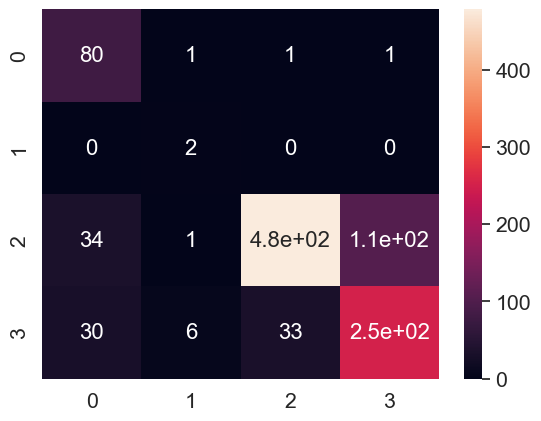

In [16]:
import seaborn as sn
from sklearn.metrics import classification_report, confusion_matrix
print('Confusion Matrix')
cm = confusion_matrix(y_pred, y_valid)
print(cm)
sn.set(font_scale=1.4)#for label size
sn.heatmap(cm, annot=True,annot_kws={"size": 16})# font size

In [17]:
files = []
categories = []

for directory_path in glob.glob('/Users/mahmouddaker/Desktop/University/MSA/Semester 6/CS363/Project/Alzheimer_s Dataset/test/*'):

    label=directory_path.split('\\')[-1]
    
    for img_path in glob.glob(os.path.join(directory_path,'*.jpg')):
        files.append(img_path)
        categories.append(label)

df = pd.DataFrame({
 'Filename': files,
 'Category': categories
})

df

Filename  \
0     /Users/mahmouddaker/Desktop/University/MSA/Sem...   
1     /Users/mahmouddaker/Desktop/University/MSA/Sem...   
2     /Users/mahmouddaker/Desktop/University/MSA/Sem...   
3     /Users/mahmouddaker/Desktop/University/MSA/Sem...   
4     /Users/mahmouddaker/Desktop/University/MSA/Sem...   
...                                                 ...   
1274  /Users/mahmouddaker/Desktop/University/MSA/Sem...   
1275  /Users/mahmouddaker/Desktop/University/MSA/Sem...   
1276  /Users/mahmouddaker/Desktop/University/MSA/Sem...   
1277  /Users/mahmouddaker/Desktop/University/MSA/Sem...   
1278  /Users/mahmouddaker/Desktop/University/MSA/Sem...   

                                               Category  
0     /Users/mahmouddaker/Desktop/University/MSA/Sem...  
1     /Users/mahmouddaker/Desktop/University/MSA/Sem...  
2     /Users/mahmouddaker/Desktop/University/MSA/Sem...  
3     /Users/mahmouddaker/Desktop/University/MSA/Sem...  
4     /Users/mahmouddaker/Desktop/University/MSA/Sem...  
...                                                 ...  
1274  /Users/mahmouddaker/Desktop/University/MSA/Sem...  
1275  /Users/mahmouddaker/Desktop/University/MSA/Sem...  
1276  /Users/mahmouddaker/Desktop/University/MSA/Sem...  
1277  /Users/mahmouddaker/Desktop/University/MSA/Sem...  
1278  /Users/mahmouddaker/Desktop/University/MSA/Sem...  

[1279 rows x 2 columns]

In [18]:
df.head()

Filename  \
0  /Users/mahmouddaker/Desktop/University/MSA/Sem...   
1  /Users/mahmouddaker/Desktop/University/MSA/Sem...   
2  /Users/mahmouddaker/Desktop/University/MSA/Sem...   
3  /Users/mahmouddaker/Desktop/University/MSA/Sem...   
4  /Users/mahmouddaker/Desktop/University/MSA/Sem...   

                                            Category  
0  /Users/mahmouddaker/Desktop/University/MSA/Sem...  
1  /Users/mahmouddaker/Desktop/University/MSA/Sem...  
2  /Users/mahmouddaker/Desktop/University/MSA/Sem...  
3  /Users/mahmouddaker/Desktop/University/MSA/Sem...  
4  /Users/mahmouddaker/Desktop/University/MSA/Sem...

In [19]:
df['Category'].value_counts()

/Users/mahmouddaker/Desktop/University/MSA/Semester 6/CS363/Project/Alzheimer_s Dataset/test/NonDemented         640
/Users/mahmouddaker/Desktop/University/MSA/Semester 6/CS363/Project/Alzheimer_s Dataset/test/VeryMildDemented    448
/Users/mahmouddaker/Desktop/University/MSA/Semester 6/CS363/Project/Alzheimer_s Dataset/test/MildDemented        179
/Users/mahmouddaker/Desktop/University/MSA/Semester 6/CS363/Project/Alzheimer_s Dataset/test/ModerateDemented     12
Name: Category, dtype: int64

In [20]:
df.shape

(1279, 2)

In [21]:
le = preprocessing.LabelEncoder()
le.fit(df['Category'])
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

{'/Users/mahmouddaker/Desktop/University/MSA/Semester 6/CS363/Project/Alzheimer_s Dataset/test/MildDemented': 0, '/Users/mahmouddaker/Desktop/University/MSA/Semester 6/CS363/Project/Alzheimer_s Dataset/test/ModerateDemented': 1, '/Users/mahmouddaker/Desktop/University/MSA/Semester 6/CS363/Project/Alzheimer_s Dataset/test/NonDemented': 2, '/Users/mahmouddaker/Desktop/University/MSA/Semester 6/CS363/Project/Alzheimer_s Dataset/test/VeryMildDemented': 3}


In [22]:
y = le.transform(df['Category'])

In [23]:
start = time.time()

x_test = []
y_test = y

for f in tqdm(df.Filename[:]):
    img_path = f
    img = load_img(img_path, target_size=(48, 48))
    x = img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    features = model.predict(x)
    features_reduce =  features.squeeze()
    x_test.append(features_reduce)

  0%|                                                  | 0/1279 [00:00<?, ?it/s]

1/1 [==============================] - 0s 37ms/step


  0%|                                          | 2/1279 [00:00<01:54, 11.12it/s]

1/1 [==============================] - 0s 33ms/step


  0%|▏                                         | 4/1279 [00:00<01:44, 12.22it/s]

1/1 [==============================] - 0s 33ms/step


  0%|▏                                         | 6/1279 [00:00<01:42, 12.47it/s]

1/1 [==============================] - 0s 32ms/step


  1%|▎                                         | 8/1279 [00:00<02:26,  8.69it/s]

1/1 [==============================] - 0s 35ms/step


  1%|▎                                        | 10/1279 [00:00<02:12,  9.57it/s]

1/1 [==============================] - 0s 34ms/step


  1%|▍                                        | 12/1279 [00:01<02:01, 10.44it/s]

1/1 [==============================] - 0s 34ms/step


  1%|▍                                        | 14/1279 [00:01<01:54, 11.07it/s]

1/1 [==============================] - 0s 33ms/step


  1%|▌                                        | 16/1279 [00:01<01:49, 11.54it/s]

1/1 [==============================] - 0s 33ms/step


  1%|▌                                        | 18/1279 [00:01<01:47, 11.76it/s]

1/1 [==============================] - 0s 34ms/step


  2%|▋                                        | 20/1279 [00:01<01:42, 12.23it/s]

1/1 [==============================] - 0s 35ms/step


  2%|▋                                        | 22/1279 [00:01<01:40, 12.48it/s]

1/1 [==============================] - 0s 34ms/step


  2%|▊                                        | 24/1279 [00:02<01:41, 12.37it/s]

1/1 [==============================] - 0s 33ms/step


  2%|▊                                        | 26/1279 [00:02<01:41, 12.36it/s]

1/1 [==============================] - 0s 34ms/step


  2%|▉                                        | 28/1279 [00:02<01:39, 12.58it/s]

1/1 [==============================] - 0s 35ms/step


  2%|▉                                        | 30/1279 [00:02<01:39, 12.55it/s]

1/1 [==============================] - 0s 35ms/step


  3%|█                                        | 32/1279 [00:02<01:38, 12.68it/s]

1/1 [==============================] - 0s 34ms/step


  3%|█                                        | 34/1279 [00:02<01:38, 12.65it/s]

1/1 [==============================] - 0s 33ms/step


  3%|█▏                                       | 36/1279 [00:03<01:37, 12.69it/s]

1/1 [==============================] - 0s 34ms/step


  3%|█▏                                       | 38/1279 [00:03<01:36, 12.91it/s]

1/1 [==============================] - 0s 34ms/step


  3%|█▎                                       | 40/1279 [00:03<01:35, 13.00it/s]

1/1 [==============================] - 0s 33ms/step


  3%|█▎                                       | 42/1279 [00:03<01:32, 13.39it/s]

1/1 [==============================] - 0s 33ms/step


  3%|█▍                                       | 44/1279 [00:03<01:34, 13.08it/s]

1/1 [==============================] - 0s 35ms/step


  4%|█▍                                       | 46/1279 [00:03<01:35, 12.88it/s]

1/1 [==============================] - 0s 34ms/step


  4%|█▌                                       | 48/1279 [00:03<01:35, 12.95it/s]

1/1 [==============================] - 0s 32ms/step


  4%|█▌                                       | 50/1279 [00:04<01:30, 13.55it/s]

1/1 [==============================] - 0s 32ms/step


  4%|█▋                                       | 52/1279 [00:04<01:27, 13.97it/s]

1/1 [==============================] - 0s 34ms/step


  4%|█▋                                       | 54/1279 [00:04<01:26, 14.09it/s]

1/1 [==============================] - 0s 35ms/step


  4%|█▊                                       | 56/1279 [00:04<01:26, 14.16it/s]

1/1 [==============================] - 0s 32ms/step


  5%|█▊                                       | 58/1279 [00:04<01:24, 14.40it/s]

1/1 [==============================] - 0s 32ms/step


  5%|█▉                                       | 60/1279 [00:04<01:23, 14.63it/s]

1/1 [==============================] - 0s 33ms/step


  5%|█▉                                       | 62/1279 [00:04<01:23, 14.53it/s]

1/1 [==============================] - 0s 33ms/step


  5%|██                                       | 64/1279 [00:05<01:23, 14.61it/s]

1/1 [==============================] - 0s 32ms/step


  5%|██                                       | 66/1279 [00:05<01:22, 14.70it/s]

1/1 [==============================] - 0s 32ms/step


  5%|██▏                                      | 68/1279 [00:05<01:26, 14.03it/s]

1/1 [==============================] - 0s 34ms/step


  5%|██▏                                      | 70/1279 [00:05<01:25, 14.13it/s]

1/1 [==============================] - 0s 33ms/step


  6%|██▎                                      | 72/1279 [00:05<01:26, 14.01it/s]

1/1 [==============================] - 0s 36ms/step


  6%|██▎                                      | 74/1279 [00:05<01:24, 14.19it/s]

1/1 [==============================] - 0s 32ms/step


  6%|██▍                                      | 76/1279 [00:05<01:23, 14.38it/s]

1/1 [==============================] - 0s 33ms/step


  6%|██▌                                      | 78/1279 [00:06<01:23, 14.30it/s]

1/1 [==============================] - 0s 34ms/step


  6%|██▌                                      | 80/1279 [00:06<01:23, 14.36it/s]

1/1 [==============================] - 0s 35ms/step


  6%|██▋                                      | 82/1279 [00:06<01:23, 14.33it/s]

1/1 [==============================] - 0s 34ms/step


  7%|██▋                                      | 84/1279 [00:06<01:23, 14.30it/s]

1/1 [==============================] - 0s 33ms/step


  7%|██▊                                      | 86/1279 [00:06<01:23, 14.37it/s]

1/1 [==============================] - 0s 32ms/step


  7%|██▊                                      | 88/1279 [00:06<01:21, 14.53it/s]

1/1 [==============================] - 0s 35ms/step


  7%|██▉                                      | 90/1279 [00:06<01:22, 14.46it/s]

1/1 [==============================] - 0s 33ms/step


  7%|██▉                                      | 92/1279 [00:06<01:21, 14.55it/s]

1/1 [==============================] - 0s 32ms/step


  7%|███                                      | 94/1279 [00:07<01:21, 14.57it/s]

1/1 [==============================] - 0s 33ms/step


  8%|███                                      | 96/1279 [00:07<01:22, 14.36it/s]

1/1 [==============================] - 0s 34ms/step


  8%|███▏                                     | 98/1279 [00:07<01:23, 14.15it/s]

1/1 [==============================] - 0s 36ms/step


  8%|███▏                                    | 100/1279 [00:07<01:33, 12.60it/s]

1/1 [==============================] - 0s 34ms/step


  8%|███▏                                    | 102/1279 [00:07<01:29, 13.08it/s]

1/1 [==============================] - 0s 36ms/step


  8%|███▎                                    | 104/1279 [00:07<01:26, 13.59it/s]

1/1 [==============================] - 0s 32ms/step


  8%|███▎                                    | 106/1279 [00:08<01:23, 13.99it/s]

1/1 [==============================] - 0s 34ms/step


  8%|███▍                                    | 108/1279 [00:08<01:23, 14.05it/s]

1/1 [==============================] - 0s 35ms/step


  9%|███▍                                    | 110/1279 [00:08<01:21, 14.28it/s]

1/1 [==============================] - 0s 33ms/step


  9%|███▌                                    | 112/1279 [00:08<01:20, 14.41it/s]

1/1 [==============================] - 0s 33ms/step


  9%|███▌                                    | 114/1279 [00:08<01:20, 14.49it/s]

1/1 [==============================] - 0s 33ms/step


  9%|███▋                                    | 116/1279 [00:08<01:21, 14.33it/s]

1/1 [==============================] - 0s 35ms/step


  9%|███▋                                    | 118/1279 [00:08<01:23, 13.95it/s]

1/1 [==============================] - 0s 35ms/step


  9%|███▊                                    | 120/1279 [00:09<01:22, 14.03it/s]

1/1 [==============================] - 0s 32ms/step


 10%|███▊                                    | 122/1279 [00:09<01:28, 13.03it/s]

1/1 [==============================] - 0s 33ms/step


 10%|███▉                                    | 124/1279 [00:09<01:26, 13.43it/s]

1/1 [==============================] - 0s 34ms/step


 10%|███▉                                    | 126/1279 [00:09<01:24, 13.57it/s]

1/1 [==============================] - 0s 39ms/step


 10%|████                                    | 128/1279 [00:09<01:24, 13.70it/s]

1/1 [==============================] - 0s 35ms/step


 10%|████                                    | 130/1279 [00:09<01:31, 12.55it/s]

1/1 [==============================] - 0s 34ms/step


 10%|████▏                                   | 132/1279 [00:09<01:27, 13.16it/s]

1/1 [==============================] - 0s 33ms/step


 10%|████▏                                   | 134/1279 [00:10<01:25, 13.42it/s]

1/1 [==============================] - 0s 33ms/step


 11%|████▎                                   | 136/1279 [00:10<01:23, 13.67it/s]

1/1 [==============================] - 0s 34ms/step


 11%|████▎                                   | 138/1279 [00:10<01:21, 13.92it/s]

1/1 [==============================] - 0s 35ms/step


 11%|████▍                                   | 140/1279 [00:10<01:21, 13.96it/s]

1/1 [==============================] - 0s 35ms/step


 11%|████▍                                   | 142/1279 [00:10<01:21, 13.96it/s]

1/1 [==============================] - 0s 34ms/step


 11%|████▌                                   | 144/1279 [00:10<01:28, 12.82it/s]

1/1 [==============================] - 0s 34ms/step


 11%|████▌                                   | 146/1279 [00:10<01:26, 13.16it/s]

1/1 [==============================] - 0s 33ms/step


 12%|████▋                                   | 148/1279 [00:11<01:23, 13.62it/s]

1/1 [==============================] - 0s 34ms/step


 12%|████▋                                   | 150/1279 [00:11<01:21, 13.92it/s]

1/1 [==============================] - 0s 34ms/step


 12%|████▊                                   | 152/1279 [00:11<01:20, 13.99it/s]

1/1 [==============================] - 0s 34ms/step


 12%|████▊                                   | 154/1279 [00:11<01:28, 12.71it/s]

1/1 [==============================] - 0s 36ms/step


 12%|████▉                                   | 156/1279 [00:11<01:26, 13.00it/s]

1/1 [==============================] - 0s 33ms/step


 12%|████▉                                   | 158/1279 [00:11<01:33, 11.95it/s]

1/1 [==============================] - 0s 38ms/step


 13%|█████                                   | 160/1279 [00:12<01:28, 12.61it/s]

1/1 [==============================] - 0s 35ms/step


 13%|█████                                   | 162/1279 [00:12<01:24, 13.17it/s]

1/1 [==============================] - 0s 35ms/step


 13%|█████▏                                  | 164/1279 [00:12<01:23, 13.43it/s]

1/1 [==============================] - 0s 31ms/step


 13%|█████▏                                  | 166/1279 [00:12<01:20, 13.74it/s]

1/1 [==============================] - 0s 33ms/step


 13%|█████▎                                  | 168/1279 [00:12<01:17, 14.26it/s]

1/1 [==============================] - 0s 33ms/step


 13%|█████▎                                  | 170/1279 [00:12<01:17, 14.38it/s]

1/1 [==============================] - 0s 32ms/step


 13%|█████▍                                  | 172/1279 [00:12<01:15, 14.65it/s]

1/1 [==============================] - 0s 34ms/step


 14%|█████▍                                  | 174/1279 [00:13<01:15, 14.71it/s]

1/1 [==============================] - 0s 31ms/step


 14%|█████▌                                  | 176/1279 [00:13<01:14, 14.88it/s]

1/1 [==============================] - 0s 33ms/step


 14%|█████▌                                  | 178/1279 [00:13<01:13, 14.93it/s]

1/1 [==============================] - 0s 34ms/step


 14%|█████▋                                  | 180/1279 [00:13<01:15, 14.56it/s]

1/1 [==============================] - 0s 36ms/step


 14%|█████▋                                  | 182/1279 [00:13<01:16, 14.35it/s]

1/1 [==============================] - 0s 35ms/step


 14%|█████▊                                  | 184/1279 [00:13<01:15, 14.56it/s]

1/1 [==============================] - 0s 32ms/step


 15%|█████▊                                  | 186/1279 [00:13<01:15, 14.54it/s]

1/1 [==============================] - 0s 35ms/step


 15%|█████▉                                  | 188/1279 [00:13<01:15, 14.46it/s]

1/1 [==============================] - 0s 34ms/step


 15%|█████▉                                  | 190/1279 [00:14<01:15, 14.47it/s]

1/1 [==============================] - 0s 33ms/step


 15%|██████                                  | 192/1279 [00:14<01:13, 14.70it/s]

1/1 [==============================] - 0s 33ms/step


 15%|██████                                  | 194/1279 [00:14<01:13, 14.72it/s]

1/1 [==============================] - 0s 34ms/step


 15%|██████▏                                 | 196/1279 [00:14<01:13, 14.79it/s]

1/1 [==============================] - 0s 33ms/step


 15%|██████▏                                 | 198/1279 [00:14<01:13, 14.78it/s]

1/1 [==============================] - 0s 33ms/step


 16%|██████▎                                 | 200/1279 [00:14<01:13, 14.71it/s]

1/1 [==============================] - 0s 34ms/step


 16%|██████▎                                 | 202/1279 [00:14<01:21, 13.27it/s]

1/1 [==============================] - 0s 34ms/step


 16%|██████▍                                 | 204/1279 [00:15<01:20, 13.30it/s]

1/1 [==============================] - 0s 35ms/step


 16%|██████▍                                 | 206/1279 [00:15<01:19, 13.50it/s]

1/1 [==============================] - 0s 35ms/step


 16%|██████▌                                 | 208/1279 [00:15<01:18, 13.63it/s]

1/1 [==============================] - 0s 37ms/step


 16%|██████▌                                 | 210/1279 [00:15<01:17, 13.74it/s]

1/1 [==============================] - 0s 32ms/step


 17%|██████▋                                 | 212/1279 [00:15<01:16, 14.00it/s]

1/1 [==============================] - 0s 34ms/step


 17%|██████▋                                 | 214/1279 [00:15<01:16, 13.96it/s]

1/1 [==============================] - 0s 33ms/step


 17%|██████▊                                 | 216/1279 [00:15<01:17, 13.71it/s]

1/1 [==============================] - 0s 38ms/step


 17%|██████▊                                 | 218/1279 [00:16<01:20, 13.21it/s]

1/1 [==============================] - 0s 33ms/step


 17%|██████▉                                 | 220/1279 [00:16<01:19, 13.39it/s]

1/1 [==============================] - 0s 35ms/step


 17%|██████▉                                 | 222/1279 [00:16<01:27, 12.13it/s]

1/1 [==============================] - 0s 35ms/step


 18%|███████                                 | 224/1279 [00:16<01:24, 12.42it/s]

1/1 [==============================] - 0s 34ms/step


 18%|███████                                 | 226/1279 [00:16<01:23, 12.66it/s]

1/1 [==============================] - 0s 36ms/step


 18%|███████▏                                | 228/1279 [00:16<01:23, 12.64it/s]

1/1 [==============================] - 0s 35ms/step


 18%|███████▏                                | 230/1279 [00:17<01:21, 12.83it/s]

1/1 [==============================] - 0s 34ms/step


 18%|███████▎                                | 232/1279 [00:17<01:18, 13.39it/s]

1/1 [==============================] - 0s 33ms/step


 18%|███████▎                                | 234/1279 [00:17<01:16, 13.69it/s]

1/1 [==============================] - 0s 33ms/step


 18%|███████▍                                | 236/1279 [00:17<01:14, 13.99it/s]

1/1 [==============================] - 0s 33ms/step


 19%|███████▍                                | 238/1279 [00:17<01:13, 14.20it/s]

1/1 [==============================] - 0s 33ms/step


 19%|███████▌                                | 240/1279 [00:17<01:12, 14.37it/s]

1/1 [==============================] - 0s 32ms/step


 19%|███████▌                                | 242/1279 [00:17<01:11, 14.48it/s]

1/1 [==============================] - 0s 34ms/step


 19%|███████▋                                | 244/1279 [00:18<01:11, 14.49it/s]

1/1 [==============================] - 0s 32ms/step


 19%|███████▋                                | 246/1279 [00:18<01:10, 14.70it/s]

1/1 [==============================] - 0s 34ms/step


 19%|███████▊                                | 248/1279 [00:18<01:10, 14.62it/s]

1/1 [==============================] - 0s 35ms/step


 20%|███████▊                                | 250/1279 [00:18<01:10, 14.68it/s]

1/1 [==============================] - 0s 33ms/step


 20%|███████▉                                | 252/1279 [00:18<01:11, 14.45it/s]

1/1 [==============================] - 0s 34ms/step


 20%|███████▉                                | 254/1279 [00:18<01:11, 14.39it/s]

1/1 [==============================] - 0s 34ms/step


 20%|████████                                | 256/1279 [00:18<01:11, 14.39it/s]

1/1 [==============================] - 0s 33ms/step


 20%|████████                                | 258/1279 [00:19<01:10, 14.45it/s]

1/1 [==============================] - 0s 34ms/step


 20%|████████▏                               | 260/1279 [00:19<01:14, 13.69it/s]

1/1 [==============================] - 0s 33ms/step


 20%|████████▏                               | 262/1279 [00:19<01:13, 13.75it/s]

1/1 [==============================] - 0s 34ms/step


 21%|████████▎                               | 264/1279 [00:19<01:12, 14.02it/s]

1/1 [==============================] - 0s 34ms/step


 21%|████████▎                               | 266/1279 [00:19<01:10, 14.28it/s]

1/1 [==============================] - 0s 35ms/step


 21%|████████▍                               | 268/1279 [00:19<01:10, 14.44it/s]

1/1 [==============================] - 0s 33ms/step


 21%|████████▍                               | 270/1279 [00:19<01:19, 12.77it/s]

1/1 [==============================] - 0s 34ms/step


 21%|████████▌                               | 272/1279 [00:20<01:23, 12.00it/s]

1/1 [==============================] - 0s 35ms/step


 21%|████████▌                               | 274/1279 [00:20<01:21, 12.40it/s]

1/1 [==============================] - 0s 37ms/step


 22%|████████▋                               | 276/1279 [00:20<01:19, 12.69it/s]

1/1 [==============================] - 0s 35ms/step


 22%|████████▋                               | 278/1279 [00:20<01:18, 12.79it/s]

1/1 [==============================] - 0s 34ms/step


 22%|████████▊                               | 280/1279 [00:20<01:16, 13.13it/s]

1/1 [==============================] - 0s 34ms/step


 22%|████████▊                               | 282/1279 [00:20<01:13, 13.52it/s]

1/1 [==============================] - 0s 47ms/step


 22%|████████▉                               | 284/1279 [00:21<01:15, 13.17it/s]

1/1 [==============================] - 0s 35ms/step


 22%|████████▉                               | 286/1279 [00:21<01:13, 13.46it/s]

1/1 [==============================] - 0s 34ms/step


 23%|█████████                               | 288/1279 [00:21<01:13, 13.51it/s]

1/1 [==============================] - 0s 34ms/step


 23%|█████████                               | 290/1279 [00:21<01:11, 13.79it/s]

1/1 [==============================] - 0s 34ms/step


 23%|█████████▏                              | 292/1279 [00:21<01:10, 14.02it/s]

1/1 [==============================] - 0s 34ms/step


 23%|█████████▏                              | 294/1279 [00:21<01:09, 14.20it/s]

1/1 [==============================] - 0s 32ms/step


 23%|█████████▎                              | 296/1279 [00:21<01:07, 14.49it/s]

1/1 [==============================] - 0s 35ms/step


 23%|█████████▎                              | 298/1279 [00:21<01:08, 14.32it/s]

1/1 [==============================] - 0s 46ms/step


 23%|█████████▍                              | 300/1279 [00:22<01:09, 13.99it/s]

1/1 [==============================] - 0s 32ms/step


 24%|█████████▍                              | 302/1279 [00:22<01:08, 14.27it/s]

1/1 [==============================] - 0s 34ms/step


 24%|█████████▌                              | 304/1279 [00:22<01:08, 14.18it/s]

1/1 [==============================] - 0s 36ms/step


 24%|█████████▌                              | 306/1279 [00:22<01:08, 14.31it/s]

1/1 [==============================] - 0s 33ms/step


 24%|█████████▋                              | 308/1279 [00:22<01:07, 14.34it/s]

1/1 [==============================] - 0s 35ms/step


 24%|█████████▋                              | 310/1279 [00:22<01:09, 13.93it/s]

1/1 [==============================] - 0s 32ms/step


 24%|█████████▊                              | 312/1279 [00:22<01:07, 14.28it/s]

1/1 [==============================] - 0s 35ms/step


 25%|█████████▊                              | 314/1279 [00:23<01:07, 14.33it/s]

1/1 [==============================] - 0s 33ms/step


 25%|█████████▉                              | 316/1279 [00:23<01:07, 14.19it/s]

1/1 [==============================] - 0s 40ms/step


 25%|█████████▉                              | 318/1279 [00:23<01:07, 14.18it/s]

1/1 [==============================] - 0s 32ms/step


 25%|██████████                              | 320/1279 [00:23<01:06, 14.37it/s]

1/1 [==============================] - 0s 33ms/step


 25%|██████████                              | 322/1279 [00:23<01:06, 14.46it/s]

1/1 [==============================] - 0s 34ms/step


 25%|██████████▏                             | 324/1279 [00:23<01:06, 14.40it/s]

1/1 [==============================] - 0s 35ms/step


 25%|██████████▏                             | 326/1279 [00:23<01:12, 13.07it/s]

1/1 [==============================] - 0s 32ms/step


 26%|██████████▎                             | 328/1279 [00:24<01:10, 13.47it/s]

1/1 [==============================] - 0s 32ms/step


 26%|██████████▎                             | 330/1279 [00:24<01:08, 13.78it/s]

1/1 [==============================] - 0s 33ms/step


 26%|██████████▍                             | 332/1279 [00:24<01:08, 13.78it/s]

1/1 [==============================] - 0s 36ms/step


 26%|██████████▍                             | 334/1279 [00:24<01:08, 13.89it/s]

1/1 [==============================] - 0s 34ms/step


 26%|██████████▌                             | 336/1279 [00:24<01:07, 14.02it/s]

1/1 [==============================] - 0s 32ms/step


 26%|██████████▌                             | 338/1279 [00:24<01:05, 14.34it/s]

1/1 [==============================] - 0s 32ms/step


 27%|██████████▋                             | 340/1279 [00:24<01:04, 14.62it/s]

1/1 [==============================] - 0s 33ms/step


 27%|██████████▋                             | 342/1279 [00:25<01:03, 14.67it/s]

1/1 [==============================] - 0s 31ms/step


 27%|██████████▊                             | 344/1279 [00:25<01:03, 14.66it/s]

1/1 [==============================] - 0s 32ms/step


 27%|██████████▊                             | 346/1279 [00:25<01:09, 13.36it/s]

1/1 [==============================] - 0s 34ms/step


 27%|██████████▉                             | 348/1279 [00:25<01:07, 13.87it/s]

1/1 [==============================] - 0s 31ms/step


 27%|██████████▉                             | 350/1279 [00:25<01:06, 14.06it/s]

1/1 [==============================] - 0s 33ms/step


 28%|███████████                             | 352/1279 [00:25<01:04, 14.34it/s]

1/1 [==============================] - 0s 34ms/step


 28%|███████████                             | 354/1279 [00:25<01:03, 14.50it/s]

1/1 [==============================] - 0s 33ms/step


 28%|███████████▏                            | 356/1279 [00:26<01:03, 14.49it/s]

1/1 [==============================] - 0s 37ms/step


 28%|███████████▏                            | 358/1279 [00:26<01:04, 14.37it/s]

1/1 [==============================] - 0s 33ms/step


 28%|███████████▎                            | 360/1279 [00:26<01:02, 14.61it/s]

1/1 [==============================] - 0s 33ms/step


 28%|███████████▎                            | 362/1279 [00:26<01:01, 14.83it/s]

1/1 [==============================] - 0s 33ms/step


 28%|███████████▍                            | 364/1279 [00:26<01:01, 14.79it/s]

1/1 [==============================] - 0s 36ms/step


 29%|███████████▍                            | 366/1279 [00:26<01:02, 14.61it/s]

1/1 [==============================] - 0s 33ms/step


 29%|███████████▌                            | 368/1279 [00:26<01:03, 14.36it/s]

1/1 [==============================] - 0s 34ms/step


 29%|███████████▌                            | 370/1279 [00:27<01:02, 14.53it/s]

1/1 [==============================] - 0s 33ms/step


 29%|███████████▋                            | 372/1279 [00:27<01:01, 14.67it/s]

1/1 [==============================] - 0s 33ms/step


 29%|███████████▋                            | 374/1279 [00:27<01:01, 14.63it/s]

1/1 [==============================] - 0s 34ms/step


 29%|███████████▊                            | 376/1279 [00:27<01:07, 13.33it/s]

1/1 [==============================] - 0s 34ms/step


 30%|███████████▊                            | 378/1279 [00:27<01:06, 13.49it/s]

1/1 [==============================] - 0s 35ms/step


 30%|███████████▉                            | 380/1279 [00:27<01:05, 13.63it/s]

1/1 [==============================] - 0s 33ms/step


 30%|███████████▉                            | 382/1279 [00:27<01:04, 13.89it/s]

1/1 [==============================] - 0s 34ms/step


 30%|████████████                            | 384/1279 [00:28<01:02, 14.23it/s]

1/1 [==============================] - 0s 33ms/step


 30%|████████████                            | 386/1279 [00:28<01:02, 14.31it/s]

1/1 [==============================] - 0s 33ms/step


 30%|████████████▏                           | 388/1279 [00:28<01:02, 14.37it/s]

1/1 [==============================] - 0s 33ms/step


 30%|████████████▏                           | 390/1279 [00:28<01:02, 14.31it/s]

1/1 [==============================] - 0s 32ms/step


 31%|████████████▎                           | 392/1279 [00:28<01:03, 14.04it/s]

1/1 [==============================] - 0s 34ms/step


 31%|████████████▎                           | 394/1279 [00:28<01:02, 14.27it/s]

1/1 [==============================] - 0s 33ms/step


 31%|████████████▍                           | 396/1279 [00:28<01:01, 14.33it/s]

1/1 [==============================] - 0s 32ms/step


 31%|████████████▍                           | 398/1279 [00:29<01:01, 14.37it/s]

1/1 [==============================] - 0s 33ms/step


 31%|████████████▌                           | 400/1279 [00:29<01:01, 14.39it/s]

1/1 [==============================] - 0s 33ms/step


 31%|████████████▌                           | 402/1279 [00:29<01:01, 14.25it/s]

1/1 [==============================] - 0s 34ms/step


 32%|████████████▋                           | 404/1279 [00:29<01:01, 14.30it/s]

1/1 [==============================] - 0s 34ms/step


 32%|████████████▋                           | 406/1279 [00:29<01:01, 14.20it/s]

1/1 [==============================] - 0s 33ms/step


 32%|████████████▊                           | 408/1279 [00:29<01:02, 13.92it/s]

1/1 [==============================] - 0s 38ms/step


 32%|████████████▊                           | 410/1279 [00:29<01:07, 12.81it/s]

1/1 [==============================] - 0s 32ms/step


 32%|████████████▉                           | 412/1279 [00:30<01:06, 12.99it/s]

1/1 [==============================] - 0s 32ms/step


 32%|████████████▉                           | 414/1279 [00:30<01:04, 13.41it/s]

1/1 [==============================] - 0s 33ms/step


 33%|█████████████                           | 416/1279 [00:30<01:02, 13.90it/s]

1/1 [==============================] - 0s 32ms/step


 33%|█████████████                           | 418/1279 [00:30<01:01, 14.01it/s]

1/1 [==============================] - 0s 32ms/step


 33%|█████████████▏                          | 420/1279 [00:30<00:59, 14.32it/s]

1/1 [==============================] - 0s 33ms/step


 33%|█████████████▏                          | 422/1279 [00:30<01:05, 13.06it/s]

1/1 [==============================] - 0s 34ms/step


 33%|█████████████▎                          | 424/1279 [00:30<01:03, 13.53it/s]

1/1 [==============================] - 0s 38ms/step


 33%|█████████████▎                          | 426/1279 [00:31<01:02, 13.74it/s]

1/1 [==============================] - 0s 50ms/step


 33%|█████████████▍                          | 428/1279 [00:31<01:05, 12.95it/s]

1/1 [==============================] - 0s 39ms/step


 34%|█████████████▍                          | 430/1279 [00:31<01:15, 11.28it/s]

1/1 [==============================] - 0s 32ms/step


 34%|█████████████▌                          | 432/1279 [00:31<01:10, 12.05it/s]

1/1 [==============================] - 0s 33ms/step


 34%|█████████████▌                          | 434/1279 [00:31<01:04, 13.04it/s]

1/1 [==============================] - 0s 32ms/step


 34%|█████████████▋                          | 436/1279 [00:31<01:01, 13.77it/s]

1/1 [==============================] - 0s 33ms/step


 34%|█████████████▋                          | 438/1279 [00:32<00:58, 14.39it/s]

1/1 [==============================] - 0s 32ms/step


 34%|█████████████▊                          | 440/1279 [00:32<00:57, 14.72it/s]

1/1 [==============================] - 0s 33ms/step


 35%|█████████████▊                          | 442/1279 [00:32<00:55, 15.15it/s]

1/1 [==============================] - 0s 117ms/step


 35%|█████████████▉                          | 444/1279 [00:32<01:13, 11.39it/s]

1/1 [==============================] - 0s 34ms/step


 35%|█████████████▉                          | 446/1279 [00:32<01:12, 11.51it/s]

1/1 [==============================] - 0s 31ms/step


 35%|██████████████                          | 448/1279 [00:32<01:07, 12.25it/s]

1/1 [==============================] - 0s 53ms/step


 35%|██████████████                          | 450/1279 [00:33<01:07, 12.26it/s]

1/1 [==============================] - 0s 35ms/step


 35%|██████████████▏                         | 452/1279 [00:33<01:06, 12.52it/s]

1/1 [==============================] - 0s 99ms/step


 35%|██████████████▏                         | 454/1279 [00:33<01:11, 11.49it/s]

1/1 [==============================] - 0s 33ms/step


 36%|██████████████▎                         | 456/1279 [00:33<01:06, 12.41it/s]

1/1 [==============================] - 0s 32ms/step


 36%|██████████████▎                         | 458/1279 [00:33<01:02, 13.04it/s]

1/1 [==============================] - 0s 35ms/step


 36%|██████████████▍                         | 460/1279 [00:33<00:59, 13.74it/s]

1/1 [==============================] - 0s 83ms/step


 36%|██████████████▍                         | 462/1279 [00:34<01:14, 11.03it/s]

1/1 [==============================] - 0s 35ms/step


 36%|██████████████▌                         | 464/1279 [00:34<01:13, 11.13it/s]

1/1 [==============================] - 0s 35ms/step


 36%|██████████████▌                         | 466/1279 [00:34<01:08, 11.80it/s]

1/1 [==============================] - 0s 34ms/step


 37%|██████████████▋                         | 468/1279 [00:34<01:08, 11.92it/s]

1/1 [==============================] - 0s 32ms/step


 37%|██████████████▋                         | 470/1279 [00:34<01:09, 11.60it/s]

1/1 [==============================] - 0s 33ms/step


 37%|██████████████▊                         | 472/1279 [00:34<01:05, 12.35it/s]

1/1 [==============================] - 0s 33ms/step


 37%|██████████████▊                         | 474/1279 [00:34<01:02, 12.92it/s]

1/1 [==============================] - 0s 36ms/step


 37%|██████████████▉                         | 476/1279 [00:35<01:00, 13.17it/s]

1/1 [==============================] - 0s 39ms/step


 37%|██████████████▉                         | 478/1279 [00:35<01:00, 13.18it/s]

1/1 [==============================] - 0s 36ms/step


 38%|███████████████                         | 480/1279 [00:35<00:59, 13.33it/s]

1/1 [==============================] - 0s 34ms/step


 38%|███████████████                         | 482/1279 [00:35<00:58, 13.74it/s]

1/1 [==============================] - 0s 34ms/step


 38%|███████████████▏                        | 484/1279 [00:35<00:56, 14.00it/s]

1/1 [==============================] - 0s 33ms/step


 38%|███████████████▏                        | 486/1279 [00:35<00:56, 14.04it/s]

1/1 [==============================] - 0s 36ms/step


 38%|███████████████▎                        | 488/1279 [00:35<00:56, 14.08it/s]

1/1 [==============================] - 0s 39ms/step


 38%|███████████████▎                        | 490/1279 [00:36<00:57, 13.76it/s]

1/1 [==============================] - 0s 34ms/step


 38%|███████████████▍                        | 492/1279 [00:36<01:02, 12.54it/s]

1/1 [==============================] - 0s 36ms/step


 39%|███████████████▍                        | 494/1279 [00:36<01:01, 12.68it/s]

1/1 [==============================] - 0s 42ms/step


 39%|███████████████▌                        | 496/1279 [00:36<01:07, 11.63it/s]

1/1 [==============================] - 0s 36ms/step


 39%|███████████████▌                        | 498/1279 [00:36<01:06, 11.83it/s]

1/1 [==============================] - 0s 34ms/step


 39%|███████████████▋                        | 500/1279 [00:36<01:03, 12.33it/s]

1/1 [==============================] - 0s 39ms/step


 39%|███████████████▋                        | 502/1279 [00:37<01:02, 12.42it/s]

1/1 [==============================] - 0s 47ms/step


 39%|███████████████▊                        | 504/1279 [00:37<01:04, 12.09it/s]

1/1 [==============================] - 0s 39ms/step


 40%|███████████████▊                        | 506/1279 [00:37<01:03, 12.16it/s]

1/1 [==============================] - 0s 35ms/step


 40%|███████████████▉                        | 508/1279 [00:37<01:01, 12.64it/s]

1/1 [==============================] - 0s 35ms/step


 40%|███████████████▉                        | 510/1279 [00:37<00:59, 12.90it/s]

1/1 [==============================] - 0s 34ms/step


 40%|████████████████                        | 512/1279 [00:37<00:59, 12.88it/s]

1/1 [==============================] - 0s 37ms/step


 40%|████████████████                        | 514/1279 [00:38<00:57, 13.24it/s]

1/1 [==============================] - 0s 43ms/step


 40%|████████████████▏                       | 516/1279 [00:38<00:57, 13.38it/s]

1/1 [==============================] - 0s 39ms/step


 41%|████████████████▏                       | 518/1279 [00:38<00:57, 13.21it/s]

1/1 [==============================] - 0s 35ms/step


 41%|████████████████▎                       | 520/1279 [00:38<00:56, 13.52it/s]

1/1 [==============================] - 0s 36ms/step


 41%|████████████████▎                       | 522/1279 [00:38<00:56, 13.50it/s]

1/1 [==============================] - 0s 32ms/step


 41%|████████████████▍                       | 524/1279 [00:38<00:54, 13.78it/s]

1/1 [==============================] - 0s 34ms/step


 41%|████████████████▍                       | 526/1279 [00:38<00:54, 13.75it/s]

1/1 [==============================] - 0s 33ms/step


 41%|████████████████▌                       | 528/1279 [00:39<00:54, 13.82it/s]

1/1 [==============================] - 0s 34ms/step


 41%|████████████████▌                       | 530/1279 [00:39<00:54, 13.69it/s]

1/1 [==============================] - 0s 31ms/step


 42%|████████████████▋                       | 532/1279 [00:39<01:06, 11.29it/s]

1/1 [==============================] - 0s 32ms/step


 42%|████████████████▋                       | 534/1279 [00:39<00:59, 12.44it/s]

1/1 [==============================] - 0s 30ms/step


 42%|████████████████▊                       | 536/1279 [00:39<00:55, 13.47it/s]

1/1 [==============================] - 0s 32ms/step


 42%|████████████████▊                       | 538/1279 [00:39<00:51, 14.26it/s]

1/1 [==============================] - 0s 35ms/step


 42%|████████████████▉                       | 540/1279 [00:40<01:05, 11.26it/s]

1/1 [==============================] - 0s 33ms/step


 42%|████████████████▉                       | 542/1279 [00:40<01:01, 12.08it/s]

1/1 [==============================] - 0s 34ms/step


 43%|█████████████████                       | 544/1279 [00:40<00:56, 12.90it/s]

1/1 [==============================] - 0s 33ms/step


 43%|█████████████████                       | 546/1279 [00:40<00:54, 13.41it/s]

1/1 [==============================] - 0s 32ms/step


 43%|█████████████████▏                      | 548/1279 [00:40<01:02, 11.73it/s]

1/1 [==============================] - 0s 32ms/step


 43%|█████████████████▏                      | 550/1279 [00:40<00:57, 12.73it/s]

1/1 [==============================] - 0s 32ms/step


 43%|█████████████████▎                      | 552/1279 [00:40<00:53, 13.59it/s]

1/1 [==============================] - 0s 60ms/step


 43%|█████████████████▎                      | 554/1279 [00:41<00:57, 12.69it/s]

1/1 [==============================] - 0s 32ms/step


 43%|█████████████████▍                      | 556/1279 [00:41<00:57, 12.53it/s]

1/1 [==============================] - 0s 35ms/step


 44%|█████████████████▍                      | 558/1279 [00:41<00:56, 12.71it/s]

1/1 [==============================] - 0s 32ms/step


 44%|█████████████████▌                      | 560/1279 [00:41<00:55, 13.00it/s]

1/1 [==============================] - 0s 67ms/step


 44%|█████████████████▌                      | 562/1279 [00:41<01:02, 11.50it/s]

1/1 [==============================] - 0s 31ms/step


 44%|█████████████████▋                      | 564/1279 [00:41<00:57, 12.49it/s]

1/1 [==============================] - 0s 33ms/step


 44%|█████████████████▋                      | 566/1279 [00:42<00:54, 13.20it/s]

1/1 [==============================] - 0s 32ms/step


 44%|█████████████████▊                      | 568/1279 [00:42<00:55, 12.79it/s]

1/1 [==============================] - 0s 35ms/step


 45%|█████████████████▊                      | 570/1279 [00:42<00:59, 11.91it/s]

1/1 [==============================] - 0s 34ms/step


 45%|█████████████████▉                      | 572/1279 [00:42<00:57, 12.19it/s]

1/1 [==============================] - 0s 35ms/step


 45%|█████████████████▉                      | 574/1279 [00:42<00:54, 12.91it/s]

1/1 [==============================] - 0s 33ms/step


 45%|██████████████████                      | 576/1279 [00:42<00:52, 13.35it/s]

1/1 [==============================] - 0s 39ms/step


 45%|██████████████████                      | 578/1279 [00:43<00:59, 11.85it/s]

1/1 [==============================] - 0s 34ms/step


 45%|██████████████████▏                     | 580/1279 [00:43<00:54, 12.78it/s]

1/1 [==============================] - 0s 33ms/step


 46%|██████████████████▏                     | 582/1279 [00:43<00:50, 13.68it/s]

1/1 [==============================] - 0s 123ms/step


 46%|██████████████████▎                     | 584/1279 [00:43<01:04, 10.83it/s]

1/1 [==============================] - 0s 35ms/step


 46%|██████████████████▎                     | 586/1279 [00:43<01:02, 11.12it/s]

1/1 [==============================] - 0s 37ms/step


 46%|██████████████████▍                     | 588/1279 [00:43<00:58, 11.77it/s]

1/1 [==============================] - 0s 38ms/step


 46%|██████████████████▍                     | 590/1279 [00:44<00:55, 12.39it/s]

1/1 [==============================] - 0s 94ms/step


 46%|██████████████████▌                     | 592/1279 [00:44<01:21,  8.40it/s]

1/1 [==============================] - 0s 36ms/step


 46%|██████████████████▌                     | 594/1279 [00:44<01:13,  9.30it/s]

1/1 [==============================] - 0s 31ms/step


 47%|██████████████████▋                     | 596/1279 [00:44<01:09,  9.85it/s]

1/1 [==============================] - 0s 32ms/step


 47%|██████████████████▋                     | 598/1279 [00:44<01:02, 10.98it/s]

1/1 [==============================] - 0s 34ms/step


 47%|██████████████████▊                     | 600/1279 [00:45<00:56, 12.00it/s]

1/1 [==============================] - 0s 33ms/step


 47%|██████████████████▊                     | 602/1279 [00:45<00:53, 12.68it/s]

1/1 [==============================] - 0s 34ms/step


 47%|██████████████████▉                     | 604/1279 [00:45<00:51, 13.18it/s]

1/1 [==============================] - 0s 33ms/step


 47%|██████████████████▉                     | 606/1279 [00:45<00:49, 13.65it/s]

1/1 [==============================] - 0s 31ms/step


 48%|███████████████████                     | 608/1279 [00:45<00:47, 14.11it/s]

1/1 [==============================] - 0s 31ms/step


 48%|███████████████████                     | 610/1279 [00:45<00:46, 14.35it/s]

1/1 [==============================] - 0s 32ms/step


 48%|███████████████████▏                    | 612/1279 [00:45<00:46, 14.45it/s]

1/1 [==============================] - 0s 32ms/step


 48%|███████████████████▏                    | 614/1279 [00:46<00:45, 14.65it/s]

1/1 [==============================] - 0s 32ms/step


 48%|███████████████████▎                    | 616/1279 [00:46<00:45, 14.57it/s]

1/1 [==============================] - 0s 31ms/step


 48%|███████████████████▎                    | 618/1279 [00:46<00:45, 14.55it/s]

1/1 [==============================] - 0s 32ms/step


 48%|███████████████████▍                    | 620/1279 [00:46<00:45, 14.39it/s]

1/1 [==============================] - 0s 33ms/step


 49%|███████████████████▍                    | 622/1279 [00:46<00:44, 14.66it/s]

1/1 [==============================] - 0s 33ms/step


 49%|███████████████████▌                    | 624/1279 [00:46<00:44, 14.67it/s]

1/1 [==============================] - 0s 33ms/step


 49%|███████████████████▌                    | 626/1279 [00:46<00:45, 14.44it/s]

1/1 [==============================] - 0s 33ms/step


 49%|███████████████████▋                    | 628/1279 [00:47<00:45, 14.39it/s]

1/1 [==============================] - 0s 34ms/step


 49%|███████████████████▋                    | 630/1279 [00:47<00:45, 14.19it/s]

1/1 [==============================] - 0s 33ms/step


 49%|███████████████████▊                    | 632/1279 [00:47<00:44, 14.43it/s]

1/1 [==============================] - 0s 32ms/step


 50%|███████████████████▊                    | 634/1279 [00:47<00:44, 14.39it/s]

1/1 [==============================] - 0s 33ms/step


 50%|███████████████████▉                    | 636/1279 [00:47<00:45, 14.17it/s]

1/1 [==============================] - 0s 33ms/step


 50%|███████████████████▉                    | 638/1279 [00:47<00:45, 14.19it/s]

1/1 [==============================] - 0s 35ms/step


 50%|████████████████████                    | 640/1279 [00:47<00:45, 14.05it/s]

1/1 [==============================] - 0s 33ms/step


 50%|████████████████████                    | 642/1279 [00:48<00:45, 14.04it/s]

1/1 [==============================] - 0s 32ms/step


 50%|████████████████████▏                   | 644/1279 [00:48<00:44, 14.37it/s]

1/1 [==============================] - 0s 33ms/step


 51%|████████████████████▏                   | 646/1279 [00:48<00:44, 14.20it/s]

1/1 [==============================] - 0s 32ms/step


 51%|████████████████████▎                   | 648/1279 [00:48<00:44, 14.13it/s]

1/1 [==============================] - 0s 36ms/step


 51%|████████████████████▎                   | 650/1279 [00:48<00:45, 13.88it/s]

1/1 [==============================] - 0s 34ms/step


 51%|████████████████████▍                   | 652/1279 [00:48<00:44, 14.10it/s]

1/1 [==============================] - 0s 39ms/step


 51%|████████████████████▍                   | 654/1279 [00:48<00:44, 14.03it/s]

1/1 [==============================] - 0s 32ms/step


 51%|████████████████████▌                   | 656/1279 [00:49<00:45, 13.57it/s]

1/1 [==============================] - 0s 35ms/step


 51%|████████████████████▌                   | 658/1279 [00:49<00:45, 13.63it/s]

1/1 [==============================] - 0s 37ms/step


 52%|████████████████████▋                   | 660/1279 [00:49<00:45, 13.71it/s]

1/1 [==============================] - 0s 35ms/step


 52%|████████████████████▋                   | 662/1279 [00:49<00:45, 13.68it/s]

1/1 [==============================] - 0s 31ms/step


 52%|████████████████████▊                   | 664/1279 [00:49<00:43, 14.00it/s]

1/1 [==============================] - 0s 32ms/step


 52%|████████████████████▊                   | 666/1279 [00:49<00:43, 14.19it/s]

1/1 [==============================] - 0s 31ms/step


 52%|████████████████████▉                   | 668/1279 [00:49<00:42, 14.37it/s]

1/1 [==============================] - 0s 32ms/step


 52%|████████████████████▉                   | 670/1279 [00:49<00:41, 14.63it/s]

1/1 [==============================] - 0s 50ms/step


 53%|█████████████████████                   | 672/1279 [00:50<00:43, 13.89it/s]

1/1 [==============================] - 0s 31ms/step


 53%|█████████████████████                   | 674/1279 [00:50<00:42, 14.14it/s]

1/1 [==============================] - 0s 32ms/step


 53%|█████████████████████▏                  | 676/1279 [00:50<00:42, 14.33it/s]

1/1 [==============================] - 0s 34ms/step


 53%|█████████████████████▏                  | 678/1279 [00:50<00:41, 14.50it/s]

1/1 [==============================] - 0s 34ms/step


 53%|█████████████████████▎                  | 680/1279 [00:50<00:44, 13.34it/s]

1/1 [==============================] - 0s 31ms/step


 53%|█████████████████████▎                  | 682/1279 [00:50<00:43, 13.81it/s]

1/1 [==============================] - 0s 35ms/step


 53%|█████████████████████▍                  | 684/1279 [00:51<00:42, 14.00it/s]

1/1 [==============================] - 0s 33ms/step


 54%|█████████████████████▍                  | 686/1279 [00:51<00:42, 14.03it/s]

1/1 [==============================] - 0s 33ms/step


 54%|█████████████████████▌                  | 688/1279 [00:51<00:40, 14.42it/s]

1/1 [==============================] - 0s 33ms/step


 54%|█████████████████████▌                  | 690/1279 [00:51<00:40, 14.40it/s]

1/1 [==============================] - 0s 34ms/step


 54%|█████████████████████▋                  | 692/1279 [00:51<00:40, 14.35it/s]

1/1 [==============================] - 0s 34ms/step


 54%|█████████████████████▋                  | 694/1279 [00:51<00:40, 14.28it/s]

1/1 [==============================] - 0s 37ms/step


 54%|█████████████████████▊                  | 696/1279 [00:51<00:41, 13.98it/s]

1/1 [==============================] - 0s 33ms/step


 55%|█████████████████████▊                  | 698/1279 [00:51<00:41, 14.00it/s]

1/1 [==============================] - 0s 35ms/step


 55%|█████████████████████▉                  | 700/1279 [00:52<00:45, 12.82it/s]

1/1 [==============================] - 0s 33ms/step


 55%|█████████████████████▉                  | 702/1279 [00:52<00:43, 13.16it/s]

1/1 [==============================] - 0s 34ms/step


 55%|██████████████████████                  | 704/1279 [00:52<00:42, 13.49it/s]

1/1 [==============================] - 0s 34ms/step


 55%|██████████████████████                  | 706/1279 [00:52<00:42, 13.63it/s]

1/1 [==============================] - 0s 33ms/step


 55%|██████████████████████▏                 | 708/1279 [00:52<00:41, 13.92it/s]

1/1 [==============================] - 0s 32ms/step


 56%|██████████████████████▏                 | 710/1279 [00:52<00:40, 13.90it/s]

1/1 [==============================] - 0s 32ms/step


 56%|██████████████████████▎                 | 712/1279 [00:53<00:40, 14.04it/s]

1/1 [==============================] - 0s 34ms/step


 56%|██████████████████████▎                 | 714/1279 [00:53<00:40, 14.04it/s]

1/1 [==============================] - 0s 33ms/step


 56%|██████████████████████▍                 | 716/1279 [00:53<00:39, 14.32it/s]

1/1 [==============================] - 0s 31ms/step


 56%|██████████████████████▍                 | 718/1279 [00:53<00:38, 14.65it/s]

1/1 [==============================] - 0s 31ms/step


 56%|██████████████████████▌                 | 720/1279 [00:53<00:38, 14.63it/s]

1/1 [==============================] - 0s 32ms/step


 56%|██████████████████████▌                 | 722/1279 [00:53<00:37, 14.91it/s]

1/1 [==============================] - 0s 31ms/step


 57%|██████████████████████▋                 | 724/1279 [00:53<00:37, 14.74it/s]

1/1 [==============================] - 0s 32ms/step


 57%|██████████████████████▋                 | 726/1279 [00:53<00:36, 14.96it/s]

1/1 [==============================] - 0s 35ms/step


 57%|██████████████████████▊                 | 728/1279 [00:54<00:37, 14.57it/s]

1/1 [==============================] - 0s 32ms/step


 57%|██████████████████████▊                 | 730/1279 [00:54<00:37, 14.67it/s]

1/1 [==============================] - 0s 32ms/step


 57%|██████████████████████▉                 | 732/1279 [00:54<00:36, 14.89it/s]

1/1 [==============================] - 0s 35ms/step


 57%|██████████████████████▉                 | 734/1279 [00:54<00:36, 15.01it/s]

1/1 [==============================] - 0s 36ms/step


 58%|███████████████████████                 | 736/1279 [00:54<00:37, 14.52it/s]

1/1 [==============================] - 0s 35ms/step


 58%|███████████████████████                 | 738/1279 [00:54<00:38, 13.96it/s]

1/1 [==============================] - 0s 32ms/step


 58%|███████████████████████▏                | 740/1279 [00:54<00:38, 14.01it/s]

1/1 [==============================] - 0s 32ms/step


 58%|███████████████████████▏                | 742/1279 [00:55<00:37, 14.26it/s]

1/1 [==============================] - 0s 34ms/step


 58%|███████████████████████▎                | 744/1279 [00:55<00:37, 14.24it/s]

1/1 [==============================] - 0s 35ms/step


 58%|███████████████████████▎                | 746/1279 [00:55<00:37, 14.20it/s]

1/1 [==============================] - 0s 41ms/step


 58%|███████████████████████▍                | 748/1279 [00:55<00:37, 14.17it/s]

1/1 [==============================] - 0s 33ms/step


 59%|███████████████████████▍                | 750/1279 [00:55<00:37, 14.29it/s]

1/1 [==============================] - 0s 32ms/step


 59%|███████████████████████▌                | 752/1279 [00:55<00:36, 14.38it/s]

1/1 [==============================] - 0s 32ms/step


 59%|███████████████████████▌                | 754/1279 [00:55<00:36, 14.37it/s]

1/1 [==============================] - 0s 33ms/step


 59%|███████████████████████▋                | 756/1279 [00:56<00:37, 14.12it/s]

1/1 [==============================] - 0s 41ms/step


 59%|███████████████████████▋                | 758/1279 [00:56<00:36, 14.12it/s]

1/1 [==============================] - 0s 35ms/step


 59%|███████████████████████▊                | 760/1279 [00:56<00:36, 14.16it/s]

1/1 [==============================] - 0s 32ms/step


 60%|███████████████████████▊                | 762/1279 [00:56<00:36, 14.18it/s]

1/1 [==============================] - 0s 32ms/step


 60%|███████████████████████▉                | 764/1279 [00:56<00:36, 14.08it/s]

1/1 [==============================] - 0s 35ms/step


 60%|███████████████████████▉                | 766/1279 [00:56<00:39, 12.95it/s]

1/1 [==============================] - 0s 34ms/step


 60%|████████████████████████                | 768/1279 [00:56<00:38, 13.18it/s]

1/1 [==============================] - 0s 40ms/step


 60%|████████████████████████                | 770/1279 [00:57<00:38, 13.24it/s]

1/1 [==============================] - 0s 35ms/step


 60%|████████████████████████▏               | 772/1279 [00:57<00:37, 13.36it/s]

1/1 [==============================] - 0s 33ms/step


 61%|████████████████████████▏               | 774/1279 [00:57<00:37, 13.41it/s]

1/1 [==============================] - 0s 31ms/step


 61%|████████████████████████▎               | 776/1279 [00:57<00:36, 13.95it/s]

1/1 [==============================] - 0s 31ms/step


 61%|████████████████████████▎               | 778/1279 [00:57<00:35, 14.26it/s]

1/1 [==============================] - 0s 34ms/step


 61%|████████████████████████▍               | 780/1279 [00:57<00:34, 14.48it/s]

1/1 [==============================] - 0s 42ms/step


 61%|████████████████████████▍               | 782/1279 [00:57<00:35, 14.02it/s]

1/1 [==============================] - 0s 37ms/step


 61%|████████████████████████▌               | 784/1279 [00:58<00:34, 14.19it/s]

1/1 [==============================] - 0s 31ms/step


 61%|████████████████████████▌               | 786/1279 [00:58<00:34, 14.49it/s]

1/1 [==============================] - 0s 33ms/step


 62%|████████████████████████▋               | 788/1279 [00:58<00:33, 14.65it/s]

1/1 [==============================] - 0s 33ms/step


 62%|████████████████████████▋               | 790/1279 [00:58<00:33, 14.60it/s]

1/1 [==============================] - 0s 32ms/step


 62%|████████████████████████▊               | 792/1279 [00:58<00:33, 14.54it/s]

1/1 [==============================] - 0s 34ms/step


 62%|████████████████████████▊               | 794/1279 [00:58<00:33, 14.55it/s]

1/1 [==============================] - 0s 34ms/step


 62%|████████████████████████▉               | 796/1279 [00:58<00:39, 12.24it/s]

1/1 [==============================] - 0s 33ms/step


 62%|████████████████████████▉               | 798/1279 [00:59<00:40, 11.79it/s]

1/1 [==============================] - 0s 34ms/step


 63%|█████████████████████████               | 800/1279 [00:59<00:39, 12.26it/s]

1/1 [==============================] - 0s 33ms/step


 63%|█████████████████████████               | 802/1279 [00:59<00:37, 12.84it/s]

1/1 [==============================] - 0s 35ms/step


 63%|█████████████████████████▏              | 804/1279 [00:59<00:36, 13.19it/s]

1/1 [==============================] - 0s 33ms/step


 63%|█████████████████████████▏              | 806/1279 [00:59<00:34, 13.70it/s]

1/1 [==============================] - 0s 32ms/step


 63%|█████████████████████████▎              | 808/1279 [00:59<00:33, 13.90it/s]

1/1 [==============================] - 0s 48ms/step


 63%|█████████████████████████▎              | 810/1279 [01:00<00:49,  9.43it/s]

1/1 [==============================] - 0s 32ms/step


 63%|█████████████████████████▍              | 812/1279 [01:00<00:44, 10.45it/s]

1/1 [==============================] - 0s 32ms/step


 64%|█████████████████████████▍              | 814/1279 [01:00<00:40, 11.52it/s]

1/1 [==============================] - 0s 32ms/step


 64%|█████████████████████████▌              | 816/1279 [01:00<00:37, 12.43it/s]

1/1 [==============================] - 0s 31ms/step


 64%|█████████████████████████▌              | 818/1279 [01:00<00:34, 13.19it/s]

1/1 [==============================] - 0s 32ms/step


 64%|█████████████████████████▋              | 820/1279 [01:00<00:34, 13.42it/s]

1/1 [==============================] - 0s 34ms/step


 64%|█████████████████████████▋              | 822/1279 [01:01<00:33, 13.76it/s]

1/1 [==============================] - 0s 33ms/step


 64%|█████████████████████████▊              | 824/1279 [01:01<00:32, 14.00it/s]

1/1 [==============================] - 0s 33ms/step


 65%|█████████████████████████▊              | 826/1279 [01:01<00:31, 14.21it/s]

1/1 [==============================] - 0s 31ms/step


 65%|█████████████████████████▉              | 828/1279 [01:01<00:31, 14.23it/s]

1/1 [==============================] - 0s 32ms/step


 65%|█████████████████████████▉              | 830/1279 [01:01<00:31, 14.20it/s]

1/1 [==============================] - 0s 36ms/step


 65%|██████████████████████████              | 832/1279 [01:01<00:31, 14.34it/s]

1/1 [==============================] - 0s 32ms/step


 65%|██████████████████████████              | 834/1279 [01:01<00:33, 13.30it/s]

1/1 [==============================] - 0s 32ms/step


 65%|██████████████████████████▏             | 836/1279 [01:02<00:32, 13.56it/s]

1/1 [==============================] - 0s 34ms/step


 66%|██████████████████████████▏             | 838/1279 [01:02<00:32, 13.66it/s]

1/1 [==============================] - 0s 35ms/step


 66%|██████████████████████████▎             | 840/1279 [01:02<00:31, 13.91it/s]

1/1 [==============================] - 0s 34ms/step


 66%|██████████████████████████▎             | 842/1279 [01:02<00:30, 14.11it/s]

1/1 [==============================] - 0s 32ms/step


 66%|██████████████████████████▍             | 844/1279 [01:02<00:30, 14.26it/s]

1/1 [==============================] - 0s 34ms/step


 66%|██████████████████████████▍             | 846/1279 [01:02<00:31, 13.85it/s]

1/1 [==============================] - 0s 33ms/step


 66%|██████████████████████████▌             | 848/1279 [01:02<00:30, 13.98it/s]

1/1 [==============================] - 0s 34ms/step


 66%|██████████████████████████▌             | 850/1279 [01:03<00:30, 14.01it/s]

1/1 [==============================] - 0s 37ms/step


 67%|██████████████████████████▋             | 852/1279 [01:03<00:30, 13.88it/s]

1/1 [==============================] - 0s 35ms/step


 67%|██████████████████████████▋             | 854/1279 [01:03<00:30, 14.03it/s]

1/1 [==============================] - 0s 33ms/step


 67%|██████████████████████████▊             | 856/1279 [01:03<00:30, 13.91it/s]

1/1 [==============================] - 0s 34ms/step


 67%|██████████████████████████▊             | 858/1279 [01:03<00:30, 13.87it/s]

1/1 [==============================] - 0s 34ms/step


 67%|██████████████████████████▉             | 860/1279 [01:03<00:30, 13.96it/s]

1/1 [==============================] - 0s 33ms/step


 67%|██████████████████████████▉             | 862/1279 [01:03<00:29, 14.09it/s]

1/1 [==============================] - 0s 34ms/step


 68%|███████████████████████████             | 864/1279 [01:04<00:29, 14.07it/s]

1/1 [==============================] - 0s 35ms/step


 68%|███████████████████████████             | 866/1279 [01:04<00:29, 13.99it/s]

1/1 [==============================] - 0s 33ms/step


 68%|███████████████████████████▏            | 868/1279 [01:04<00:31, 12.99it/s]

1/1 [==============================] - 0s 32ms/step


 68%|███████████████████████████▏            | 870/1279 [01:04<00:30, 13.45it/s]

1/1 [==============================] - 0s 32ms/step


 68%|███████████████████████████▎            | 872/1279 [01:04<00:29, 14.00it/s]

1/1 [==============================] - 0s 32ms/step


 68%|███████████████████████████▎            | 874/1279 [01:04<00:28, 14.14it/s]

1/1 [==============================] - 0s 31ms/step


 68%|███████████████████████████▍            | 876/1279 [01:04<00:28, 14.34it/s]

1/1 [==============================] - 0s 33ms/step


 69%|███████████████████████████▍            | 878/1279 [01:05<00:27, 14.56it/s]

1/1 [==============================] - 0s 31ms/step


 69%|███████████████████████████▌            | 880/1279 [01:05<00:26, 14.81it/s]

1/1 [==============================] - 0s 34ms/step


 69%|███████████████████████████▌            | 882/1279 [01:05<00:29, 13.30it/s]

1/1 [==============================] - 0s 32ms/step


 69%|███████████████████████████▋            | 884/1279 [01:05<00:28, 13.72it/s]

1/1 [==============================] - 0s 34ms/step


 69%|███████████████████████████▋            | 886/1279 [01:05<00:28, 13.94it/s]

1/1 [==============================] - 0s 31ms/step


 69%|███████████████████████████▊            | 888/1279 [01:05<00:30, 12.91it/s]

1/1 [==============================] - 0s 33ms/step


 70%|███████████████████████████▊            | 890/1279 [01:05<00:28, 13.43it/s]

1/1 [==============================] - 0s 37ms/step


 70%|███████████████████████████▉            | 892/1279 [01:06<00:28, 13.67it/s]

1/1 [==============================] - 0s 42ms/step


 70%|███████████████████████████▉            | 894/1279 [01:06<00:28, 13.75it/s]

1/1 [==============================] - 0s 36ms/step


 70%|████████████████████████████            | 896/1279 [01:06<00:27, 13.86it/s]

1/1 [==============================] - 0s 32ms/step


 70%|████████████████████████████            | 898/1279 [01:06<00:26, 14.27it/s]

1/1 [==============================] - 0s 36ms/step


 70%|████████████████████████████▏           | 900/1279 [01:06<00:26, 14.26it/s]

1/1 [==============================] - 0s 36ms/step


 71%|████████████████████████████▏           | 902/1279 [01:06<00:26, 14.45it/s]

1/1 [==============================] - 0s 37ms/step


 71%|████████████████████████████▎           | 904/1279 [01:06<00:26, 14.03it/s]

1/1 [==============================] - 0s 35ms/step


 71%|████████████████████████████▎           | 906/1279 [01:07<00:27, 13.79it/s]

1/1 [==============================] - 0s 33ms/step


 71%|████████████████████████████▍           | 908/1279 [01:07<00:26, 13.94it/s]

1/1 [==============================] - 0s 32ms/step


 71%|████████████████████████████▍           | 910/1279 [01:07<00:26, 13.84it/s]

1/1 [==============================] - 0s 33ms/step


 71%|████████████████████████████▌           | 912/1279 [01:07<00:26, 13.84it/s]

1/1 [==============================] - 0s 36ms/step


 71%|████████████████████████████▌           | 914/1279 [01:07<00:26, 13.68it/s]

1/1 [==============================] - 0s 32ms/step


 72%|████████████████████████████▋           | 916/1279 [01:07<00:26, 13.92it/s]

1/1 [==============================] - 0s 34ms/step


 72%|████████████████████████████▋           | 918/1279 [01:07<00:26, 13.84it/s]

1/1 [==============================] - 0s 33ms/step


 72%|████████████████████████████▊           | 920/1279 [01:08<00:25, 14.05it/s]

1/1 [==============================] - 0s 35ms/step


 72%|████████████████████████████▊           | 922/1279 [01:08<00:25, 14.04it/s]

1/1 [==============================] - 0s 31ms/step


 72%|████████████████████████████▉           | 924/1279 [01:08<00:25, 14.18it/s]

1/1 [==============================] - 0s 36ms/step


 72%|████████████████████████████▉           | 926/1279 [01:08<00:27, 13.02it/s]

1/1 [==============================] - 0s 33ms/step


 73%|█████████████████████████████           | 928/1279 [01:08<00:26, 13.36it/s]

1/1 [==============================] - 0s 34ms/step


 73%|█████████████████████████████           | 930/1279 [01:08<00:25, 13.59it/s]

1/1 [==============================] - 0s 31ms/step


 73%|█████████████████████████████▏          | 932/1279 [01:09<00:27, 12.68it/s]

1/1 [==============================] - 0s 35ms/step


 73%|█████████████████████████████▏          | 934/1279 [01:09<00:26, 13.11it/s]

1/1 [==============================] - 0s 31ms/step


 73%|█████████████████████████████▎          | 936/1279 [01:09<00:25, 13.37it/s]

1/1 [==============================] - 0s 32ms/step


 73%|█████████████████████████████▎          | 938/1279 [01:09<00:24, 13.76it/s]

1/1 [==============================] - 0s 31ms/step


 73%|█████████████████████████████▍          | 940/1279 [01:09<00:24, 14.03it/s]

1/1 [==============================] - 0s 32ms/step


 74%|█████████████████████████████▍          | 942/1279 [01:09<00:23, 14.25it/s]

1/1 [==============================] - 0s 32ms/step


 74%|█████████████████████████████▌          | 944/1279 [01:09<00:23, 14.40it/s]

1/1 [==============================] - 0s 31ms/step


 74%|█████████████████████████████▌          | 946/1279 [01:09<00:23, 14.45it/s]

1/1 [==============================] - 0s 32ms/step


 74%|█████████████████████████████▋          | 948/1279 [01:10<00:22, 14.53it/s]

1/1 [==============================] - 0s 32ms/step


 74%|█████████████████████████████▋          | 950/1279 [01:10<00:22, 14.61it/s]

1/1 [==============================] - 0s 40ms/step


 74%|█████████████████████████████▊          | 952/1279 [01:10<00:25, 13.01it/s]

1/1 [==============================] - 0s 34ms/step


 75%|█████████████████████████████▊          | 954/1279 [01:10<00:24, 13.04it/s]

1/1 [==============================] - 0s 35ms/step


 75%|█████████████████████████████▉          | 956/1279 [01:10<00:26, 12.36it/s]

1/1 [==============================] - 0s 32ms/step


 75%|█████████████████████████████▉          | 958/1279 [01:10<00:24, 12.84it/s]

1/1 [==============================] - 0s 33ms/step


 75%|██████████████████████████████          | 960/1279 [01:11<00:23, 13.31it/s]

1/1 [==============================] - 0s 34ms/step


 75%|██████████████████████████████          | 962/1279 [01:11<00:23, 13.57it/s]

1/1 [==============================] - 0s 36ms/step


 75%|██████████████████████████████▏         | 964/1279 [01:11<00:23, 13.41it/s]

1/1 [==============================] - 0s 35ms/step


 76%|██████████████████████████████▏         | 966/1279 [01:11<00:23, 13.59it/s]

1/1 [==============================] - 0s 35ms/step


 76%|██████████████████████████████▎         | 968/1279 [01:11<00:22, 13.83it/s]

1/1 [==============================] - 0s 34ms/step


 76%|██████████████████████████████▎         | 970/1279 [01:11<00:21, 14.12it/s]

1/1 [==============================] - 0s 34ms/step


 76%|██████████████████████████████▍         | 972/1279 [01:11<00:21, 14.18it/s]

1/1 [==============================] - 0s 34ms/step


 76%|██████████████████████████████▍         | 974/1279 [01:12<00:21, 14.14it/s]

1/1 [==============================] - 0s 36ms/step


 76%|██████████████████████████████▌         | 976/1279 [01:12<00:21, 14.24it/s]

1/1 [==============================] - 0s 35ms/step


 76%|██████████████████████████████▌         | 978/1279 [01:12<00:21, 13.90it/s]

1/1 [==============================] - 0s 32ms/step


 77%|██████████████████████████████▋         | 980/1279 [01:12<00:20, 14.36it/s]

1/1 [==============================] - 0s 32ms/step


 77%|██████████████████████████████▋         | 982/1279 [01:12<00:20, 14.53it/s]

1/1 [==============================] - 0s 35ms/step


 77%|██████████████████████████████▊         | 984/1279 [01:12<00:20, 14.44it/s]

1/1 [==============================] - 0s 37ms/step


 77%|██████████████████████████████▊         | 986/1279 [01:12<00:20, 14.39it/s]

1/1 [==============================] - 0s 32ms/step


 77%|██████████████████████████████▉         | 988/1279 [01:13<00:19, 14.69it/s]

1/1 [==============================] - 0s 32ms/step


 77%|██████████████████████████████▉         | 990/1279 [01:13<00:19, 14.58it/s]

1/1 [==============================] - 0s 34ms/step


 78%|███████████████████████████████         | 992/1279 [01:13<00:19, 14.63it/s]

1/1 [==============================] - 0s 31ms/step


 78%|███████████████████████████████         | 994/1279 [01:13<00:19, 14.70it/s]

1/1 [==============================] - 0s 35ms/step


 78%|███████████████████████████████▏        | 996/1279 [01:13<00:19, 14.57it/s]

1/1 [==============================] - 0s 35ms/step


 78%|███████████████████████████████▏        | 998/1279 [01:13<00:19, 14.64it/s]

1/1 [==============================] - 0s 34ms/step


 78%|██████████████████████████████▍        | 1000/1279 [01:13<00:19, 14.33it/s]

1/1 [==============================] - 0s 33ms/step


 78%|██████████████████████████████▌        | 1002/1279 [01:13<00:19, 14.46it/s]

1/1 [==============================] - 0s 32ms/step


 78%|██████████████████████████████▌        | 1004/1279 [01:14<00:19, 14.47it/s]

1/1 [==============================] - 0s 33ms/step


 79%|██████████████████████████████▋        | 1006/1279 [01:14<00:18, 14.38it/s]

1/1 [==============================] - 0s 33ms/step


 79%|██████████████████████████████▋        | 1008/1279 [01:14<00:18, 14.36it/s]

1/1 [==============================] - 0s 36ms/step


 79%|██████████████████████████████▊        | 1010/1279 [01:14<00:18, 14.26it/s]

1/1 [==============================] - 0s 34ms/step


 79%|██████████████████████████████▊        | 1012/1279 [01:14<00:19, 13.75it/s]

1/1 [==============================] - 0s 36ms/step


 79%|██████████████████████████████▉        | 1014/1279 [01:14<00:19, 13.92it/s]

1/1 [==============================] - 0s 35ms/step


 79%|██████████████████████████████▉        | 1016/1279 [01:14<00:18, 13.85it/s]

1/1 [==============================] - 0s 36ms/step


 80%|███████████████████████████████        | 1018/1279 [01:15<00:18, 13.74it/s]

1/1 [==============================] - 0s 76ms/step


 80%|███████████████████████████████        | 1020/1279 [01:15<00:23, 10.84it/s]

1/1 [==============================] - 0s 74ms/step


 80%|███████████████████████████████▏       | 1022/1279 [01:15<00:24, 10.39it/s]

1/1 [==============================] - 0s 34ms/step


 80%|███████████████████████████████▏       | 1024/1279 [01:15<00:24, 10.48it/s]

1/1 [==============================] - 0s 33ms/step


 80%|███████████████████████████████▎       | 1026/1279 [01:15<00:22, 11.28it/s]

1/1 [==============================] - 0s 35ms/step


 80%|███████████████████████████████▎       | 1028/1279 [01:16<00:20, 11.99it/s]

1/1 [==============================] - 0s 36ms/step


 81%|███████████████████████████████▍       | 1030/1279 [01:16<00:19, 12.49it/s]

1/1 [==============================] - 0s 33ms/step


 81%|███████████████████████████████▍       | 1032/1279 [01:16<00:19, 12.94it/s]

1/1 [==============================] - 0s 32ms/step


 81%|███████████████████████████████▌       | 1034/1279 [01:16<00:18, 13.51it/s]

1/1 [==============================] - 0s 34ms/step


 81%|███████████████████████████████▌       | 1036/1279 [01:16<00:17, 13.79it/s]

1/1 [==============================] - 0s 33ms/step


 81%|███████████████████████████████▋       | 1038/1279 [01:16<00:16, 14.27it/s]

1/1 [==============================] - 0s 35ms/step


 81%|███████████████████████████████▋       | 1040/1279 [01:16<00:17, 13.88it/s]

1/1 [==============================] - 0s 34ms/step


 81%|███████████████████████████████▊       | 1042/1279 [01:17<00:16, 14.08it/s]

1/1 [==============================] - 0s 33ms/step


 82%|███████████████████████████████▊       | 1044/1279 [01:17<00:17, 13.64it/s]

1/1 [==============================] - 0s 35ms/step


 82%|███████████████████████████████▉       | 1046/1279 [01:17<00:16, 13.96it/s]

1/1 [==============================] - 0s 33ms/step


 82%|███████████████████████████████▉       | 1048/1279 [01:17<00:16, 14.19it/s]

1/1 [==============================] - 0s 34ms/step


 82%|████████████████████████████████       | 1050/1279 [01:17<00:16, 14.24it/s]

1/1 [==============================] - 0s 34ms/step


 82%|████████████████████████████████       | 1052/1279 [01:17<00:15, 14.30it/s]

1/1 [==============================] - 0s 34ms/step


 82%|████████████████████████████████▏      | 1054/1279 [01:17<00:16, 13.90it/s]

1/1 [==============================] - 0s 35ms/step


 83%|████████████████████████████████▏      | 1056/1279 [01:18<00:16, 13.83it/s]

1/1 [==============================] - 0s 32ms/step


 83%|████████████████████████████████▎      | 1058/1279 [01:18<00:15, 13.99it/s]

1/1 [==============================] - 0s 34ms/step


 83%|████████████████████████████████▎      | 1060/1279 [01:18<00:15, 14.04it/s]

1/1 [==============================] - 0s 33ms/step


 83%|████████████████████████████████▍      | 1062/1279 [01:18<00:15, 14.09it/s]

1/1 [==============================] - 0s 34ms/step


 83%|████████████████████████████████▍      | 1064/1279 [01:18<00:15, 14.12it/s]

1/1 [==============================] - 0s 44ms/step


 83%|████████████████████████████████▌      | 1066/1279 [01:18<00:15, 13.83it/s]

1/1 [==============================] - 0s 37ms/step


 84%|████████████████████████████████▌      | 1068/1279 [01:18<00:15, 13.71it/s]

1/1 [==============================] - 0s 35ms/step


 84%|████████████████████████████████▋      | 1070/1279 [01:19<00:15, 13.52it/s]

1/1 [==============================] - 0s 34ms/step


 84%|████████████████████████████████▋      | 1072/1279 [01:19<00:15, 13.57it/s]

1/1 [==============================] - 0s 33ms/step


 84%|████████████████████████████████▋      | 1074/1279 [01:19<00:14, 13.68it/s]

1/1 [==============================] - 0s 33ms/step


 84%|████████████████████████████████▊      | 1076/1279 [01:19<00:14, 13.54it/s]

1/1 [==============================] - 0s 31ms/step


 84%|████████████████████████████████▊      | 1078/1279 [01:19<00:14, 13.87it/s]

1/1 [==============================] - 0s 32ms/step


 84%|████████████████████████████████▉      | 1080/1279 [01:19<00:14, 13.90it/s]

1/1 [==============================] - 0s 34ms/step


 85%|████████████████████████████████▉      | 1082/1279 [01:19<00:13, 14.16it/s]

1/1 [==============================] - 0s 33ms/step


 85%|█████████████████████████████████      | 1084/1279 [01:20<00:14, 13.06it/s]

1/1 [==============================] - 0s 34ms/step


 85%|█████████████████████████████████      | 1086/1279 [01:20<00:15, 12.35it/s]

1/1 [==============================] - 0s 39ms/step


 85%|█████████████████████████████████▏     | 1088/1279 [01:20<00:15, 12.30it/s]

1/1 [==============================] - 0s 31ms/step


 85%|█████████████████████████████████▏     | 1090/1279 [01:20<00:16, 11.50it/s]

1/1 [==============================] - 0s 32ms/step


 85%|█████████████████████████████████▎     | 1092/1279 [01:20<00:15, 12.38it/s]

1/1 [==============================] - 0s 34ms/step


 86%|█████████████████████████████████▎     | 1094/1279 [01:20<00:14, 13.13it/s]

1/1 [==============================] - 0s 33ms/step


 86%|█████████████████████████████████▍     | 1096/1279 [01:21<00:13, 13.20it/s]

1/1 [==============================] - 0s 33ms/step


 86%|█████████████████████████████████▍     | 1098/1279 [01:21<00:13, 13.36it/s]

1/1 [==============================] - 0s 33ms/step


 86%|█████████████████████████████████▌     | 1100/1279 [01:21<00:13, 13.19it/s]

1/1 [==============================] - 0s 32ms/step


 86%|█████████████████████████████████▌     | 1102/1279 [01:21<00:12, 13.68it/s]

1/1 [==============================] - 0s 34ms/step


 86%|█████████████████████████████████▋     | 1104/1279 [01:21<00:12, 13.97it/s]

1/1 [==============================] - 0s 33ms/step


 86%|█████████████████████████████████▋     | 1106/1279 [01:21<00:12, 14.19it/s]

1/1 [==============================] - 0s 34ms/step


 87%|█████████████████████████████████▊     | 1108/1279 [01:21<00:12, 14.21it/s]

1/1 [==============================] - 0s 33ms/step


 87%|█████████████████████████████████▊     | 1110/1279 [01:22<00:11, 14.11it/s]

1/1 [==============================] - 0s 33ms/step


 87%|█████████████████████████████████▉     | 1112/1279 [01:22<00:11, 14.13it/s]

1/1 [==============================] - 0s 34ms/step


 87%|█████████████████████████████████▉     | 1114/1279 [01:22<00:11, 14.39it/s]

1/1 [==============================] - 0s 34ms/step


 87%|██████████████████████████████████     | 1116/1279 [01:22<00:11, 14.24it/s]

1/1 [==============================] - 0s 36ms/step


 87%|██████████████████████████████████     | 1118/1279 [01:22<00:11, 14.12it/s]

1/1 [==============================] - 0s 32ms/step


 88%|██████████████████████████████████▏    | 1120/1279 [01:22<00:11, 14.18it/s]

1/1 [==============================] - 0s 31ms/step


 88%|██████████████████████████████████▏    | 1122/1279 [01:22<00:10, 14.28it/s]

1/1 [==============================] - 0s 33ms/step


 88%|██████████████████████████████████▎    | 1124/1279 [01:23<00:10, 14.36it/s]

1/1 [==============================] - 0s 35ms/step


 88%|██████████████████████████████████▎    | 1126/1279 [01:23<00:10, 14.20it/s]

1/1 [==============================] - 0s 34ms/step


 88%|██████████████████████████████████▍    | 1128/1279 [01:23<00:10, 14.29it/s]

1/1 [==============================] - 0s 34ms/step


 88%|██████████████████████████████████▍    | 1130/1279 [01:23<00:10, 13.92it/s]

1/1 [==============================] - 0s 34ms/step


 89%|██████████████████████████████████▌    | 1132/1279 [01:23<00:11, 12.55it/s]

1/1 [==============================] - 0s 35ms/step


 89%|██████████████████████████████████▌    | 1134/1279 [01:23<00:11, 12.94it/s]

1/1 [==============================] - 0s 33ms/step


 89%|██████████████████████████████████▋    | 1136/1279 [01:23<00:10, 13.27it/s]

1/1 [==============================] - 0s 37ms/step


 89%|██████████████████████████████████▋    | 1138/1279 [01:24<00:10, 13.39it/s]

1/1 [==============================] - 0s 34ms/step


 89%|██████████████████████████████████▊    | 1140/1279 [01:24<00:10, 13.75it/s]

1/1 [==============================] - 0s 33ms/step


 89%|██████████████████████████████████▊    | 1142/1279 [01:24<00:10, 13.56it/s]

1/1 [==============================] - 0s 33ms/step


 89%|██████████████████████████████████▉    | 1144/1279 [01:24<00:09, 13.86it/s]

1/1 [==============================] - 0s 32ms/step


 90%|██████████████████████████████████▉    | 1146/1279 [01:24<00:09, 14.31it/s]

1/1 [==============================] - 0s 32ms/step


 90%|███████████████████████████████████    | 1148/1279 [01:24<00:09, 14.49it/s]

1/1 [==============================] - 0s 33ms/step


 90%|███████████████████████████████████    | 1150/1279 [01:24<00:08, 14.43it/s]

1/1 [==============================] - 0s 33ms/step


 90%|███████████████████████████████████▏   | 1152/1279 [01:25<00:08, 14.19it/s]

1/1 [==============================] - 0s 34ms/step


 90%|███████████████████████████████████▏   | 1154/1279 [01:25<00:08, 14.15it/s]

1/1 [==============================] - 0s 34ms/step


 90%|███████████████████████████████████▏   | 1156/1279 [01:25<00:08, 14.44it/s]

1/1 [==============================] - 0s 32ms/step


 91%|███████████████████████████████████▎   | 1158/1279 [01:25<00:08, 14.59it/s]

1/1 [==============================] - 0s 34ms/step


 91%|███████████████████████████████████▎   | 1160/1279 [01:25<00:08, 14.67it/s]

1/1 [==============================] - 0s 38ms/step


 91%|███████████████████████████████████▍   | 1162/1279 [01:25<00:08, 14.20it/s]

1/1 [==============================] - 0s 34ms/step


 91%|███████████████████████████████████▍   | 1164/1279 [01:25<00:08, 13.74it/s]

1/1 [==============================] - 0s 36ms/step


 91%|███████████████████████████████████▌   | 1166/1279 [01:26<00:08, 13.83it/s]

1/1 [==============================] - 0s 35ms/step


 91%|███████████████████████████████████▌   | 1168/1279 [01:26<00:07, 14.03it/s]

1/1 [==============================] - 0s 32ms/step


 91%|███████████████████████████████████▋   | 1170/1279 [01:26<00:07, 13.95it/s]

1/1 [==============================] - 0s 34ms/step


 92%|███████████████████████████████████▋   | 1172/1279 [01:26<00:07, 13.87it/s]

1/1 [==============================] - 0s 33ms/step


 92%|███████████████████████████████████▊   | 1174/1279 [01:26<00:07, 13.75it/s]

1/1 [==============================] - 0s 33ms/step


 92%|███████████████████████████████████▊   | 1176/1279 [01:26<00:07, 13.84it/s]

1/1 [==============================] - 0s 35ms/step


 92%|███████████████████████████████████▉   | 1178/1279 [01:26<00:07, 13.84it/s]

1/1 [==============================] - 0s 33ms/step


 92%|███████████████████████████████████▉   | 1180/1279 [01:27<00:07, 13.82it/s]

1/1 [==============================] - 0s 35ms/step


 92%|████████████████████████████████████   | 1182/1279 [01:27<00:06, 13.86it/s]

1/1 [==============================] - 0s 33ms/step


 93%|████████████████████████████████████   | 1184/1279 [01:27<00:06, 13.92it/s]

1/1 [==============================] - 0s 31ms/step


 93%|████████████████████████████████████▏  | 1186/1279 [01:27<00:06, 13.99it/s]

1/1 [==============================] - 0s 34ms/step


 93%|████████████████████████████████████▏  | 1188/1279 [01:27<00:06, 13.92it/s]

1/1 [==============================] - 0s 35ms/step


 93%|████████████████████████████████████▎  | 1190/1279 [01:27<00:06, 13.91it/s]

1/1 [==============================] - 0s 33ms/step


 93%|████████████████████████████████████▎  | 1192/1279 [01:27<00:06, 13.99it/s]

1/1 [==============================] - 0s 35ms/step


 93%|████████████████████████████████████▍  | 1194/1279 [01:28<00:06, 13.95it/s]

1/1 [==============================] - 0s 33ms/step


 94%|████████████████████████████████████▍  | 1196/1279 [01:28<00:05, 14.09it/s]

1/1 [==============================] - 0s 33ms/step


 94%|████████████████████████████████████▌  | 1198/1279 [01:28<00:05, 13.83it/s]

1/1 [==============================] - 0s 34ms/step


 94%|████████████████████████████████████▌  | 1200/1279 [01:28<00:05, 14.16it/s]

1/1 [==============================] - 0s 31ms/step


 94%|████████████████████████████████████▋  | 1202/1279 [01:28<00:05, 13.98it/s]

1/1 [==============================] - 0s 32ms/step


 94%|████████████████████████████████████▋  | 1204/1279 [01:28<00:05, 14.21it/s]

1/1 [==============================] - 0s 32ms/step


 94%|████████████████████████████████████▊  | 1206/1279 [01:29<00:05, 12.83it/s]

1/1 [==============================] - 0s 32ms/step


 94%|████████████████████████████████████▊  | 1208/1279 [01:29<00:05, 13.46it/s]

1/1 [==============================] - 0s 32ms/step


 95%|████████████████████████████████████▉  | 1210/1279 [01:29<00:05, 13.62it/s]

1/1 [==============================] - 0s 32ms/step


 95%|████████████████████████████████████▉  | 1212/1279 [01:29<00:04, 14.04it/s]

1/1 [==============================] - 0s 34ms/step


 95%|█████████████████████████████████████  | 1214/1279 [01:29<00:04, 14.17it/s]

1/1 [==============================] - 0s 33ms/step


 95%|█████████████████████████████████████  | 1216/1279 [01:29<00:04, 14.30it/s]

1/1 [==============================] - 0s 33ms/step


 95%|█████████████████████████████████████▏ | 1218/1279 [01:29<00:04, 14.39it/s]

1/1 [==============================] - 0s 35ms/step


 95%|█████████████████████████████████████▏ | 1220/1279 [01:29<00:04, 14.47it/s]

1/1 [==============================] - 0s 35ms/step


 96%|█████████████████████████████████████▎ | 1222/1279 [01:30<00:03, 14.48it/s]

1/1 [==============================] - 0s 33ms/step


 96%|█████████████████████████████████████▎ | 1224/1279 [01:30<00:03, 14.21it/s]

1/1 [==============================] - 0s 31ms/step


 96%|█████████████████████████████████████▍ | 1226/1279 [01:30<00:03, 14.23it/s]

1/1 [==============================] - 0s 33ms/step


 96%|█████████████████████████████████████▍ | 1228/1279 [01:30<00:03, 14.05it/s]

1/1 [==============================] - 0s 72ms/step


 96%|█████████████████████████████████████▌ | 1230/1279 [01:30<00:04, 12.04it/s]

1/1 [==============================] - 0s 33ms/step


 96%|█████████████████████████████████████▌ | 1232/1279 [01:30<00:03, 12.37it/s]

1/1 [==============================] - 0s 34ms/step


 96%|█████████████████████████████████████▋ | 1234/1279 [01:31<00:03, 12.66it/s]

1/1 [==============================] - 0s 32ms/step


 97%|█████████████████████████████████████▋ | 1236/1279 [01:31<00:03, 13.22it/s]

1/1 [==============================] - 0s 33ms/step


 97%|█████████████████████████████████████▋ | 1238/1279 [01:31<00:03, 13.35it/s]

1/1 [==============================] - 0s 34ms/step


 97%|█████████████████████████████████████▊ | 1240/1279 [01:31<00:02, 13.67it/s]

1/1 [==============================] - 0s 34ms/step


 97%|█████████████████████████████████████▊ | 1242/1279 [01:31<00:02, 13.85it/s]

1/1 [==============================] - 0s 36ms/step


 97%|█████████████████████████████████████▉ | 1244/1279 [01:31<00:02, 14.03it/s]

1/1 [==============================] - 0s 33ms/step


 97%|█████████████████████████████████████▉ | 1246/1279 [01:31<00:02, 14.15it/s]

1/1 [==============================] - 0s 32ms/step


 98%|██████████████████████████████████████ | 1248/1279 [01:32<00:02, 14.18it/s]

1/1 [==============================] - 0s 33ms/step


 98%|██████████████████████████████████████ | 1250/1279 [01:32<00:02, 14.20it/s]

1/1 [==============================] - 0s 33ms/step


 98%|██████████████████████████████████████▏| 1252/1279 [01:32<00:01, 13.97it/s]

1/1 [==============================] - 0s 36ms/step


 98%|██████████████████████████████████████▏| 1254/1279 [01:32<00:02, 12.18it/s]

1/1 [==============================] - 0s 37ms/step


 98%|██████████████████████████████████████▎| 1256/1279 [01:32<00:01, 11.83it/s]

1/1 [==============================] - 0s 47ms/step


 98%|██████████████████████████████████████▎| 1258/1279 [01:32<00:01, 12.26it/s]

1/1 [==============================] - 0s 38ms/step


 99%|██████████████████████████████████████▍| 1260/1279 [01:33<00:01, 12.73it/s]

1/1 [==============================] - 0s 36ms/step


 99%|██████████████████████████████████████▍| 1262/1279 [01:33<00:01, 13.21it/s]

1/1 [==============================] - 0s 57ms/step


 99%|██████████████████████████████████████▌| 1264/1279 [01:33<00:01, 12.79it/s]

1/1 [==============================] - 0s 37ms/step


 99%|██████████████████████████████████████▌| 1266/1279 [01:33<00:01, 12.28it/s]

1/1 [==============================] - 0s 34ms/step


 99%|██████████████████████████████████████▋| 1268/1279 [01:33<00:00, 12.59it/s]

1/1 [==============================] - 0s 33ms/step


 99%|██████████████████████████████████████▋| 1270/1279 [01:33<00:00, 11.92it/s]

1/1 [==============================] - 0s 34ms/step


 99%|██████████████████████████████████████▊| 1272/1279 [01:33<00:00, 12.50it/s]

1/1 [==============================] - 0s 32ms/step


100%|██████████████████████████████████████▊| 1274/1279 [01:34<00:00, 12.66it/s]

1/1 [==============================] - 0s 34ms/step


100%|██████████████████████████████████████▉| 1276/1279 [01:34<00:00, 13.13it/s]

1/1 [==============================] - 0s 34ms/step


100%|██████████████████████████████████████▉| 1278/1279 [01:34<00:00, 13.26it/s]

1/1 [==============================] - 0s 33ms/step


100%|███████████████████████████████████████| 1279/1279 [01:34<00:00, 13.54it/s]


In [24]:
x_test = pd.DataFrame(x_test)

In [25]:
x_test.head()

0    1    2    3    4    5    6    7    8    9    ...  502  503  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   

          504  505        506  507  508  509  510  511  
0  107.723717  0.0  17.096834  0.0  0.0  0.0  0.0  0.0  
1  110.493492  0.0  17.773064  0.0  0.0  0.0  0.0  0.0  
2  104.112038  0.0  17.117346  0.0  0.0  0.0  0.0  0.0  
3   91.028961  0.0   3.262681  0.0  0.0  0.0  0.0  0.0  
4   97.329041  0.0  25.548311  0.0  0.0  0.0  0.0  0.0  

[5 rows x 512 columns]

In [26]:
scaler = MinMaxScaler()
scaler.fit(x_train)
x_test = scaler.transform(x_test)

In [27]:
x_test.shape

(1279, 512)

In [28]:
y_pred = rfc.predict(x_test)

In [29]:
print(accuracy_score(y_pred, y_test))
print(f1_score(y_pred, y_test, average="macro"))
print(precision_score(y_pred, y_test, average='macro'))
print(recall_score(y_pred, y_test, average='macro'))

0.5043002345582487
0.17481604801249637
0.253125
0.2848795526240321


/Users/mahmouddaker/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
